## Import Packages And Data, Create new variables

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [10]:
financial = pd.read_excel('Stock Financial Performance.xlsx',sheet_name='QoQ')
for i in range(len(financial.columns)-7):
    financial.iloc[:,i+7]=pd.to_numeric(financial.iloc[:,i+7],errors='coerce')
financial['Inventory Turnover'] = financial['Cost of Goods & Services Sold']/financial['Inventories']
financial['d_e_ratio'] = financial['Total Liabilities']/financial['Total Equity']
financial['AR_TO'] = financial['Revenue']/financial['Accounts Receivable - Net']
financial["GPM"] = financial['Gross Profit']/financial['Revenue']
financial['PM'] = financial['Net Income/Net Profit (Losses)']/financial['Revenue']
financial['COGS_ratio'] = financial['Cost of Goods & Services Sold']/financial['Revenue']

In [13]:
financial

Tickers                         Company Name Country  \
0      000009 CH Equity             China Baoan Group Co Ltd      CN   
1      000009 CH Equity             China Baoan Group Co Ltd      CN   
2      000009 CH Equity             China Baoan Group Co Ltd      CN   
3      000009 CH Equity             China Baoan Group Co Ltd      CN   
4      000009 CH Equity             China Baoan Group Co Ltd      CN   
5      000009 CH Equity             China Baoan Group Co Ltd      CN   
6      000009 CH Equity             China Baoan Group Co Ltd      CN   
7      000009 CH Equity             China Baoan Group Co Ltd      CN   
8      000009 CH Equity             China Baoan Group Co Ltd      CN   
9      000009 CH Equity             China Baoan Group Co Ltd      CN   
10     000009 CH Equity             China Baoan Group Co Ltd      CN   
11     000009 CH Equity             China Baoan Group Co Ltd      CN   
12     000009 CH Equity             China Baoan Group Co Ltd      CN   
13     000009 CH Equity             China Baoan Group Co Ltd      CN   
14     000009 CH Equity             China Baoan Group Co Ltd      CN   
15     000009 CH Equity             China Baoan Group Co Ltd      CN   
16     000009 CH Equity             China Baoan Group Co Ltd      CN   
17     000009 CH Equity             China Baoan Group Co Ltd      CN   
18     000009 CH Equity             China Baoan Group Co Ltd      CN   
19     000009 CH Equity             China Baoan Group Co Ltd      CN   
20     000009 CH Equity             China Baoan Group Co Ltd      CN   
21     000038 CH Equity  Shenzhen Capstone Industrial Co Ltd      CN   
22     000038 CH Equity  Shenzhen Capstone Industrial Co Ltd      CN   
23     000038 CH Equity  Shenzhen Capstone Industrial Co Ltd      CN   
24     000038 CH Equity  Shenzhen Capstone Industrial Co Ltd      CN   
25     000038 CH Equity  Shenzhen Capstone Industrial Co Ltd      CN   
26     000038 CH Equity  Shenzhen Capstone Industrial Co Ltd      CN   
27     000038 CH Equity  Shenzhen Capstone Industrial Co Ltd      CN   
28     000038 CH Equity  Shenzhen Capstone Industrial Co Ltd      CN   
29     000038 CH Equity  Shenzhen Capstone Industrial Co Ltd      CN   
...                 ...                                  ...     ...   
28846     ZUO US Equity                            Zuora Inc      US   
28847     ZUO US Equity                            Zuora Inc      US   
28848     ZUO US Equity                            Zuora Inc      US   
28849     ZUO US Equity                            Zuora Inc      US   
28850     ZUO US Equity                            Zuora Inc      US   
28851     ZUO US Equity                            Zuora Inc      US   
28852     ZUO US Equity                            Zuora Inc      US   
28853     ZUO US Equity                            Zuora Inc      US   
28854     ZUO US Equity                            Zuora Inc      US   
28855   ZXAIY US Equity   China Zenix Auto International Ltd      CN   
28856   ZXAIY US Equity   China Zenix Auto International Ltd      CN   
28857   ZXAIY US Equity   China Zenix Auto International Ltd      CN   
28858   ZXAIY US Equity   China Zenix Auto International Ltd      CN   
28859   ZXAIY US Equity   China Zenix Auto International Ltd      CN   
28860   ZXAIY US Equity   China Zenix Auto International Ltd      CN   
28861   ZXAIY US Equity   China Zenix Auto International Ltd      CN   
28862   ZXAIY US Equity   China Zenix Auto International Ltd      CN   
28863   ZXAIY US Equity   China Zenix Auto International Ltd      CN   
28864   ZXAIY US Equity   China Zenix Auto International Ltd      CN   
28865   ZXAIY US Equity   China Zenix Auto International Ltd      CN   
28866   ZXAIY US Equity   China Zenix Auto International Ltd      CN   
28867   ZXAIY US Equity   China Zenix Auto International Ltd      CN   
28868   ZXAIY US Equity   China Zenix Auto International Ltd      CN   
28869   ZXAIY US Equity   China Zenix Auto International

In [10]:
financial[financial['End_Date']>pd.to_datetime('30-10-2017')].to_json('trade_war_analysis.json',orient='records',date_format='iso')

## Abnormal Changes Calculations

In [14]:
financial_YoY = pd.melt(financial, id_vars=["Tickers","Company Name",'Country','End Date','GICS SubInd Name','GICS Ind Name','GICS Sector','Market_Cap'],
                        var_name="Metric Name", value_name="metrics")
financial_YoY = pd.pivot_table(financial_YoY,index=["Tickers","Company Name",'Country','Metric Name'],columns=['End Date']
                      ,values=['metrics'],aggfunc={'metrics':np.sum})
financial_YoY.columns = financial_YoY.columns.droplevel(0)
financial_YoY.reset_index(inplace = True)
financial_YoY=financial_YoY.replace(0, np.nan)
financial_YoY.columns=['Tickers','Company Name','Country','Metric Name','14Q1','14Q2','14Q3','14Q4',
                       '15Q1','15Q2','15Q3','15Q4','16Q1', '16Q2','16Q3','16Q4','17Q1','17Q2','17Q3','17Q4',
                       '18Q1','18Q2','18Q3','18Q4','19Q1']

In [15]:
financial_YoY['15_14Q1']=financial_YoY['15Q1']/financial_YoY['14Q1']-1
financial_YoY['16_15Q1']=financial_YoY['16Q1']/financial_YoY['15Q1']-1
financial_YoY['17_16Q1']=financial_YoY['17Q1']/financial_YoY['16Q1']-1
financial_YoY['18_17Q1']=financial_YoY['18Q1']/financial_YoY['17Q1']-1
financial_YoY['19_18Q1']=financial_YoY['19Q1']/financial_YoY['18Q1']-1
financial_YoY['15_14Q2']=financial_YoY['15Q2']/financial_YoY['14Q2']-1
financial_YoY['16_15Q2']=financial_YoY['16Q2']/financial_YoY['15Q2']-1
financial_YoY['17_16Q2']=financial_YoY['17Q2']/financial_YoY['16Q2']-1
financial_YoY['18_17Q2']=financial_YoY['18Q2']/financial_YoY['17Q2']-1
financial_YoY['15_14Q3']=financial_YoY['15Q3']/financial_YoY['14Q3']-1
financial_YoY['16_15Q3']=financial_YoY['16Q3']/financial_YoY['15Q3']-1
financial_YoY['17_16Q3']=financial_YoY['17Q3']/financial_YoY['16Q3']-1
financial_YoY['18_17Q3']=financial_YoY['18Q3']/financial_YoY['17Q3']-1
financial_YoY['15_14Q4']=financial_YoY['15Q4']/financial_YoY['14Q4']-1
financial_YoY['16_15Q4']=financial_YoY['16Q4']/financial_YoY['15Q4']-1
financial_YoY['17_16Q4']=financial_YoY['17Q4']/financial_YoY['16Q4']-1
financial_YoY['18_17Q4']=financial_YoY['18Q4']/financial_YoY['17Q4']-1
financial_YoY['exp19Q1']=(financial_YoY[['15_14Q1','16_15Q1','17_16Q1','18_17Q1']].mean(axis=1)+1)*financial_YoY['18Q1']
financial_YoY['exp18Q2']=(financial_YoY[['15_14Q2','16_15Q2','17_16Q2']].mean(axis=1)+1)*financial_YoY['17Q2']
financial_YoY['exp18Q3']=(financial_YoY[['15_14Q3','16_15Q3','17_16Q3']].mean(axis=1)+1)*financial_YoY['17Q3']
financial_YoY['exp18Q4']=(financial_YoY[['15_14Q4','16_15Q4','17_16Q4']].mean(axis=1)+1)*financial_YoY['17Q4']
financial_YoY['exp18Q1']=(financial_YoY[['15_14Q1','16_15Q1','17_16Q1']].mean(axis=1)+1)*financial_YoY['17Q1']
financial_YoY['exp17Q4']=(financial_YoY[['15_14Q4','16_15Q4']].mean(axis=1)+1)*financial_YoY['16Q4']
financial_YoY['abnor_diff_19Q1']=financial_YoY['19Q1']/financial_YoY['exp19Q1']-1
financial_YoY['abnor_diff_18Q2']=financial_YoY['18Q2']/financial_YoY['exp18Q2']-1
financial_YoY['abnor_diff_18Q3']=financial_YoY['18Q3']/financial_YoY['exp18Q3']-1
financial_YoY['abnor_diff_18Q4']=financial_YoY['18Q4']/financial_YoY['exp18Q4']-1
financial_YoY['abnor_diff_18Q1']=financial_YoY['18Q1']/financial_YoY['exp18Q1']-1
financial_YoY['abnor_diff_17Q4']=financial_YoY['17Q4']/financial_YoY['exp17Q4']-1
alpha = 0.4
financial_YoY['abnor_diff_expon']=alpha*financial_YoY['abnor_diff_19Q1']+alpha*(1-alpha)*financial_YoY['abnor_diff_18Q4']+alpha*((1-alpha)**2)*financial_YoY['abnor_diff_18Q3']+((1-alpha)**3)*financial_YoY['abnor_diff_18Q2']
financial_YoY

/Users/Saik/anaconda3/lib/python3.7/site-packages/pandas/core/nanops.py:358: RuntimeWarning: divide by zero encountered in true_divide
  the_mean = the_sum / count


Tickers                         Company Name Country  \
0      000009 CH Equity             China Baoan Group Co Ltd      CN   
1      000009 CH Equity             China Baoan Group Co Ltd      CN   
2      000009 CH Equity             China Baoan Group Co Ltd      CN   
3      000009 CH Equity             China Baoan Group Co Ltd      CN   
4      000009 CH Equity             China Baoan Group Co Ltd      CN   
5      000009 CH Equity             China Baoan Group Co Ltd      CN   
6      000009 CH Equity             China Baoan Group Co Ltd      CN   
7      000009 CH Equity             China Baoan Group Co Ltd      CN   
8      000009 CH Equity             China Baoan Group Co Ltd      CN   
9      000009 CH Equity             China Baoan Group Co Ltd      CN   
10     000009 CH Equity             China Baoan Group Co Ltd      CN   
11     000009 CH Equity             China Baoan Group Co Ltd      CN   
12     000009 CH Equity             China Baoan Group Co Ltd      CN   
13     000009 CH Equity             China Baoan Group Co Ltd      CN   
14     000009 CH Equity             China Baoan Group Co Ltd      CN   
15     000009 CH Equity             China Baoan Group Co Ltd      CN   
16     000009 CH Equity             China Baoan Group Co Ltd      CN   
17     000009 CH Equity             China Baoan Group Co Ltd      CN   
18     000009 CH Equity             China Baoan Group Co Ltd      CN   
19     000009 CH Equity             China Baoan Group Co Ltd      CN   
20     000009 CH Equity             China Baoan Group Co Ltd      CN   
21     000009 CH Equity             China Baoan Group Co Ltd      CN   
22     000009 CH Equity             China Baoan Group Co Ltd      CN   
23     000009 CH Equity             China Baoan Group Co Ltd      CN   
24     000009 CH Equity             China Baoan Group Co Ltd      CN   
25     000009 CH Equity             China Baoan Group Co Ltd      CN   
26     000009 CH Equity             China Baoan Group Co Ltd      CN   
27     000009 CH Equity             China Baoan Group Co Ltd      CN   
28     000009 CH Equity             China Baoan Group Co Ltd      CN   
29     000038 CH Equity  Shenzhen Capstone Industrial Co Ltd      CN   
...                 ...                                  ...     ...   
44021     ZUO US Equity                            Zuora Inc      US   
44022   ZXAIY US Equity   China Zenix Auto International Ltd      CN   
44023   ZXAIY US Equity   China Zenix Auto International Ltd      CN   
44024   ZXAIY US Equity   China Zenix Auto International Ltd      CN   
44025   ZXAIY US Equity   China Zenix Auto International Ltd      CN   
44026   ZXAIY US Equity   China Zenix Auto International Ltd      CN   
44027   ZXAIY US Equity   China Zenix Auto International Ltd      CN   
44028   ZXAIY US Equity   China Zenix Auto International Ltd      CN   
44029   ZXAIY US Equity   China Zenix Auto International Ltd      CN   
44030   ZXAIY US Equity   China Zenix Auto International Ltd      CN   
44031   ZXAIY US Equity   China Zenix Auto International Ltd      CN   
44032   ZXAIY US Equity   China Zenix Auto International Ltd      CN   
44033   ZXAIY US Equity   China Zenix Auto International Ltd      CN   
44034   ZXAIY US Equity   China Zenix Auto International Ltd      CN   
44035   ZXAIY US Equity   China Zenix Auto International Ltd      CN   
44036   ZXAIY US Equity   China Zenix Auto International Ltd      CN   
44037   ZXAIY US Equity   China Zenix Auto International Ltd      CN   
44038   ZXAIY US Equity   China Zenix Auto International Ltd      CN   
44039   ZXAIY US Equity   China Zenix Auto International Ltd      CN   
44040   ZXAIY US Equity   China Zenix Auto International Ltd      CN   
44041   ZXAIY US Equity   China Zenix Auto International Ltd      CN   
44042   ZXAIY US Equity   China Zenix Auto International Ltd      CN   
44043   ZXAIY US Equity   China Zenix Auto International Ltd      CN   
44044   ZXAIY US Equity   China Zenix Auto International

In [16]:
#Convert columns and Rows
financial_YoY_19Q1_z = pd.pivot_table(financial_YoY,index=["Tickers","Company Name",'Country'],columns=['Metric Name']
                      ,values=['abnor_diff_19Q1'],aggfunc={'abnor_diff_19Q1':np.sum})
financial_YoY_19Q1_z.columns = financial_YoY_19Q1_z.columns.droplevel(0)
financial_YoY_19Q1_z.reset_index(inplace = True)
financial_YoY_19Q1_z=financial_YoY_19Q1_z.replace(np.inf, np.nan)

In [17]:
financial_YoY_19Q1_iqr = pd.pivot_table(financial_YoY,index=["Tickers","Company Name",'Country'],columns=['Metric Name']
                      ,values=['abnor_diff_19Q1'],aggfunc={'abnor_diff_19Q1':np.sum})
financial_YoY_19Q1_iqr.columns = financial_YoY_19Q1_iqr.columns.droplevel(0)
financial_YoY_19Q1_iqr.reset_index(inplace = True)
financial_YoY_19Q1_iqr=financial_YoY_19Q1_iqr.replace(np.inf, np.nan)
financial_YoY_19Q1_iqr=financial_YoY_19Q1_iqr.replace(0, np.nan)

In [18]:
#Remove Outliers
z = np.abs(stats.zscore(financial_YoY_19Q1_z.iloc[:,3:]))
outliers = np.where(z>2)
for i in range(len(outliers[0])):
    financial_YoY_19Q1_z.iloc[outliers[0][i],outliers[1][i]+3] = np.nan
financial_YoY_19Q1_z=financial_YoY_19Q1_z.replace(0, np.nan)

/Users/Saik/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in greater
  This is separate from the ipykernel package so we can avoid doing imports until


In [19]:
Q1 = financial_YoY_19Q1_iqr.iloc[:,3:].quantile(0.25)
Q3 = financial_YoY_19Q1_iqr.iloc[:,3:].quantile(0.75)
IQR = Q3 - Q1
j = 0
for i in IQR.index:
    for k in range(len(financial_YoY_19Q1_iqr)):
        if (financial_YoY_19Q1_iqr.loc[k,i]<Q1[j]-IQR[j]*3) or (financial_YoY_19Q1_iqr.loc[k,i]>Q3[j]+IQR[j]*3):
            financial_YoY_19Q1_iqr.loc[k,i] = np.nan
    j+=1

/Users/Saik/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 0, 'Long Term Debt')

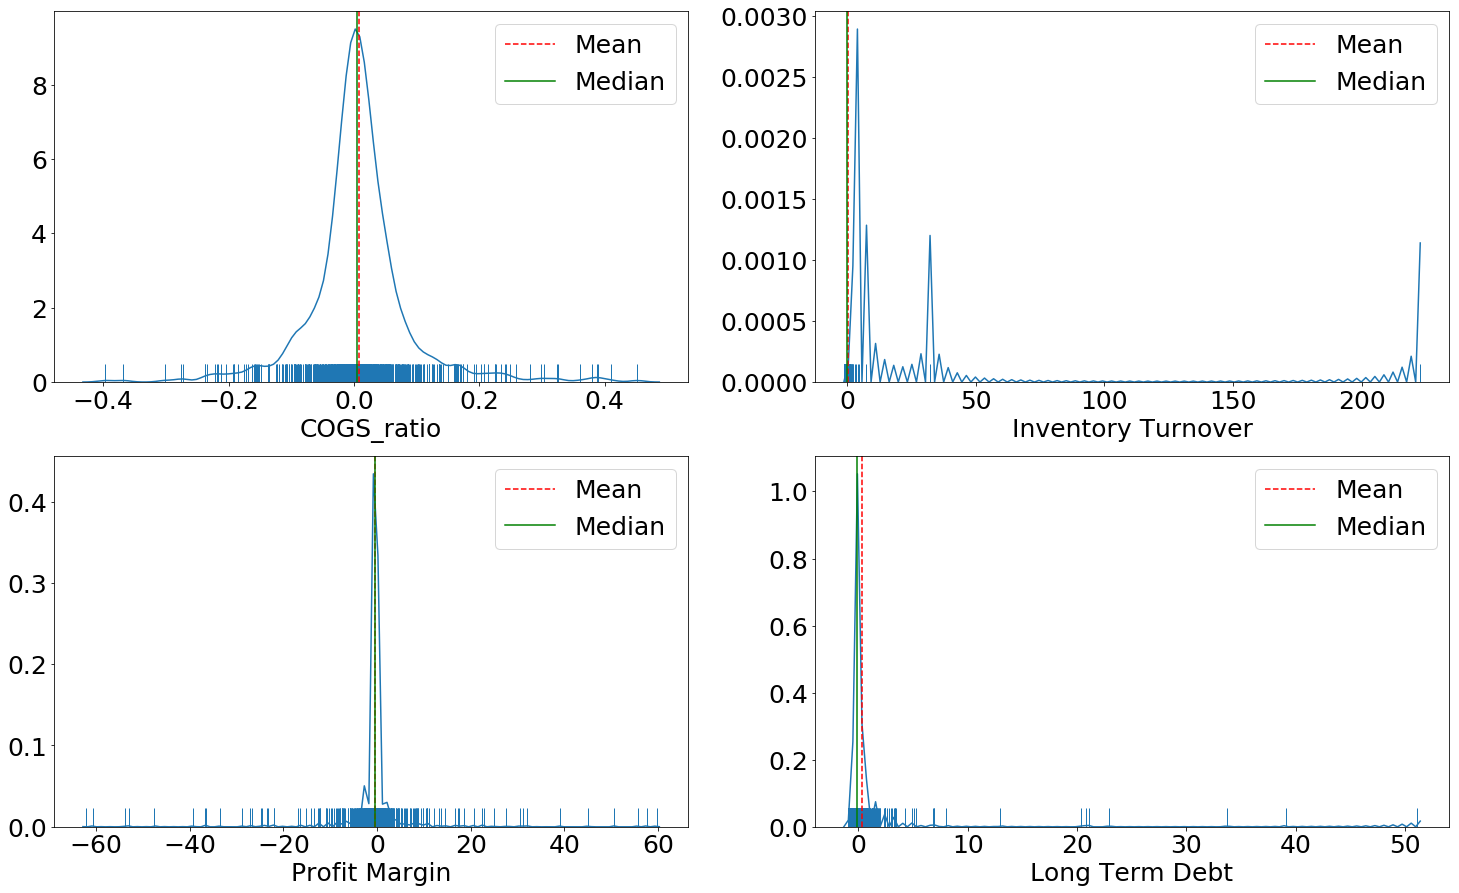

In [20]:
#Distribution Plot
mean_cogs=financial_YoY_19Q1_z['COGS_ratio'].dropna().mean()
median_cogs=financial_YoY_19Q1_z['COGS_ratio'].dropna().median()
fig, ax = plt.subplots(2,2,figsize=(25,15))
sns.distplot(financial_YoY_19Q1_z['COGS_ratio'].dropna(), hist=False, rug=True,ax=ax[0,0])
ax[0,0].axvline(mean_cogs, color='r', linestyle='--')
ax[0,0].axvline(median_cogs, color='g', linestyle='-')
ax[0,0].legend({'Mean':mean_cogs,'Median':median_cogs},fontsize = 25)
ax[0,0].tick_params(axis = 'both', which = 'major', labelsize = 25)
ax[0,0].set_xlabel('COGS_ratio',fontsize=25)

mean_it=financial_YoY_19Q1_z['Inventory Turnover'].dropna().mean()
median_it=financial_YoY_19Q1_z['Inventory Turnover'].dropna().median()

sns.distplot(financial_YoY_19Q1_z['Inventory Turnover'].dropna(), hist=False, rug=True,ax=ax[0,1])
ax[0,1].axvline(mean_it, color='r', linestyle='--')
ax[0,1].axvline(median_it, color='g', linestyle='-')
ax[0,1].legend({'Mean':mean_it,'Median':median_it},fontsize = 25)
ax[0,1].tick_params(axis = 'both', which = 'major', labelsize = 25)
ax[0,1].set_xlabel('Inventory Turnover',fontsize=25)

mean_pm=financial_YoY_19Q1_z['PM'].dropna().mean()
median_pm=financial_YoY_19Q1_z['PM'].dropna().median()

sns.distplot(financial_YoY_19Q1_z['PM'].dropna(), hist=False, rug=True,ax=ax[1,0])
ax[1,0].axvline(mean_pm, color='r', linestyle='--')
ax[1,0].axvline(median_pm, color='g', linestyle='-')
ax[1,0].legend({'Mean':mean_pm,'Median':median_pm},fontsize = 25)
ax[1,0].tick_params(axis = 'both', which = 'major', labelsize = 25)
ax[1,0].set_xlabel('Profit Margin',fontsize=25)

mean_de=financial_YoY_19Q1_z['Long Term Debt'].dropna().mean()
median_de=financial_YoY_19Q1_z['Long Term Debt'].dropna().median()

sns.distplot(financial_YoY_19Q1_z['Long Term Debt'].dropna(), hist=False, rug=True,ax=ax[1,1])
ax[1,1].axvline(mean_de, color='r', linestyle='--')
ax[1,1].axvline(median_de, color='g', linestyle='-')
ax[1,1].legend({'Mean':mean_de,'Median':median_de},fontsize = 25)
ax[1,1].tick_params(axis = 'both', which = 'major', labelsize = 25)
ax[1,1].set_xlabel('Long Term Debt',fontsize=25)

Text(0.5, 0, 'Long Term Debt')

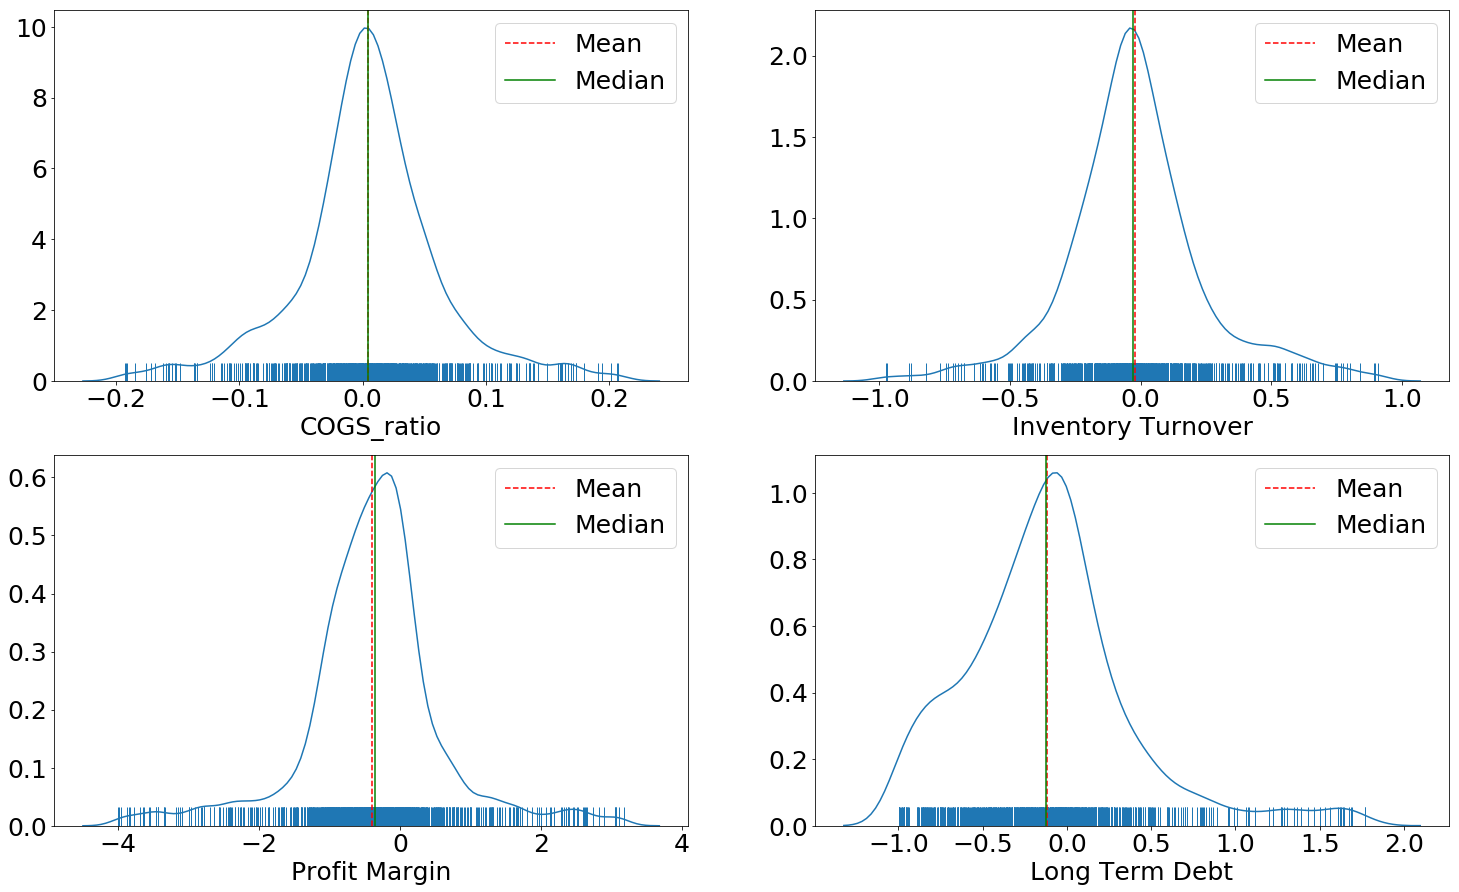

In [11]:
#Distribution Plot
mean_cogs=financial_YoY_19Q1_iqr['COGS_ratio'].dropna().mean()
median_cogs=financial_YoY_19Q1_iqr['COGS_ratio'].dropna().median()
fig, ax = plt.subplots(2,2,figsize=(25,15))
sns.distplot(financial_YoY_19Q1_iqr['COGS_ratio'].dropna(), hist=False, rug=True,ax=ax[0,0])
ax[0,0].axvline(mean_cogs, color='r', linestyle='--')
ax[0,0].axvline(median_cogs, color='g', linestyle='-')
ax[0,0].legend({'Mean':mean_cogs,'Median':median_cogs},fontsize = 25)
ax[0,0].tick_params(axis = 'both', which = 'major', labelsize = 25)
ax[0,0].set_xlabel('COGS_ratio',fontsize=25)

mean_it=financial_YoY_19Q1_iqr['Inventory Turnover'].dropna().mean()
median_it=financial_YoY_19Q1_iqr['Inventory Turnover'].dropna().median()

sns.distplot(financial_YoY_19Q1_iqr['Inventory Turnover'].dropna(), hist=False, rug=True,ax=ax[0,1])
ax[0,1].axvline(mean_it, color='r', linestyle='--')
ax[0,1].axvline(median_it, color='g', linestyle='-')
ax[0,1].legend({'Mean':mean_it,'Median':median_it},fontsize = 25)
ax[0,1].tick_params(axis = 'both', which = 'major', labelsize = 25)
ax[0,1].set_xlabel('Inventory Turnover',fontsize=25)

mean_pm=financial_YoY_19Q1_iqr['PM'].dropna().mean()
median_pm=financial_YoY_19Q1_iqr['PM'].dropna().median()

sns.distplot(financial_YoY_19Q1_iqr['PM'].dropna(), hist=False, rug=True,ax=ax[1,0])
ax[1,0].axvline(mean_pm, color='r', linestyle='--')
ax[1,0].axvline(median_pm, color='g', linestyle='-')
ax[1,0].legend({'Mean':mean_pm,'Median':median_pm},fontsize = 25)
ax[1,0].tick_params(axis = 'both', which = 'major', labelsize = 25)
ax[1,0].set_xlabel('Profit Margin',fontsize=25)

mean_de=financial_YoY_19Q1_iqr['Long Term Debt'].dropna().mean()
median_de=financial_YoY_19Q1_iqr['Long Term Debt'].dropna().median()

sns.distplot(financial_YoY_19Q1_iqr['Long Term Debt'].dropna(), hist=False, rug=True,ax=ax[1,1])
ax[1,1].axvline(mean_de, color='r', linestyle='--')
ax[1,1].axvline(median_de, color='g', linestyle='-')
ax[1,1].legend({'Mean':mean_de,'Median':median_de},fontsize = 25)
ax[1,1].tick_params(axis = 'both', which = 'major', labelsize = 25)
ax[1,1].set_xlabel('Long Term Debt',fontsize=25)

In [11]:
financial_YoY_18Q2_z = pd.pivot_table(financial_YoY,index=["Tickers","Company Name",'Country'],columns=['Metric Name']
                      ,values=['abnor_diff_18Q2'],aggfunc={'abnor_diff_18Q2':np.sum})
financial_YoY_18Q2_z.columns = financial_YoY_18Q2_z.columns.droplevel(0)
financial_YoY_18Q2_z.reset_index(inplace = True)
financial_YoY_18Q2_z=financial_YoY_18Q2_z.replace(np.inf, np.nan)

In [265]:
financial_YoY_18Q2_iqr = pd.pivot_table(financial_YoY,index=["Tickers","Company Name",'Country'],columns=['Metric Name']
                      ,values=['abnor_diff_18Q2'],aggfunc={'abnor_diff_18Q2':np.sum})
financial_YoY_18Q2_iqr.columns = financial_YoY_18Q2_iqr.columns.droplevel(0)
financial_YoY_18Q2_iqr.reset_index(inplace = True)
financial_YoY_18Q2_iqr=financial_YoY_18Q2_iqr.replace(np.inf, np.nan)
financial_YoY_18Q2_iqr=financial_YoY_18Q2_iqr.replace(0, np.nan)

In [13]:
#Remove Outliers
z = np.abs(stats.zscore(financial_YoY_18Q2_z.iloc[:,3:]))
outliers = np.where(z>3)
for i in range(len(outliers[0])):
    financial_YoY_18Q2_z.iloc[outliers[0][i],outliers[1][i]+3] = np.nan
financial_YoY_18Q2_z=financial_YoY_18Q2_z.replace(0, np.nan)

/Users/Saik/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in greater
  This is separate from the ipykernel package so we can avoid doing imports until


In [266]:
Q1 = financial_YoY_18Q2_iqr.iloc[:,3:].quantile(0.25)
Q3 = financial_YoY_18Q2_iqr.iloc[:,3:].quantile(0.75)
IQR = Q3 - Q1
j = 0
for i in IQR.index:
    for k in range(len(financial_YoY_18Q2_iqr)):
        if (financial_YoY_18Q2_iqr.loc[k,i]<Q1[j]-IQR[j]*3) or (financial_YoY_18Q2_iqr.loc[k,i]>Q3[j]+IQR[j]*3):
            financial_YoY_18Q2_iqr.loc[k,i] = np.nan
    j+=1

Text(0.5, 0, 'Long Term Debt')

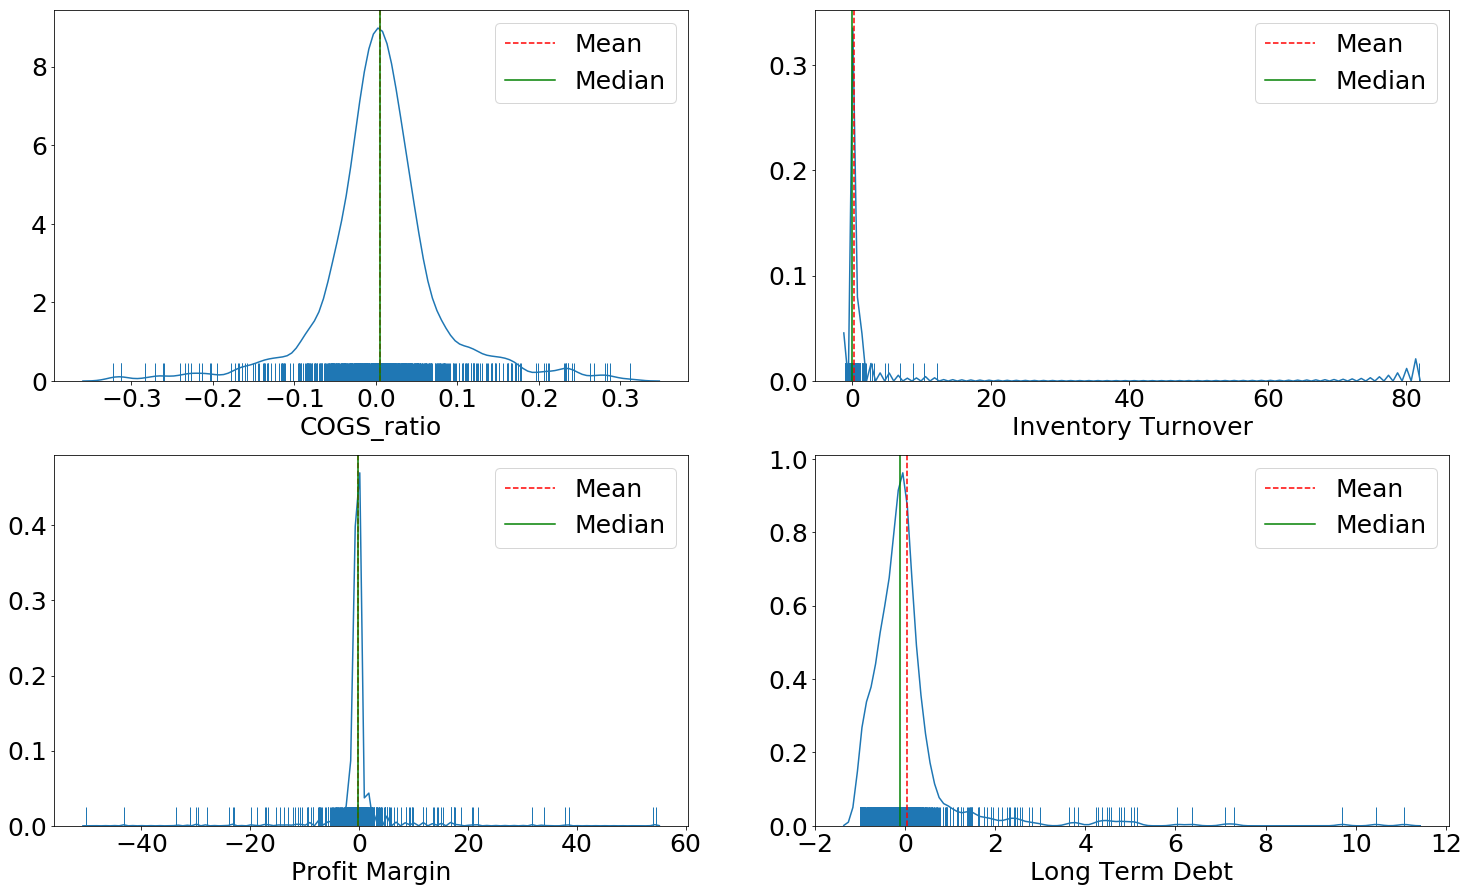

In [15]:
#Distribution Plot
mean_cogs=financial_YoY_18Q2_z['COGS_ratio'].dropna().mean()
median_cogs=financial_YoY_18Q2_z['COGS_ratio'].dropna().median()
fig, ax = plt.subplots(2,2,figsize=(25,15))
sns.distplot(financial_YoY_18Q2_z['COGS_ratio'].dropna(), hist=False, rug=True,ax=ax[0,0])
ax[0,0].axvline(mean_cogs, color='r', linestyle='--')
ax[0,0].axvline(median_cogs, color='g', linestyle='-')
ax[0,0].legend({'Mean':mean_cogs,'Median':median_cogs},fontsize = 25)
ax[0,0].tick_params(axis = 'both', which = 'major', labelsize = 25)
ax[0,0].set_xlabel('COGS_ratio',fontsize=25)

mean_it=financial_YoY_18Q2_z['Inventory Turnover'].dropna().mean()
median_it=financial_YoY_18Q2_z['Inventory Turnover'].dropna().median()

sns.distplot(financial_YoY_18Q2_z['Inventory Turnover'].dropna(), hist=False, rug=True,ax=ax[0,1])
ax[0,1].axvline(mean_it, color='r', linestyle='--')
ax[0,1].axvline(median_it, color='g', linestyle='-')
ax[0,1].legend({'Mean':mean_it,'Median':median_it},fontsize = 25)
ax[0,1].tick_params(axis = 'both', which = 'major', labelsize = 25)
ax[0,1].set_xlabel('Inventory Turnover',fontsize=25)

mean_pm=financial_YoY_18Q2_z['PM'].dropna().mean()
median_pm=financial_YoY_18Q2_z['PM'].dropna().median()

sns.distplot(financial_YoY_18Q2_z['PM'].dropna(), hist=False, rug=True,ax=ax[1,0])
ax[1,0].axvline(mean_pm, color='r', linestyle='--')
ax[1,0].axvline(median_pm, color='g', linestyle='-')
ax[1,0].legend({'Mean':mean_pm,'Median':median_pm},fontsize = 25)
ax[1,0].tick_params(axis = 'both', which = 'major', labelsize = 25)
ax[1,0].set_xlabel('Profit Margin',fontsize=25)

mean_de=financial_YoY_18Q2_z['Long Term Debt'].dropna().mean()
median_de=financial_YoY_18Q2_z['Long Term Debt'].dropna().median()

sns.distplot(financial_YoY_18Q2_z['Long Term Debt'].dropna(), hist=False, rug=True,ax=ax[1,1])
ax[1,1].axvline(mean_de, color='r', linestyle='--')
ax[1,1].axvline(median_de, color='g', linestyle='-')
ax[1,1].legend({'Mean':mean_de,'Median':median_de},fontsize = 25)
ax[1,1].tick_params(axis = 'both', which = 'major', labelsize = 25)
ax[1,1].set_xlabel('Long Term Debt',fontsize=25)

Text(0.5, 0, 'Long Term Debt')

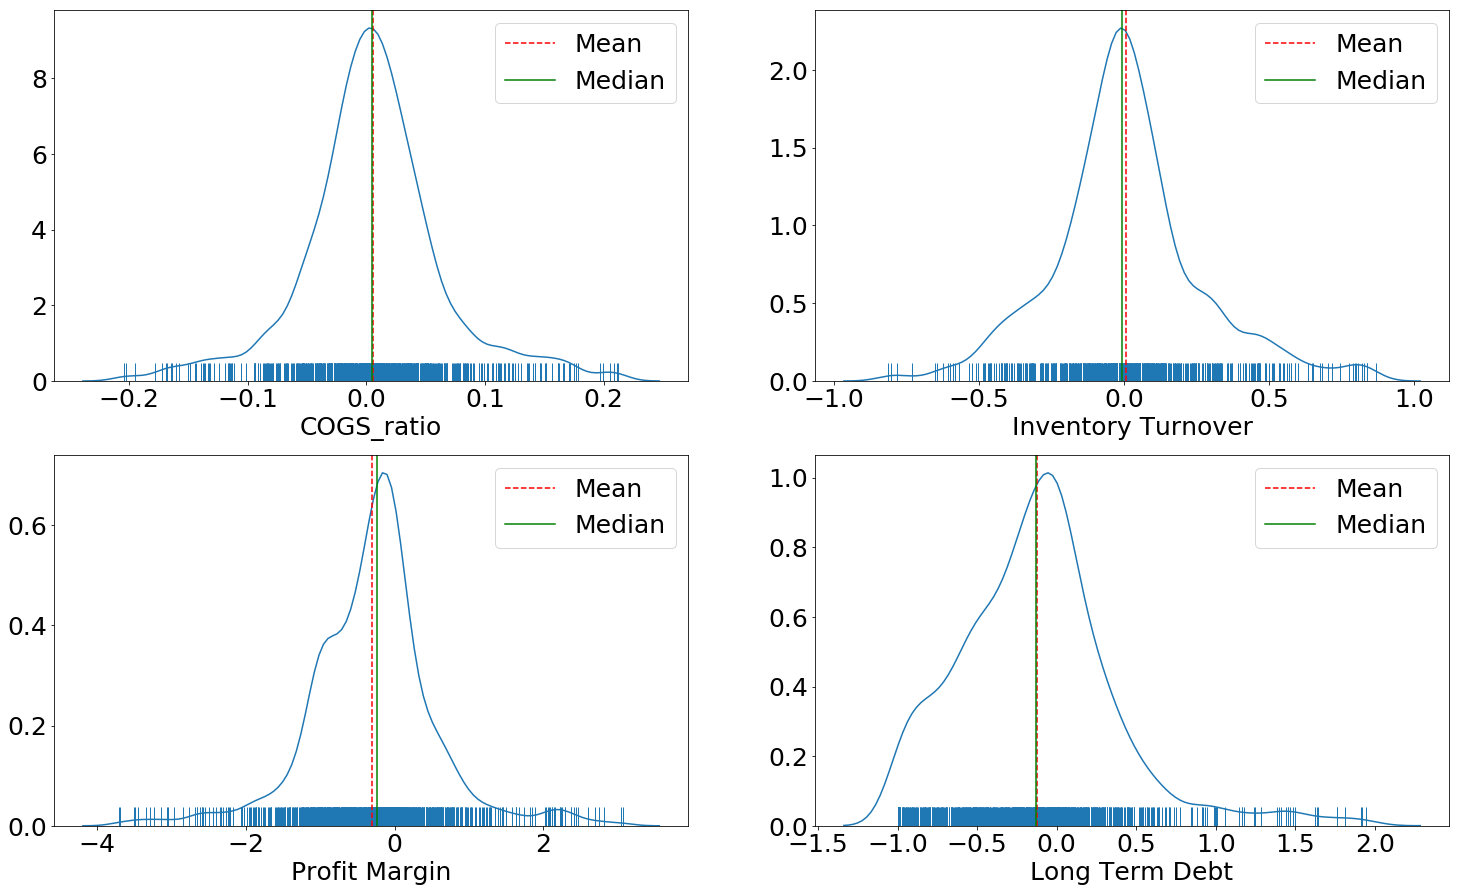

In [16]:
#Distribution Plot
mean_cogs=financial_YoY_18Q2_iqr['COGS_ratio'].dropna().mean()
median_cogs=financial_YoY_18Q2_iqr['COGS_ratio'].dropna().median()
fig, ax = plt.subplots(2,2,figsize=(25,15))
sns.distplot(financial_YoY_18Q2_iqr['COGS_ratio'].dropna(), hist=False, rug=True,ax=ax[0,0])
ax[0,0].axvline(mean_cogs, color='r', linestyle='--')
ax[0,0].axvline(median_cogs, color='g', linestyle='-')
ax[0,0].legend({'Mean':mean_cogs,'Median':median_cogs},fontsize = 25)
ax[0,0].tick_params(axis = 'both', which = 'major', labelsize = 25)
ax[0,0].set_xlabel('COGS_ratio',fontsize=25)

mean_it=financial_YoY_18Q2_iqr['Inventory Turnover'].dropna().mean()
median_it=financial_YoY_18Q2_iqr['Inventory Turnover'].dropna().median()

sns.distplot(financial_YoY_18Q2_iqr['Inventory Turnover'].dropna(), hist=False, rug=True,ax=ax[0,1])
ax[0,1].axvline(mean_it, color='r', linestyle='--')
ax[0,1].axvline(median_it, color='g', linestyle='-')
ax[0,1].legend({'Mean':mean_it,'Median':median_it},fontsize = 25)
ax[0,1].tick_params(axis = 'both', which = 'major', labelsize = 25)
ax[0,1].set_xlabel('Inventory Turnover',fontsize=25)

mean_pm=financial_YoY_18Q2_iqr['PM'].dropna().mean()
median_pm=financial_YoY_18Q2_iqr['PM'].dropna().median()

sns.distplot(financial_YoY_18Q2_iqr['PM'].dropna(), hist=False, rug=True,ax=ax[1,0])
ax[1,0].axvline(mean_pm, color='r', linestyle='--')
ax[1,0].axvline(median_pm, color='g', linestyle='-')
ax[1,0].legend({'Mean':mean_pm,'Median':median_pm},fontsize = 25)
ax[1,0].tick_params(axis = 'both', which = 'major', labelsize = 25)
ax[1,0].set_xlabel('Profit Margin',fontsize=25)

mean_de=financial_YoY_18Q2_iqr['Long Term Debt'].dropna().mean()
median_de=financial_YoY_18Q2_iqr['Long Term Debt'].dropna().median()

sns.distplot(financial_YoY_18Q2_iqr['Long Term Debt'].dropna(), hist=False, rug=True,ax=ax[1,1])
ax[1,1].axvline(mean_de, color='r', linestyle='--')
ax[1,1].axvline(median_de, color='g', linestyle='-')
ax[1,1].legend({'Mean':mean_de,'Median':median_de},fontsize = 25)
ax[1,1].tick_params(axis = 'both', which = 'major', labelsize = 25)
ax[1,1].set_xlabel('Long Term Debt',fontsize=25)

In [17]:
financial_YoY_18Q3_z = pd.pivot_table(financial_YoY,index=["Tickers","Company Name",'Country'],columns=['Metric Name']
                      ,values=['abnor_diff_18Q3'],aggfunc={'abnor_diff_18Q3':np.sum})
financial_YoY_18Q3_z.columns = financial_YoY_18Q3_z.columns.droplevel(0)
financial_YoY_18Q3_z.reset_index(inplace = True)
financial_YoY_18Q3_z=financial_YoY_18Q3_z.replace(np.inf, np.nan)

In [267]:
financial_YoY_18Q3_iqr = pd.pivot_table(financial_YoY,index=["Tickers","Company Name",'Country'],columns=['Metric Name']
                      ,values=['abnor_diff_18Q3'],aggfunc={'abnor_diff_18Q3':np.sum})
financial_YoY_18Q3_iqr.columns = financial_YoY_18Q3_iqr.columns.droplevel(0)
financial_YoY_18Q3_iqr.reset_index(inplace = True)
financial_YoY_18Q3_iqr=financial_YoY_18Q3_iqr.replace(np.inf, np.nan)
financial_YoY_18Q3_iqr=financial_YoY_18Q3_iqr.replace(0, np.nan)

In [19]:
#Remove Outliers
z = np.abs(stats.zscore(financial_YoY_18Q3_z.iloc[:,3:]))
outliers = np.where(z>3)
for i in range(len(outliers[0])):
    financial_YoY_18Q3_z.iloc[outliers[0][i],outliers[1][i]+3] = np.nan
financial_YoY_18Q3_z=financial_YoY_18Q3_z.replace(0, np.nan)

/Users/Saik/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in greater
  This is separate from the ipykernel package so we can avoid doing imports until


In [268]:
Q1 = financial_YoY_18Q3_iqr.iloc[:,3:].quantile(0.25)
Q3 = financial_YoY_18Q3_iqr.iloc[:,3:].quantile(0.75)
IQR = Q3 - Q1
j = 0
for i in IQR.index:
    for k in range(len(financial_YoY_18Q3_iqr)):
        if (financial_YoY_18Q3_iqr.loc[k,i]<Q1[j]-IQR[j]*3) or (financial_YoY_18Q3_iqr.loc[k,i]>Q3[j]+IQR[j]*3):
            financial_YoY_18Q3_iqr.loc[k,i] = np.nan
    j+=1

Text(0.5, 0, 'Long Term Debt')

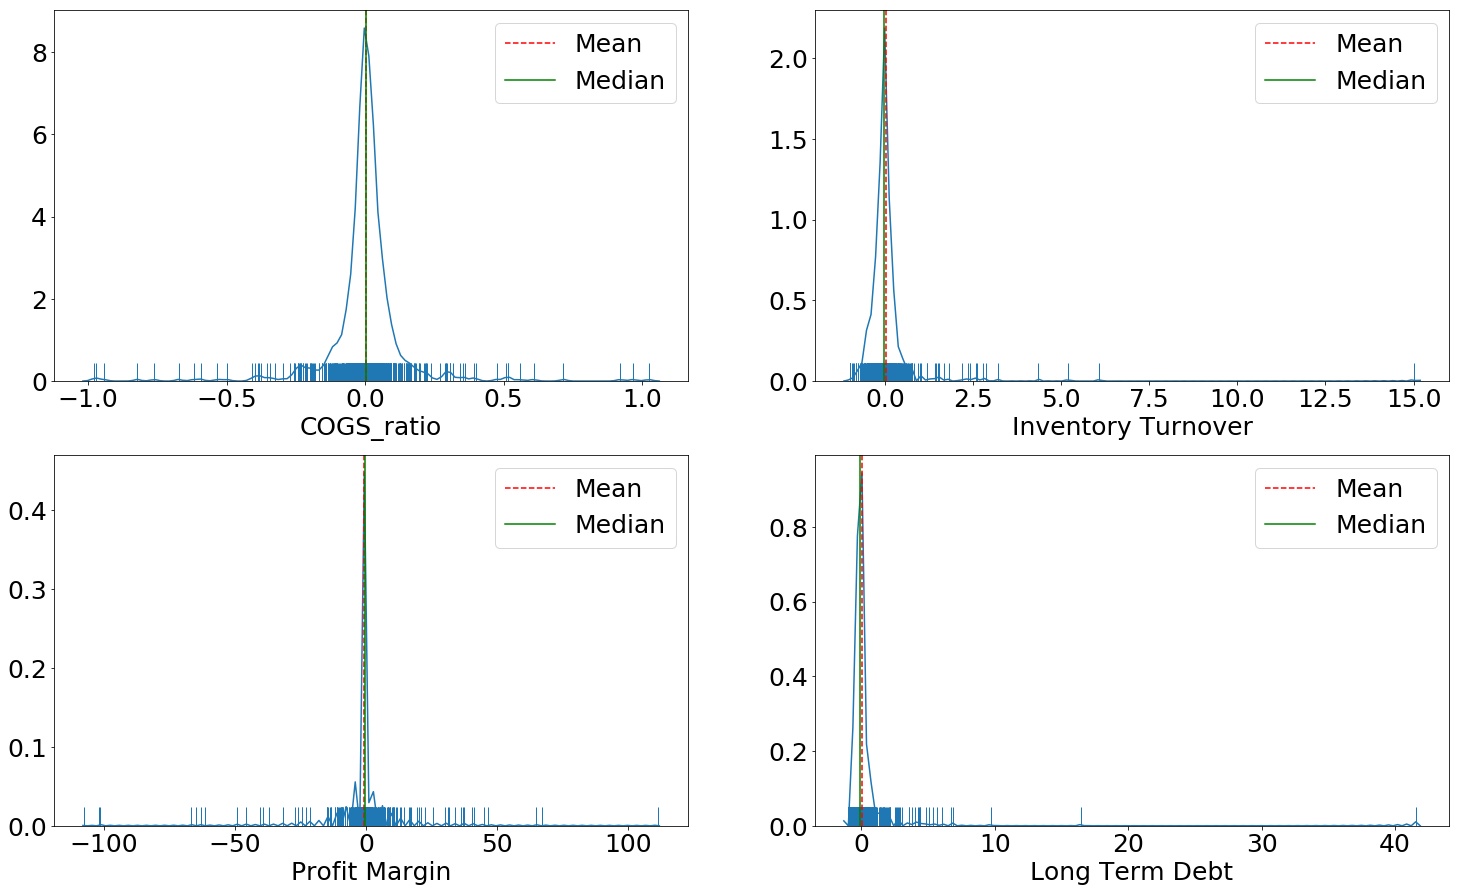

In [21]:
#Distribution Plot
mean_cogs=financial_YoY_18Q3_z['COGS_ratio'].dropna().mean()
median_cogs=financial_YoY_18Q3_z['COGS_ratio'].dropna().median()
fig, ax = plt.subplots(2,2,figsize=(25,15))
sns.distplot(financial_YoY_18Q3_z['COGS_ratio'].dropna(), hist=False, rug=True,ax=ax[0,0])
ax[0,0].axvline(mean_cogs, color='r', linestyle='--')
ax[0,0].axvline(median_cogs, color='g', linestyle='-')
ax[0,0].legend({'Mean':mean_cogs,'Median':median_cogs},fontsize = 25)
ax[0,0].tick_params(axis = 'both', which = 'major', labelsize = 25)
ax[0,0].set_xlabel('COGS_ratio',fontsize=25)

mean_it=financial_YoY_18Q3_z['Inventory Turnover'].dropna().mean()
median_it=financial_YoY_18Q3_z['Inventory Turnover'].dropna().median()

sns.distplot(financial_YoY_18Q3_z['Inventory Turnover'].dropna(), hist=False, rug=True,ax=ax[0,1])
ax[0,1].axvline(mean_it, color='r', linestyle='--')
ax[0,1].axvline(median_it, color='g', linestyle='-')
ax[0,1].legend({'Mean':mean_it,'Median':median_it},fontsize = 25)
ax[0,1].tick_params(axis = 'both', which = 'major', labelsize = 25)
ax[0,1].set_xlabel('Inventory Turnover',fontsize=25)

mean_pm=financial_YoY_18Q3_z['PM'].dropna().mean()
median_pm=financial_YoY_18Q3_z['PM'].dropna().median()

sns.distplot(financial_YoY_18Q3_z['PM'].dropna(), hist=False, rug=True,ax=ax[1,0])
ax[1,0].axvline(mean_pm, color='r', linestyle='--')
ax[1,0].axvline(median_pm, color='g', linestyle='-')
ax[1,0].legend({'Mean':mean_pm,'Median':median_pm},fontsize = 25)
ax[1,0].tick_params(axis = 'both', which = 'major', labelsize = 25)
ax[1,0].set_xlabel('Profit Margin',fontsize=25)

mean_de=financial_YoY_18Q3_z['Long Term Debt'].dropna().mean()
median_de=financial_YoY_18Q3_z['Long Term Debt'].dropna().median()

sns.distplot(financial_YoY_18Q3_z['Long Term Debt'].dropna(), hist=False, rug=True,ax=ax[1,1])
ax[1,1].axvline(mean_de, color='r', linestyle='--')
ax[1,1].axvline(median_de, color='g', linestyle='-')
ax[1,1].legend({'Mean':mean_de,'Median':median_de},fontsize = 25)
ax[1,1].tick_params(axis = 'both', which = 'major', labelsize = 25)
ax[1,1].set_xlabel('Long Term Debt',fontsize=25)

Text(0.5, 0, 'Long Term Debt')

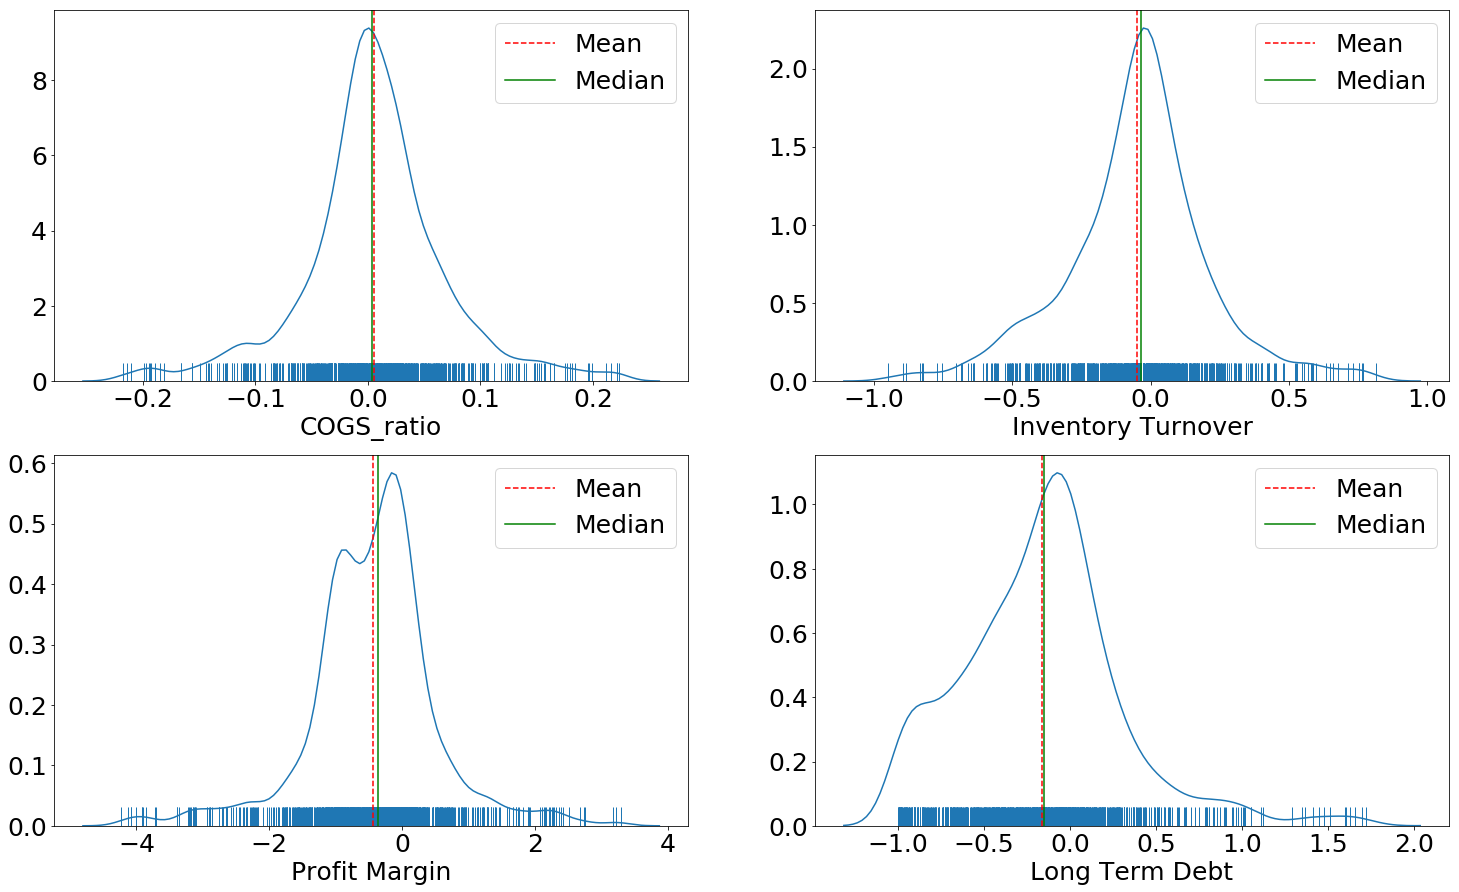

In [22]:
#Distribution Plot
mean_cogs=financial_YoY_18Q3_iqr['COGS_ratio'].dropna().mean()
median_cogs=financial_YoY_18Q3_iqr['COGS_ratio'].dropna().median()
fig, ax = plt.subplots(2,2,figsize=(25,15))
sns.distplot(financial_YoY_18Q3_iqr['COGS_ratio'].dropna(), hist=False, rug=True,ax=ax[0,0])
ax[0,0].axvline(mean_cogs, color='r', linestyle='--')
ax[0,0].axvline(median_cogs, color='g', linestyle='-')
ax[0,0].legend({'Mean':mean_cogs,'Median':median_cogs},fontsize = 25)
ax[0,0].tick_params(axis = 'both', which = 'major', labelsize = 25)
ax[0,0].set_xlabel('COGS_ratio',fontsize=25)

mean_it=financial_YoY_18Q3_iqr['Inventory Turnover'].dropna().mean()
median_it=financial_YoY_18Q3_iqr['Inventory Turnover'].dropna().median()

sns.distplot(financial_YoY_18Q3_iqr['Inventory Turnover'].dropna(), hist=False, rug=True,ax=ax[0,1])
ax[0,1].axvline(mean_it, color='r', linestyle='--')
ax[0,1].axvline(median_it, color='g', linestyle='-')
ax[0,1].legend({'Mean':mean_it,'Median':median_it},fontsize = 25)
ax[0,1].tick_params(axis = 'both', which = 'major', labelsize = 25)
ax[0,1].set_xlabel('Inventory Turnover',fontsize=25)

mean_pm=financial_YoY_18Q3_iqr['PM'].dropna().mean()
median_pm=financial_YoY_18Q3_iqr['PM'].dropna().median()

sns.distplot(financial_YoY_18Q3_iqr['PM'].dropna(), hist=False, rug=True,ax=ax[1,0])
ax[1,0].axvline(mean_pm, color='r', linestyle='--')
ax[1,0].axvline(median_pm, color='g', linestyle='-')
ax[1,0].legend({'Mean':mean_pm,'Median':median_pm},fontsize = 25)
ax[1,0].tick_params(axis = 'both', which = 'major', labelsize = 25)
ax[1,0].set_xlabel('Profit Margin',fontsize=25)

mean_de=financial_YoY_18Q3_iqr['Long Term Debt'].dropna().mean()
median_de=financial_YoY_18Q3_iqr['Long Term Debt'].dropna().median()

sns.distplot(financial_YoY_18Q3_iqr['Long Term Debt'].dropna(), hist=False, rug=True,ax=ax[1,1])
ax[1,1].axvline(mean_de, color='r', linestyle='--')
ax[1,1].axvline(median_de, color='g', linestyle='-')
ax[1,1].legend({'Mean':mean_de,'Median':median_de},fontsize = 25)
ax[1,1].tick_params(axis = 'both', which = 'major', labelsize = 25)
ax[1,1].set_xlabel('Long Term Debt',fontsize=25)

In [23]:
financial_YoY_18Q4_z = pd.pivot_table(financial_YoY,index=["Tickers","Company Name",'Country'],columns=['Metric Name']
                      ,values=['abnor_diff_18Q4'],aggfunc={'abnor_diff_18Q4':np.sum})
financial_YoY_18Q4_z.columns = financial_YoY_18Q4_z.columns.droplevel(0)
financial_YoY_18Q4_z.reset_index(inplace = True)
financial_YoY_18Q4_z=financial_YoY_18Q4_z.replace(np.inf, np.nan)

In [269]:
financial_YoY_18Q4_iqr = pd.pivot_table(financial_YoY,index=["Tickers","Company Name",'Country'],columns=['Metric Name']
                      ,values=['abnor_diff_18Q4'],aggfunc={'abnor_diff_18Q4':np.sum})
financial_YoY_18Q4_iqr.columns = financial_YoY_18Q4_iqr.columns.droplevel(0)
financial_YoY_18Q4_iqr.reset_index(inplace = True)
financial_YoY_18Q4_iqr=financial_YoY_18Q4_iqr.replace(np.inf, np.nan)
financial_YoY_18Q4_iqr=financial_YoY_18Q4_iqr.replace(0, np.nan)

In [25]:
#Remove Outliers
z = np.abs(stats.zscore(financial_YoY_18Q4_z.iloc[:,3:]))
outliers = np.where(z>3)
for i in range(len(outliers[0])):
    financial_YoY_18Q4_z.iloc[outliers[0][i],outliers[1][i]+3] = np.nan
financial_YoY_18Q4_z=financial_YoY_18Q4_z.replace(0, np.nan)

/Users/Saik/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in greater
  This is separate from the ipykernel package so we can avoid doing imports until


In [270]:
Q1 = financial_YoY_18Q4_iqr.iloc[:,3:].quantile(0.25)
Q3 = financial_YoY_18Q4_iqr.iloc[:,3:].quantile(0.75)
IQR = Q3 - Q1
j = 0
for i in IQR.index:
    for k in range(len(financial_YoY_18Q4_iqr)):
        if (financial_YoY_18Q4_iqr.loc[k,i]<Q1[j]-IQR[j]*3) or (financial_YoY_18Q4_iqr.loc[k,i]>Q3[j]+IQR[j]*3):
            financial_YoY_18Q4_iqr.loc[k,i] = np.nan
    j+=1

Text(0.5, 0, 'Long Term Debt')

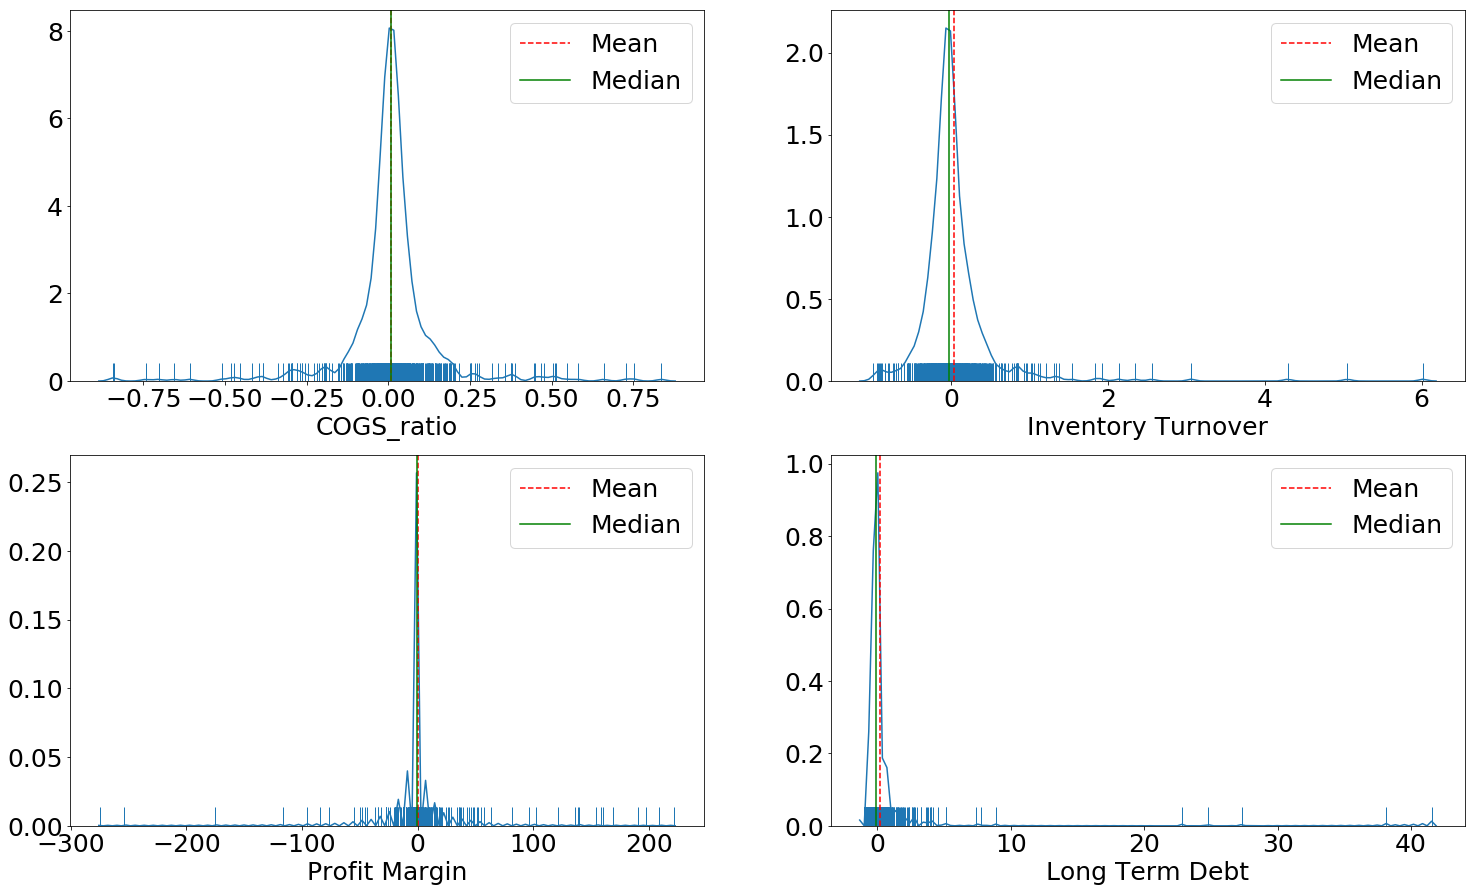

In [27]:
#Distribution Plot
mean_cogs=financial_YoY_18Q4_z['COGS_ratio'].dropna().mean()
median_cogs=financial_YoY_18Q4_z['COGS_ratio'].dropna().median()
fig, ax = plt.subplots(2,2,figsize=(25,15))
sns.distplot(financial_YoY_18Q4_z['COGS_ratio'].dropna(), hist=False, rug=True,ax=ax[0,0])
ax[0,0].axvline(mean_cogs, color='r', linestyle='--')
ax[0,0].axvline(median_cogs, color='g', linestyle='-')
ax[0,0].legend({'Mean':mean_cogs,'Median':median_cogs},fontsize = 25)
ax[0,0].tick_params(axis = 'both', which = 'major', labelsize = 25)
ax[0,0].set_xlabel('COGS_ratio',fontsize=25)

mean_it=financial_YoY_18Q4_z['Inventory Turnover'].dropna().mean()
median_it=financial_YoY_18Q4_z['Inventory Turnover'].dropna().median()

sns.distplot(financial_YoY_18Q4_z['Inventory Turnover'].dropna(), hist=False, rug=True,ax=ax[0,1])
ax[0,1].axvline(mean_it, color='r', linestyle='--')
ax[0,1].axvline(median_it, color='g', linestyle='-')
ax[0,1].legend({'Mean':mean_it,'Median':median_it},fontsize = 25)
ax[0,1].tick_params(axis = 'both', which = 'major', labelsize = 25)
ax[0,1].set_xlabel('Inventory Turnover',fontsize=25)

mean_pm=financial_YoY_18Q4_z['PM'].dropna().mean()
median_pm=financial_YoY_18Q4_z['PM'].dropna().median()

sns.distplot(financial_YoY_18Q4_z['PM'].dropna(), hist=False, rug=True,ax=ax[1,0])
ax[1,0].axvline(mean_pm, color='r', linestyle='--')
ax[1,0].axvline(median_pm, color='g', linestyle='-')
ax[1,0].legend({'Mean':mean_pm,'Median':median_pm},fontsize = 25)
ax[1,0].tick_params(axis = 'both', which = 'major', labelsize = 25)
ax[1,0].set_xlabel('Profit Margin',fontsize=25)

mean_de=financial_YoY_18Q4_z['Long Term Debt'].dropna().mean()
median_de=financial_YoY_18Q4_z['Long Term Debt'].dropna().median()

sns.distplot(financial_YoY_18Q4_z['Long Term Debt'].dropna(), hist=False, rug=True,ax=ax[1,1])
ax[1,1].axvline(mean_de, color='r', linestyle='--')
ax[1,1].axvline(median_de, color='g', linestyle='-')
ax[1,1].legend({'Mean':mean_de,'Median':median_de},fontsize = 25)
ax[1,1].tick_params(axis = 'both', which = 'major', labelsize = 25)
ax[1,1].set_xlabel('Long Term Debt',fontsize=25)

Text(0.5, 0, 'Long Term Debt')

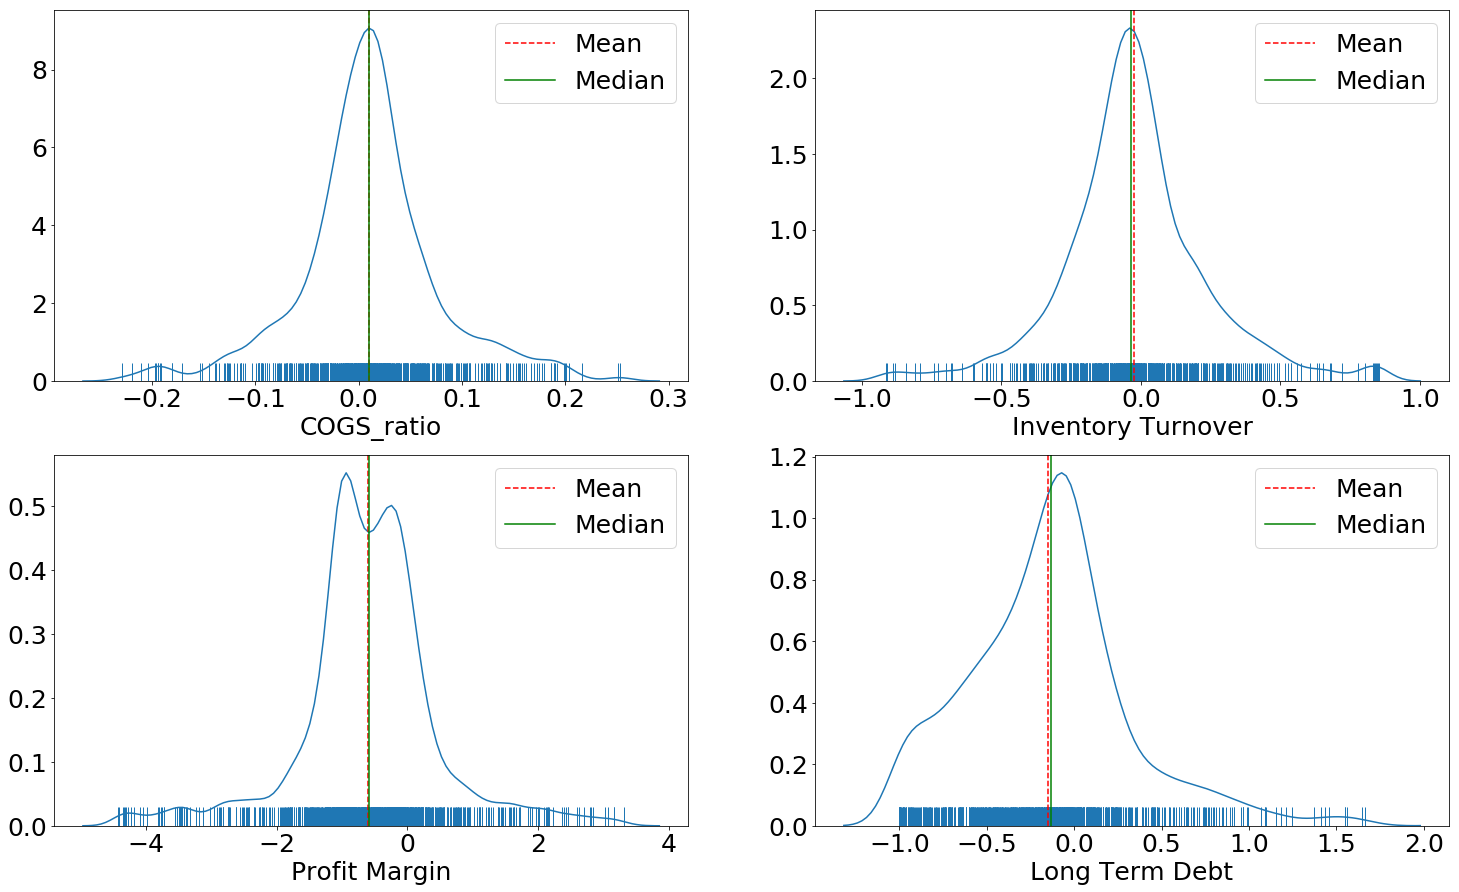

In [28]:
#Distribution Plot
mean_cogs=financial_YoY_18Q4_iqr['COGS_ratio'].dropna().mean()
median_cogs=financial_YoY_18Q4_iqr['COGS_ratio'].dropna().median()
fig, ax = plt.subplots(2,2,figsize=(25,15))
sns.distplot(financial_YoY_18Q4_iqr['COGS_ratio'].dropna(), hist=False, rug=True,ax=ax[0,0])
ax[0,0].axvline(mean_cogs, color='r', linestyle='--')
ax[0,0].axvline(median_cogs, color='g', linestyle='-')
ax[0,0].legend({'Mean':mean_cogs,'Median':median_cogs},fontsize = 25)
ax[0,0].tick_params(axis = 'both', which = 'major', labelsize = 25)
ax[0,0].set_xlabel('COGS_ratio',fontsize=25)

mean_it=financial_YoY_18Q4_iqr['Inventory Turnover'].dropna().mean()
median_it=financial_YoY_18Q4_iqr['Inventory Turnover'].dropna().median()

sns.distplot(financial_YoY_18Q4_iqr['Inventory Turnover'].dropna(), hist=False, rug=True,ax=ax[0,1])
ax[0,1].axvline(mean_it, color='r', linestyle='--')
ax[0,1].axvline(median_it, color='g', linestyle='-')
ax[0,1].legend({'Mean':mean_it,'Median':median_it},fontsize = 25)
ax[0,1].tick_params(axis = 'both', which = 'major', labelsize = 25)
ax[0,1].set_xlabel('Inventory Turnover',fontsize=25)

mean_pm=financial_YoY_18Q4_iqr['PM'].dropna().mean()
median_pm=financial_YoY_18Q4_iqr['PM'].dropna().median()

sns.distplot(financial_YoY_18Q4_iqr['PM'].dropna(), hist=False, rug=True,ax=ax[1,0])
ax[1,0].axvline(mean_pm, color='r', linestyle='--')
ax[1,0].axvline(median_pm, color='g', linestyle='-')
ax[1,0].legend({'Mean':mean_pm,'Median':median_pm},fontsize = 25)
ax[1,0].tick_params(axis = 'both', which = 'major', labelsize = 25)
ax[1,0].set_xlabel('Profit Margin',fontsize=25)

mean_de=financial_YoY_18Q4_iqr['Long Term Debt'].dropna().mean()
median_de=financial_YoY_18Q4_iqr['Long Term Debt'].dropna().median()

sns.distplot(financial_YoY_18Q4_iqr['Long Term Debt'].dropna(), hist=False, rug=True,ax=ax[1,1])
ax[1,1].axvline(mean_de, color='r', linestyle='--')
ax[1,1].axvline(median_de, color='g', linestyle='-')
ax[1,1].legend({'Mean':mean_de,'Median':median_de},fontsize = 25)
ax[1,1].tick_params(axis = 'both', which = 'major', labelsize = 25)
ax[1,1].set_xlabel('Long Term Debt',fontsize=25)

In [271]:
financial_YoY_18Q1_iqr = pd.pivot_table(financial_YoY,index=["Tickers","Company Name",'Country'],columns=['Metric Name']
                      ,values=['abnor_diff_18Q1'],aggfunc={'abnor_diff_18Q1':np.sum})
financial_YoY_18Q1_iqr.columns = financial_YoY_18Q1_iqr.columns.droplevel(0)
financial_YoY_18Q1_iqr.reset_index(inplace = True)
financial_YoY_18Q1_iqr=financial_YoY_18Q1_iqr.replace(np.inf, np.nan)
financial_YoY_18Q1_iqr=financial_YoY_18Q1_iqr.replace(0, np.nan)

In [272]:
Q1 = financial_YoY_18Q1_iqr.iloc[:,3:].quantile(0.25)
Q3 = financial_YoY_18Q1_iqr.iloc[:,3:].quantile(0.75)
IQR = Q3 - Q1
j = 0
for i in IQR.index:
    for k in range(len(financial_YoY_18Q1_iqr)):
        if (financial_YoY_18Q1_iqr.loc[k,i]<Q1[j]-IQR[j]*3) or (financial_YoY_18Q1_iqr.loc[k,i]>Q3[j]+IQR[j]*3):
            financial_YoY_18Q1_iqr.loc[k,i] = np.nan
    j+=1

In [273]:
financial_YoY_17Q4_iqr = pd.pivot_table(financial_YoY,index=["Tickers","Company Name",'Country'],columns=['Metric Name']
                      ,values=['abnor_diff_17Q4'],aggfunc={'abnor_diff_17Q4':np.sum})
financial_YoY_17Q4_iqr.columns = financial_YoY_17Q4_iqr.columns.droplevel(0)
financial_YoY_17Q4_iqr.reset_index(inplace = True)
financial_YoY_17Q4_iqr=financial_YoY_17Q4_iqr.replace(np.inf, np.nan)
financial_YoY_17Q4_iqr=financial_YoY_17Q4_iqr.replace(0, np.nan)

In [274]:
Q1 = financial_YoY_17Q4_iqr.iloc[:,3:].quantile(0.25)
Q3 = financial_YoY_17Q4_iqr.iloc[:,3:].quantile(0.75)
IQR = Q3 - Q1
j = 0
for i in IQR.index:
    for k in range(len(financial_YoY_18Q1_iqr)):
        if (financial_YoY_17Q4_iqr.loc[k,i]<Q1[j]-IQR[j]*3) or (financial_YoY_17Q4_iqr.loc[k,i]>Q3[j]+IQR[j]*3):
            financial_YoY_17Q4_iqr.loc[k,i] = np.nan
    j+=1

In [29]:
financial_YoY_expon_iqr = pd.pivot_table(financial_YoY,index=["Tickers","Company Name",'Country'],columns=['Metric Name']
                      ,values=['abnor_diff_expon'],aggfunc={'abnor_diff_expon':np.sum})
financial_YoY_expon_iqr.columns = financial_YoY_expon_iqr.columns.droplevel(0)
financial_YoY_expon_iqr.reset_index(inplace = True)
financial_YoY_expon_iqr=financial_YoY_expon_iqr.replace(np.inf, np.nan)
financial_YoY_expon_iqr=financial_YoY_expon_iqr.replace(0, np.nan)

In [30]:
Q1 = financial_YoY_expon_iqr.iloc[:,3:].quantile(0.25)
Q3 = financial_YoY_expon_iqr.iloc[:,3:].quantile(0.75)
IQR = Q3 - Q1
j = 0
for i in IQR.index:
    for k in range(len(financial_YoY_expon_iqr)):
        if (financial_YoY_expon_iqr.loc[k,i]<Q1[j]-IQR[j]*3) or (financial_YoY_expon_iqr.loc[k,i]>Q3[j]+IQR[j]*3):
            financial_YoY_expon_iqr.loc[k,i] = np.nan
    j+=1

In [31]:
financial_YoY_expon_win = pd.pivot_table(financial_YoY,index=["Tickers","Company Name",'Country'],columns=['Metric Name']
                      ,values=['abnor_diff_expon'],aggfunc={'abnor_diff_expon':np.sum})
financial_YoY_expon_win.columns = financial_YoY_expon_win.columns.droplevel(0)
financial_YoY_expon_win.reset_index(inplace = True)
financial_YoY_expon_win=financial_YoY_expon_win.replace(np.inf, np.nan)
financial_YoY_expon_win=financial_YoY_expon_win.replace(0, np.nan)

In [32]:
for i in financial_YoY_expon_win.columns[3:]:
    financial_YoY_expon_win[i] = stats.mstats.winsorize(financial_YoY_expon_win[i], limits=[0.1, 0.1]).data

Text(0.5, 0, 'Long Term Debt')

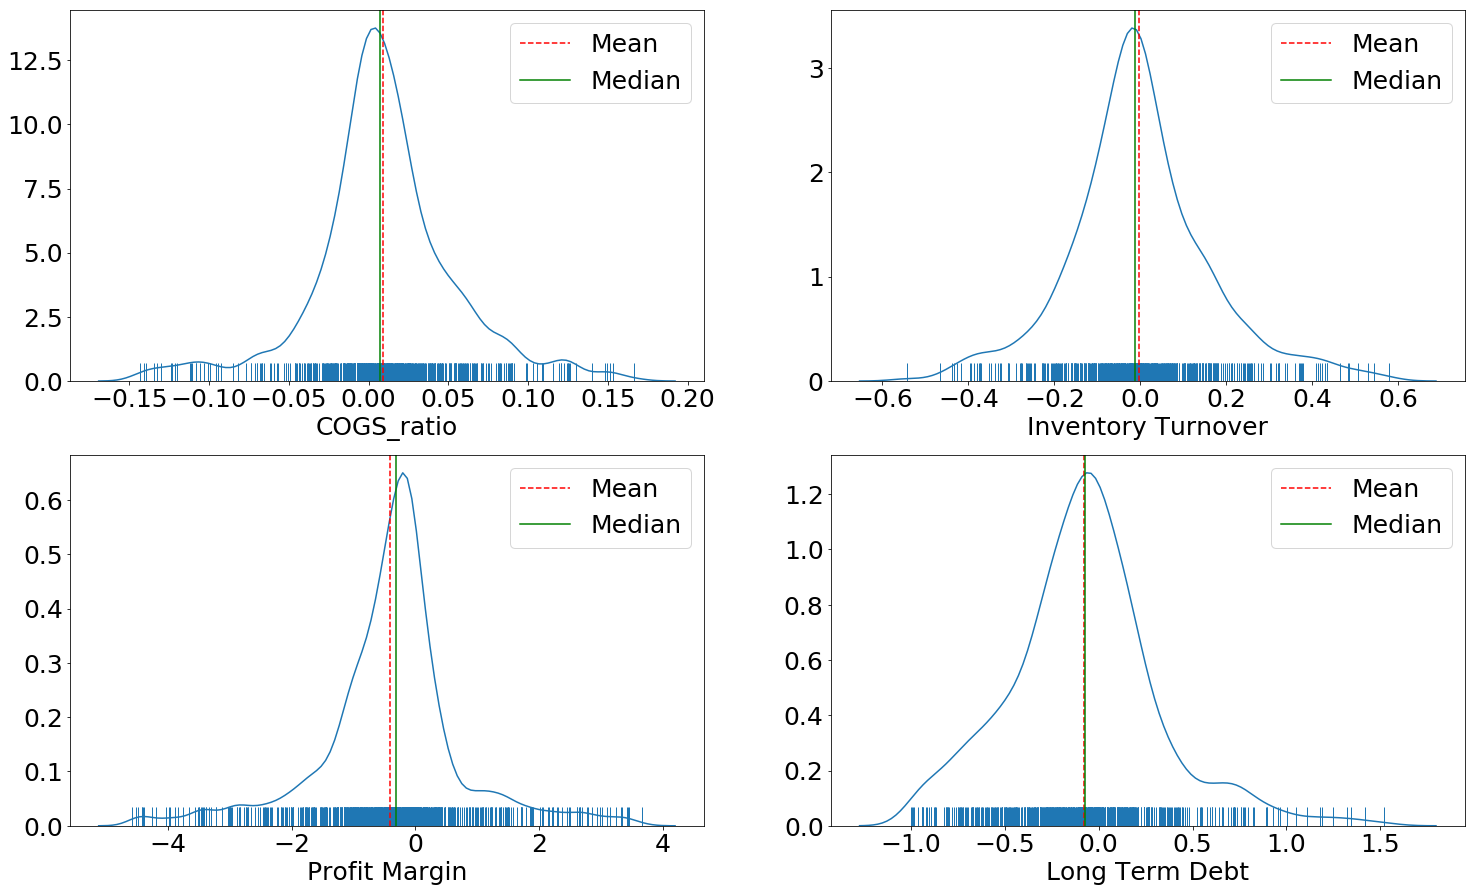

In [33]:
#Distribution Plot
mean_cogs=financial_YoY_expon_iqr['COGS_ratio'].dropna().mean()
median_cogs=financial_YoY_expon_iqr['COGS_ratio'].dropna().median()
fig, ax = plt.subplots(2,2,figsize=(25,15))
sns.distplot(financial_YoY_expon_iqr['COGS_ratio'].dropna(), hist=False, rug=True,ax=ax[0,0])
ax[0,0].axvline(mean_cogs, color='r', linestyle='--')
ax[0,0].axvline(median_cogs, color='g', linestyle='-')
ax[0,0].legend({'Mean':mean_cogs,'Median':median_cogs},fontsize = 25)
ax[0,0].tick_params(axis = 'both', which = 'major', labelsize = 25)
ax[0,0].set_xlabel('COGS_ratio',fontsize=25)

mean_it=financial_YoY_expon_iqr['Inventory Turnover'].dropna().mean()
median_it=financial_YoY_expon_iqr['Inventory Turnover'].dropna().median()

sns.distplot(financial_YoY_expon_iqr['Inventory Turnover'].dropna(), hist=False, rug=True,ax=ax[0,1])
ax[0,1].axvline(mean_it, color='r', linestyle='--')
ax[0,1].axvline(median_it, color='g', linestyle='-')
ax[0,1].legend({'Mean':mean_it,'Median':median_it},fontsize = 25)
ax[0,1].tick_params(axis = 'both', which = 'major', labelsize = 25)
ax[0,1].set_xlabel('Inventory Turnover',fontsize=25)

mean_pm=financial_YoY_expon_iqr['PM'].dropna().mean()
median_pm=financial_YoY_expon_iqr['PM'].dropna().median()

sns.distplot(financial_YoY_expon_iqr['PM'].dropna(), hist=False, rug=True,ax=ax[1,0])
ax[1,0].axvline(mean_pm, color='r', linestyle='--')
ax[1,0].axvline(median_pm, color='g', linestyle='-')
ax[1,0].legend({'Mean':mean_pm,'Median':median_pm},fontsize = 25)
ax[1,0].tick_params(axis = 'both', which = 'major', labelsize = 25)
ax[1,0].set_xlabel('Profit Margin',fontsize=25)

mean_de=financial_YoY_expon_iqr['Long Term Debt'].dropna().mean()
median_de=financial_YoY_expon_iqr['Long Term Debt'].dropna().median()

sns.distplot(financial_YoY_expon_iqr['Long Term Debt'].dropna(), hist=False, rug=True,ax=ax[1,1])
ax[1,1].axvline(mean_de, color='r', linestyle='--')
ax[1,1].axvline(median_de, color='g', linestyle='-')
ax[1,1].legend({'Mean':mean_de,'Median':median_de},fontsize = 25)
ax[1,1].tick_params(axis = 'both', which = 'major', labelsize = 25)
ax[1,1].set_xlabel('Long Term Debt',fontsize=25)

Text(0.5, 0, 'Long Term Debt')

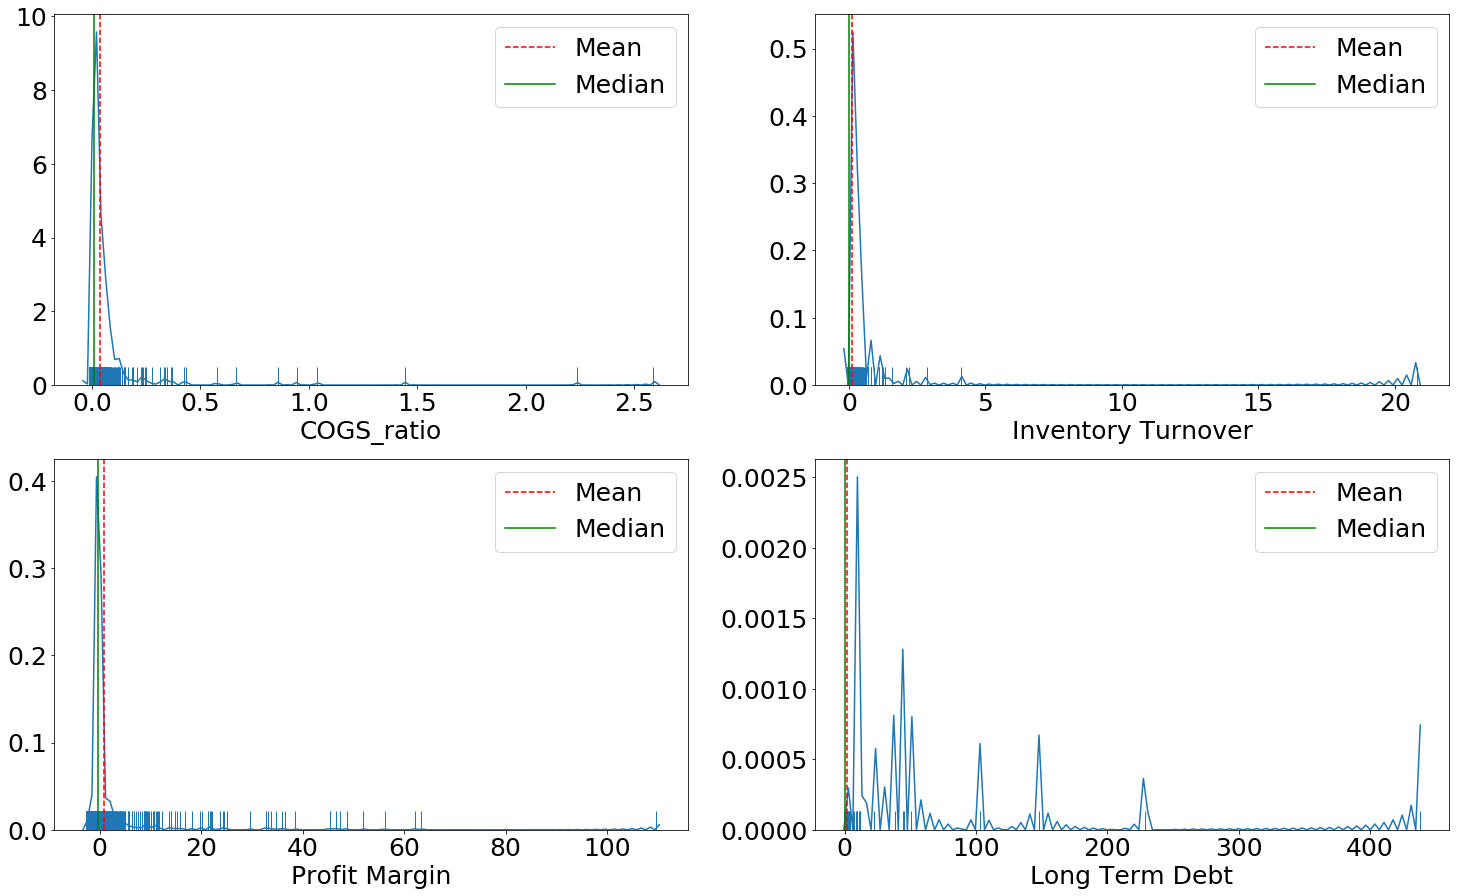

In [34]:
mean_cogs=financial_YoY_expon_win['COGS_ratio'].dropna().mean()
median_cogs=financial_YoY_expon_win['COGS_ratio'].dropna().median()
fig, ax = plt.subplots(2,2,figsize=(25,15))
sns.distplot(financial_YoY_expon_win['COGS_ratio'].dropna(), hist=False, rug=True,ax=ax[0,0])
ax[0,0].axvline(mean_cogs, color='r', linestyle='--')
ax[0,0].axvline(median_cogs, color='g', linestyle='-')
ax[0,0].legend({'Mean':mean_cogs,'Median':median_cogs},fontsize = 25)
ax[0,0].tick_params(axis = 'both', which = 'major', labelsize = 25)
ax[0,0].set_xlabel('COGS_ratio',fontsize=25)

mean_it=financial_YoY_expon_win['Inventory Turnover'].dropna().mean()
median_it=financial_YoY_expon_win['Inventory Turnover'].dropna().median()

sns.distplot(financial_YoY_expon_win['Inventory Turnover'].dropna(), hist=False, rug=True,ax=ax[0,1])
ax[0,1].axvline(mean_it, color='r', linestyle='--')
ax[0,1].axvline(median_it, color='g', linestyle='-')
ax[0,1].legend({'Mean':mean_it,'Median':median_it},fontsize = 25)
ax[0,1].tick_params(axis = 'both', which = 'major', labelsize = 25)
ax[0,1].set_xlabel('Inventory Turnover',fontsize=25)

mean_pm=financial_YoY_expon_win['PM'].dropna().mean()
median_pm=financial_YoY_expon_win['PM'].dropna().median()

sns.distplot(financial_YoY_expon_win['PM'].dropna(), hist=False, rug=True,ax=ax[1,0])
ax[1,0].axvline(mean_pm, color='r', linestyle='--')
ax[1,0].axvline(median_pm, color='g', linestyle='-')
ax[1,0].legend({'Mean':mean_pm,'Median':median_pm},fontsize = 25)
ax[1,0].tick_params(axis = 'both', which = 'major', labelsize = 25)
ax[1,0].set_xlabel('Profit Margin',fontsize=25)

mean_de=financial_YoY_expon_win['Long Term Debt'].dropna().mean()
median_de=financial_YoY_expon_win['Long Term Debt'].dropna().median()

sns.distplot(financial_YoY_expon_win['Long Term Debt'].dropna(), hist=False, rug=True,ax=ax[1,1])
ax[1,1].axvline(mean_de, color='r', linestyle='--')
ax[1,1].axvline(median_de, color='g', linestyle='-')
ax[1,1].legend({'Mean':mean_de,'Median':median_de},fontsize = 25)
ax[1,1].tick_params(axis = 'both', which = 'major', labelsize = 25)
ax[1,1].set_xlabel('Long Term Debt',fontsize=25)

## T-test whether differs from 0

In [36]:
financial_YoY_expon_iqr

Metric Name           Tickers  \
0            000009 CH Equity   
1            000038 CH Equity   
2            000120 KS Equity   
3            000240 KS Equity   
4            000300 KS Equity   
5            000333 CH Equity   
6            000417 CH Equity   
7            000430 KS Equity   
8            000551 CH Equity   
9            000559 CH Equity   
10           000571 CH Equity   
11           000572 CH Equity   
12           000584 CH Equity   
13           000589 CH Equity   
14           000599 CH Equity   
15           000601 CH Equity   
16           000622 CH Equity   
17           000629 CH Equity   
18           000676 CH Equity   
19           000678 CH Equity   
20           000700 CH Equity   
21           000709 CH Equity   
22           000710 CH Equity   
23           000757 CH Equity   
24           000760 CH Equity   
25           000768 CH Equity   
26           000795 CH Equity   
27           000800 CH Equity   
28           000810 CH Equity   
29           000821 CH Equity   
...                       ...   
1489            WBC US Equity   
1490            WCC US Equity   
1491         WFATHZ CH Equity   
1492            WGO US Equity   
1493            WHL IN Equity   
1494            WOR US Equity   
1495            WPP LN Equity   
1496           WPRT CN Equity   
1497           WYNN US Equity   
1498              X US Equity   
1499           XFAB FP Equity   
1500          XIDEQ US Equity   
1501           XLNX US Equity   
1502            XOM US Equity   
1503           XONE US Equity   
1504           XPER US Equity   
1505            XPO US Equity   
1506            XRX US Equity   
1507            XTC CN Equity   
1508          YGEHY US Equity   
1509           YNAP IM Equity   
1510            YOC GR Equity   
1511           YPFD AR Equity   
1512           YTLE MK Equity   
1513           ZAAP US Equity   
1514           ZBRA US Equity   
1515           ZIL2 GR Equity   
1516           ZMZN RM Equity   
1517            ZUO US Equity   
1518          ZXAIY US Equity   

Metric Name                                       Company Name Country  \
0                                     China Baoan Group Co Ltd      CN   
1                          Shenzhen Capstone Industrial Co Ltd      CN   
2                                            CJ Logistics Corp      KR   
3                              Hankook Technology Group Co Ltd      KR   
4                                            Dayou Plus Co Ltd      KR   
5                                           Midea Group Co Ltd      CN   
6                          Hefei Department Store Group Co Ltd      CN   
7                                       Dae Won Kang Up Co Ltd      KR   
8                           Create Technology & Science Co Ltd      CN   
9                                     Wanxiang Qianchao Co Ltd      CN   
10                                      Sundiro Holding Co Ltd      CN   
11                                            Haima Automobi-A      CN   
12                     Jiangsu Hagong Intelligent Robot Co Ltd      CN   
13                                         Guizhou Tyre Co Ltd      CN   
14                                   Qingdao Doublestar Co Ltd      CN   
15                             Guangdong Shaoneng Group Co Ltd      CN   
16                  Hengli Industrial Development Group Co Ltd      CN   
17           Pangang Group Vanadium Titanium & Resources Co...      CN   
18                                  Genimous Technology Co Ltd      CN   
19                         Xiangyang Automobile Bearing Co Ltd      CN   
20                Jiangnan Mould and Plastic Technology Co Ltd      CN   
21                                              Hesteel Co Ltd      CN   
22                                       Berry Genomics Co Ltd      CN   
23                      Sichuan Haowu Electromechanical Co Ltd      CN   
24                                         Steyr Motors Co Ltd      CN   
25                           

In [322]:
#Null Hypothesis: the exponential weighted abnormal score is 0
#Alternative Hypothesis: the exponential weighted abnormal score is not 0
fin=[]
value=[]
p=[]
for i in financial_YoY_19Q1_iqr.columns[3:-1]:
    print('T-test for',i," ",stats.ttest_1samp(financial_YoY_19Q1_iqr[i].dropna(),0))
    fin.append(i)
    value.append(stats.ttest_1samp(financial_YoY_19Q1_iqr[i].dropna(),0)[0])
    p.append(stats.ttest_1samp(financial_YoY_19Q1_iqr[i].dropna(),0)[1])

T-test for AR_TO   Ttest_1sampResult(statistic=-3.9627292939864165, pvalue=8.028043082917886e-05)
T-test for Accounts Payable   Ttest_1sampResult(statistic=-6.506585739214499, pvalue=1.3819550060462634e-10)
T-test for Accounts Receivable - Net   Ttest_1sampResult(statistic=-12.850145586369557, pvalue=1.0145636439516466e-34)
T-test for Basic Earnings per Share   Ttest_1sampResult(statistic=-16.446130069063674, pvalue=1.3988963324659482e-54)
T-test for COGS_ratio   Ttest_1sampResult(statistic=2.0516845264229104, pvalue=0.04052376645912215)
T-test for Cash   Ttest_1sampResult(statistic=-11.059766655324795, pvalue=4.790042775726343e-27)
T-test for Cash From Operations   Ttest_1sampResult(statistic=-16.404123202431965, pvalue=9.374963095570717e-53)
T-test for Cost of Goods & Services Sold   Ttest_1sampResult(statistic=-10.39867042240473, pvalue=6.671713986069841e-24)
T-test for EBIT   Ttest_1sampResult(statistic=-16.66814140400899, pvalue=1.6644921155625306e-55)
T-test for Free Cash Flow to

In [323]:
pd.DataFrame(
    {'metric': fin,
     't': value,
     'p': p
    })

metric          t              p
0                                         AR_TO  -3.962729   8.028043e-05
1                              Accounts Payable  -6.506586   1.381955e-10
2                     Accounts Receivable - Net -12.850146   1.014564e-34
3                      Basic Earnings per Share -16.446130   1.398896e-54
4                                    COGS_ratio   2.051685   4.052377e-02
5                                          Cash -11.059767   4.790043e-27
6                          Cash From Operations -16.404123   9.374963e-53
7                 Cost of Goods & Services Sold -10.398670   6.671714e-24
8                                          EBIT -16.668141   1.664492e-55
9                      Free Cash Flow to Equity -17.286225   7.311442e-55
10                       Free Cash Flow to Firm  -9.903625   1.982333e-20
11                                          GPM  -9.033323   8.724132e-19
12                                 Gross Profit -16.069393   7.059787e-52
13                             Interest Expense  -0.669519   5.034789e-01
14                                  Inventories -10.537562   1.131633e-24
15                           Inventory Turnover  -1.999706   4.589910e-02
16                                   Last Price -27.608157  8.675878e-132
17                               Long Term Debt  -6.443471   2.037232e-10
18                                   Market_Cap -27.417411  3.849550e-127
19               Net Income/Net Profit (Losses) -18.213836   3.210299e-65
20                           Operating Expenses -11.462685   8.636104e-29
21                                           PM -13.199084   4.012009e-37
22                                  R&D Expense  -6.160959   2.009378e-09
23                             Return on Assets -12.698769   3.391029e-34
24                                      Revenue -16.587737   3.862280e-56
25  Selling, General and Administrative Expense -15.232885   2.349643e-47
26                              Short Term Debt -11.094182   7.442333e-27
27                                 Total Equity -21.573765   1.102652e-85
28                            Total Liabilities -12.654564   2.477205e-34
29                                    d_e_ratio   0.595938   5.513446e-01

In [38]:
#Null Hypothesis: the exponential weighted abnormal score is 0
#Alternative Hypothesis: the exponential weighted abnormal score is not 0
for i in financial_YoY_expon_win.columns[3:]:
    print('T-test for',i," ",stats.ttest_1samp(financial_YoY_expon_win[i].dropna(),0))

T-test for AR_TO   Ttest_1sampResult(statistic=4.220715746644074, pvalue=2.756633538235636e-05)
T-test for Accounts Payable   Ttest_1sampResult(statistic=4.957102924873114, pvalue=9.209478390457833e-07)
T-test for Accounts Receivable - Net   Ttest_1sampResult(statistic=2.3130828428759713, pvalue=0.021004615759292602)
T-test for Basic Earnings per Share   Ttest_1sampResult(statistic=3.988824514980714, pvalue=7.056668961327767e-05)
T-test for COGS_ratio   Ttest_1sampResult(statistic=5.925722926358261, pvalue=5.022467809310043e-09)
T-test for Cash From Operations   Ttest_1sampResult(statistic=1.9997517206980129, pvalue=0.045855338671670146)
T-test for Cost of Goods & Services Sold   Ttest_1sampResult(statistic=5.6775913447236475, pvalue=2.0513230013248595e-08)
T-test for EBIT   Ttest_1sampResult(statistic=1.8875190283048104, pvalue=0.059377913113611666)
T-test for Free Cash Flow to Equity   Ttest_1sampResult(statistic=1.5799053135124859, pvalue=0.1146012145868478)
T-test for Free Cash Flo

## T-test different between CN firms, US firms, Other countries firms 

In [39]:
expon_iqr_CN = financial_YoY_expon_iqr[financial_YoY_expon_iqr['Country']=='CN']
expon_iqr_US = financial_YoY_expon_iqr[financial_YoY_expon_iqr['Country']=='US']
for i in financial_YoY_expon_iqr.columns[3:]:
    print('T-test for',i," ",stats.ttest_ind(expon_iqr_CN[i].dropna(),expon_iqr_US[i].dropna(), equal_var = False))

T-test for AR_TO   Ttest_indResult(statistic=-0.18534280245941542, pvalue=0.8530659306096091)
T-test for Accounts Payable   Ttest_indResult(statistic=-1.613782863808968, pvalue=0.13655903670055267)
T-test for Accounts Receivable - Net   Ttest_indResult(statistic=-5.742758600022019, pvalue=1.7967105737819932e-08)
T-test for Basic Earnings per Share   Ttest_indResult(statistic=0.6682141524340179, pvalue=0.5043866538395629)
T-test for COGS_ratio   Ttest_indResult(statistic=1.5060484461780888, pvalue=0.1338237724168571)
T-test for Cash From Operations   Ttest_indResult(statistic=-2.8850062248214337, pvalue=0.004185297690156596)
T-test for Cost of Goods & Services Sold   Ttest_indResult(statistic=-3.4218951167417604, pvalue=0.0007878914380116833)
T-test for EBIT   Ttest_indResult(statistic=-2.939784368427488, pvalue=0.0034810420700650724)
T-test for Free Cash Flow to Equity   Ttest_indResult(statistic=-0.28613470371311434, pvalue=0.7750805418754407)
T-test for Free Cash Flow to Firm   Ttest

In [40]:
expon_win_CN = financial_YoY_expon_win[financial_YoY_expon_win['Country']=='CN']
expon_win_US = financial_YoY_expon_win[financial_YoY_expon_win['Country']=='US']
for i in financial_YoY_expon_win.columns[3:]:
    print('T-test for',i," ",stats.ttest_ind(expon_win_CN[i].dropna(),expon_win_US[i].dropna(), equal_var = False))

T-test for AR_TO   Ttest_indResult(statistic=-0.08634334217529016, pvalue=0.9312340161594097)
T-test for Accounts Payable   Ttest_indResult(statistic=-2.89041025097986, pvalue=0.009938921047579298)
T-test for Accounts Receivable - Net   Ttest_indResult(statistic=-0.19818515831616335, pvalue=0.8430574049509687)
T-test for Basic Earnings per Share   Ttest_indResult(statistic=0.05041062561255247, pvalue=0.9598235713930644)
T-test for COGS_ratio   Ttest_indResult(statistic=0.17837722854696866, pvalue=0.8585599496468903)
T-test for Cash From Operations   Ttest_indResult(statistic=1.151276338309179, pvalue=0.2508026975650687)
T-test for Cost of Goods & Services Sold   Ttest_indResult(statistic=-2.6170414562751865, pvalue=0.009375684847908374)
T-test for EBIT   Ttest_indResult(statistic=0.8840953287563259, pvalue=0.3775165640198308)
T-test for Free Cash Flow to Equity   Ttest_indResult(statistic=-0.5670696615717091, pvalue=0.5711234399214175)
T-test for Free Cash Flow to Firm   Ttest_indResul

## T-Test Between US/CN Degree of Suppliers

## Average Impact Score over time by countries

In [47]:
financial_YoY_18Q2_iqr

Metric Name           Tickers  \
0            000009 CH Equity   
1            000038 CH Equity   
2            000120 KS Equity   
3            000240 KS Equity   
4            000300 KS Equity   
5            000333 CH Equity   
6            000417 CH Equity   
7            000430 KS Equity   
8            000551 CH Equity   
9            000559 CH Equity   
10           000571 CH Equity   
11           000572 CH Equity   
12           000584 CH Equity   
13           000589 CH Equity   
14           000599 CH Equity   
15           000601 CH Equity   
16           000622 CH Equity   
17           000629 CH Equity   
18           000676 CH Equity   
19           000678 CH Equity   
20           000700 CH Equity   
21           000709 CH Equity   
22           000710 CH Equity   
23           000757 CH Equity   
24           000760 CH Equity   
25           000768 CH Equity   
26           000795 CH Equity   
27           000800 CH Equity   
28           000810 CH Equity   
29           000821 CH Equity   
...                       ...   
1489            WBC US Equity   
1490            WCC US Equity   
1491         WFATHZ CH Equity   
1492            WGO US Equity   
1493            WHL IN Equity   
1494            WOR US Equity   
1495            WPP LN Equity   
1496           WPRT CN Equity   
1497           WYNN US Equity   
1498              X US Equity   
1499           XFAB FP Equity   
1500          XIDEQ US Equity   
1501           XLNX US Equity   
1502            XOM US Equity   
1503           XONE US Equity   
1504           XPER US Equity   
1505            XPO US Equity   
1506            XRX US Equity   
1507            XTC CN Equity   
1508          YGEHY US Equity   
1509           YNAP IM Equity   
1510            YOC GR Equity   
1511           YPFD AR Equity   
1512           YTLE MK Equity   
1513           ZAAP US Equity   
1514           ZBRA US Equity   
1515           ZIL2 GR Equity   
1516           ZMZN RM Equity   
1517            ZUO US Equity   
1518          ZXAIY US Equity   

Metric Name                                       Company Name Country  \
0                                     China Baoan Group Co Ltd      CN   
1                          Shenzhen Capstone Industrial Co Ltd      CN   
2                                            CJ Logistics Corp      KR   
3                              Hankook Technology Group Co Ltd      KR   
4                                            Dayou Plus Co Ltd      KR   
5                                           Midea Group Co Ltd      CN   
6                          Hefei Department Store Group Co Ltd      CN   
7                                       Dae Won Kang Up Co Ltd      KR   
8                           Create Technology & Science Co Ltd      CN   
9                                     Wanxiang Qianchao Co Ltd      CN   
10                                      Sundiro Holding Co Ltd      CN   
11                                            Haima Automobi-A      CN   
12                     Jiangsu Hagong Intelligent Robot Co Ltd      CN   
13                                         Guizhou Tyre Co Ltd      CN   
14                                   Qingdao Doublestar Co Ltd      CN   
15                             Guangdong Shaoneng Group Co Ltd      CN   
16                  Hengli Industrial Development Group Co Ltd      CN   
17           Pangang Group Vanadium Titanium & Resources Co...      CN   
18                                  Genimous Technology Co Ltd      CN   
19                         Xiangyang Automobile Bearing Co Ltd      CN   
20                Jiangnan Mould and Plastic Technology Co Ltd      CN   
21                                              Hesteel Co Ltd      CN   
22                                       Berry Genomics Co Ltd      CN   
23                      Sichuan Haowu Electromechanical Co Ltd      CN   
24                                         Steyr Motors Co Ltd      CN   
25                           

In [275]:
financial_YoY_18Q2_iqr['date'] = pd.to_datetime('30-6-2018')
financial_YoY_18Q3_iqr['date'] = pd.to_datetime('30-9-2018')
financial_YoY_18Q4_iqr['date'] = pd.to_datetime('31-12-2018')
financial_YoY_19Q1_iqr['date'] = pd.to_datetime('31-03-2019')
financial_YoY_18Q1_iqr['date'] = pd.to_datetime('31-03-2018')
financial_YoY_17Q4_iqr['date'] = pd.to_datetime('31-12-2017')
total_iqr = pd.concat([financial_YoY_18Q2_iqr,financial_YoY_18Q3_iqr,financial_YoY_18Q4_iqr,financial_YoY_19Q1_iqr,financial_YoY_17Q4_iqr,financial_YoY_18Q1_iqr])
total_iqr["country_group"]=total_iqr["Country"].apply(lambda x: 'Other' if ((x != 'US') and (x != 'CN')) else x)

In [38]:
avg_impact_iqr = pd.pivot_table(total_iqr,index=['country_group','date']
                      ,values=list(total_iqr.columns[3:-2]),aggfunc=np.mean)
avg_impact_iqr.reset_index(inplace=True)

In [39]:
avg_impact_iqr.columns

Index(['country_group', 'date', 'AR_TO', 'Accounts Payable',
       'Accounts Receivable - Net', 'Basic Earnings per Share', 'COGS_ratio',
       'Cash From Operations', 'Cost of Goods & Services Sold', 'EBIT',
       'Free Cash Flow to Equity', 'Free Cash Flow to Firm', 'GPM',
       'Gross Profit', 'Interest Expense', 'Inventories', 'Inventory Turnover',
       'Last Price', 'Long Term Debt', 'Market_Cap',
       'Net Income/Net Profit (Losses)', 'Operating Expenses', 'PM',
       'R&D Expense', 'Return on Assets', 'Revenue',
       'Selling, General and Administrative Expense', 'Short Term Debt',
       'Total Equity', 'Total Liabilities', 'd_e_ratio'],
      dtype='object', name='Metric Name')

[Text(0, 0, '2018Q2'),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, '2018Q3'),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, '2018Q4'),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, '2019Q1')]

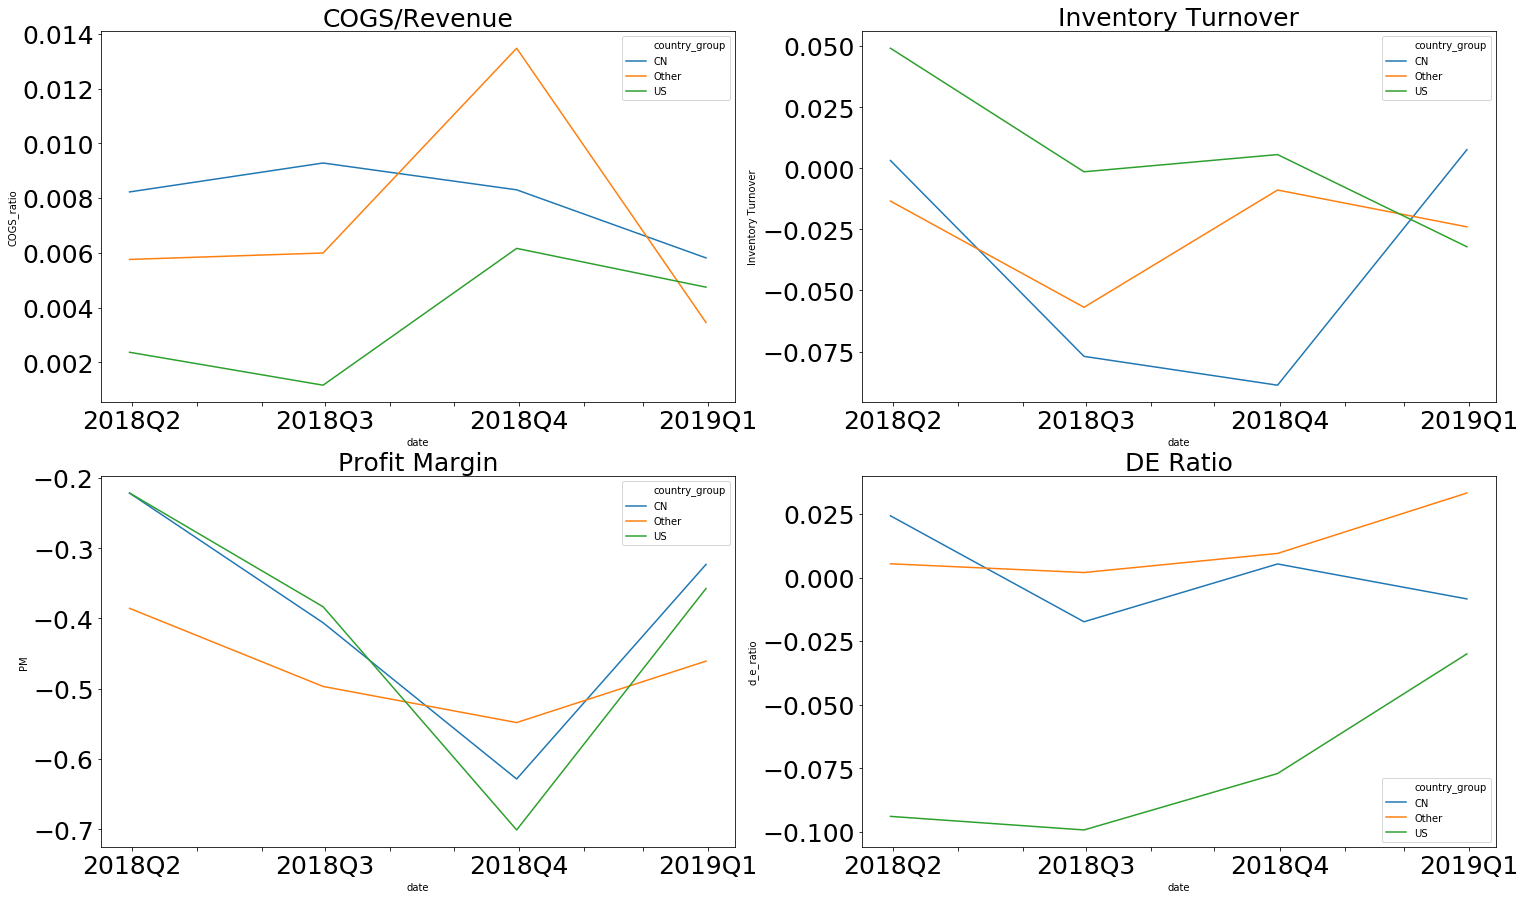

In [45]:
fig, ax = plt.subplots(2,2,figsize=(25,15))
sns.lineplot(data=avg_impact_iqr,x='date',y='COGS_ratio',hue='country_group',ax=ax[0,0])
ax[0,0].tick_params(axis = 'both', which = 'major', labelsize = 25)
ax[0,0].title.set_text("COGS/Revenue")
ax[0,0].title.set_size(25)
ax[0,0].set_xticklabels(["2018Q2","","","2018Q3","","","2018Q4","","","2019Q1"])
sns.lineplot(data=avg_impact_iqr,x='date',y='Inventory Turnover',hue='country_group',ax=ax[0,1])
ax[0,1].tick_params(axis = 'both', which = 'major', labelsize = 25)
ax[0,1].title.set_text("Inventory Turnover")
ax[0,1].title.set_size(25)
ax[0,1].set_xticklabels(["2018Q2","","","2018Q3","","","2018Q4","","","2019Q1"])
sns.lineplot(data=avg_impact_iqr,x='date',y='PM',hue='country_group',ax=ax[1,0])
ax[1,0].tick_params(axis = 'both', which = 'major', labelsize = 25)
ax[1,0].title.set_text("Profit Margin")
ax[1,0].title.set_size(25)
ax[1,0].set_xticklabels(["2018Q2","","","2018Q3","","","2018Q4","","","2019Q1"])
sns.lineplot(data=avg_impact_iqr,x='date',y='d_e_ratio',hue='country_group',ax=ax[1,1])
ax[1,1].tick_params(axis = 'both', which = 'major', labelsize = 25)
ax[1,1].title.set_text("DE Ratio")
ax[1,1].title.set_size(25)
ax[1,1].set_xticklabels(["2018Q2","","","2018Q3","","","2018Q4","","","2019Q1"])

In [49]:
financial_YoY_18Q2_win = pd.pivot_table(financial_YoY,index=["Tickers","Company Name",'Country'],columns=['Metric Name']
                      ,values=['abnor_diff_18Q2'],aggfunc={'abnor_diff_18Q2':np.sum})
financial_YoY_18Q2_win.columns = financial_YoY_18Q2_win.columns.droplevel(0)
financial_YoY_18Q2_win.reset_index(inplace = True)
financial_YoY_18Q2_win=financial_YoY_18Q2_win.replace(np.inf, np.nan)
financial_YoY_18Q2_win=financial_YoY_18Q2_win.replace(0, np.nan)
for i in financial_YoY_expon_win.columns[3:]:
    financial_YoY_18Q2_win[i] = stats.mstats.winsorize(financial_YoY_18Q2_win[i], limits=[0.1, 0.1]).data

In [50]:
financial_YoY_18Q3_win = pd.pivot_table(financial_YoY,index=["Tickers","Company Name",'Country'],columns=['Metric Name']
                      ,values=['abnor_diff_18Q3'],aggfunc={'abnor_diff_18Q3':np.sum})
financial_YoY_18Q3_win.columns = financial_YoY_18Q3_win.columns.droplevel(0)
financial_YoY_18Q3_win.reset_index(inplace = True)
financial_YoY_18Q3_win=financial_YoY_18Q3_win.replace(np.inf, np.nan)
financial_YoY_18Q3_win=financial_YoY_18Q3_win.replace(0, np.nan)
for i in financial_YoY_expon_win.columns[3:]:
    financial_YoY_18Q3_win[i] = stats.mstats.winsorize(financial_YoY_18Q3_win[i], limits=[0.1, 0.1]).data

In [51]:
financial_YoY_18Q4_win = pd.pivot_table(financial_YoY,index=["Tickers","Company Name",'Country'],columns=['Metric Name']
                      ,values=['abnor_diff_18Q4'],aggfunc={'abnor_diff_18Q4':np.sum})
financial_YoY_18Q4_win.columns = financial_YoY_18Q4_win.columns.droplevel(0)
financial_YoY_18Q4_win.reset_index(inplace = True)
financial_YoY_18Q4_win=financial_YoY_18Q4_win.replace(np.inf, np.nan)
financial_YoY_18Q4_win=financial_YoY_18Q4_win.replace(0, np.nan)
for i in financial_YoY_expon_win.columns[3:]:
    financial_YoY_18Q4_win[i] = stats.mstats.winsorize(financial_YoY_18Q4_win[i], limits=[0.1, 0.1]).data

In [52]:
financial_YoY_19Q1_win = pd.pivot_table(financial_YoY,index=["Tickers","Company Name",'Country'],columns=['Metric Name']
                      ,values=['abnor_diff_19Q1'],aggfunc={'abnor_diff_19Q1':np.sum})
financial_YoY_19Q1_win.columns = financial_YoY_19Q1_win.columns.droplevel(0)
financial_YoY_19Q1_win.reset_index(inplace = True)
financial_YoY_19Q1_win=financial_YoY_19Q1_win.replace(np.inf, np.nan)
financial_YoY_19Q1_win=financial_YoY_19Q1_win.replace(0, np.nan)
for i in financial_YoY_expon_win.columns[3:]:
    financial_YoY_19Q1_win[i] = stats.mstats.winsorize(financial_YoY_19Q1_win[i], limits=[0.1, 0.1]).data

In [53]:
financial_YoY_18Q2_win['date'] = pd.to_datetime('30-6-2018')
financial_YoY_18Q3_win['date'] = pd.to_datetime('30-9-2018')
financial_YoY_18Q4_win['date'] = pd.to_datetime('31-12-2018')
financial_YoY_19Q1_win['date'] = pd.to_datetime('31-03-2019')
total_win = pd.concat([financial_YoY_18Q2_win,financial_YoY_18Q3_win,financial_YoY_18Q4_win,financial_YoY_19Q1_win])
total_win["country_group"]=total_win["Country"].apply(lambda x: 'Other' if ((x != 'US') and (x != 'CN')) else x)

In [45]:
avg_impact_win = pd.pivot_table(total_win,index=['country_group','date']
                      ,values=list(total_win.columns[3:-2]),aggfunc=np.mean)
avg_impact_win.reset_index(inplace=True)

[Text(0, 0, '2018Q2'),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, '2018Q3'),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, '2018Q4'),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, '2019Q1')]

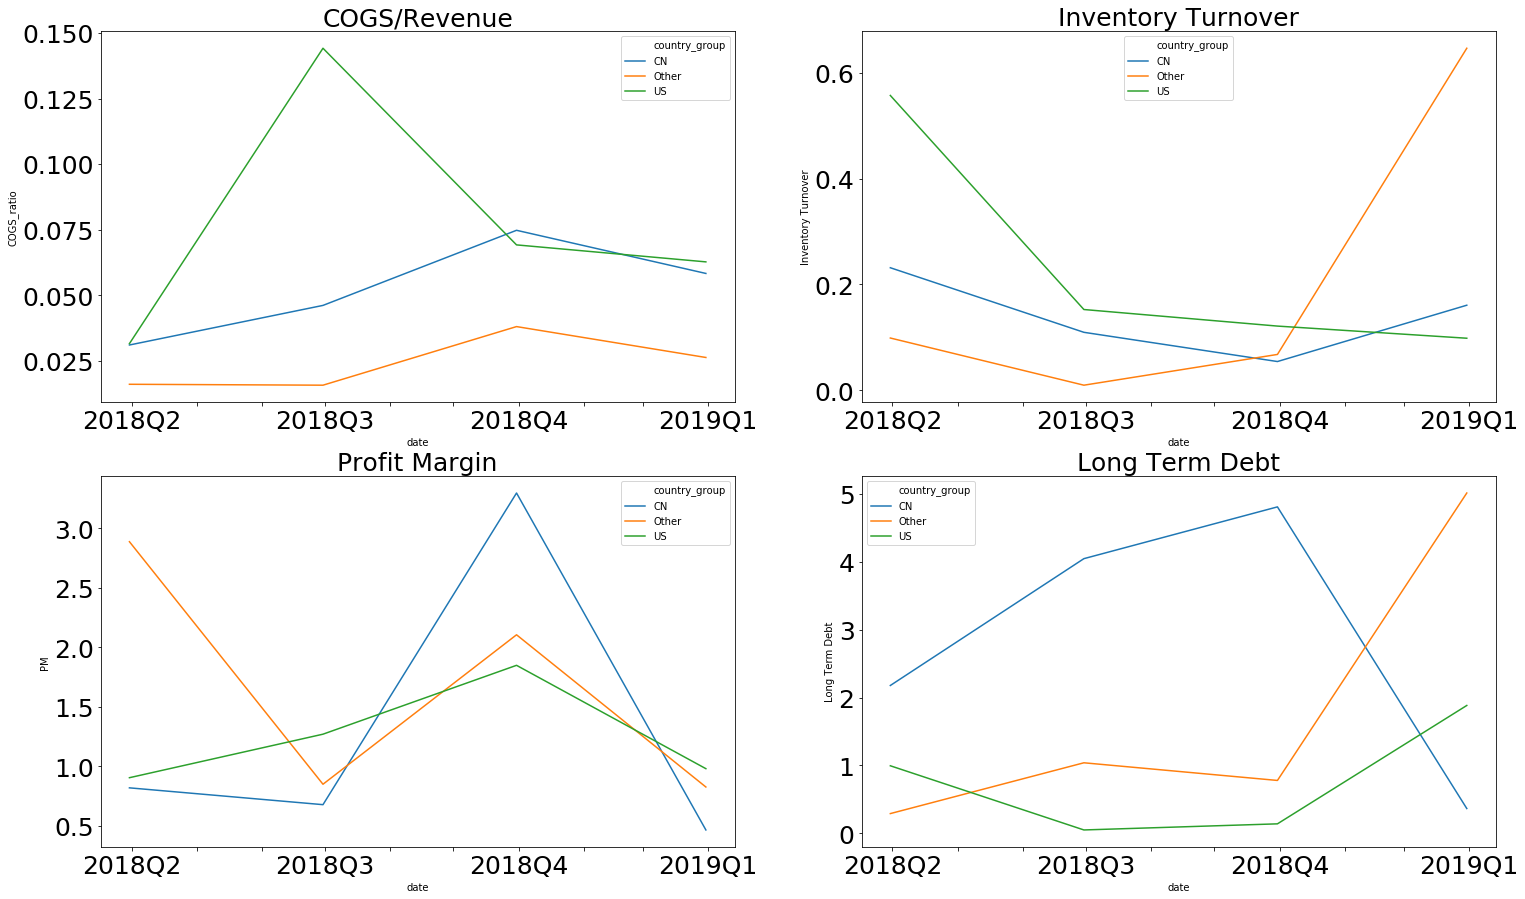

In [46]:
fig, ax = plt.subplots(2,2,figsize=(25,15))
sns.lineplot(data=avg_impact_win,x='date',y='COGS_ratio',hue='country_group',ax=ax[0,0])
ax[0,0].tick_params(axis = 'both', which = 'major', labelsize = 25)
ax[0,0].title.set_text("COGS/Revenue")
ax[0,0].title.set_size(25)
ax[0,0].set_xticklabels(["2018Q2","","","2018Q3","","","2018Q4","","","2019Q1"])
sns.lineplot(data=avg_impact_win,x='date',y='Inventory Turnover',hue='country_group',ax=ax[0,1])
ax[0,1].tick_params(axis = 'both', which = 'major', labelsize = 25)
ax[0,1].title.set_text("Inventory Turnover")
ax[0,1].title.set_size(25)
ax[0,1].set_xticklabels(["2018Q2","","","2018Q3","","","2018Q4","","","2019Q1"])
sns.lineplot(data=avg_impact_win,x='date',y='PM',hue='country_group',ax=ax[1,0])
ax[1,0].tick_params(axis = 'both', which = 'major', labelsize = 25)
ax[1,0].title.set_text("Profit Margin")
ax[1,0].title.set_size(25)
ax[1,0].set_xticklabels(["2018Q2","","","2018Q3","","","2018Q4","","","2019Q1"])
sns.lineplot(data=avg_impact_win,x='date',y='Long Term Debt',hue='country_group',ax=ax[1,1])
ax[1,1].tick_params(axis = 'both', which = 'major', labelsize = 25)
ax[1,1].title.set_text("Long Term Debt")
ax[1,1].title.set_size(25)
ax[1,1].set_xticklabels(["2018Q2","","","2018Q3","","","2018Q4","","","2019Q1"])

## PCA method on all abnormal changes

In [395]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler

### IQR

In [396]:
req_col2 = ['AR_TO', 'Accounts\nPayable',
       'Accounts\nReceivable', 'BEPS', 'COGS_ratio',
       'CFO', 'COGS', 'EBIT',
       'FCFE', 'FCFF', 'GPM',
       'Gross\nProfit', 'Interest\nExpense', 'Inventories', 'Inventory\nTurnover', 'Long Term\nDebt',
       'Net Income', 'Operating\nExpenses', 'PM',
       'R&D Expense', 'RoA', 'Revenue',
       'SG&A', 'Short Term\nDebt',
       'Total Equity', 'Total\nLiabilities', 'd_e_ratio']
scaler = MinMaxScaler()

In [55]:
req_col = ['AR_TO', 'Accounts Payable',
       'Accounts Receivable - Net', 'Basic Earnings per Share', 'COGS_ratio',
       'Cash From Operations', 'Cost of Goods & Services Sold', 'EBIT',
       'Free Cash Flow to Equity', 'Free Cash Flow to Firm', 'GPM',
       'Gross Profit', 'Interest Expense', 'Inventories', 'Inventory Turnover', 'Long Term Debt',
       'Net Income/Net Profit (Losses)', 'Operating Expenses', 'PM',
       'R&D Expense', 'Return on Assets', 'Revenue',
       'Selling, General and Administrative Expense', 'Short Term Debt',
       'Total Equity', 'Total Liabilities', 'd_e_ratio']
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
x_18Q2 = financial_YoY_18Q2_iqr[req_col].values
x_18Q2 = StandardScaler().fit_transform(x_18Q2)
imp.fit(x_18Q2)
x_18Q2= imp.transform(x_18Q2)

In [58]:
pca_18Q2 = PCA(n_components=5)
pca_18Q2.fit(x_18Q2)
X_pca_18Q2=pca_18Q2.transform(x_18Q2)
scaler.fit(X_pca_18Q2)
X_pca_18Q2=scaler.transform(X_pca_18Q2)

In [59]:
pca_iqr_18Q2 = pd.DataFrame(data = X_pca_18Q2, index =financial_YoY_18Q2_iqr['Tickers']
             , columns = ['General Performances', 'Profitability','Operation Efficiency', 'Cost control','Inventories Management or financial risk'])

In [61]:
ex_variance=np.var(X_pca_18Q2,axis=0)
ex_variance_ratio = ex_variance/np.sum(ex_variance)
print (ex_variance_ratio)

[0.20268373 0.23464597 0.18935126 0.18922135 0.18409769]


/Users/Saik/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


<Figure size 1008x2160 with 0 Axes>

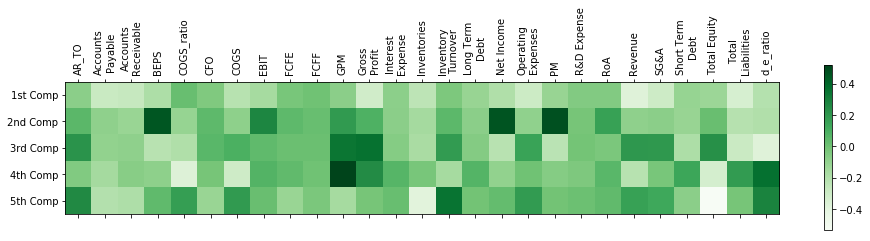

In [63]:
fig = plt.figure(figsize=(14,30))
plt.matshow(pca_18Q2.components_,cmap='Greens')
plt.yticks([0,1,2,3,4],['1st Comp','2nd Comp','3rd Comp','4th Comp','5th Comp'],fontsize=10)
plt.colorbar()
plt.xticks(range(len(req_col)),req_col2,rotation=90,ha='center')
plt.margins(0.5)
plt.tight_layout()
plt.savefig('PCA_18Q2_IQR.png')
plt.show()# 


In [64]:
pd.DataFrame(pca_18Q2.components_,columns=req_col,index=['1st Comp','2nd Comp','3rd Comp','4th Comp','5th Comp']).T

1st Comp  2nd Comp  3rd Comp  \
AR_TO                                       -0.076197  0.055054  0.220950   
Accounts Payable                            -0.283605 -0.090181 -0.098499   
Accounts Receivable - Net                   -0.268879 -0.116959 -0.088694   
Basic Earnings per Share                    -0.182404  0.458631 -0.218898   
COGS_ratio                                   0.023285 -0.110703 -0.189306   
Cash From Operations                        -0.042543  0.048092  0.060081   
Cost of Goods & Services Sold               -0.213810 -0.084415  0.096479   
EBIT                                        -0.156398  0.272621  0.042963   
Free Cash Flow to Equity                    -0.023193  0.045680  0.014364   
Free Cash Flow to Firm                       0.004093  0.021740  0.013870   
GPM                                         -0.077611  0.191594  0.343153   
Gross Profit                                -0.311873  0.090688  0.360821   
Interest Expense                            -0.079384 -0.073999 -0.060129   
Inventories                                 -0.234708 -0.153540 -0.172081   
Inventory Turnover                          -0.035869  0.052368  0.185896   
Long Term Debt                              -0.114887 -0.074259 -0.056052   
Net Income/Net Profit (Losses)              -0.190633  0.463046 -0.219288   
Operating Expenses                          -0.294340 -0.093739  0.153605   
PM                                          -0.113396  0.473292 -0.228027   
R&D Expense                                 -0.052880 -0.018383 -0.009946   
Return on Assets                            -0.050813  0.164004 -0.031422   
Revenue                                     -0.375752 -0.086254  0.203514   
Selling, General and Administrative Expense -0.297754 -0.075422  0.198772   
Short Term Debt                             -0.107122 -0.114111 -0.184093   
Total Equity                                -0.124627  0.018203  0.234255   
Total Liabilities                           -0.338078 -0.212416 -0.284970   
d_e_ratio                                   -0.208769 -0.194829 -0.374378   

                                             4th Comp  5th Comp  
AR_TO                                       -0.046464  0.263156  
Accounts Payable                            -0.154833 -0.203548  
Accounts Receivable - Net                   -0.066674 -0.186364  
Basic Earnings per Share                    -0.082785  0.043122  
COGS_ratio                                  -0.367617  0.174109  
Cash From Operations                        -0.018488 -0.118248  
Cost of Goods & Services Sold               -0.302385  0.190087  
EBIT                                         0.075067  0.016731  
Free Cash Flow to Equity                     0.038565 -0.115990  
Free Cash Flow to Firm                       0.001619 -0.032464  
GPM                                          0.518487 -0.158061  
Gross Profit                                 0.252514 -0.018395  
Interest Expense                             0.069173  0.022389  
Inventories                                 -0.020598 -0.388491  
Inventory Turnover                          -0.158972  0.351941  
Long Term Debt                               0.073486 -0.006569  
Net Income/Net Profit (Losses)              -0.095835  0.030852  
Operating Expenses                           0.001687  0.188824  
PM                                          -0.061325 -0.004114  
R&D Expense                                 -0.036992  0.012207  
Return on Assets                             0.060891  0.037652  
Revenue                                     -0.215292  0.163162  
Selling, General and Administrative Expense -0.021859  0.132434  
Short Term Debt                              0.140294 -0.076549  
Total Equity                                -0.329340 -0.534546  
Total Liabilities                            0.188118 -0.016691  
d_e_ratio                                    0.362853  0.287448

In [76]:
np.sum(pca_18Q2.explained_variance_ratio_)

0.5001971834089968

In [68]:
x_19Q1 = financial_YoY_19Q1_iqr[req_col].values
x_19Q1 = StandardScaler().fit_transform(x_19Q1)
imp.fit(x_19Q1)
x_19Q1= imp.transform(x_19Q1)

In [70]:
pca = PCA(n_components=5)
pca.fit(x_19Q1)
X_pca_19Q1=pca.transform(x_19Q1)
X_pca_19Q1[1]=-X_pca_19Q1[1]
X_pca_19Q1[2]=-X_pca_19Q1[2]
X_pca_19Q1[3]=-X_pca_19Q1[3]
X_pca_19Q1[4]=-X_pca_19Q1[4]

In [71]:
scaler.fit(X_pca_19Q1)
X_pca_19Q1=scaler.transform(X_pca_19Q1)
pca_iqr_19Q1 = pd.DataFrame(data = X_pca_19Q1, index =financial_YoY_18Q2_iqr['Tickers']
             , columns = ['General Performances', 'Profitability','Operation Efficiency', 'Cost control','Inventories Management or financial risk'])

/Users/Saik/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


<Figure size 1008x2160 with 0 Axes>

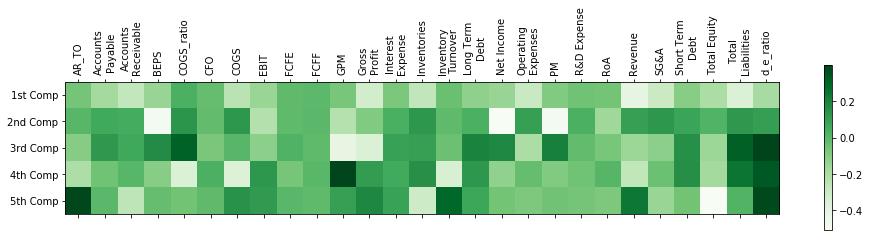

In [72]:
fig = plt.figure(figsize=(14,30))
plt.matshow(pca.components_,cmap='Greens')
plt.yticks([0,1,2,3,4],['1st Comp','2nd Comp','3rd Comp','4th Comp','5th Comp'],fontsize=10)
plt.colorbar()
plt.xticks(range(len(req_col)),req_col2,rotation=90,ha='center')
plt.margins(0.5)
plt.tight_layout()
plt.savefig('PCA_18Q2_IQR.png')
plt.show()# 

In [73]:
pd.DataFrame(pca.components_,columns=req_col,index=['1st Comp','2nd Comp','3rd Comp','4th Comp','5th Comp']).T

1st Comp  2nd Comp  3rd Comp  \
AR_TO                                       -0.061116  0.007689 -0.102204   
Accounts Payable                            -0.179298  0.061124  0.123650   
Accounts Receivable - Net                   -0.269220  0.048503  0.064975   
Basic Earnings per Share                    -0.147123 -0.486870  0.171698   
COGS_ratio                                   0.033241  0.135562  0.311256   
Cash From Operations                        -0.024153 -0.016679 -0.071430   
Cost of Goods & Services Sold               -0.243548  0.128042  0.007950   
EBIT                                        -0.149272 -0.222702 -0.117432   
Free Cash Flow to Equity                    -0.014427 -0.010614  0.023962   
Free Cash Flow to Firm                      -0.005085  0.000367 -0.010196   
GPM                                         -0.067978 -0.226195 -0.407835   
Gross Profit                                -0.322544 -0.090481 -0.359206   
Interest Expense                            -0.073608  0.040178  0.092940   
Inventories                                 -0.266773  0.126913  0.097961   
Inventory Turnover                          -0.034097 -0.010920 -0.037912   
Long Term Debt                              -0.125953  0.031250  0.197855   
Net Income/Net Profit (Losses)              -0.144617 -0.508331  0.179478   
Operating Expenses                          -0.288846  0.101112 -0.199593   
PM                                          -0.089026 -0.487936  0.209040   
R&D Expense                                 -0.045767  0.032759 -0.018362   
Return on Assets                            -0.057704 -0.164834 -0.067599   
Revenue                                     -0.405652  0.098194 -0.161062   
Selling, General and Administrative Expense -0.296450  0.127275 -0.117247   
Short Term Debt                             -0.106150  0.082392  0.152255   
Total Equity                                -0.198050  0.020577 -0.160352   
Total Liabilities                           -0.357590  0.124859  0.318024   
d_e_ratio                                   -0.188968  0.101445  0.399371   

                                             4th Comp  5th Comp  
AR_TO                                       -0.210538  0.385817  
Accounts Payable                            -0.045280 -0.000299  
Accounts Receivable - Net                    0.007012 -0.255911  
Basic Earnings per Share                    -0.104784 -0.025327  
COGS_ratio                                  -0.357049 -0.052617  
Cash From Operations                         0.031077 -0.013689  
Cost of Goods & Services Sold               -0.361897  0.147046  
EBIT                                         0.127545  0.118356  
Free Cash Flow to Equity                    -0.064947  0.003886  
Free Cash Flow to Firm                       0.002092 -0.010336  
GPM                                          0.394676  0.098540  
Gross Profit                                 0.111564  0.185273  
Interest Expense                             0.056235  0.089695  
Inventories                                  0.154566 -0.304269  
Inventory Turnover                          -0.347469  0.293316  
Long Term Debt                               0.126914  0.075430  
Net Income/Net Profit (Losses)              -0.126417 -0.058020  
Operating Expenses                          -0.023954 -0.078854  
PM                                          -0.090017 -0.048257  
R&D Expense                                 -0.046069 -0.061941  
Return on Assets                             0.011606 -0.076789  
Revenue                                     -0.264131  0.239911  
Selling, General and Administrative Expense -0.039685 -0.149792  
Short Term Debt                              0.158161 -0.052544  
Total Equity                                -0.180598 -0.509403  
Total Liabilities                            0.247464  0.019481  
d_e_ratio                                    0.336823  0.381637

In [75]:
np.sum(pca.explained_variance_ratio_)

0.5091931928171298

In [77]:
x_18Q3 = financial_YoY_18Q3_iqr[req_col].values
x_18Q3 = StandardScaler().fit_transform(x_18Q3)
imp.fit(x_18Q3)
x_18Q3= imp.transform(x_18Q3)
pca = PCA(n_components=5)
pca.fit(x_18Q3)
X_pca_18Q3=pca.transform(x_18Q3)
X_pca_18Q3[1]=-X_pca_18Q3[1]
X_pca_18Q3[2]=-X_pca_18Q3[2]
X_pca_18Q3[4]=-X_pca_18Q3[4]
scaler.fit(X_pca_18Q3)
X_pca_18Q3=scaler.transform(X_pca_18Q3)
pca_iqr_18Q3 = pd.DataFrame(data = X_pca_18Q3, index =financial_YoY_18Q3_iqr['Tickers']
             , columns = ['General Performances', 'Profitability','Operation Efficiency', 'Cost control','Inventories Management or financial risk'])

/Users/Saik/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


<Figure size 1008x2160 with 0 Axes>

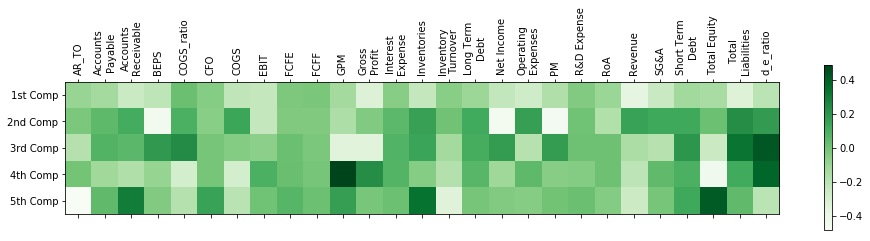

In [78]:
fig = plt.figure(figsize=(14,30))
plt.matshow(pca.components_,cmap='Greens')
plt.yticks([0,1,2,3,4],['1st Comp','2nd Comp','3rd Comp','4th Comp','5th Comp'],fontsize=10)
plt.colorbar()
plt.xticks(range(len(req_col)),req_col2,rotation=90,ha='center')
plt.margins(0.5)
plt.tight_layout()
plt.savefig('PCA_18Q2_IQR.png')
plt.show()# 



In [79]:
pd.DataFrame(pca.components_,columns=req_col,index=['1st Comp','2nd Comp','3rd Comp','4th Comp','5th Comp']).T

1st Comp  2nd Comp  3rd Comp  \
AR_TO                                       -0.093898 -0.019147 -0.188491   
Accounts Payable                            -0.135412  0.052019  0.079910   
Accounts Receivable - Net                   -0.250618  0.111123  0.060719   
Basic Earnings per Share                    -0.212553 -0.451610  0.187303   
COGS_ratio                                   0.022249  0.097805  0.240069   
Cash From Operations                        -0.047639 -0.057243 -0.010055   
Cost of Goods & Services Sold               -0.217066  0.142458 -0.043805   
EBIT                                        -0.233008 -0.233573 -0.065045   
Free Cash Flow to Equity                    -0.024512 -0.031802  0.020081   
Free Cash Flow to Firm                      -0.015627 -0.029871 -0.018193   
GPM                                         -0.133794 -0.161943 -0.345957   
Gross Profit                                -0.330684 -0.033450 -0.350101   
Interest Expense                            -0.054266  0.054165  0.080905   
Inventories                                 -0.233820  0.163935  0.145181   
Inventory Turnover                          -0.056137  0.004793 -0.131663   
Long Term Debt                              -0.110187  0.119305  0.108043   
Net Income/Net Profit (Losses)              -0.228334 -0.454625  0.177643   
Operating Expenses                          -0.273711  0.164888 -0.191075   
PM                                          -0.168051 -0.459360  0.176762   
R&D Expense                                 -0.039118  0.011080  0.013155   
Return on Assets                            -0.104091 -0.173926  0.015427   
Revenue                                     -0.373371  0.154107 -0.153936   
Selling, General and Administrative Expense -0.248458  0.132549 -0.190094   
Short Term Debt                             -0.126732  0.126211  0.199923   
Total Equity                                -0.144136  0.018773 -0.257783   
Total Liabilities                           -0.333701  0.232585  0.328663   
d_e_ratio                                   -0.206608  0.180747  0.426396   

                                             4th Comp  5th Comp  
AR_TO                                       -0.002620 -0.484463  
Accounts Payable                            -0.121586  0.043152  
Accounts Receivable - Net                   -0.166700  0.299241  
Basic Earnings per Share                    -0.092381 -0.038995  
COGS_ratio                                  -0.291125 -0.181259  
Cash From Operations                        -0.009697  0.154126  
Cost of Goods & Services Sold               -0.294024 -0.200397  
EBIT                                         0.098186  0.012100  
Free Cash Flow to Equity                     0.025191  0.071343  
Free Cash Flow to Firm                      -0.007656  0.019254  
GPM                                          0.486453  0.168268  
Gross Profit                                 0.233617 -0.012468  
Interest Expense                             0.076130  0.016948  
Inventories                                 -0.044660  0.337344  
Inventory Turnover                          -0.179699 -0.342728  
Long Term Debt                               0.067398 -0.009717  
Net Income/Net Profit (Losses)              -0.117135 -0.038296  
Operating Expenses                           0.051150 -0.050473  
PM                                          -0.055635  0.001425  
R&D Expense                                 -0.043564  0.023457  
Return on Assets                             0.016012 -0.044014  
Revenue                                     -0.210504 -0.263108  
Selling, General and Administrative Expense  0.045385 -0.008255  
Short Term Debt                              0.096704  0.127074  
Total Equity                                -0.439502  0.416291  
Total Liabilities                            0.122232  0.045302  
d_e_ratio                                    0.382106 -0.206354

In [80]:
np.sum(pca.explained_variance_ratio_)

0.49269742949513146

In [ ]:
x_18Q4 = financial_YoY_18Q4_iqr[req_col].values
x_18Q4 = StandardScaler().fit_transform(x_18Q4)
imp.fit(x_18Q4)
x_18Q4= imp.transform(x_18Q4)
pca = PCA(n_components=5)
pca.fit(x_18Q4)
X_pca_18Q4=pca.transform(x_18Q4)
X_pca_18Q4[1]=-X_pca_18Q4[1]
X_pca_18Q4[2]=-X_pca_18Q4[2]
X_pca_18Q4[4]=-X_pca_18Q4[4]
scaler.fit(X_pca_18Q4)
X_pca_18Q4=scaler.transform(X_pca_18Q4)
pca_iqr_18Q4 = pd.DataFrame(data = X_pca_18Q4, index =financial_YoY_18Q4_iqr['Tickers']
             , columns = ['General Performances', 'Profitability','Operation Efficiency', 'Cost control','Inventories Management or financial risk'])

In [ ]:
fig = plt.figure(figsize=(14,30))
plt.matshow(pca.components_,cmap='Greens')
plt.yticks([0,1,2,3,4],['1st Comp','2nd Comp','3rd Comp','4th Comp','5th Comp'],fontsize=10)
plt.colorbar()
plt.xticks(range(len(req_col)),req_col2,rotation=90,ha='center')
plt.margins(0.5)
plt.tight_layout()
plt.savefig('PCA_18Q2_IQR.png')
plt.show()# 

In [ ]:
pd.DataFrame(pca.components_,columns=req_col,index=['1st Comp','2nd Comp','3rd Comp','4th Comp','5th Comp']).T

###  Winsorizing

In [ ]:
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
x_win_18Q2 = financial_YoY_18Q2_win[req_col].values
x_win_18Q2 = StandardScaler().fit_transform(x_18Q2)
imp.fit(x_win_18Q2)
x_win_18Q2= imp.transform(x_win_18Q2)
pca = PCA(n_components=5)
pca.fit(x_win_18Q2)
X_win_pca_18Q2=pca.transform(x_win_18Q2)
X_win_pca_18Q2[3]=-X_win_pca_18Q2[3]
X_win_pca_18Q2[4]=-X_win_pca_18Q2[4]
scaler.fit(X_win_pca_18Q2)
X_win_pca_18Q2=scaler.transform(X_win_pca_18Q2)
pca_win_18Q2 = pd.DataFrame(data = X_win_pca_18Q2, index =financial_YoY_18Q2_win['Tickers']
             , columns = ['Profitability', 'General Performances','Operating Efficiency', 'Financial Risk','Cost Control or IM'])

In [ ]:
pca_rotation= varimax(pca.components_)
fig = plt.figure(figsize=(14,30))
plt.matshow(pca_rotation,cmap='Greens')
plt.yticks([0,1,2,3,4],['1st Comp','2nd Comp','3rd Comp','4th Comp','5th Comp'],fontsize=10)
plt.colorbar()
plt.xticks(range(len(req_col)),req_col2,rotation=90,ha='center')
plt.margins(0.5)
plt.tight_layout()
plt.show()# 

In [ ]:
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
x_win_18Q3 = financial_YoY_18Q3_win[req_col].values
x_win_18Q3 = StandardScaler().fit_transform(x_18Q3)
imp.fit(x_win_18Q3)
x_win_18Q3= imp.transform(x_win_18Q3)
pca = PCA(n_components=5)
pca.fit(x_win_18Q3)
X_win_pca_18Q3=pca.transform(x_win_18Q3)
X_win_pca_18Q3[2]=-X_win_pca_18Q3[2]
scaler.fit(X_win_pca_18Q3)
X_win_pca_18Q3=scaler.transform(X_win_pca_18Q3)
pca_win_18Q3 = pd.DataFrame(data = X_win_pca_18Q3, index =financial_YoY_18Q3_win['Tickers']
             , columns = ['Financial Risk', 'General Performances','Operating Efficiency', 'Profitability','Cost Control or IM'])

In [ ]:
pca_rotation= varimax(pca.components_)
fig = plt.figure(figsize=(14,30))
plt.matshow(pca_rotation,cmap='Greens')
plt.yticks([0,1,2,3,4],['1st Comp','2nd Comp','3rd Comp','4th Comp','5th Comp'],fontsize=10)
plt.colorbar()
plt.xticks(range(len(req_col)),req_col2,rotation=90,ha='center')
plt.margins(0.5)
plt.tight_layout()
plt.show()# 

In [ ]:
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
x_win_18Q4 = financial_YoY_18Q4_win[req_col].values
x_win_18Q4 = StandardScaler().fit_transform(x_18Q4)
imp.fit(x_win_18Q4)
x_win_18Q4= imp.transform(x_win_18Q4)
pca = PCA(n_components=5)
pca.fit(x_win_18Q4)
X_win_pca_18Q4=pca.transform(x_win_18Q4)
X_win_pca_18Q4[2]=-X_win_pca_18Q4[2]
X_win_pca_18Q4[4]=-X_win_pca_18Q4[4]
scaler.fit(X_win_pca_18Q4)
X_win_pca_18Q4=scaler.transform(X_win_pca_18Q4)
pca_win_18Q4 = pd.DataFrame(data = X_win_pca_18Q4, index =financial_YoY_18Q4_win['Tickers']
             , columns = ['Operating Efficiency', 'General Performances', 'Profitability','Financial Risk','Cost Control or IM'])

In [ ]:
pca_rotation= varimax(pca.components_)
pca_rotation

In [ ]:
pca_rotation= varimax(pca.components_)
fig = plt.figure(figsize=(14,30))
plt.matshow(pca_rotation,cmap='Greens')
plt.yticks([0,1,2,3,4],['1st Comp','2nd Comp','3rd Comp','4th Comp','5th Comp'],fontsize=10)
plt.colorbar()
plt.xticks(range(len(req_col)),req_col2,rotation=90,ha='center')
plt.margins(0.5)
plt.tight_layout()
plt.show()# 

In [ ]:
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
x_win_19Q1 = financial_YoY_19Q1_win[req_col].values
x_win_19Q1 = StandardScaler().fit_transform(x_18Q4)
imp.fit(x_win_19Q1)
x_win_18Q4= imp.transform(x_win_19Q1)
pca = PCA(n_components=4)
pca.fit(x_win_19Q1)
#X_win_pca_19Q1=pca.transform(x_win_19Q1)
#X_win_pca_19Q1[2]=-X_win_pca_19Q1[2]
#scaler.fit(X_win_pca_19Q1)
#X_win_pca_19Q1=scaler.transform(X_win_pca_19Q1)
#pca_win_19Q1 = pd.DataFrame(data = X_win_pca_19Q1, index =financial_YoY_19Q1_win['Tickers']
#             , columns = [ 'General Performances', 'Profitability','Cost Control or IM','Financial Risk','Operating Efficiency'])

In [ ]:
pca_rotation= varimax(pca.components_)
fig = plt.figure(figsize=(14,30))
plt.matshow(pca_rotation,cmap='Greens')
plt.yticks([0,1,2,3,4],['1st Comp','2nd Comp','3rd Comp','4th Comp','5th Comp'],fontsize=10)
plt.colorbar()
plt.xticks(range(len(req_col)),req_col2,rotation=90,ha='center')
plt.margins(0.5)
plt.tight_layout()
plt.savefig('PCA_18Q2_IQR.png')
plt.show()# 

In [ ]:
np.sum(pca.explained_variance_ratio_)

In [ ]:
def varimax(Phi, gamma = 1, q = 20, tol = 1e-6):
    from numpy import eye, asarray, dot, sum, diag
    from numpy.linalg import svd
    p,k = Phi.shape
    R = eye(k)
    d=0
    for i in range(q):
        d_old = d
        Lambda = dot(Phi, R)
        u,s,vh = svd(dot(Phi.T,asarray(Lambda)**3 - (gamma/p) * dot(Lambda, diag(diag(dot(Lambda.T,Lambda))))))
        R = dot(u,vh)
        d = sum(s)
        if d/d_old < tol: break
    return dot(Phi, R)

In [ ]:
pca_rotation= varimax(pca.components_)
pca_rotation

##  Average PCA Impact Score over time by countries

In [689]:
name = financial[['Tickers','Company Name','Country']].drop_duplicates()
pca_iqr_18Q2['date'] = pd.to_datetime('30-6-2018')
pca_iqr_18Q2.reset_index(inplace=True)
pca_iqr_18Q3['date'] = pd.to_datetime('30-9-2018')
pca_iqr_18Q3.reset_index(inplace=True)
pca_iqr_18Q4['date'] = pd.to_datetime('31-12-2018')
pca_iqr_18Q4.reset_index(inplace=True)
pca_iqr_19Q1['date'] = pd.to_datetime('31-03-2019')
pca_iqr_19Q1.reset_index(inplace=True)
pca_win_18Q2['date'] = pd.to_datetime('30-6-2018')
pca_win_18Q2.reset_index(inplace=True)
pca_win_18Q3['date'] = pd.to_datetime('30-9-2018')
pca_win_18Q3.reset_index(inplace=True)
pca_win_18Q4['date'] = pd.to_datetime('31-12-2018')
pca_win_18Q4.reset_index(inplace=True)
pca_win_19Q1['date'] = pd.to_datetime('31-03-2019')
pca_win_19Q1.reset_index(inplace=True)

In [700]:
pca_iqr = pd.concat([pca_iqr_18Q2,pca_iqr_18Q3,pca_iqr_18Q4,pca_iqr_19Q1])
pca_iqr_1 = pd.merge(pca_iqr,name,how='left')
pca_iqr_1['country_group']=pca_iqr_1['Country'].apply(lambda x: 'Other' if ((x != 'US') and (x != 'CN')) else x)
avg_pca_iqr = pd.pivot_table(pca_iqr_1,index=['country_group','date']
                      ,values=['General Performances', 'Profitability','Operation Efficiency', 'Cost control','Inventories Management or financial risk'],aggfunc=np.mean)
avg_pca_iqr.reset_index(inplace=True)

[Text(0, 0, '2018Q2'),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, '2018Q3'),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, '2018Q4'),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, '2019Q1')]

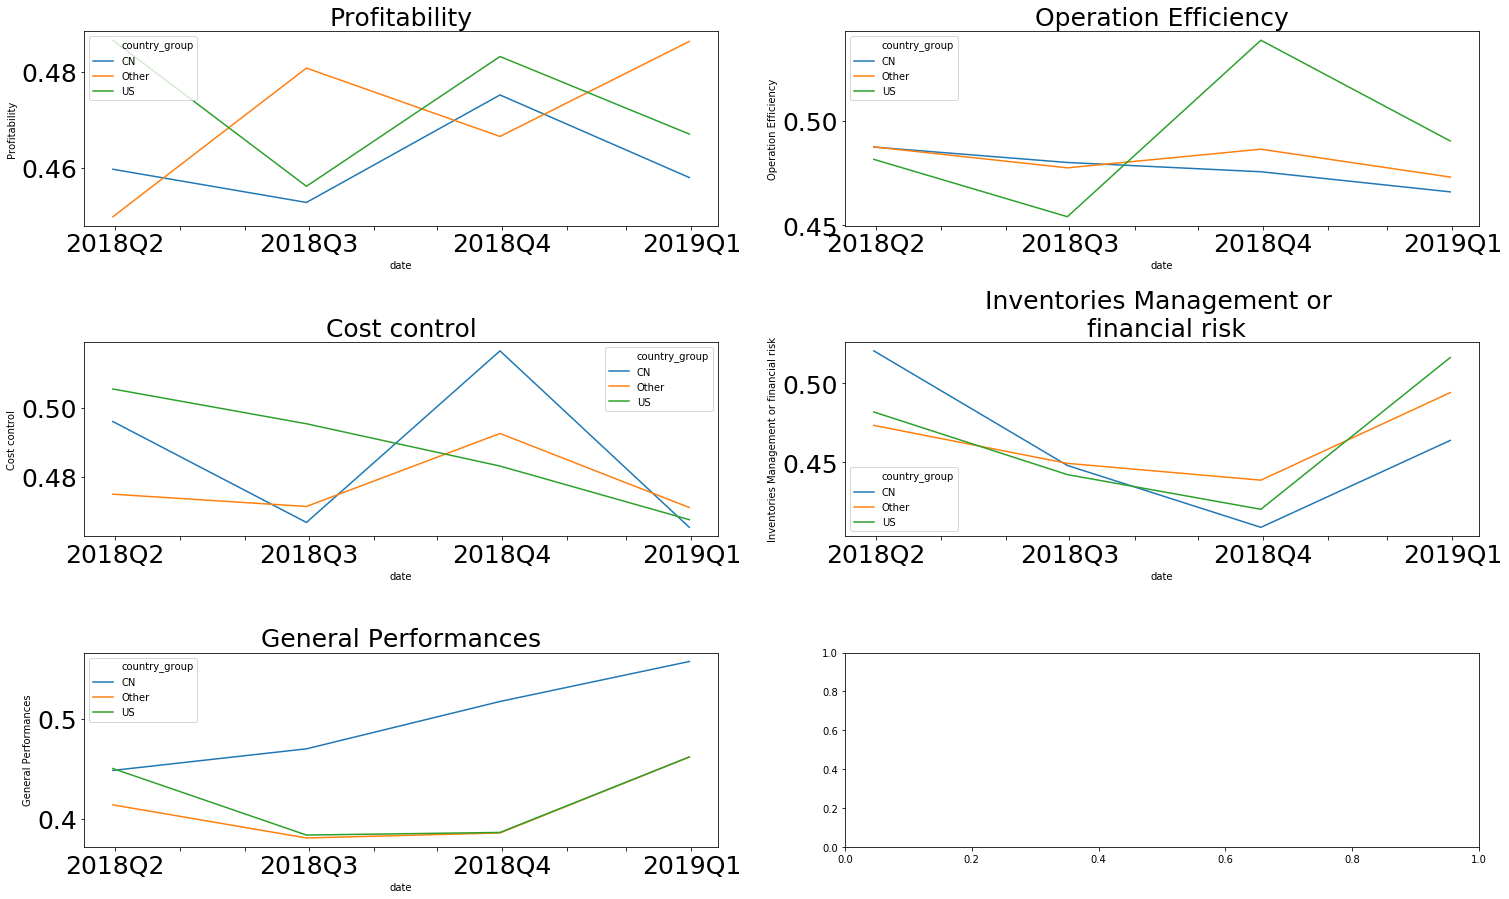

In [705]:
fig, ax = plt.subplots(3,2,figsize=(25,15))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.2, hspace=0.6)
sns.lineplot(data=avg_pca_iqr,x='date',y='Profitability',hue='country_group',ax=ax[0,0])
ax[0,0].tick_params(axis = 'both', which = 'major', labelsize = 25)
ax[0,0].title.set_text("Profitability")
ax[0,0].title.set_size(25)
ax[0,0].set_xticklabels(["2018Q2","","","2018Q3","","","2018Q4","","","2019Q1"])
sns.lineplot(data=avg_pca_iqr,x='date',y='Operation Efficiency',hue='country_group',ax=ax[0,1])
ax[0,1].tick_params(axis = 'both', which = 'major', labelsize = 25)
ax[0,1].title.set_text("Operation Efficiency")
ax[0,1].title.set_size(25)
ax[0,1].set_xticklabels(["2018Q2","","","2018Q3","","","2018Q4","","","2019Q1"])
sns.lineplot(data=avg_pca_iqr,x='date',y='Cost control',hue='country_group',ax=ax[1,0])
ax[1,0].tick_params(axis = 'both', which = 'major', labelsize = 25)
ax[1,0].title.set_text("Cost control")
ax[1,0].title.set_size(25)
ax[1,0].set_xticklabels(["2018Q2","","","2018Q3","","","2018Q4","","","2019Q1"])
sns.lineplot(data=avg_pca_iqr,x='date',y='Inventories Management or financial risk',hue='country_group',ax=ax[1,1])
ax[1,1].tick_params(axis = 'both', which = 'major', labelsize = 25)
ax[1,1].title.set_text("Inventories Management or \n financial risk")
ax[1,1].title.set_size(25)
ax[1,1].set_xticklabels(["2018Q2","","","2018Q3","","","2018Q4","","","2019Q1"])
sns.lineplot(data=avg_pca_iqr,x='date',y='General Performances',hue='country_group',ax=ax[2,0])
ax[2,0].tick_params(axis = 'both', which = 'major', labelsize = 25)
ax[2,0].title.set_text("General Performances")
ax[2,0].title.set_size(25)
ax[2,0].set_xticklabels(["2018Q2","","","2018Q3","","","2018Q4","","","2019Q1"])

In [706]:
pca_win = pd.concat([pca_win_18Q2,pca_win_18Q3,pca_win_18Q4,pca_win_19Q1])
pca_win_1 = pd.merge(pca_win,name,how='left')
pca_win_1['country_group']=pca_win_1['Country'].apply(lambda x: 'Other' if ((x != 'US') and (x != 'CN')) else x)
avg_pca_win = pd.pivot_table(pca_win_1,index=['country_group','date']
                      ,values=['General Performances', 'Profitability','Cost Control or IM','Financial Risk','Operating Efficiency'],aggfunc=np.mean)
avg_pca_win.reset_index(inplace=True)

/Users/Saik/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


[Text(0, 0, '2018Q2'),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, '2018Q3'),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, '2018Q4'),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, '2019Q1')]

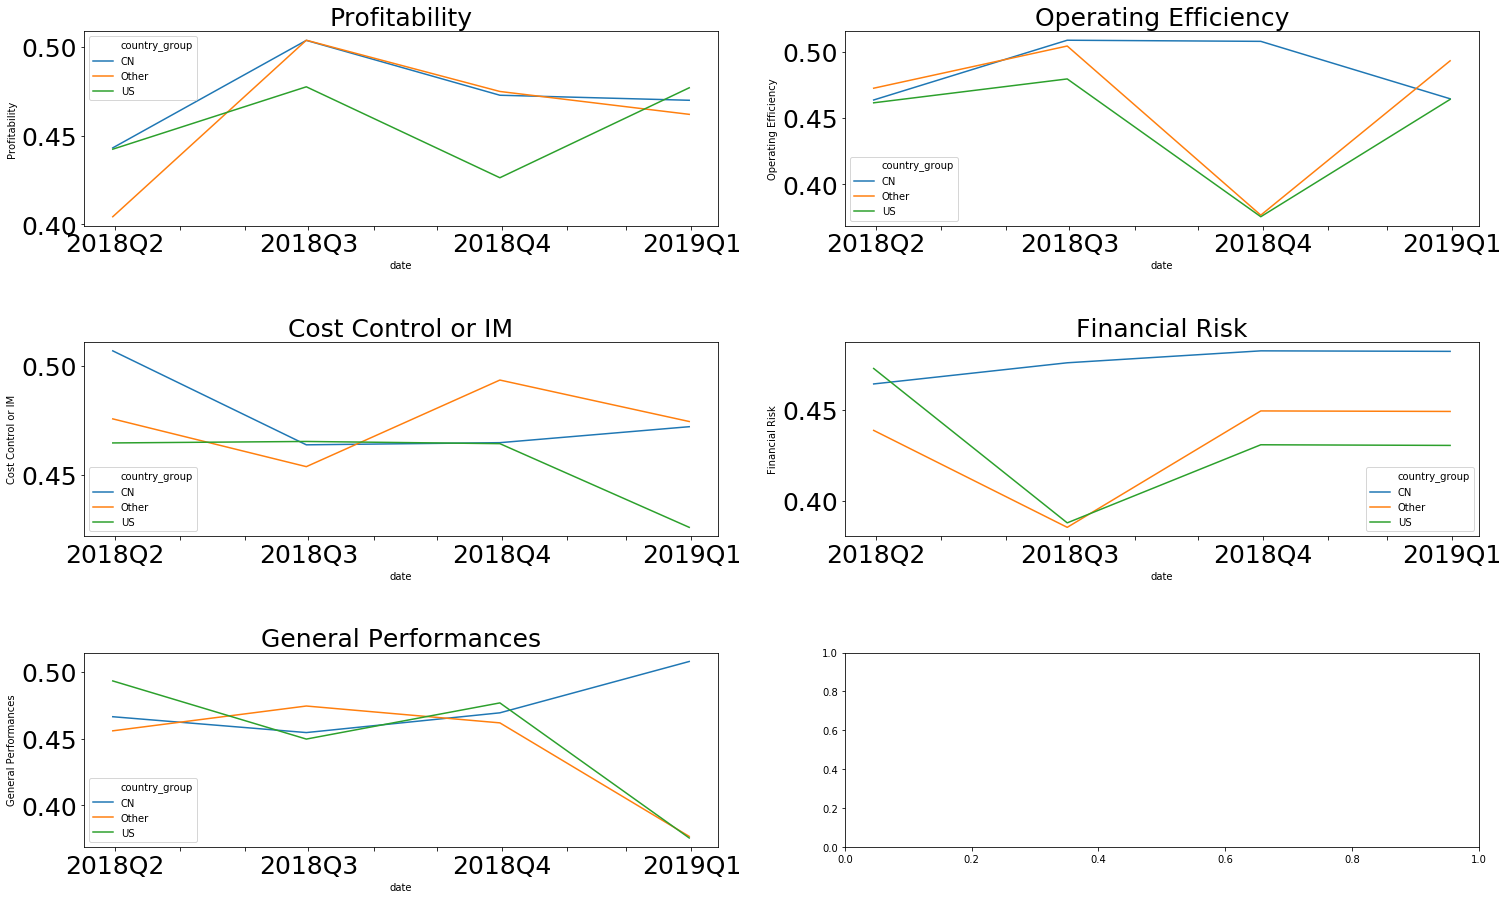

In [708]:
fig, ax = plt.subplots(3,2,figsize=(25,15))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.2, hspace=0.6)
sns.lineplot(data=avg_pca_win,x='date',y='Profitability',hue='country_group',ax=ax[0,0])
ax[0,0].tick_params(axis = 'both', which = 'major', labelsize = 25)
ax[0,0].title.set_text("Profitability")
ax[0,0].title.set_size(25)
ax[0,0].set_xticklabels(["2018Q2","","","2018Q3","","","2018Q4","","","2019Q1"])
sns.lineplot(data=avg_pca_win,x='date',y='Operating Efficiency',hue='country_group',ax=ax[0,1])
ax[0,1].tick_params(axis = 'both', which = 'major', labelsize = 25)
ax[0,1].title.set_text("Operating Efficiency")
ax[0,1].title.set_size(25)
ax[0,1].set_xticklabels(["2018Q2","","","2018Q3","","","2018Q4","","","2019Q1"])
sns.lineplot(data=avg_pca_win,x='date',y='Cost Control or IM',hue='country_group',ax=ax[1,0])
ax[1,0].tick_params(axis = 'both', which = 'major', labelsize = 25)
ax[1,0].title.set_text("Cost Control or IM")
ax[1,0].title.set_size(25)
ax[1,0].set_xticklabels(["2018Q2","","","2018Q3","","","2018Q4","","","2019Q1"])
sns.lineplot(data=avg_pca_win,x='date',y='Financial Risk',hue='country_group',ax=ax[1,1])
ax[1,1].tick_params(axis = 'both', which = 'major', labelsize = 25)
ax[1,1].title.set_text("Financial Risk")
ax[1,1].title.set_size(25)
ax[1,1].set_xticklabels(["2018Q2","","","2018Q3","","","2018Q4","","","2019Q1"])
sns.lineplot(data=avg_pca_win,x='date',y='General Performances',hue='country_group',ax=ax[2,0])
ax[2,0].tick_params(axis = 'both', which = 'major', labelsize = 25)
ax[2,0].title.set_text("General Performances")
ax[2,0].title.set_size(25)
ax[2,0].set_xticklabels(["2018Q2","","","2018Q3","","","2018Q4","","","2019Q1"])

### Weighted Performances

In [729]:
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
x_iqr_expon = financial_YoY_expon_iqr[req_col].values
x_iqr_expon = StandardScaler().fit_transform(x_iqr_expon)
imp.fit(x_iqr_expon)
x_iqr_expon= imp.transform(x_iqr_expon)
pca = PCA(n_components=4)
pca.fit(x_win_18Q3)
X_iqr_expon_pca=pca.transform(x_iqr_expon)
X_iqr_expon_pca[0]=-X_iqr_expon_pca[0]
X_iqr_expon_pca[1]=-X_iqr_expon_pca[1]
X_iqr_expon_pca[3]=-X_iqr_expon_pca[3]
scaler.fit(X_iqr_expon_pca)
X_iqr_expon_pca=scaler.transform(X_iqr_expon_pca)
pca_iqr_expon = pd.DataFrame(data = X_iqr_expon_pca, index =financial_YoY_expon_iqr['Tickers']
            , columns = ['Revenue Generation', 'Profitability','Financial Risk','Inventories Management'])

/Users/Saik/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in double_scalars
  del sys.path[0]
/Users/Saik/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


<Figure size 1008x2160 with 0 Axes>

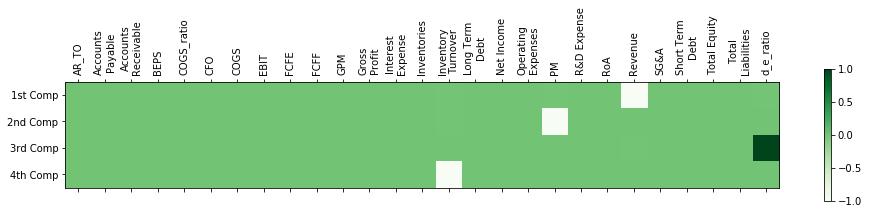

In [722]:
pca_rotation= varimax(pca.components_)
fig = plt.figure(figsize=(14,30))
plt.matshow(pca_rotation,cmap='Greens')
plt.yticks([0,1,2,3,4],['1st Comp','2nd Comp','3rd Comp','4th Comp','5th Comp'],fontsize=10)
plt.colorbar()
plt.xticks(range(len(req_col)),req_col2,rotation=90,ha='center')
plt.margins(0.5)
plt.tight_layout()
plt.show()# 

In [723]:
np.sum(pca.explained_variance_ratio_)

0.4088272408462767

In [732]:
pca_iqr_expon.reset_index(inplace=True)
pca_iqr_expon_1 = pd.merge(pca_iqr_expon,name,how='left')
pca_iqr_expon_1['country_group']=pca_iqr_expon_1['Country'].apply(lambda x: 'Other' if ((x != 'US') and (x != 'CN')) else x)
avg_pca_expon_iqr = pd.pivot_table(pca_iqr_expon_1,index=['country_group']
                      ,values=['Revenue Generation', 'Profitability','Financial Risk','Inventories Management'],aggfunc=np.mean)
avg_pca_expon_iqr.reset_index(inplace=True)
avg_pca_expon_iqr

country_group  Financial Risk  Inventories Management  Profitability  \
0            CN        0.515091                0.516658       0.516196   
1         Other        0.510639                0.529645       0.550626   
2            US        0.488496                0.512009       0.541472   

   Revenue Generation  
0            0.479016  
1            0.417696  
2            0.423018

## Scatter Plot of PCA score and US-CN Degree

### Calculate US-CN Degree by count

#### Manufacturers

In [2]:
First_Tier_Supp = pd.read_excel('Supply Chain Data All.xlsx',sheet_name='Supply Chain')
Second_Tier_Supp = pd.read_excel('Supply Chain Data All.xlsx',sheet_name='SOS')
First_Tier_Supp['Relationship Value USD']=pd.to_numeric(First_Tier_Supp['Relationship Value USD'],errors='coerce')
First_Tier_Supp = First_Tier_Supp[First_Tier_Supp['Relationship Type']=="Suppliers"]
Second_Tier_Supp['Relationship Value USD']=pd.to_numeric(Second_Tier_Supp['Relationship Value USD'],errors='coerce')
Second_Tier_Supp = Second_Tier_Supp[Second_Tier_Supp['Relationship Type']=="Suppliers"]
list_of_companies = pd.read_excel('Supply Chain Data All.xlsx',sheet_name='List of Companies')

In [3]:
Second_Tier_Supp_degree = pd.pivot_table(Second_Tier_Supp,index=['Central Ticker','As Of Date Bloomberg'],columns=['Supplier Country']
                      ,values=['Supplier Ticker'],aggfunc={'Supplier Ticker':lambda x: len(x.unique())})
Second_Tier_Supp_degree.columns = Second_Tier_Supp_degree.columns.droplevel(0)
Second_Tier_Supp_degree.reset_index(inplace=True)
Second_Tier_Supp_degree = Second_Tier_Supp_degree[['Central Ticker','As Of Date Bloomberg','CN','US']].fillna(0)
Second_Tier_Supp_total = pd.pivot_table(Second_Tier_Supp,
                       index=['Central Ticker','Central Country','As Of Date Bloomberg']
                      ,values=['Supplier Ticker'],aggfunc={'Supplier Ticker':lambda x: len(x.unique())})
Second_Tier_Supp_total.reset_index(inplace=True)
Second_Tier_Supp_uscn = pd.merge(Second_Tier_Supp_total,Second_Tier_Supp_degree,how='left', left_on=['Central Ticker','As Of Date Bloomberg'],
                        right_on=['Central Ticker','As Of Date Bloomberg'])
Second_Tier_Supp_uscn['CN_Degree'] = Second_Tier_Supp_uscn['CN']/Second_Tier_Supp_uscn['Supplier Ticker']
Second_Tier_Supp_uscn['US_Degree'] = Second_Tier_Supp_uscn['US']/Second_Tier_Supp_uscn['Supplier Ticker']
Second_Tier_Supp_uscn.loc[Second_Tier_Supp_uscn['Central Country'] == 'CN','Opposite_Country_Degree'] =  Second_Tier_Supp_uscn['US_Degree']
Second_Tier_Supp_uscn.loc[Second_Tier_Supp_uscn['Central Country'] == 'US','Opposite_Country_Degree'] =  Second_Tier_Supp_uscn['CN_Degree']
Second_Tier_Supp_uscn.loc[(Second_Tier_Supp_uscn['Central Country'] != 'CN') & (Second_Tier_Supp_uscn['Central Country'] != 'US'),'Opposite_Country_Degree'] = 0

In [4]:
First_Tier_Supp_wop = pd.merge(First_Tier_Supp,Second_Tier_Supp_uscn[['Central Ticker','As Of Date Bloomberg','Opposite_Country_Degree']],how='left', left_on=['Supplier Ticker','As Of Date Bloomberg'],
                        right_on=['Central Ticker','As Of Date Bloomberg'])
First_Tier_Supp_wop = First_Tier_Supp_wop.drop(['Central Ticker_y'],axis=1)
First_Tier_Supp_wop.columns = ['Central Ticker', 'Central Company', 'As Of Date Bloomberg',
       'Central Country', 'Market_Cap_Central', 'Stock Number',
       'Listed Country', 'Supplier Registered Name', 'Supplier Company',
       'Supplier Ticker', 'Relationship Type', 'Supplier Country',
       'Supplier Market Cap', 'Latest Inv. Growth',
       '% Revenue get from central', 'Relationship Value', 'Currency',
       'Account As Type', '%Cost', 'Relationship Value USD', 'Source',
       'As Of Date', 'Opposite_Country_Degree']

In [5]:
First_Tier_Supp_degree = pd.pivot_table(First_Tier_Supp,index=['Central Ticker','As Of Date Bloomberg'],columns=['Supplier Country']
                      ,values=['Supplier Ticker'],aggfunc={'Supplier Ticker':lambda x: len(x.unique())})
First_Tier_Supp_degree.columns = First_Tier_Supp_degree.columns.droplevel(0)
First_Tier_Supp_degree.reset_index(inplace=True)
First_Tier_Supp_degree = First_Tier_Supp_degree[['Central Ticker','As Of Date Bloomberg','CN','US']].fillna(0)
First_Tier_Supp_total = pd.pivot_table(First_Tier_Supp_wop,
                       index=['Central Ticker','Central Country','As Of Date Bloomberg']
                      ,values=['Supplier Ticker','Opposite_Country_Degree'],aggfunc={'Supplier Ticker':lambda x: len(x.unique()),
                                                                                    'Opposite_Country_Degree':np.sum})
First_Tier_Supp_total.reset_index(inplace=True)
First_Tier_Supp_uscn = pd.merge(First_Tier_Supp_total,First_Tier_Supp_degree,how='left', left_on=['Central Ticker','As Of Date Bloomberg'],
                        right_on=['Central Ticker','As Of Date Bloomberg'])
First_Tier_Supp_uscn['CN_Degree'] = First_Tier_Supp_uscn['CN']/First_Tier_Supp_uscn['Supplier Ticker']
First_Tier_Supp_uscn['US_Degree'] = First_Tier_Supp_uscn['US']/First_Tier_Supp_uscn['Supplier Ticker']
First_Tier_Supp_uscn['AS2Deg'] = First_Tier_Supp_uscn['Opposite_Country_Degree']/First_Tier_Supp_uscn['Supplier Ticker']
First_Tier_Supp_uscn.loc[First_Tier_Supp_uscn['Central Country'] == 'CN','Manu_Opposite_Country_Degree'] =  First_Tier_Supp_uscn['US_Degree'] + First_Tier_Supp_uscn['AS2Deg']
First_Tier_Supp_uscn.loc[First_Tier_Supp_uscn['Central Country'] == 'US','Manu_Opposite_Country_Degree'] =  First_Tier_Supp_uscn['CN_Degree'] + First_Tier_Supp_uscn['AS2Deg']
First_Tier_Supp_uscn.loc[(First_Tier_Supp_uscn['Central Country'] != 'CN') & (First_Tier_Supp_uscn['Central Country'] != 'US'),'Manu_Opposite_Country_Degree'] = First_Tier_Supp_uscn['AS2Deg']

In [6]:
First_Tier_Supp_uscn['As Of Date Bloomberg']=pd.to_datetime(First_Tier_Supp_uscn['As Of Date Bloomberg'],format="%Y%m%d")

In [7]:
First_Tier_Supp_country = pd.pivot_table(First_Tier_Supp[First_Tier_Supp['Central Country']!=First_Tier_Supp['Supplier Country']],index=['Central Ticker','As Of Date Bloomberg']
                      ,values=['Supplier Ticker'],aggfunc={'Supplier Ticker':lambda x: len(x.unique())})
First_Tier_Supp_country.reset_index(inplace=True)
Second_Tier_Supp_country = pd.pivot_table(Second_Tier_Supp[Second_Tier_Supp['Central Country']!=Second_Tier_Supp['Supplier Country']],index=['Central Ticker','As Of Date Bloomberg']
                      ,values=['Supplier Ticker'],aggfunc={'Supplier Ticker':lambda x: len(x.unique())})
Second_Tier_Supp_country.reset_index(inplace=True)
total_supp_country = pd.concat([First_Tier_Supp_country,Second_Tier_Supp_country])
total_supp_country

Central Ticker  As Of Date Bloomberg  Supplier Ticker
0        000572 CH Equity              20170331                4
1        000572 CH Equity              20171231                4
2        000572 CH Equity              20180321                4
3        000572 CH Equity              20180331                4
4        000572 CH Equity              20180630                4
5        000572 CH Equity              20180930               21
6        000572 CH Equity              20181231                4
7        000572 CH Equity              20190331                6
8        000800 CH Equity              20170331               47
9        000800 CH Equity              20171231               47
10       000800 CH Equity              20180321               47
11       000800 CH Equity              20180331               47
12       000800 CH Equity              20180630               46
13       000800 CH Equity              20180930               26
14       000800 CH Equity              20181231               46
15       000800 CH Equity              20190331               12
16       000913 CH Equity              20170331                1
17       000913 CH Equity              20171231                1
18       000913 CH Equity              20180321                1
19       000913 CH Equity              20180331                1
20       000913 CH Equity              20180630                1
21       000913 CH Equity              20180930                1
22       000913 CH Equity              20181231                1
23       000913 CH Equity              20190331                1
24       000927 CH Equity              20170331               15
25       000927 CH Equity              20171231               15
26       000927 CH Equity              20180321               15
27       000927 CH Equity              20180331               15
28       000927 CH Equity              20180630               13
29       000927 CH Equity              20180930               11
...                   ...                   ...              ...
2569     WXAKOZ CH Equity              20181231                1
2570     WXAKOZ CH Equity              20190331                1
2571          X US Equity              20171231               10
2572          X US Equity              20180331               10
2573          X US Equity              20180630                9
2574          X US Equity              20180930                9
2575          X US Equity              20181231                6
2576          X US Equity              20190331                6
2577       XLNX US Equity              20171231                8
2578       XLNX US Equity              20180331                9
2579       XLNX US Equity              20180630                9
2580       XLNX US Equity              20180930                9
2581       XLNX US Equity              20181231                7
2582       XLNX US Equity              20190331                8
2583       XPER US Equity              20171231                4
2584        XPO US Equity              20171231                1
2585        XPO US Equity              20180331                1
2586  Xiamen Xi... Equity              20190331                1
2587       ZBRA US Equity              20171231                2
2588       ZBRA US Equity              20180331                2
2589       ZBRA US Equity              20180630                2
2590       ZBRA US Equity              20180930                2
2591       ZBRA US Equity              20181231                4
2592       ZBRA US Equity              20190331                4
2593       ZIL2 GR Equity              20171231                2
2594       ZIL2 GR Equity              20180331                2
2595       ZIL2 GR Equity              20180630                2
2596       ZIL2 GR Equity              20180930                2
2597       ZIL2 GR Equity              20181231                2
2598       ZIL2 GR Equity              2019033

#### First Tier Supplier

In [8]:
#Customer Side USCN Degree
First_Tier_Rev_degree = pd.pivot_table(First_Tier_Supp,index=['Supplier Ticker','Supplier Country','As Of Date Bloomberg'],columns=['Central Country']
                      ,values=['% Revenue get from central'],aggfunc={'% Revenue get from central':np.sum})
First_Tier_Rev_degree.columns = First_Tier_Rev_degree.columns.droplevel(0)
First_Tier_Rev_degree.reset_index(inplace=True)
First_Tier_Rev_degree = First_Tier_Rev_degree[['Supplier Ticker','Supplier Country','As Of Date Bloomberg','CN','US']].fillna(0)
First_Tier_Rev_degree.loc[First_Tier_Rev_degree['Supplier Country'] == 'CN','Rev_Opposite_Country_Degree'] =  First_Tier_Rev_degree['US']
First_Tier_Rev_degree.loc[First_Tier_Rev_degree['Supplier Country'] == 'US','Rev_Opposite_Country_Degree'] =  First_Tier_Rev_degree['CN']
First_Tier_Rev_degree.loc[(First_Tier_Rev_degree['Supplier Country'] != 'CN') & (First_Tier_Rev_degree['Supplier Country'] != 'US'),'Rev_Opposite_Country_Degree'] =  0

In [11]:
First_Tier_degree_all = pd.merge(First_Tier_Rev_degree[['Supplier Ticker','Supplier Country','As Of Date Bloomberg','Rev_Opposite_Country_Degree']],
Second_Tier_Supp_uscn[['Central Ticker','As Of Date Bloomberg','Opposite_Country_Degree']],how='left', left_on=['Supplier Ticker','As Of Date Bloomberg'],
                        right_on=['Central Ticker','As Of Date Bloomberg'])
First_Tier_degree_all['Opposite_Country_Degree']=First_Tier_degree_all['Opposite_Country_Degree'].fillna(0)
First_Tier_degree_all['As Of Date Bloomberg']=pd.to_datetime(First_Tier_degree_all['As Of Date Bloomberg'],format="%Y%m%d")
First_Tier_degree_all = pd.merge(First_Tier_degree_all,financial[['Tickers','End Date','COGS_ratio']],how='left', left_on=['Supplier Ticker','As Of Date Bloomberg'],
                        right_on=['Tickers','End Date'])
First_Tier_degree_all['COGS_ratio']=First_Tier_degree_all['COGS_ratio'].fillna(0)

In [12]:
First_Tier_degree_all['RC_Degree']=First_Tier_degree_all['COGS_ratio']*First_Tier_degree_all['Opposite_Country_Degree']+(1-First_Tier_degree_all['COGS_ratio'])*First_Tier_degree_all['Rev_Opposite_Country_Degree']

In [13]:
RC = First_Tier_degree_all[['Supplier Ticker','As Of Date Bloomberg','RC_Degree']]
RC =pd.merge(RC,list_of_companies[['Central Ticker','Type']],how='left',left_on='Supplier Ticker',right_on='Central Ticker')
RC = RC[RC['Type']=="Suppliers"]
RC = RC[['Supplier Ticker','As Of Date Bloomberg','RC_Degree']]
RC.columns = ['Tickers','date','Degree_lag0']
Manu_Degree = First_Tier_Supp_uscn[['Central Ticker','As Of Date Bloomberg','Manu_Opposite_Country_Degree']]
Manu_Degree.columns = ['Tickers','date','Degree_lag0']

In [14]:
all_degree = pd.concat([Manu_Degree,RC])
all_degree = all_degree.drop_duplicates()
all_degree = all_degree[all_degree["date"]!=pd.to_datetime('20180321',format='%Y%m%d')]
all_degree = all_degree[all_degree["date"]!=pd.to_datetime('20170331',format='%Y%m%d')]
all_degree

Tickers       date  Degree_lag0
1        000572 CH Equity 2017-12-31     0.132353
3        000572 CH Equity 2018-03-31     0.125000
4        000572 CH Equity 2018-06-30     0.168831
5        000572 CH Equity 2018-09-30     0.313426
6        000572 CH Equity 2018-12-31     0.240260
7        000572 CH Equity 2019-03-31     0.157692
9        000800 CH Equity 2017-12-31     0.232138
11       000800 CH Equity 2018-03-31     0.231500
12       000800 CH Equity 2018-06-30     0.304238
13       000800 CH Equity 2018-09-30     0.289988
14       000800 CH Equity 2018-12-31     0.313477
15       000800 CH Equity 2019-03-31     0.236895
17       000913 CH Equity 2017-12-31     0.000000
19       000913 CH Equity 2018-03-31     0.043210
20       000913 CH Equity 2018-06-30     0.031780
21       000913 CH Equity 2018-09-30     0.029040
22       000913 CH Equity 2018-12-31     0.028186
23       000913 CH Equity 2019-03-31     0.029412
25       000927 CH Equity 2017-12-31     0.073203
27       000927 CH Equity 2018-03-31     0.074491
28       000927 CH Equity 2018-06-30     0.048748
29       000927 CH Equity 2018-09-30     0.051709
30       000927 CH Equity 2018-12-31     0.051709
31       000927 CH Equity 2019-03-31     0.049236
33       000980 CH Equity 2017-12-31     0.142857
35       000980 CH Equity 2018-03-31     0.142857
36       000980 CH Equity 2018-06-30     0.147727
37       000980 CH Equity 2018-09-30     0.157127
38       000980 CH Equity 2018-12-31     0.156368
39       000980 CH Equity 2019-03-31     0.140196
...                   ...        ...          ...
5262       ZBRA US Equity 2018-03-31     0.000000
5263       ZBRA US Equity 2018-06-30     0.000000
5264       ZBRA US Equity 2018-09-30     0.000000
5265       ZBRA US Equity 2018-12-31     0.000000
5266       ZBRA US Equity 2019-03-31     0.000000
5270       ZIL2 GR Equity 2017-12-31     0.000000
5272       ZIL2 GR Equity 2018-03-31     0.000000
5273       ZIL2 GR Equity 2018-06-30     0.000000
5274       ZIL2 GR Equity 2018-09-30     0.000000
5275       ZIL2 GR Equity 2018-12-31     0.000000
5276       ZIL2 GR Equity 2019-03-31     0.000000
5278      ZXAIY US Equity 2017-12-31     0.000000
5280      ZXAIY US Equity 2018-03-31     0.000000
5281      ZXAIY US Equity 2018-06-30     0.000000
5282      ZXAIY US Equity 2018-09-30     0.000000
5283      ZXAIY US Equity 2018-12-31     0.000000
5284      ZXAIY US Equity 2019-03-31     0.000000
5286  Zhejiang1... Equity 2017-12-31     0.000000
5288  Zhejiang1... Equity 2018-03-31     0.000000
5290  Zhengzhou... Equity 2017-12-31     0.000000
5292  Zhengzhou... Equity 2018-03-31     0.000000
5293  Zhengzhou... Equity 2018-06-30     0.000000
5294  Zhengzhou... Equity 2018-09-30     0.000000
5295  Zhengzhou... Equity 2018-12-31     0.000000
5296  Zhengzhou... Equity 2019-03-31     0.000000
5298  Zhongyou ... Equity 2017-12-31     0.000000
5300  Zhongyou ... Equity 2018-03-31     0.000000
5301  Zhongyou ... Equity 2018-06-30     0.000000
5302  Zhongyou ... Equity 2018-12-31     0.000000
5303  Zhongyou ... Equity 2019-03-31     0.000000

[3952 rows x 3 columns]

In [19]:
hsbc_pre = pd.merge(all_degree,financial[['Tickers','End Date','Market_Cap']],how='left',left_on=['Tickers','date'],right_on=['Tickers','End Date'])
hsbc_pre

Tickers       date  Degree_lag0   End Date  Market_Cap
0        000572 CH Equity 2017-12-31     0.132353 2017-12-31   1157.6429
1        000572 CH Equity 2018-03-31     0.125000 2018-03-31   1056.6684
2        000572 CH Equity 2018-06-30     0.168831 2018-06-30    851.6286
3        000572 CH Equity 2018-09-30     0.313426 2018-09-30    641.6598
4        000572 CH Equity 2018-12-31     0.240260 2018-12-31    509.2790
5        000572 CH Equity 2019-03-31     0.157692 2019-03-31    644.4172
6        000800 CH Equity 2017-12-31     0.232138 2017-12-31   2691.3643
7        000800 CH Equity 2018-03-31     0.231500 2018-03-31   2640.0286
8        000800 CH Equity 2018-06-30     0.304238 2018-06-30   1837.8448
9        000800 CH Equity 2018-09-30     0.289988 2018-09-30   1561.3727
10       000800 CH Equity 2018-12-31     0.313477 2018-12-31   1566.3371
11       000800 CH Equity 2019-03-31     0.236895 2019-03-31   2046.4683
12       000913 CH Equity 2017-12-31     0.000000 2017-12-31   1387.0881
13       000913 CH Equity 2018-03-31     0.043210 2018-03-31   1161.2483
14       000913 CH Equity 2018-06-30     0.031780 2018-06-30    853.1316
15       000913 CH Equity 2018-09-30     0.029040 2018-09-30    606.1144
16       000913 CH Equity 2018-12-31     0.028186 2018-12-31    603.9674
17       000913 CH Equity 2019-03-31     0.029412 2019-03-31    804.0819
18       000927 CH Equity 2017-12-31     0.073203 2017-12-31   1120.3752
19       000927 CH Equity 2018-03-31     0.074491 2018-03-31   1029.9629
20       000927 CH Equity 2018-06-30     0.048748 2018-06-30    936.7936
21       000927 CH Equity 2018-09-30     0.051709 2018-09-30    775.6302
22       000927 CH Equity 2018-12-31     0.051709 2018-12-31    730.5078
23       000927 CH Equity 2019-03-31     0.049236 2019-03-31   1086.0901
24       000980 CH Equity 2017-12-31     0.142857 2017-12-31   3739.3031
25       000980 CH Equity 2018-03-31     0.142857 2018-03-31   3179.0957
26       000980 CH Equity 2018-06-30     0.147727 2018-06-30   2187.2728
27       000980 CH Equity 2018-09-30     0.157127 2018-09-30   1576.3003
28       000980 CH Equity 2018-12-31     0.156368 2018-12-31   1276.4144
29       000980 CH Equity 2019-03-31     0.140196 2019-03-31   1585.9827
...                   ...        ...          ...        ...         ...
3922       ZBRA US Equity 2018-03-31     0.000000 2018-03-31   7432.2768
3923       ZBRA US Equity 2018-06-30     0.000000 2018-06-30   7691.3758
3924       ZBRA US Equity 2018-09-30     0.000000 2018-09-30   9513.9212
3925       ZBRA US Equity 2018-12-31     0.000000 2018-12-31   8577.9086
3926       ZBRA US Equity 2019-03-31     0.000000 2019-03-31  11309.5362
3927       ZIL2 GR Equity 2017-12-31     0.000000 2017-12-31   1422.5005
3928       ZIL2 GR Equity 2018-03-31     0.000000 2018-03-31   1183.2735
3929       ZIL2 GR Equity 2018-06-30     0.000000 2018-06-30    816.7995
3930       ZIL2 GR Equity 2018-09-30     0.000000 2018-09-30    705.6925
3931       ZIL2 GR Equity 2018-12-31     0.000000 2018-12-31    493.4071
3932       ZIL2 GR Equity 2019-03-31     0.000000 2019-03-31    426.5775
3933      ZXAIY US Equity 2017-12-31     0.000000 2017-12-31     62.8018
3934      ZXAIY US Equity 2018-03-31     0.000000 2018-03-31     56.9275
3935      ZXAIY US Equity 2018-06-30     0.000000 2018-06-30     33.5563
3936      ZXAIY US Equity 2018-09-30     0.000000 2018-09-30     50.5925
3937      ZXAIY US Equity 2018-12-31     0.000000 2018-12-31     32.0075
3938      ZXAIY US Equity 2019-03-31     0.000000 2019-03-31     31.0442
3939  Zhejiang1... Equity 2017-12-31     0.000000        NaT         NaN
3940  Zhejiang1... Equity 2018-03-31     0.000000        NaT         NaN
3941  Zhengzhou... Equity 2017-12-31     0.000000        NaT         NaN
3942  Zhengzhou... Equity 2018-03-31     0.000000        NaT         NaN
3943  Zhengzhou... Equity 2018-06-30     0.000000        NaT         NaN
3944  Zhengzhou... Equity 2018-09-30     0.000000        NaT         NaN
394

In [21]:
hsbc_pre2 = pd.pivot_table(hsbc_pre,index=['Tickers'],columns=['date']
                      ,values=['Degree_lag0','Market_Cap'],aggfunc=np.mean)
hsbc_pre2

Degree_lag0                                              \
date                 2017-12-31 2018-03-31 2018-06-30 2018-09-30 2018-12-31   
Tickers                                                                       
000120 KS Equity       0.000000   0.000000   0.000000   0.000000   0.000000   
000559 CH Equity       0.047314   0.000000   0.149321   0.151170   0.148940   
000572 CH Equity       0.132353   0.125000   0.168831   0.313426   0.240260   
000599 CH Equity       0.000000   0.000000   0.000000   0.000000   0.000000   
000622 CH Equity       0.000000        NaN   0.000000   0.000000   0.000000   
000629 CH Equity       0.000000   0.000000   0.000000   0.000000        NaN   
000678 CH Equity       0.000000   0.000000   0.000000   0.000000   0.000000   
000710 CH Equity       0.000000   0.000000   0.000000   0.196027   0.211245   
000760 CH Equity       0.000000   0.000000   0.000000        NaN        NaN   
000800 CH Equity       0.232138   0.231500   0.304238   0.289988   0.313477   
000821 CH Equity       0.000000   0.000000   0.000000   0.000000   0.000000   
000868 CH Equity       0.000000   0.000000   0.000000   0.000000   0.000000   
000880 KS Equity            NaN        NaN        NaN        NaN   0.000000   
000903 CH Equity       0.000000   0.000000   0.000000   0.000000   0.000000   
000913 CH Equity       0.000000   0.043210   0.031780   0.029040   0.028186   
000927 CH Equity       0.073203   0.074491   0.048748   0.051709   0.051709   
000959 CH Equity       0.000000   0.000000   0.000000   0.000000   0.000000   
000980 CH Equity       0.142857   0.142857   0.147727   0.157127   0.156368   
002009 CH Equity       0.000000   0.000000   0.000000   0.000000   0.000000   
002013 CH Equity       0.000000   0.000000   0.000000        NaN        NaN   
002048 CH Equity       0.000000   0.000000        NaN        NaN        NaN   
002079 CH Equity       0.204091   0.166136   0.165656   0.162364   0.000000   
002080 CH Equity            NaN        NaN        NaN   0.000000   0.000000   
002108 CH Equity            NaN        NaN        NaN   0.000000   0.000000   
002232 CH Equity       0.071052   0.109509   0.131669   0.111862   0.113969   
002265 CH Equity       0.000000   0.000000   0.000000   0.000000   0.000000   
002306 CH Equity            NaN        NaN        NaN        NaN        NaN   
002341 CH Equity       0.248372   0.000000   0.000000   0.000000   0.000000   
002342 CH Equity       0.000000   0.000000   0.000000   0.000000   0.000000   
002400 CH Equity       0.000000   0.000000   0.000000   0.000000   0.000000   
...                         ...        ...        ...        ...        ...   
VSVS LN Equity              NaN   0.000000   0.000000   0.000000   0.000000   
Vietnam T... Equity    0.000000   0.000000   0.000000   0.000000   0.000000   
WBC US Equity          0.004679   0.004743   0.005362   0.005202   0.005278   
WGO US Equity          0.011905   0.011905   0.000000   0.000000   0.000000   
WOR US Equity          0.000000   0.000000   0.000000   0.000000   0.000000   
WXAKOZ CH Equity       0.000000   0.000000   0.000000   0.000000   0.000000   
Weifang Q... Equity    0.000000   0.000000   0.000000   0.000000   0.000000   
Wuhan Sou... Equity    0.000000   0.000000        NaN        NaN        NaN   
Wuhan You... Equity    0.000000   0.000000        NaN        NaN        NaN   
X US Equity            0.000000   0.000000   0.000000   0.000000   0.000000   
XLNX US Equity         0.000000   0.000000   0.000000        NaN        NaN   
XONE US Equity         0.000000   0.000000   0.000000   0.000000   0.000000   
XPER US Equity         0.001913        NaN        NaN        NaN        NaN   
XPO US Equity          0.000000   0.000000   0.000000   0.000000   0.000000   
XTC CN Equity          0.000000   0.000000   0.000000   0.000000   0.000000   
XVWJIZ CH Equity       0.000000   0.000000        NaN        NaN        NaN   
Xiamen Xi... Equity    0.000000   0.000000   0.000000   0.000000   0.0

In [23]:
hsbc_pre2.to_excel('uscndegree.xlsx',sheet_name='degree')

In [340]:
all_company_list=list(set(all_degree['Tickers']))
all_company_list.sort()
end_date_list=list(set(all_degree['date']))
end_date_list.sort()
for i in range(len(all_company_list)):
    for j in range(len(end_date_list)-1):
        try:
            all_degree.loc[(all_degree['date']==end_date_list[j+1])&(all_degree['Tickers']==all_company_list[i]),'Degree_lag1']=all_degree.loc[(all_degree['date']==end_date_list[j])&(all_degree['Tickers']==all_company_list[i])]['Degree_lag0'].values[0]
        except:
            all_degree.loc[(all_degree['date']==end_date_list[j+1])&(all_degree['Tickers']==all_company_list[i]),'Degree_lag1']=np.nan
    for j in range(len(end_date_list)-2):
        try:
            all_degree.loc[(all_degree['date']==end_date_list[j+2])&(all_degree['Tickers']==all_company_list[i]),'Degree_lag2']=all_degree.loc[(all_degree['date']==end_date_list[j])&(all_degree['Tickers']==all_company_list[i])]['Degree_lag0'].values[0]
        except:
            all_degree.loc[(all_degree['date']==end_date_list[j+2])&(all_degree['Tickers']==all_company_list[i]),'Degree_lag2']=np.nan
    for j in range(len(end_date_list)-3):
        try:
            all_degree.loc[(all_degree['date']==end_date_list[j+3])&(all_degree['Tickers']==all_company_list[i]),'Degree_lag3']=all_degree.loc[(all_degree['date']==end_date_list[j])&(all_degree['Tickers']==all_company_list[i])]['Degree_lag0'].values[0]
        except:
            all_degree.loc[(all_degree['date']==end_date_list[j+3])&(all_degree['Tickers']==all_company_list[i]),'Degree_lag3']=np.nan        
    for j in range(len(end_date_list)-4):
        try:
            all_degree.loc[(all_degree['date']==end_date_list[j+4])&(all_degree['Tickers']==all_company_list[i]),'Degree_lag4']=all_degree.loc[(all_degree['date']==end_date_list[j])&(all_degree['Tickers']==all_company_list[i])]['Degree_lag0'].values[0]
        except:
            all_degree.loc[(all_degree['date']==end_date_list[j+4])&(all_degree['Tickers']==all_company_list[i]),'Degree_lag4']=np.nan
    for j in range(len(end_date_list)-5):
        try:
            all_degree.loc[(all_degree['date']==end_date_list[j+5])&(all_degree['Tickers']==all_company_list[i]),'Degree_lag5']=all_degree.loc[(all_degree['date']==end_date_list[j])&(all_degree['Tickers']==all_company_list[i])]['Degree_lag0'].values[0]
        except:
            all_degree.loc[(all_degree['date']==end_date_list[j+5])&(all_degree['Tickers']==all_company_list[i]),'Degree_lag5']=np.nan    

In [46]:
abnormal_financial_with_degree = pd.merge(total_win,all_degree)

NameError: name 'total_win' is not defined

In [ ]:
abnormal_financial_with_degree

In [888]:
abnormal_financial_with_degree.to_excel('abnormal financial change with USCN degree2.xlsx',sheet_name='abnormal changes',index=False)

### Scatter Plot with Inventory Turnover

In [591]:
total_supp_country.columns=['Tickers','date','number of countries']
total_supp_country['date']=pd.to_datetime(total_supp_country['date'],format='%Y%m%d')

In [331]:
abnormal_financial_with_degree = pd.merge(total_iqr,all_degree,how='inner',left_on=["Tickers",'date'],right_on=["Tickers",'date'])
abnormal_financial_with_degree = pd.merge(abnormal_financial_with_degree,total_supp_country,how='inner',left_on=["Tickers",'date'],right_on=["Tickers",'date'])

In [332]:
abnormal_financial_with_degree.to_excel('abnormal financial change with USCN degree_clean outlier.xlsx',sheet_name='abnormal changes',index=False)

In [333]:
abnormal_financial_with_degree.head()

Tickers                                Company Name Country  \
0  000120 KS Equity                           CJ Logistics Corp      KR   
1  000559 CH Equity                    Wanxiang Qianchao Co Ltd      CN   
2  000572 CH Equity                            Haima Automobi-A      CN   
3  000599 CH Equity                   Qingdao Doublestar Co Ltd      CN   
4  000622 CH Equity  Hengli Industrial Development Group Co Ltd      CN   

      AR_TO  Accounts Payable  Accounts Receivable - Net  \
0 -0.034843          0.388583                   0.284487   
1  0.138764          0.025424                   0.126766   
2 -0.080353          0.117673                  -0.573013   
3  0.287834          0.042245                  -0.167594   
4  0.096453          0.270820                   1.025750   

   Basic Earnings per Share  COGS_ratio      Cash  Cash From Operations  \
0                 -0.940567    0.022768 -0.206216              0.548522   
1                 -0.025657    0.023395  0.384281                   NaN   
2                       NaN    0.136913 -0.056959             -0.981247   
3                 -0.261456         NaN  0.373068             -1.048661   
4                 -0.716767         NaN -0.266621             -2.199360   

          ...           d_e_ratio       date  country_group  Degree_lag0  \
0         ...            0.350804 2018-06-30          Other     0.000000   
1         ...            0.154967 2018-06-30             CN     0.149321   
2         ...           -0.079620 2018-06-30             CN     0.168831   
3         ...           -0.209709 2018-06-30             CN     0.000000   
4         ...           -0.066447 2018-06-30             CN     0.000000   

   Degree_lag1  Degree_lag2  Degree_lag3  Degree_lag4  Degree_lag5  \
0        0.000     0.000000          NaN          NaN          NaN   
1        0.000     0.047314          NaN          NaN          NaN   
2        0.125     0.132353          NaN          NaN          NaN   
3        0.000     0.000000          NaN          NaN          NaN   
4          NaN     0.000000          NaN          NaN          NaN   

   number of countries  
0                    4  
1                    4  
2                    4  
3                    3  
4                    1  

[5 rows x 42 columns]

In [335]:
abnormal_financial_with_degree[abnormal_financial_with_degree['Tickers']=='000800 CH Equity']

Tickers    Company Name Country     AR_TO  Accounts Payable  \
8     000800 CH Equity  FAW CAR Co Ltd      CN -0.273059          0.168944   
428   000800 CH Equity  FAW CAR Co Ltd      CN -0.397544               NaN   
848   000800 CH Equity  FAW CAR Co Ltd      CN -0.855791         -0.174273   
1263  000800 CH Equity  FAW CAR Co Ltd      CN       NaN          0.236279   
1681  000800 CH Equity  FAW CAR Co Ltd      CN  0.450044          0.281010   
2138  000800 CH Equity  FAW CAR Co Ltd      CN       NaN          0.099340   

      Accounts Receivable - Net  Basic Earnings per Share  COGS_ratio  \
8                      0.317612                 -1.058057    0.079118   
428                    0.353624                       NaN   -0.008946   
848                         NaN                 -0.193256   -0.013228   
1263                        NaN                 -2.127730    0.012723   
1681                  -0.670201                 -1.011194    0.054819   
2138                  -0.828627                 -1.368069    0.039520   

          Cash  Cash From Operations         ...           d_e_ratio  \
8     1.170278             -1.176398         ...           -0.012882   
428  -0.638677             -1.003139         ...            0.012859   
848  -0.704566             -1.813232         ...           -0.040359   
1263 -0.849865             -2.110477         ...            0.145061   
1681  0.057255                   NaN         ...           -0.172782   
2138       NaN             -3.233678         ...           -0.092222   

           date  country_group  Degree_lag0  Degree_lag1  Degree_lag2  \
8    2018-06-30             CN     0.304238     0.231500     0.232138   
428  2018-09-30             CN     0.289988     0.304238     0.231500   
848  2018-12-31             CN     0.313477     0.289988     0.304238   
1263 2019-03-31             CN     0.236895     0.313477     0.289988   
1681 2017-12-31             CN     0.232138          NaN          NaN   
2138 2018-03-31             CN     0.231500     0.232138          NaN   

      Degree_lag3  Degree_lag4  Degree_lag5  number of countries  
8             NaN          NaN          NaN                   13  
428      0.232138          NaN          NaN                   10  
848      0.231500     0.232138          NaN                   13  
1263     0.304238     0.231500     0.232138                    7  
1681          NaN          NaN          NaN                   12  
2138          NaN          NaN          NaN                   13  

[6 rows x 42 columns]

Text(0.5, 0, 'd_e_ratio')

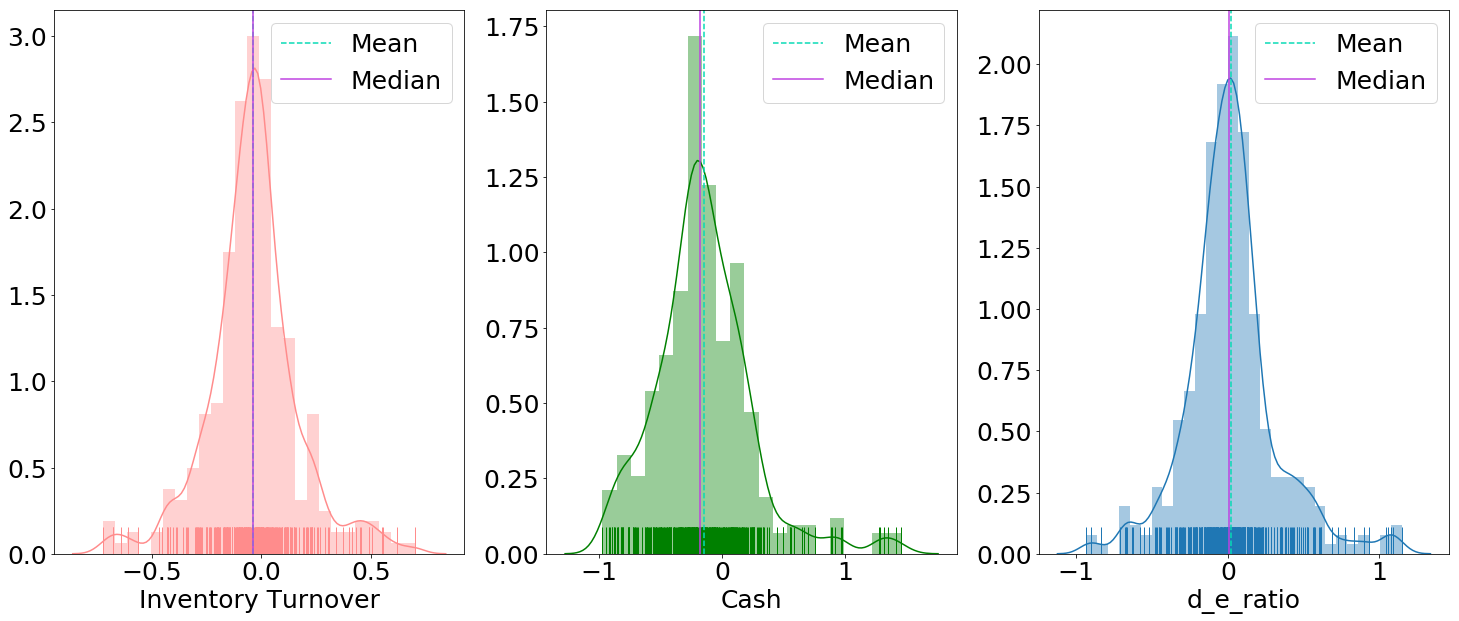

In [304]:
#Distribution Plot
abn = abnormal_financial_with_degree[abnormal_financial_with_degree['date'].isin([pd.to_datetime('31-3-2019')])]

fig, ax = plt.subplots(1,3,figsize=(25,10))

mean_it=abn['Inventory Turnover'].dropna().mean()
median_it=abn['Inventory Turnover'].dropna().median()

sns.distplot(abn['Inventory Turnover'].dropna(), hist=True, rug=True,ax=ax[0],color='#ff8c8c')
ax[0].axvline(mean_it, color='#06dbb5', linestyle='--')
ax[0].axvline(median_it, color='#bf41e1', linestyle='-')
ax[0].legend({'Mean':mean_it,'Median':median_it},fontsize = 25)
ax[0].tick_params(axis = 'both', which = 'major', labelsize = 25)
ax[0].set_xlabel('Inventory Turnover',fontsize=25)

mean_cash=abn['Cash'].dropna().mean()
median_cash=abn['Cash'].dropna().median()

sns.distplot(abn['Cash'].dropna(), hist=True, rug=True,ax=ax[1],color='g')
ax[1].axvline(mean_cash, color='#06dbb5', linestyle='--')
ax[1].axvline(median_cash, color='#bf41e1', linestyle='-')
ax[1].legend({'Mean':mean_cash,'Median':median_cash},fontsize = 25)
ax[1].tick_params(axis = 'both', which = 'major', labelsize = 25)
ax[1].set_xlabel('Cash',fontsize=25)

mean_de=abn['d_e_ratio'].dropna().mean()
median_de=abn['d_e_ratio'].dropna().median()

sns.distplot(abn['d_e_ratio'].dropna(), hist=True, rug=True,ax=ax[2])
ax[2].axvline(mean_de, color='#06dbb5', linestyle='--')
ax[2].axvline(median_de, color='#bf41e1', linestyle='-')
ax[2].legend({'Mean':mean_de,'Median':median_de},fontsize = 25)
ax[2].tick_params(axis = 'both', which = 'major', labelsize = 25)
ax[2].set_xlabel('d_e_ratio',fontsize=25)

In [292]:
abn = abn[abn['country_group']=='Other']
abn['d_e_ratio'].dropna().mean()

0.01044771720189133

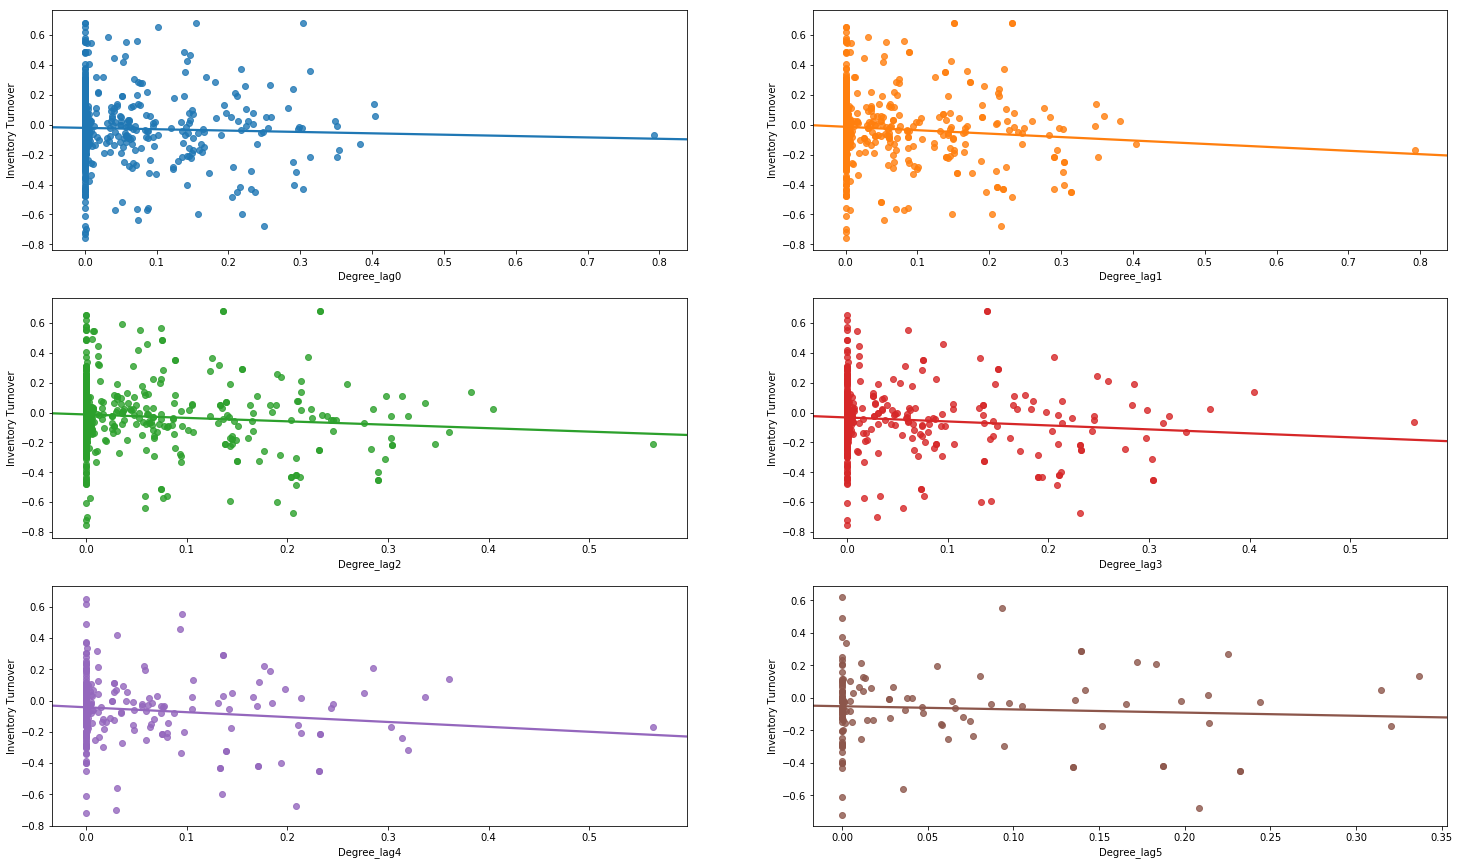

In [894]:
fig, ax = plt.subplots(3,2,figsize=(25,15))
sns.regplot(y='Inventory Turnover', x='Degree_lag0', data=abnormal_financial_with_degree[abnormal_financial_with_degree['country_group']!='Other'],ax=ax[0,0],ci=None)
#sns.lineplot(x=[1,-1],y=[1,-1],ax=ax[0,0],c='g')
#ax[0,0].set_xlim(-1,1)
#ax[0,0].set_ylim(-1,1)
sns.regplot(y='Inventory Turnover', x='Degree_lag1', data=abnormal_financial_with_degree[abnormal_financial_with_degree['country_group']!='Other'],ax=ax[0,1],ci=None)
#sns.lineplot(x=[1,-1],y=[1,-1],ax=ax[0,1],c='g')
#ax[0,1].set_xlim(-1,1)
#ax[0,1].set_ylim(-1,1)
sns.regplot(y='Inventory Turnover', x='Degree_lag2', data=abnormal_financial_with_degree[abnormal_financial_with_degree['country_group']!='Other'],ax=ax[1,0],ci=None)
#sns.lineplot(x=[1,-1],y=[1,-1],ax=ax[1,0],c='g')
#ax[1,0].set_xlim(-1,1)
#ax[1,0].set_ylim(-1,1)
sns.regplot(y='Inventory Turnover', x='Degree_lag3', data=abnormal_financial_with_degree[abnormal_financial_with_degree['country_group']!='Other'],ax=ax[1,1],ci=None)
#sns.lineplot(x=[1,-1],y=[1,-1],ax=ax[1,1],c='g')
#ax[1,1].set_xlim(-1,1)
#ax[1,1].set_ylim(-1,1)
sns.regplot(y='Inventory Turnover', x='Degree_lag4', data=abnormal_financial_with_degree[abnormal_financial_with_degree['country_group']!='Other'],ax=ax[2,0],ci=None)
#sns.lineplot(x=[1,-1],y=[1,-1],ax=ax[2,0],c='g')
#ax[2,0].set_xlim(-1,1)
#ax[2,0].set_ylim(-1,1)
sns.regplot(y='Inventory Turnover', x='Degree_lag5', data=abnormal_financial_with_degree[abnormal_financial_with_degree['country_group']!='Other'],ax=ax[2,1],ci=None)
#sns.lineplot(x=[1,-1],y=[1,-1],ax=ax[2,1],c='g')
#ax[2,1].set_xlim(-1,1)
#ax[2,1].set_ylim(-1,1)

In [902]:
fig, ax = plt.subplots(3,2,figsize=(25,15))
sns.regplot(y='Inventories', x='Degree_lag0', data=abnormal_financial_with_degree[abnormal_financial_with_degree['country_group']!='Other'],ax=ax[0,0],ci=None)
#sns.lineplot(x=[1,-1],y=[1,-1],ax=ax[0,0],c='g')
#ax[0,0].set_xlim(-1,1)
#ax[0,0].set_ylim(-1,1)
sns.regplot(y='Inventories', x='Degree_lag1', data=abnormal_financial_with_degree[abnormal_financial_with_degree['country_group']!='Other'],ax=ax[0,1],ci=None)
#sns.lineplot(x=[1,-1],y=[1,-1],ax=ax[0,1],c='g')
#ax[0,1].set_xlim(-1,1)
#ax[0,1].set_ylim(-1,1)
sns.regplot(y='Inventories', x='Degree_lag2', data=abnormal_financial_with_degree[abnormal_financial_with_degree['country_group']!='Other'],ax=ax[1,0],ci=None)
#sns.lineplot(x=[1,-1],y=[1,-1],ax=ax[1,0],c='g')
#ax[1,0].set_xlim(-1,1)
#ax[1,0].set_ylim(-1,1)
sns.regplot(y='Inventories', x='Degree_lag3', data=abnormal_financial_with_degree[abnormal_financial_with_degree['country_group']!='Other'],ax=ax[1,1],ci=None)
#sns.lineplot(x=[1,-1],y=[1,-1],ax=ax[1,1],c='g')
#ax[1,1].set_xlim(-1,1)
#ax[1,1].set_ylim(-1,1)
sns.regplot(y='Inventories', x='Degree_lag4', data=abnormal_financial_with_degree[abnormal_financial_with_degree['country_group']!='Other'],ax=ax[2,0],ci=None)
#sns.lineplot(x=[1,-1],y=[1,-1],ax=ax[2,0],c='g')
#ax[2,0].set_xlim(-1,1)
#ax[2,0].set_ylim(-1,1)
sns.regplot(y='Inventories', x='Degree_lag5', data=abnormal_financial_with_degree[abnormal_financial_with_degree['country_group']!='Other'],ax=ax[2,1],ci=None)
#sns.lineplot(x=[1,-1],y=[1,-1],ax=ax[2,1],c='g')
#ax[2,1].set_xlim(-1,1)
#ax[2,1].set_ylim(-1,1)

### Scatter Plot with Total Liability

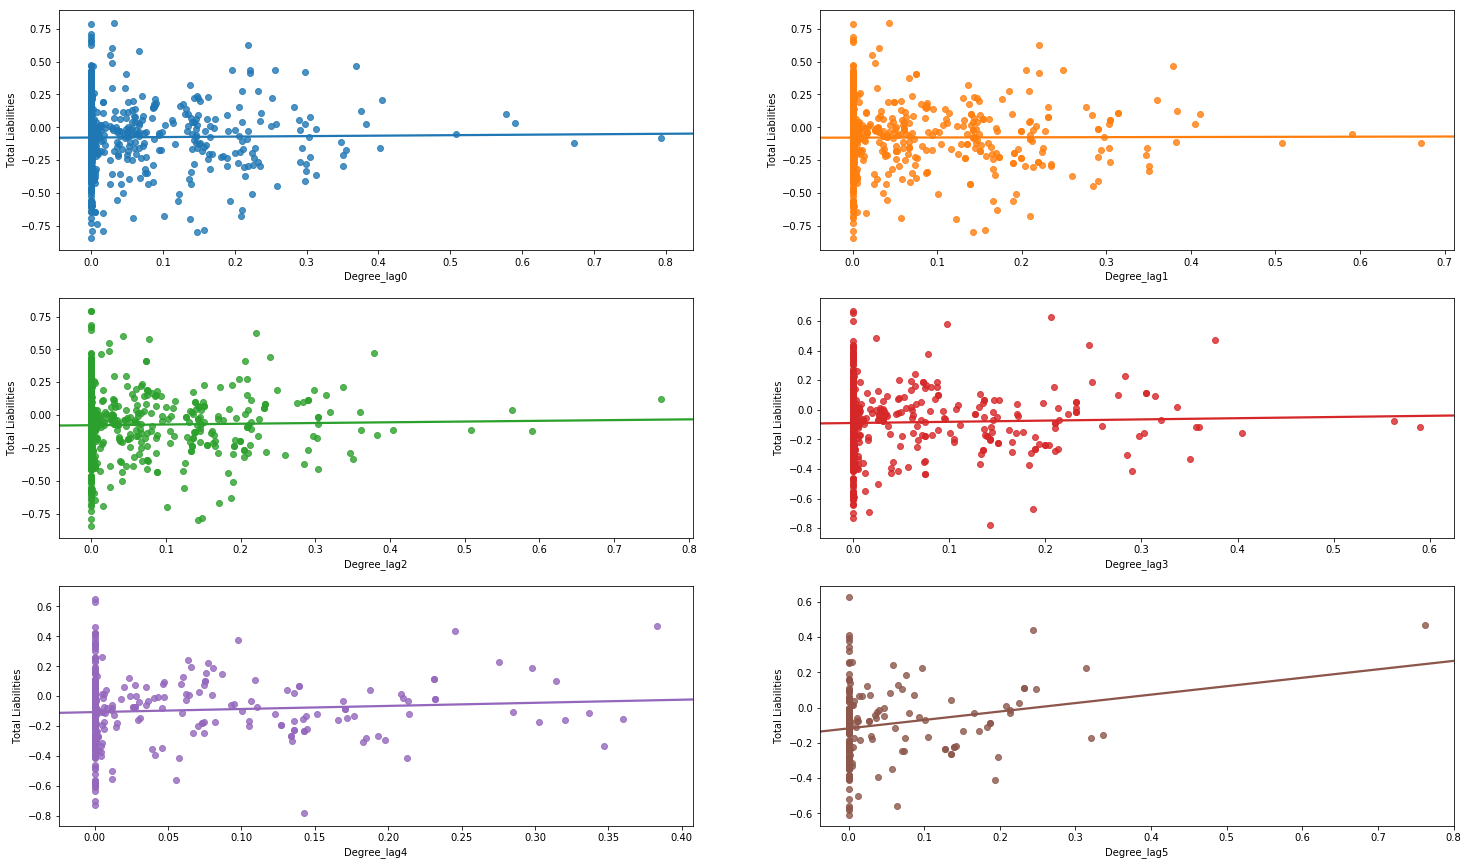

In [895]:
fig, ax = plt.subplots(3,2,figsize=(25,15))
sns.regplot(y='Total Liabilities', x='Degree_lag0', data=abnormal_financial_with_degree[abnormal_financial_with_degree['country_group']!='Other'],ax=ax[0,0],ci=None)
#sns.lineplot(x=[1,-1],y=[1,-1],ax=ax[0,0],c='g')
#ax[0,0].set_xlim(-1,1)
#ax[0,0].set_ylim(-1,1)
sns.regplot(y='Total Liabilities', x='Degree_lag1', data=abnormal_financial_with_degree[abnormal_financial_with_degree['country_group']!='Other'],ax=ax[0,1],ci=None)
#sns.lineplot(x=[1,-1],y=[1,-1],ax=ax[0,1],c='g')
#ax[0,1].set_xlim(-1,1)
#ax[0,1].set_ylim(-1,1)
sns.regplot(y='Total Liabilities', x='Degree_lag2', data=abnormal_financial_with_degree[abnormal_financial_with_degree['country_group']!='Other'],ax=ax[1,0],ci=None)
#sns.lineplot(x=[1,-1],y=[1,-1],ax=ax[1,0],c='g')
#ax[1,0].set_xlim(-1,1)
#ax[1,0].set_ylim(-1,1)
sns.regplot(y='Total Liabilities', x='Degree_lag3', data=abnormal_financial_with_degree[abnormal_financial_with_degree['country_group']!='Other'],ax=ax[1,1],ci=None)
#sns.lineplot(x=[1,-1],y=[1,-1],ax=ax[1,1],c='g')
#ax[1,1].set_xlim(-1,1)
#ax[1,1].set_ylim(-1,1)
sns.regplot(y='Total Liabilities', x='Degree_lag4', data=abnormal_financial_with_degree[abnormal_financial_with_degree['country_group']!='Other'],ax=ax[2,0],ci=None)
#sns.lineplot(x=[1,-1],y=[1,-1],ax=ax[2,0],c='g')
#ax[2,0].set_xlim(-1,1)
#ax[2,0].set_ylim(-1,1)
sns.regplot(y='Total Liabilities', x='Degree_lag5', data=abnormal_financial_with_degree[abnormal_financial_with_degree['country_group']!='Other'],ax=ax[2,1],ci=None)
#sns.lineplot(x=[1,-1],y=[1,-1],ax=ax[2,1],c='g')
#ax[2,1].set_xlim(-1,1)
#ax[2,1].set_ylim(-1,1)

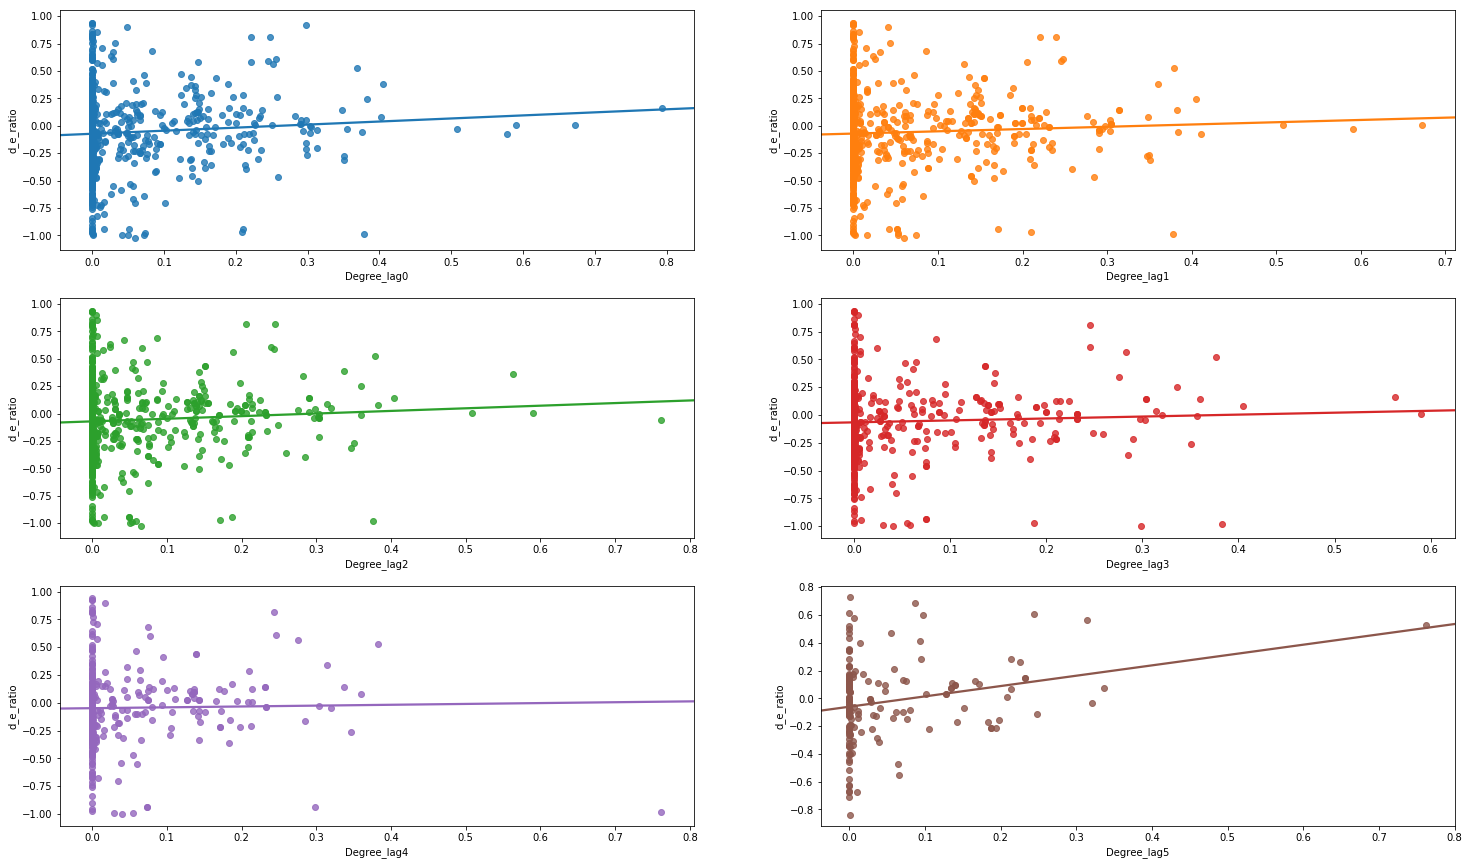

In [896]:
fig, ax = plt.subplots(3,2,figsize=(25,15))
sns.regplot(y='d_e_ratio', x='Degree_lag0', data=abnormal_financial_with_degree[abnormal_financial_with_degree['country_group']!='Other'],ax=ax[0,0],ci=None)
#sns.lineplot(x=[1,-1],y=[1,-1],ax=ax[0,0],c='g')
#ax[0,0].set_xlim(-1,1)
#ax[0,0].set_ylim(-1,1)
sns.regplot(y='d_e_ratio', x='Degree_lag1', data=abnormal_financial_with_degree[abnormal_financial_with_degree['country_group']!='Other'],ax=ax[0,1],ci=None)
#sns.lineplot(x=[1,-1],y=[1,-1],ax=ax[0,1],c='g')
#ax[0,1].set_xlim(-1,1)
#ax[0,1].set_ylim(-1,1)
sns.regplot(y='d_e_ratio', x='Degree_lag2', data=abnormal_financial_with_degree[abnormal_financial_with_degree['country_group']!='Other'],ax=ax[1,0],ci=None)
#sns.lineplot(x=[1,-1],y=[1,-1],ax=ax[1,0],c='g')
#ax[1,0].set_xlim(-1,1)
#ax[1,0].set_ylim(-1,1)
sns.regplot(y='d_e_ratio', x='Degree_lag3', data=abnormal_financial_with_degree[abnormal_financial_with_degree['country_group']!='Other'],ax=ax[1,1],ci=None)
#sns.lineplot(x=[1,-1],y=[1,-1],ax=ax[1,1],c='g')
#ax[1,1].set_xlim(-1,1)
#ax[1,1].set_ylim(-1,1)
sns.regplot(y='d_e_ratio', x='Degree_lag4', data=abnormal_financial_with_degree[abnormal_financial_with_degree['country_group']!='Other'],ax=ax[2,0],ci=None)
#sns.lineplot(x=[1,-1],y=[1,-1],ax=ax[2,0],c='g')
#ax[2,0].set_xlim(-1,1)
#ax[2,0].set_ylim(-1,1)
sns.regplot(y='d_e_ratio', x='Degree_lag5', data=abnormal_financial_with_degree[abnormal_financial_with_degree['country_group']!='Other'],ax=ax[2,1],ci=None)
#sns.lineplot(x=[1,-1],y=[1,-1],ax=ax[2,1],c='g')
#ax[2,1].set_xlim(-1,1)
#ax[2,1].set_ylim(-1,1)

## Centrality Calculation

In [93]:
import networkx as nx
import operator
from networkx.algorithms import bipartite
import ipywidgets as widgets

In [89]:
df_17Q4 = pd.concat([First_Tier_Supp[First_Tier_Supp['As Of Date Bloomberg']==20171231],Second_Tier_Supp[Second_Tier_Supp['As Of Date Bloomberg']==20171231]])
df_18Q1 = pd.concat([First_Tier_Supp[First_Tier_Supp['As Of Date Bloomberg']==20180331],Second_Tier_Supp[Second_Tier_Supp['As Of Date Bloomberg']==20180331]])
df_18Q2 = pd.concat([First_Tier_Supp[First_Tier_Supp['As Of Date Bloomberg']==20180630],Second_Tier_Supp[Second_Tier_Supp['As Of Date Bloomberg']==20180630]])
df_18Q3 = pd.concat([First_Tier_Supp[First_Tier_Supp['As Of Date Bloomberg']==20180930],Second_Tier_Supp[Second_Tier_Supp['As Of Date Bloomberg']==20180930]])
df_18Q4 = pd.concat([First_Tier_Supp[First_Tier_Supp['As Of Date Bloomberg']==20181231],Second_Tier_Supp[Second_Tier_Supp['As Of Date Bloomberg']==20181231]])
df_19Q1 = pd.concat([First_Tier_Supp[First_Tier_Supp['As Of Date Bloomberg']==20190331],Second_Tier_Supp[Second_Tier_Supp['As Of Date Bloomberg']==20190331]])

In [90]:
G_17Q4 = nx.from_pandas_edgelist(df_17Q4,'Supplier Ticker','Central Ticker',edge_attr='Relationship Value USD',
                            create_using=nx.DiGraph())
G_18Q1 = nx.from_pandas_edgelist(df_18Q1,'Supplier Ticker','Central Ticker',edge_attr='Relationship Value USD',
                            create_using=nx.DiGraph())
G_18Q2 = nx.from_pandas_edgelist(df_18Q3,'Supplier Ticker','Central Ticker',edge_attr='Relationship Value USD',
                            create_using=nx.DiGraph())
G_18Q3 = nx.from_pandas_edgelist(df_18Q4,'Supplier Ticker','Central Ticker',edge_attr='Relationship Value USD',
                            create_using=nx.DiGraph())
G_18Q4 = nx.from_pandas_edgelist(df_18Q4,'Supplier Ticker','Central Ticker',edge_attr='Relationship Value USD',
                            create_using=nx.DiGraph())
G_19Q1 = nx.from_pandas_edgelist(df_19Q1,'Supplier Ticker','Central Ticker',edge_attr='Relationship Value USD',
                            create_using=nx.DiGraph())

#### Degree Centrality

In [96]:
degCent_17Q4 = nx.degree_centrality(G_17Q4)
sorted_degCent_17Q4 = pd.DataFrame(sorted(degCent_17Q4.items(),key=operator.itemgetter(1),reverse = True),
                              columns = ['Ticker','Degree Centrality'])
degCent_18Q1 = nx.degree_centrality(G_18Q1)
sorted_degCent_18Q1 = pd.DataFrame(sorted(degCent_18Q1.items(),key=operator.itemgetter(1),reverse = True),
                              columns = ['Ticker','Degree Centrality'])
degCent_18Q2 = nx.degree_centrality(G_18Q2)
sorted_degCent_18Q2 = pd.DataFrame(sorted(degCent_18Q2.items(),key=operator.itemgetter(1),reverse = True),
                              columns = ['Ticker','Degree Centrality'])
degCent_18Q3 = nx.degree_centrality(G_18Q3)
sorted_degCent_18Q3 = pd.DataFrame(sorted(degCent_18Q3.items(),key=operator.itemgetter(1),reverse = True),
                              columns = ['Ticker','Degree Centrality'])
degCent_18Q4 = nx.degree_centrality(G_18Q4)
sorted_degCent_18Q4 = pd.DataFrame(sorted(degCent_18Q4.items(),key=operator.itemgetter(1),reverse = True),
                              columns = ['Ticker','Degree Centrality'])
degCent_19Q1 = nx.degree_centrality(G_19Q1)
sorted_degCent_19Q1 = pd.DataFrame(sorted(degCent_19Q1.items(),key=operator.itemgetter(1),reverse = True),
                              columns = ['Ticker','Degree Centrality'])

#### Closeness Centrality

In [97]:
closeCent_17Q4 = nx.closeness_centrality(G_17Q4)
sorted_closeCent_17Q4 = pd.DataFrame(sorted(closeCent_17Q4.items(),key=operator.itemgetter(1),reverse = True),
                                columns = ['Ticker','Closeness Centrality'])
closeCent_18Q1 = nx.closeness_centrality(G_18Q1)
sorted_closeCent_18Q1 = pd.DataFrame(sorted(closeCent_18Q1.items(),key=operator.itemgetter(1),reverse = True),
                                columns = ['Ticker','Closeness Centrality'])
closeCent_18Q2 = nx.closeness_centrality(G_18Q2)
sorted_closeCent_18Q2 = pd.DataFrame(sorted(closeCent_18Q2.items(),key=operator.itemgetter(1),reverse = True),
                                columns = ['Ticker','Closeness Centrality'])
closeCent_18Q3 = nx.closeness_centrality(G_18Q3)
sorted_closeCent_18Q3 = pd.DataFrame(sorted(closeCent_18Q3.items(),key=operator.itemgetter(1),reverse = True),
                                columns = ['Ticker','Closeness Centrality'])
closeCent_18Q4 = nx.closeness_centrality(G_18Q4)
sorted_closeCent_18Q4 = pd.DataFrame(sorted(closeCent_18Q4.items(),key=operator.itemgetter(1),reverse = True),
                                columns = ['Ticker','Closeness Centrality'])
closeCent_19Q1 = nx.closeness_centrality(G_19Q1)
sorted_closeCent_19Q1 = pd.DataFrame(sorted(closeCent_19Q1.items(),key=operator.itemgetter(1),reverse = True),
                                columns = ['Ticker','Closeness Centrality'])

#### Betweenness Centrality

In [98]:
btwnCent_17Q4 = nx.betweenness_centrality(G_17Q4,normalized = True, endpoints = True)
sorted_btwnCent_17Q4 = pd.DataFrame(sorted(btwnCent_17Q4.items(),key=operator.itemgetter(1),reverse = True),
                               columns = ['Ticker','Betweenness Centrality'])
btwnCent_18Q1 = nx.betweenness_centrality(G_18Q1,normalized = True, endpoints = True)
sorted_btwnCent_18Q1 = pd.DataFrame(sorted(btwnCent_18Q1.items(),key=operator.itemgetter(1),reverse = True),
                               columns = ['Ticker','Betweenness Centrality'])
btwnCent_18Q2 = nx.betweenness_centrality(G_18Q2,normalized = True, endpoints = True)
sorted_btwnCent_18Q2 = pd.DataFrame(sorted(btwnCent_18Q2.items(),key=operator.itemgetter(1),reverse = True),
                               columns = ['Ticker','Betweenness Centrality'])
btwnCent_18Q3 = nx.betweenness_centrality(G_18Q3,normalized = True, endpoints = True)
sorted_btwnCent_18Q3 = pd.DataFrame(sorted(btwnCent_18Q3.items(),key=operator.itemgetter(1),reverse = True),
                               columns = ['Ticker','Betweenness Centrality'])
btwnCent_18Q4 = nx.betweenness_centrality(G_18Q4,normalized = True, endpoints = True)
sorted_btwnCent_18Q4 = pd.DataFrame(sorted(btwnCent_18Q4.items(),key=operator.itemgetter(1),reverse = True),
                               columns = ['Ticker','Betweenness Centrality'])
btwnCent_19Q1 = nx.betweenness_centrality(G_19Q1,normalized = True, endpoints = True)
sorted_btwnCent_19Q1 = pd.DataFrame(sorted(btwnCent_19Q1.items(),key=operator.itemgetter(1),reverse = True),
                               columns = ['Ticker','Betweenness Centrality'])

#### Hubs and Authorities


In [99]:
hub_and_author_17Q4 = nx.hits(G_17Q4)
hubs_17Q4 = hub_and_author_17Q4[0]
author_17Q4 = hub_and_author_17Q4[1]
hub_and_author_18Q1 = nx.hits(G_18Q1)
hubs_18Q1 = hub_and_author_18Q1[0]
author_18Q1 = hub_and_author_18Q1[1]
hub_and_author_18Q2 = nx.hits(G_18Q2)
hubs_18Q2 = hub_and_author_18Q2[0]
author_18Q2 = hub_and_author_18Q2[1]
hub_and_author_18Q3 = nx.hits(G_18Q3)
hubs_18Q3 = hub_and_author_18Q3[0]
author_18Q3 = hub_and_author_18Q3[1]
hub_and_author_18Q4 = nx.hits(G_18Q4)
hubs_18Q4 = hub_and_author_18Q4[0]
author_18Q4 = hub_and_author_18Q4[1]
hub_and_author_19Q1 = nx.hits(G_19Q1)
hubs_19Q1 = hub_and_author_19Q1[0]
author_19Q1 = hub_and_author_19Q1[1]

In [100]:
sorted_hub_17Q4 = pd.DataFrame(sorted(hubs_17Q4.items(),key=operator.itemgetter(1),reverse = True),
                          columns = ['Ticker','Hub score'])
sorted_hub_18Q1 = pd.DataFrame(sorted(hubs_18Q1.items(),key=operator.itemgetter(1),reverse = True),
                          columns = ['Ticker','Hub score'])
sorted_hub_18Q2 = pd.DataFrame(sorted(hubs_18Q2.items(),key=operator.itemgetter(1),reverse = True),
                          columns = ['Ticker','Hub score'])
sorted_hub_18Q3 = pd.DataFrame(sorted(hubs_18Q3.items(),key=operator.itemgetter(1),reverse = True),
                          columns = ['Ticker','Hub score'])
sorted_hub_18Q4 = pd.DataFrame(sorted(hubs_18Q4.items(),key=operator.itemgetter(1),reverse = True),
                          columns = ['Ticker','Hub score'])
sorted_hub_19Q1 = pd.DataFrame(sorted(hubs_19Q1.items(),key=operator.itemgetter(1),reverse = True),
                          columns = ['Ticker','Hub score'])

In [101]:
sorted_author_17Q4 = pd.DataFrame(sorted(author_17Q4.items(),key=operator.itemgetter(1),reverse = True),
                             columns = ['Ticker','Auth score'])
sorted_author_18Q1 = pd.DataFrame(sorted(author_18Q1.items(),key=operator.itemgetter(1),reverse = True),
                             columns = ['Ticker','Auth score'])
sorted_author_18Q2 = pd.DataFrame(sorted(author_18Q2.items(),key=operator.itemgetter(1),reverse = True),
                             columns = ['Ticker','Auth score'])
sorted_author_18Q3 = pd.DataFrame(sorted(author_18Q3.items(),key=operator.itemgetter(1),reverse = True),
                             columns = ['Ticker','Auth score'])
sorted_author_18Q4 = pd.DataFrame(sorted(author_18Q4.items(),key=operator.itemgetter(1),reverse = True),
                             columns = ['Ticker','Auth score'])
sorted_author_19Q1 = pd.DataFrame(sorted(author_19Q1.items(),key=operator.itemgetter(1),reverse = True),
                             columns = ['Ticker','Auth score'])

#### Merging Centrality

In [102]:
centrality_17Q4 = pd.merge(sorted_degCent_17Q4, sorted_closeCent_17Q4, on='Ticker')
centrality_17Q4 = pd.merge(centrality_17Q4, sorted_btwnCent_17Q4, on='Ticker')
centrality_17Q4 = pd.merge(centrality_17Q4, sorted_hub_17Q4, on='Ticker')
centrality_17Q4 = pd.merge(centrality_17Q4, sorted_author_17Q4, on='Ticker')

centrality_18Q1 = pd.merge(sorted_degCent_18Q1, sorted_closeCent_18Q1, on='Ticker')
centrality_18Q1 = pd.merge(centrality_18Q1, sorted_btwnCent_18Q1, on='Ticker')
centrality_18Q1 = pd.merge(centrality_18Q1, sorted_hub_18Q1, on='Ticker')
centrality_18Q1 = pd.merge(centrality_18Q1, sorted_author_18Q1, on='Ticker')

centrality_18Q2 = pd.merge(sorted_degCent_18Q2, sorted_closeCent_18Q2, on='Ticker')
centrality_18Q2 = pd.merge(centrality_18Q2, sorted_btwnCent_18Q2, on='Ticker')
centrality_18Q2 = pd.merge(centrality_18Q2, sorted_hub_18Q2, on='Ticker')
centrality_18Q2 = pd.merge(centrality_18Q2, sorted_author_18Q2, on='Ticker')

centrality_18Q3 = pd.merge(sorted_degCent_18Q3, sorted_closeCent_18Q3, on='Ticker')
centrality_18Q3 = pd.merge(centrality_18Q3, sorted_btwnCent_18Q3, on='Ticker')
centrality_18Q3 = pd.merge(centrality_18Q3, sorted_hub_18Q3, on='Ticker')
centrality_18Q3 = pd.merge(centrality_18Q3, sorted_author_18Q3, on='Ticker')

centrality_18Q4 = pd.merge(sorted_degCent_18Q4, sorted_closeCent_18Q4, on='Ticker')
centrality_18Q4 = pd.merge(centrality_18Q4, sorted_btwnCent_18Q4, on='Ticker')
centrality_18Q4 = pd.merge(centrality_18Q4, sorted_hub_18Q4, on='Ticker')
centrality_18Q4 = pd.merge(centrality_18Q4, sorted_author_18Q4, on='Ticker')

centrality_19Q1 = pd.merge(sorted_degCent_19Q1, sorted_closeCent_19Q1, on='Ticker')
centrality_19Q1 = pd.merge(centrality_19Q1, sorted_btwnCent_19Q1, on='Ticker')
centrality_19Q1 = pd.merge(centrality_19Q1, sorted_hub_19Q1, on='Ticker')
centrality_19Q1 = pd.merge(centrality_19Q1, sorted_author_19Q1, on='Ticker')

In [104]:
centrality_17Q4['date']= pd.to_datetime('31-12-2017')
centrality_18Q1['date']= pd.to_datetime('31-3-2018')
centrality_18Q2['date']= pd.to_datetime('30-6-2018')
centrality_18Q3['date']= pd.to_datetime('30-9-2018')
centrality_18Q4['date']= pd.to_datetime('31-12-2018')
centrality_19Q1['date']= pd.to_datetime('31-3-2019')

In [106]:
centrality_all= pd.concat([centrality_17Q4,centrality_18Q1,centrality_18Q2,centrality_18Q3,centrality_18Q4,centrality_19Q1])

## Output Impact Score

In [108]:
total_win

Metric Name           Tickers  \
0            000009 CH Equity   
1            000038 CH Equity   
2            000120 KS Equity   
3            000240 KS Equity   
4            000300 KS Equity   
5            000333 CH Equity   
6            000417 CH Equity   
7            000430 KS Equity   
8            000551 CH Equity   
9            000559 CH Equity   
10           000571 CH Equity   
11           000572 CH Equity   
12           000584 CH Equity   
13           000589 CH Equity   
14           000599 CH Equity   
15           000601 CH Equity   
16           000622 CH Equity   
17           000629 CH Equity   
18           000676 CH Equity   
19           000678 CH Equity   
20           000700 CH Equity   
21           000709 CH Equity   
22           000710 CH Equity   
23           000757 CH Equity   
24           000760 CH Equity   
25           000768 CH Equity   
26           000795 CH Equity   
27           000800 CH Equity   
28           000810 CH Equity   
29           000821 CH Equity   
...                       ...   
1489            WBC US Equity   
1490            WCC US Equity   
1491         WFATHZ CH Equity   
1492            WGO US Equity   
1493            WHL IN Equity   
1494            WOR US Equity   
1495            WPP LN Equity   
1496           WPRT CN Equity   
1497           WYNN US Equity   
1498              X US Equity   
1499           XFAB FP Equity   
1500          XIDEQ US Equity   
1501           XLNX US Equity   
1502            XOM US Equity   
1503           XONE US Equity   
1504           XPER US Equity   
1505            XPO US Equity   
1506            XRX US Equity   
1507            XTC CN Equity   
1508          YGEHY US Equity   
1509           YNAP IM Equity   
1510            YOC GR Equity   
1511           YPFD AR Equity   
1512           YTLE MK Equity   
1513           ZAAP US Equity   
1514           ZBRA US Equity   
1515           ZIL2 GR Equity   
1516           ZMZN RM Equity   
1517            ZUO US Equity   
1518          ZXAIY US Equity   

Metric Name                                       Company Name Country  \
0                                     China Baoan Group Co Ltd      CN   
1                          Shenzhen Capstone Industrial Co Ltd      CN   
2                                            CJ Logistics Corp      KR   
3                              Hankook Technology Group Co Ltd      KR   
4                                            Dayou Plus Co Ltd      KR   
5                                           Midea Group Co Ltd      CN   
6                          Hefei Department Store Group Co Ltd      CN   
7                                       Dae Won Kang Up Co Ltd      KR   
8                           Create Technology & Science Co Ltd      CN   
9                                     Wanxiang Qianchao Co Ltd      CN   
10                                      Sundiro Holding Co Ltd      CN   
11                                            Haima Automobi-A      CN   
12                     Jiangsu Hagong Intelligent Robot Co Ltd      CN   
13                                         Guizhou Tyre Co Ltd      CN   
14                                   Qingdao Doublestar Co Ltd      CN   
15                             Guangdong Shaoneng Group Co Ltd      CN   
16                  Hengli Industrial Development Group Co Ltd      CN   
17           Pangang Group Vanadium Titanium & Resources Co...      CN   
18                                  Genimous Technology Co Ltd      CN   
19                         Xiangyang Automobile Bearing Co Ltd      CN   
20                Jiangnan Mould and Plastic Technology Co Ltd      CN   
21                                              Hesteel Co Ltd      CN   
22                                       Berry Genomics Co Ltd      CN   
23                      Sichuan Haowu Electromechanical Co Ltd      CN   
24                                         Steyr Motors Co Ltd      CN   
25                           

In [132]:
impact_score = total_win[['Tickers',"Company Name","Country","date","Inventory Turnover","d_e_ratio"]]
impact_score['Inventory Turnover']= -impact_score['Inventory Turnover']

/Users/Saik/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [156]:
ITO = pd.pivot_table(impact_score,index = ['Tickers','Company Name','Country'],columns=['date'],
              values=['Inventory Turnover'], aggfunc={'Inventory Turnover':np.sum})
ITO.columns = ITO.columns.droplevel(0)
ITO.reset_index(inplace = True)
ITO_col = ITO.columns
for i in range(3,7):
    ITO[[ITO_col[i]]]=StandardScaler().fit_transform(ITO[[ITO_col[i]]])
ITO_z = pd.melt(ITO, id_vars=['Tickers','Company Name','Country'], var_name="date", value_name="Opportunity_Z")

In [157]:
D_E = pd.pivot_table(impact_score,index = ['Tickers','Company Name','Country'],columns=['date'],
              values=['d_e_ratio'], aggfunc={'d_e_ratio':np.sum})
D_E.columns = D_E.columns.droplevel(0)
D_E.reset_index(inplace = True)
D_E_col = D_E.columns
for i in range(3,7):
    D_E[[D_E_col[i]]]=StandardScaler().fit_transform(D_E[[D_E_col[i]]])
D_E_z = pd.melt(D_E, id_vars=['Tickers','Company Name','Country'], var_name="date", value_name="Risk_Z")

In [161]:
impact_score =pd.merge(impact_score,ITO_z)
impact_score =pd.merge(impact_score,D_E_z)

In [163]:
output_centrality_impact = pd.merge(centrality_all,impact_score,
                                    how='left', left_on=['Ticker','date'],right_on=['Tickers','date'])

In [164]:
#impact score output
output_centrality_impact.to_excel('Impact Score.xlsx',sheet_name='Impact Score',index=False)

## Financial Performance Manufacturers and First Tier Suppliers

In [907]:
First_relationship = First_Tier_Supp[['Central Ticker','As Of Date Bloomberg','Supplier Ticker']]
First_relationship['As Of Date Bloomberg'] = pd.to_datetime(First_relationship['As Of Date Bloomberg'],format="%Y%m%d")

/Users/Saik/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [908]:
First_relationship = pd.merge(First_relationship,total_iqr,how='left',left_on=['Central Ticker','As Of Date Bloomberg'],
                        right_on=['Tickers','date'])
First_relationship = pd.merge(First_relationship,total_iqr,how='left',left_on=['Supplier Ticker','As Of Date Bloomberg'],
                        right_on=['Tickers','date'],suffixes=('_central', '_supplier'))
First_relationship

Central Ticker As Of Date Bloomberg       Supplier Ticker  \
0        1188 HK Equity           2018-12-31    1471398D CH Equity   
1      000572 CH Equity           2018-12-31        1512 TT Equity   
2      000572 CH Equity           2018-12-31         ALV US Equity   
3      000572 CH Equity           2018-12-31      HAIMAZ CH Equity   
4      000572 CH Equity           2018-12-31         CPS US Equity   
5      000572 CH Equity           2018-12-31      000710 CH Equity   
6      000572 CH Equity           2018-12-31        1506 TT Equity   
7      000572 CH Equity           2018-12-31      000559 CH Equity   
8      000800 CH Equity           2018-12-31      CHFAWZ CH Equity   
9      000800 CH Equity           2018-12-31         TEN US Equity   
10     000800 CH Equity           2018-12-31      600742 CH Equity   
11     000800 CH Equity           2018-12-31      200030 CH Equity   
12     000800 CH Equity           2018-12-31       1003Z GR Equity   
13     000800 CH Equity           2018-12-31    1573026D CH Equity   
14     000800 CH Equity           2018-12-31         CON GR Equity   
15     000800 CH Equity           2018-12-31    7950518Z CH Equity   
16     000800 CH Equity           2018-12-31         CMI US Equity   
17     000800 CH Equity           2018-12-31      300392 CH Equity   
18     000800 CH Equity           2018-12-31         KU2 GR Equity   
19     000800 CH Equity           2018-12-31        6473 JP Equity   
20     000800 CH Equity           2018-12-31          MG CN Equity   
21     000800 CH Equity           2018-12-31         WBC US Equity   
22     000800 CH Equity           2018-12-31         TKA GR Equity   
23     000800 CH Equity           2018-12-31          FR FP Equity   
24     000800 CH Equity           2018-12-31      002232 CH Equity   
25     000800 CH Equity           2018-12-31        7276 JP Equity   
26     000800 CH Equity           2018-12-31        2105 TT Equity   
27     000800 CH Equity           2018-12-31    1074506D CH Equity   
28     000800 CH Equity           2018-12-31         BWA US Equity   
29     000800 CH Equity           2018-12-31        APTV US Equity   
...                 ...                  ...                   ...   
13986  600418 CH Equity           2017-12-31    0275657D CH Equity   
13987  600418 CH Equity           2017-12-31    0180742D CH Equity   
13988  600418 CH Equity           2017-12-31        YVAZ CH Equity   
13989    1122 HK Equity           2017-12-31        SKFB SS Equity   
13990  603611 CH Equity           2017-12-31   Changxing... Equity   
13991  600609 CH Equity           2017-12-31  Mianyang1 ... Equity   
13992  600609 CH Equity           2017-12-31  Mianyang2 ... Equity   
13993  600609 CH Equity           2017-12-31         TEN US Equity   
13994  600609 CH Equity           2017-12-31      ADJVBZ CH Equity   
13995  600609 CH Equity           2017-12-31  Shenyang3 ... Equity   
13996  600609 CH Equity           2017-12-31         DAN US Equity   
13997  600609 CH Equity           2017-12-31      SJHASZ CH Equity   
13998  600609 CH Equity           2017-12-31      600653 CH Equity   
13999  600609 CH Equity           2017-12-31        AGHZ CH Equity   
14000  600609 CH Equity           2017-12-31   Brillianc... Equity   
14001  600609 CH Equity           2017-12-31  Shenyang2 ... Equity   
14002  600609 CH Equity           2017-12-31  Shenyang4 ... Equity   
14003  600609 CH Equity           2017-12-31  Shenyang5 ... Equity   
14004  600609 CH Equity           2017-12-31      ABCTMZ CH Equity   
14005  600303 CH Equity           2017-12-31   Tieling H... Equity   
14006     THO US Equity           2017-12-31        LCII US Equity   
14007     THO US Equity           2017-12-31        SPAR US Equity   
14008     THO US Equity           2017-12-31         CMI US Equity   
14009     THO US Equity           2017-12-31         GWR US Equity   
14010     THO US Equity           2017-12-31        ALSN US Equity   
14011     THO US Eq

In [909]:
First_relationship.columns

Index(['Central Ticker', 'As Of Date Bloomberg', 'Supplier Ticker',
       'Tickers_central', 'Company Name_central', 'Country_central',
       'AR_TO_central', 'Accounts Payable_central',
       'Accounts Receivable - Net_central', 'Basic Earnings per Share_central',
       'COGS_ratio_central', 'Cash From Operations_central',
       'Cost of Goods & Services Sold_central', 'EBIT_central',
       'Free Cash Flow to Equity_central', 'Free Cash Flow to Firm_central',
       'GPM_central', 'Gross Profit_central', 'Interest Expense_central',
       'Inventories_central', 'Inventory Turnover_central',
       'Last Price_central', 'Long Term Debt_central', 'Market_Cap_central',
       'Net Income/Net Profit (Losses)_central', 'Operating Expenses_central',
       'PM_central', 'R&D Expense_central', 'Return on Assets_central',
       'Revenue_central',
       'Selling, General and Administrative Expense_central',
       'Short Term Debt_central', 'Total Equity_central',
       'Total Liabili

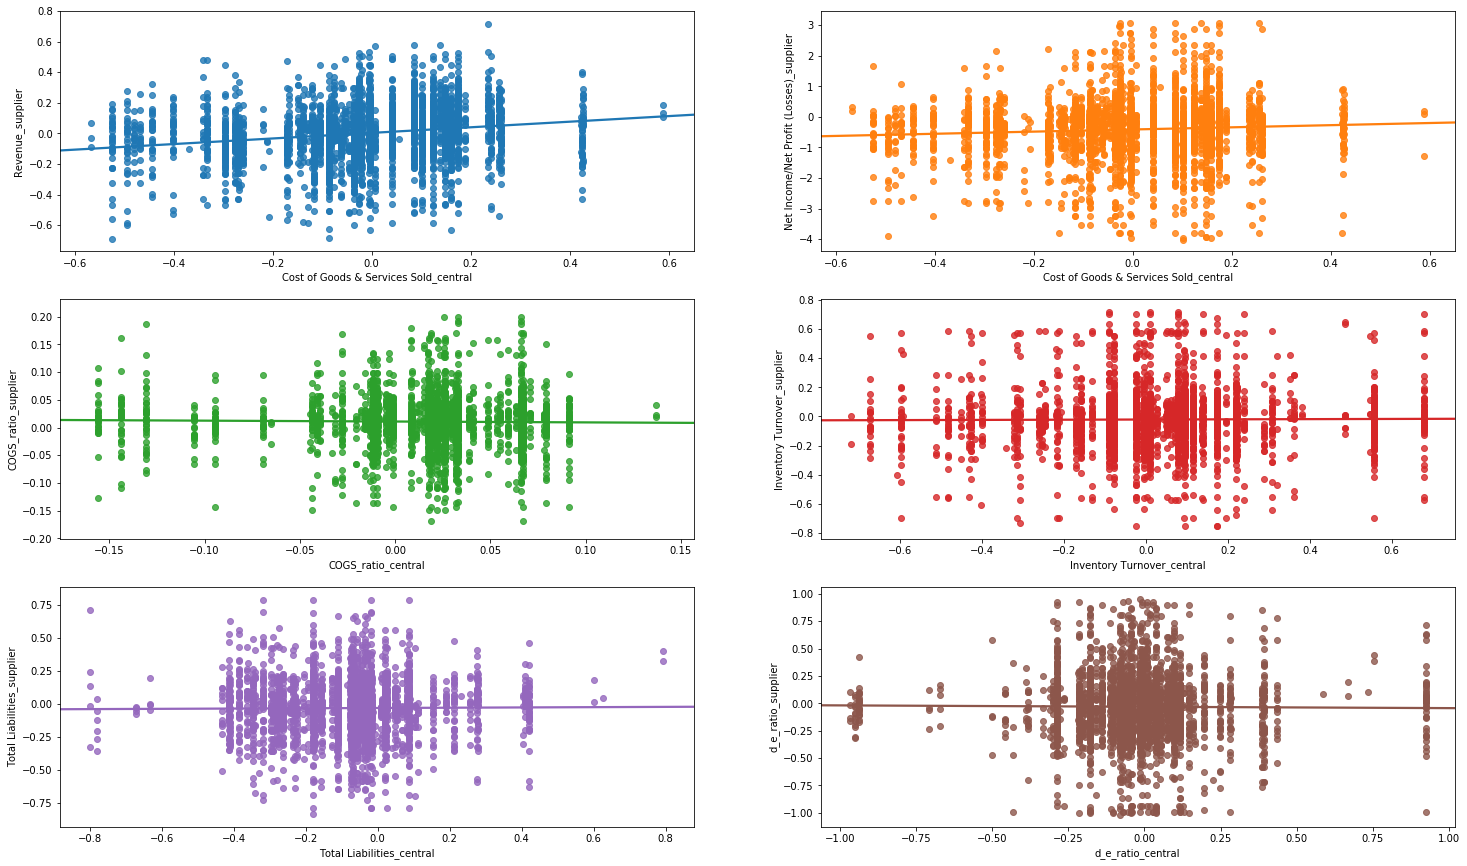

In [915]:
fig, ax = plt.subplots(3,2,figsize=(25,15))
sns.regplot(x='Cost of Goods & Services Sold_central', y='Revenue_supplier', data=First_relationship,ax=ax[0,0],ci=None)
#sns.lineplot(x=[1,-1],y=[1,-1],ax=ax[0,0],c='g')
#ax[0,0].set_xlim(-1,1)
#ax[0,0].set_ylim(-1,1)
sns.regplot(x='Cost of Goods & Services Sold_central', y='PM_supplier', data=First_relationship,ax=ax[0,1],ci=None)
#sns.lineplot(x=[1,-1],y=[1,-1],ax=ax[0,1],c='g')
#ax[0,1].set_xlim(-1,1)
#ax[0,1].set_ylim(-1,1)
sns.regplot(x='COGS_ratio_central', y='COGS_ratio_supplier', data=First_relationship,ax=ax[1,0],ci=None)
#sns.lineplot(x=[1,-1],y=[1,-1],ax=ax[1,0],c='g')
#ax[1,0].set_xlim(-1,1)
#ax[1,0].set_ylim(-1,1)
sns.regplot(x='Inventory Turnover_central', y='Inventory Turnover_supplier', data=First_relationship,ax=ax[1,1],ci=None)
#sns.lineplot(x=[1,-1],y=[1,-1],ax=ax[1,1],c='g')
#ax[1,1].set_xlim(-1,1)
#ax[1,1].set_ylim(-1,1)
sns.regplot(x='Total Liabilities_central', y='Total Liabilities_supplier', data=First_relationship,ax=ax[2,0],ci=None)
#sns.lineplot(x=[1,-1],y=[1,-1],ax=ax[2,0],c='g')
#ax[2,0].set_xlim(-1,1)
#ax[2,0].set_ylim(-1,1)
sns.regplot(x='d_e_ratio_central', y='d_e_ratio_supplier', data=First_relationship,ax=ax[2,1],ci=None)
#sns.lineplot(x=[1,-1],y=[1,-1],ax=ax[2,1],c='g')
#ax[2,1].set_xlim(-1,1)
#ax[2,1].set_ylim(-1,1)

## Manufactorer Revenue Effect on Supplier

In [916]:
financial_YoY['19_18Q1']=financial_YoY['19Q1']/financial_YoY['18Q1']-1
financial_YoY['18_17Q4']=financial_YoY['18Q4']/financial_YoY['17Q4']-1
financial_YoY['18_17Q3']=financial_YoY['18Q3']/financial_YoY['17Q3']-1
financial_YoY['18_17Q2']=financial_YoY['18Q2']/financial_YoY['17Q2']-1

In [917]:
financial_YoY_18Q2_iqr = pd.pivot_table(financial_YoY,index=["Tickers","Company Name",'Country'],columns=['Metric Name']
                      ,values=['18_17Q2'],aggfunc={'18_17Q2':np.sum})
financial_YoY_18Q2_iqr.columns = financial_YoY_18Q2_iqr.columns.droplevel(0)
financial_YoY_18Q2_iqr.reset_index(inplace = True)
financial_YoY_18Q2_iqr=financial_YoY_18Q2_iqr.replace(np.inf, np.nan)
financial_YoY_18Q2_iqr=financial_YoY_18Q2_iqr.replace(0, np.nan)

In [919]:
Q1 = financial_YoY_18Q2_iqr.iloc[:,3:].quantile(0.25)
Q3 = financial_YoY_18Q2_iqr.iloc[:,3:].quantile(0.75)
IQR = Q3 - Q1
j = 0
for i in IQR.index:
    for k in range(len(financial_YoY_18Q2_iqr)):
        if (financial_YoY_18Q2_iqr.loc[k,i]<Q1[j]-IQR[j]*3) or (financial_YoY_18Q2_iqr.loc[k,i]>Q3[j]+IQR[j]*3):
            financial_YoY_18Q2_iqr.loc[k,i] = np.nan
    j+=1

In [921]:
financial_YoY_18Q3_iqr = pd.pivot_table(financial_YoY,index=["Tickers","Company Name",'Country'],columns=['Metric Name']
                      ,values=['18_17Q3'],aggfunc={'18_17Q3':np.sum})
financial_YoY_18Q3_iqr.columns = financial_YoY_18Q3_iqr.columns.droplevel(0)
financial_YoY_18Q3_iqr.reset_index(inplace = True)
financial_YoY_18Q3_iqr=financial_YoY_18Q3_iqr.replace(np.inf, np.nan)
financial_YoY_18Q3_iqr=financial_YoY_18Q3_iqr.replace(0, np.nan)

In [922]:
Q1 = financial_YoY_18Q3_iqr.iloc[:,3:].quantile(0.25)
Q3 = financial_YoY_18Q3_iqr.iloc[:,3:].quantile(0.75)
IQR = Q3 - Q1
j = 0
for i in IQR.index:
    for k in range(len(financial_YoY_18Q3_iqr)):
        if (financial_YoY_18Q3_iqr.loc[k,i]<Q1[j]-IQR[j]*3) or (financial_YoY_18Q3_iqr.loc[k,i]>Q3[j]+IQR[j]*3):
            financial_YoY_18Q3_iqr.loc[k,i] = np.nan
    j+=1

In [923]:
financial_YoY_18Q4_iqr = pd.pivot_table(financial_YoY,index=["Tickers","Company Name",'Country'],columns=['Metric Name']
                      ,values=['18_17Q4'],aggfunc={'18_17Q4':np.sum})
financial_YoY_18Q4_iqr.columns = financial_YoY_18Q4_iqr.columns.droplevel(0)
financial_YoY_18Q4_iqr.reset_index(inplace = True)
financial_YoY_18Q4_iqr=financial_YoY_18Q4_iqr.replace(np.inf, np.nan)
financial_YoY_18Q4_iqr=financial_YoY_18Q4_iqr.replace(0, np.nan)

In [924]:
Q1 = financial_YoY_18Q4_iqr.iloc[:,3:].quantile(0.25)
Q3 = financial_YoY_18Q4_iqr.iloc[:,3:].quantile(0.75)
IQR = Q3 - Q1
j = 0
for i in IQR.index:
    for k in range(len(financial_YoY_18Q3_iqr)):
        if (financial_YoY_18Q4_iqr.loc[k,i]<Q1[j]-IQR[j]*3) or (financial_YoY_18Q4_iqr.loc[k,i]>Q3[j]+IQR[j]*3):
            financial_YoY_18Q4_iqr.loc[k,i] = np.nan
    j+=1

In [925]:
financial_YoY_19Q1_iqr = pd.pivot_table(financial_YoY,index=["Tickers","Company Name",'Country'],columns=['Metric Name']
                      ,values=['19_18Q1'],aggfunc={'19_18Q1':np.sum})
financial_YoY_19Q1_iqr.columns = financial_YoY_19Q1_iqr.columns.droplevel(0)
financial_YoY_19Q1_iqr.reset_index(inplace = True)
financial_YoY_19Q1_iqr=financial_YoY_19Q1_iqr.replace(np.inf, np.nan)
financial_YoY_19Q1_iqr=financial_YoY_19Q1_iqr.replace(0, np.nan)

In [926]:
Q1 = financial_YoY_19Q1_iqr.iloc[:,3:].quantile(0.25)
Q3 = financial_YoY_19Q1_iqr.iloc[:,3:].quantile(0.75)
IQR = Q3 - Q1
j = 0
for i in IQR.index:
    for k in range(len(financial_YoY_19Q1_iqr)):
        if (financial_YoY_19Q1_iqr.loc[k,i]<Q1[j]-IQR[j]*3) or (financial_YoY_19Q1_iqr.loc[k,i]>Q3[j]+IQR[j]*3):
            financial_YoY_19Q1_iqr.loc[k,i] = np.nan
    j+=1

In [935]:
financial_YoY_18Q2_iqr['date'] = pd.to_datetime('30-6-2018')
financial_YoY_18Q3_iqr['date'] = pd.to_datetime('30-9-2018')
financial_YoY_18Q4_iqr['date'] = pd.to_datetime('31-12-2018')
financial_YoY_19Q1_iqr['date'] = pd.to_datetime('31-03-2019')

In [961]:
fin_relationship_18Q2 = First_Tier_Supp[['Central Ticker','Central Country','As Of Date Bloomberg','Supplier Ticker','Supplier Country']]
fin_relationship_18Q2 = fin_relationship_18Q2[fin_relationship_18Q2['As Of Date Bloomberg']==20180630]
fin_relationship_18Q2['As Of Date Bloomberg'] = pd.to_datetime(fin_relationship_18Q2['As Of Date Bloomberg'],format="%Y%m%d")
fin_relationship_18Q2['central_country_group']=fin_relationship_18Q2["Central Country"].apply(lambda x: 'Other' if ((x != 'US') and (x != 'CN')) else x)
fin_relationship_18Q2['supplier_country_group']=fin_relationship_18Q2["Supplier Country"].apply(lambda x: 'Other' if ((x != 'US') and (x != 'CN')) else x)
fin_relationship_18Q2['Relationship Type']=fin_relationship_18Q2['central_country_group']+"-"+fin_relationship_18Q2['supplier_country_group']

In [962]:
fin_relationship_18Q2 = pd.merge(fin_relationship_18Q2,financial_YoY_18Q2_iqr[['Tickers','Revenue','Cost of Goods & Services Sold','Inventories','Net Income/Net Profit (Losses)']],how='left',left_on=['Central Ticker'],
                        right_on=['Tickers'])
fin_relationship_18Q2 = pd.merge(fin_relationship_18Q2,financial_YoY_18Q2_iqr[['Tickers','Revenue','Cost of Goods & Services Sold','Inventories','Net Income/Net Profit (Losses)']],how='left',left_on=['Supplier Ticker'],
                        right_on=['Tickers'],suffixes=('_central', '_supplier18Q2'))
fin_relationship_18Q2 = pd.merge(fin_relationship_18Q2,financial_YoY_18Q3_iqr[['Tickers','Revenue','Cost of Goods & Services Sold','Inventories','Net Income/Net Profit (Losses)']],how='left',left_on=['Supplier Ticker'],
                        right_on=['Tickers'])
fin_relationship_18Q2 = pd.merge(fin_relationship_18Q2,financial_YoY_18Q4_iqr[['Tickers','Revenue','Cost of Goods & Services Sold','Inventories','Net Income/Net Profit (Losses)']],how='left',left_on=['Supplier Ticker'],
                        right_on=['Tickers'],suffixes=('_supplier18Q3', '_supplier18Q4'))
fin_relationship_18Q2 = pd.merge(fin_relationship_18Q2,financial_YoY_19Q1_iqr[['Tickers','Revenue','Cost of Goods & Services Sold','Inventories','Net Income/Net Profit (Losses)']],how='left',left_on=['Supplier Ticker'],
                        right_on=['Tickers'])
fin_relationship_18Q2

Central Ticker Central Country As Of Date Bloomberg  \
0       1122 HK Equity              CN           2018-06-30   
1       1188 HK Equity              US           2018-06-30   
2     000572 CH Equity              CN           2018-06-30   
3     000572 CH Equity              CN           2018-06-30   
4     000572 CH Equity              CN           2018-06-30   
5     000572 CH Equity              CN           2018-06-30   
6     000572 CH Equity              CN           2018-06-30   
7     000572 CH Equity              CN           2018-06-30   
8     000572 CH Equity              CN           2018-06-30   
9     000800 CH Equity              CN           2018-06-30   
10    000800 CH Equity              CN           2018-06-30   
11    000800 CH Equity              CN           2018-06-30   
12    000800 CH Equity              CN           2018-06-30   
13    000800 CH Equity              CN           2018-06-30   
14    000800 CH Equity              CN           2018-06-30   
15    000800 CH Equity              CN           2018-06-30   
16    000800 CH Equity              CN           2018-06-30   
17    000800 CH Equity              CN           2018-06-30   
18    000800 CH Equity              CN           2018-06-30   
19    000800 CH Equity              CN           2018-06-30   
20    000800 CH Equity              CN           2018-06-30   
21    000800 CH Equity              CN           2018-06-30   
22    000800 CH Equity              CN           2018-06-30   
23    000800 CH Equity              CN           2018-06-30   
24    000800 CH Equity              CN           2018-06-30   
25    000800 CH Equity              CN           2018-06-30   
26    000800 CH Equity              CN           2018-06-30   
27    000800 CH Equity              CN           2018-06-30   
28    000800 CH Equity              CN           2018-06-30   
29    000800 CH Equity              CN           2018-06-30   
...                ...             ...                  ...   
1495    1958 HK Equity              CN           2018-06-30   
1496    1958 HK Equity              CN           2018-06-30   
1497    1958 HK Equity              CN           2018-06-30   
1498    1958 HK Equity              CN           2018-06-30   
1499    1958 HK Equity              CN           2018-06-30   
1500    1958 HK Equity              CN           2018-06-30   
1501    1958 HK Equity              CN           2018-06-30   
1502    1958 HK Equity              CN           2018-06-30   
1503    1958 HK Equity              CN           2018-06-30   
1504    RACE US Equity              IT           2018-06-30   
1505    RACE US Equity              IT           2018-06-30   
1506    RACE US Equity              IT           2018-06-30   
1507    RACE US Equity              IT           2018-06-30   
1508    RACE US Equity              IT           2018-06-30   
1509    RACE US Equity              IT           2018-06-30   
1510    RACE US Equity              IT           2018-06-30   
1511    RACE US Equity              IT           2018-06-30   
1512    RACE US Equity              IT           2018-06-30   
1513    RACE US Equity              IT           2018-06-30   
1514    RACE US Equity              IT           2018-06-30   
1515    RACE US Equity              IT           2018-06-30   
1516    RACE US Equity              IT           2018-06-30   
1517    RACE US Equity              IT           2018-06-30   
1518    RACE US Equity              IT           2018-06-30   
1519    RACE US Equity              IT           2018-06-30   
1520    RACE US Equity              IT           2018-06-30   
1521    RACE US Equity              IT           2018-06-30   
1522    RACE US Equity              IT           2018-06-30   
1523    RACE US Equity              IT           2018-06-30   
1524    RACE US Equity              IT           2018-06-30   

         Supplier Ticker Supplier Country central_country_group  \
0     0165376D CH Equity          

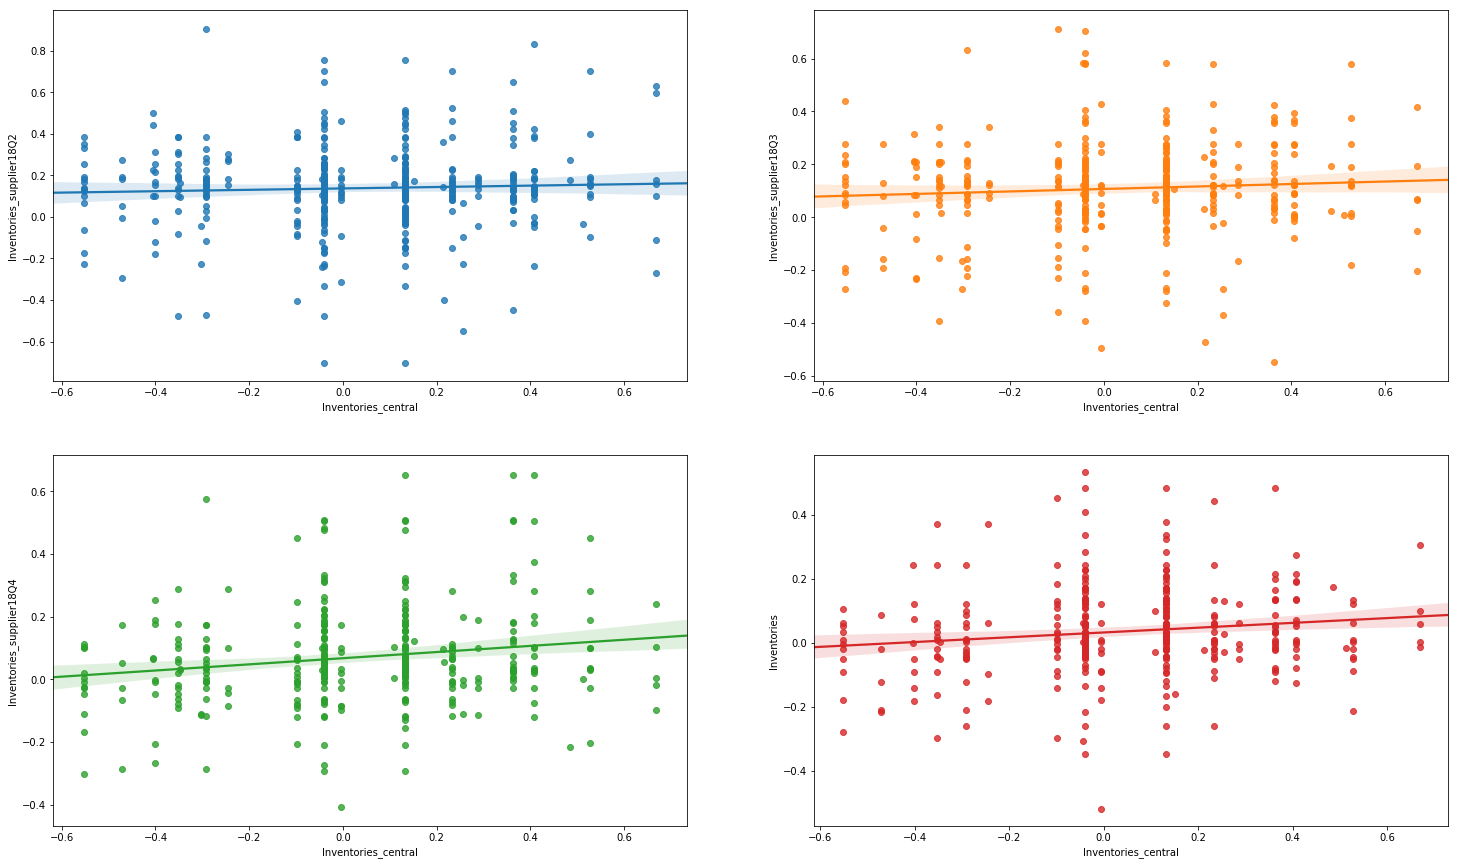

In [970]:
list_type = ['CN-CN','CN-US','US-US','US-CN']
fin_relationship_18Q2a=fin_relationship_18Q2[fin_relationship_18Q2['Relationship Type'].isin(list_type)]
fig, ax = plt.subplots(2,2,figsize=(25,15))
sns.regplot(x='Inventories_central', y='Inventories_supplier18Q2', data=fin_relationship_18Q2a,ax=ax[0,0])
#sns.lineplot(x=[1,-1],y=[1,-1],ax=ax[0,0],c='g')
#ax[0,0].set_xlim(-1,1)
#ax[0,0].set_ylim(-1,1)
sns.regplot(x='Inventories_central', y='Inventories_supplier18Q3', data=fin_relationship_18Q2a,ax=ax[0,1])
#sns.lineplot(x=[1,-1],y=[1,-1],ax=ax[0,1],c='g')
#ax[0,1].set_xlim(-1,1)
#ax[0,1].set_ylim(-1,1)
sns.regplot(x='Inventories_central', y='Inventories_supplier18Q4', data=fin_relationship_18Q2a,ax=ax[1,0])
#sns.lineplot(x=[1,-1],y=[1,-1],ax=ax[1,0],c='g')
#ax[1,0].set_xlim(-1,1)
#ax[1,0].set_ylim(-1,1)
sns.regplot(x='Inventories_central', y='Inventories', data=fin_relationship_18Q2a,ax=ax[1,1])
#sns.lineplot(x=[1,-1],y=[1,-1],ax=ax[1,1],c='g')
#ax[1,1].set_xlim(-1,1)
#ax[1,1].set_ylim(-1,1)

## DSC

In [74]:
all_tier = pd.concat([First_Tier_Supp,Second_Tier_Supp])
all_tier = all_tier[all_tier['As Of Date Bloomberg'].isin([20171231,20180331,20180630,20180930,20181231,20190331])]

In [75]:
#Firm DSC Count
all_date = set(all_tier['As Of Date Bloomberg'])
all_manu = set(all_tier['Central Ticker'])
all_supp = set(all_tier['Supplier Ticker'])
df_date_mat_c = pd.pivot_table(all_tier,index=['As Of Date Bloomberg','Supplier Ticker'],columns=['Central Ticker'],
                      values=['Supplier Company'],aggfunc={'Supplier Company':lambda x :len(x.unique())})
df_date_mat_c.columns = df_date_mat_c.columns.droplevel(0)
df_date_mat_c = df_date_mat_c.reset_index()

In [76]:
df_date_mat_c

Central Ticker  As Of Date Bloomberg       Supplier Ticker  000120 KS Equity  \
0                           20171231      000021 CH Equity               NaN   
1                           20171231      000023 CH Equity               NaN   
2                           20171231      000027 CH Equity               NaN   
3                           20171231      000039 CH Equity               NaN   
4                           20171231      000049 CH Equity               NaN   
5                           20171231      000050 CH Equity               NaN   
6                           20171231      000063 CH Equity               NaN   
7                           20171231      000065 CH Equity               NaN   
8                           20171231      000066 CH Equity               NaN   
9                           20171231      000069 CH Equity               NaN   
10                          20171231      000070 CH Equity               NaN   
11                          20171231      000100 CH Equity               NaN   
12                          20171231      000120 KS Equity               NaN   
13                          20171231      000150 KS Equity               NaN   
14                          20171231      000156 CH Equity               NaN   
15                          20171231      000158 CH Equity               NaN   
16                          20171231      000210 KS Equity               NaN   
17                          20171231      000240 KS Equity               NaN   
18                          20171231      000270 KS Equity               NaN   
19                          20171231      000320 KS Equity               NaN   
20                          20171231      000333 CH Equity               NaN   
21                          20171231      000390 KS Equity               NaN   
22                          20171231      000421 CH Equity               NaN   
23                          20171231      000425 CH Equity               NaN   
24                          20171231      000490 KS Equity               NaN   
25                          20171231      000500 KS Equity               NaN   
26                          20171231      000519 CH Equity               NaN   
27                          20171231      000520 CH Equity               NaN   
28                          20171231      000524 CH Equity               NaN   
29                          20171231      000528 CH Equity               NaN   
...                              ...                   ...               ...   
24361                       20190331   Xiamen Mo... Equity               NaN   
24362                       20190331   Xiamen Xi... Equity               NaN   
24363                       20190331   Xian Cumm... Equity               NaN   
24364                       20190331   Xiangfan ... Equity               NaN   
24365                       20190331   Xinjiang ... Equity               NaN   
24366                       20190331      YENCCZ KS Equity               NaN   
24367                       20190331          YI IN Equity               NaN   
24368                       20190331         YOC GR Equity               NaN   
24369                       20190331         YOU LN Equity               NaN   
24370                       20190331     YZAIJBZ CH Equity               NaN   
24371                       20190331      YZAKBZ CH Equity               NaN   
24372                       20190331   Yunnan Fe... Equity               NaN   
24373                       20190331   Yunnan Wa... Equity               NaN   
24374                       20190331        ZAAP US Equity               NaN   
24375                       20190331        ZAGG US Equity               NaN   
24376                       20190331      ZBBVPZ CH Equity               NaN   
24377                       20190331        ZBRA US Equity               NaN   
24378                       20190331      ZCJINZ CH Equity               NaN   


In [129]:
df_20171231 = pd.DataFrame(index=all_supp,columns=all_manu)
df_20171231['Supplier Ticker']=all_supp
df_20171231a = pd.melt(df_20171231,id_vars="Supplier Ticker",var_name="Manufacturer", value_name="number")
df_20171231_c = pd.melt(df_date_mat_c[df_date_mat_c['As Of Date Bloomberg']==20171231].drop(['As Of Date Bloomberg'], axis=1),id_vars="Supplier Ticker",var_name="Manufacturer", value_name="number_of_supp")
dsc_20171231 = pd.merge(df_20171231a,df_20171231_c,how='left',left_on = ['Supplier Ticker','Manufacturer'],right_on=['Supplier Ticker','Manufacturer'])
dsc_20171231 = pd.pivot_table(dsc_20171231,index=["Supplier Ticker"],columns=['Manufacturer']
                      ,values=['number_of_supp'],aggfunc={'number_of_supp':np.sum})
dsc_20171231

number_of_supp                                    \
Manufacturer         000120 KS Equity 000559 CH Equity 000572 CH Equity   
Supplier Ticker                                                           
000021 CH Equity                  0.0              0.0              0.0   
000023 CH Equity                  0.0              0.0              0.0   
000027 CH Equity                  0.0              0.0              0.0   
000039 CH Equity                  0.0              0.0              0.0   
000049 CH Equity                  0.0              0.0              0.0   
000050 CH Equity                  0.0              0.0              0.0   
000063 CH Equity                  0.0              0.0              0.0   
000065 CH Equity                  0.0              0.0              0.0   
000066 CH Equity                  0.0              0.0              0.0   
000069 CH Equity                  0.0              0.0              0.0   
000070 CH Equity                  0.0              0.0              0.0   
000100 CH Equity                  0.0              0.0              0.0   
000120 KS Equity                  0.0              0.0              0.0   
000150 KS Equity                  0.0              0.0              0.0   
000156 CH Equity                  0.0              0.0              0.0   
000158 CH Equity                  0.0              0.0              0.0   
000210 KS Equity                  0.0              0.0              0.0   
000230 KS Equity                  0.0              0.0              0.0   
000240 KS Equity                  0.0              0.0              0.0   
000270 KS Equity                  0.0              0.0              0.0   
000320 KS Equity                  0.0              0.0              0.0   
000333 CH Equity                  0.0              0.0              0.0   
000390 KS Equity                  0.0              0.0              0.0   
000401 CH Equity                  0.0              0.0              0.0   
000421 CH Equity                  0.0              0.0              0.0   
000425 CH Equity                  0.0              0.0              0.0   
000480 KS Equity                  0.0              0.0              0.0   
000490 KS Equity                  0.0              0.0              0.0   
000500 KS Equity                  0.0              0.0              0.0   
000519 CH Equity                  0.0              0.0              0.0   
...                               ...              ...              ...   
YZAKBZ CH Equity                  0.0              0.0              0.0   
Yanfeng W... Equity               0.0              0.0              0.0   
Yinchuan ... Equity               0.0              0.0              0.0   
Yituo Luo... Equity               0.0              0.0              0.0   
Yunnan Fe... Equity               0.0              0.0              0.0   
Yunnan Wa... Equity               0.0              0.0              0.0   
ZAAP US Equity                    0.0              0.0              0.0   
ZAGG US Equity                    0.0              0.0              0.0   
ZAYO US Equity                    0.0              0.0              0.0   
ZBBVPZ CH Equity                  0.0              0.0              0.0   
ZBRA US Equity                    0.0              0.0              0.0   
ZCJINZ CH Equity                  0.0              0.0              0.0   
ZEK US Equity                     0.0              0.0              0.0   
ZIL2 GR Equity                    0.0              0.0              0.0   
ZIXI US Equity                    0.0              0.0              0.0   
ZNGA US Equity                    0.0              0.0              0.0   
ZPVT UZ Equity                    0.0              0.0              0.0   
ZXAIY US Equity                   0.0              0.0              0.0   
Zer Merke... Equity               0.0              0.0              0.0   
Zhangjiag... Equity               0.0           

In [94]:
df_20180331 = pd.DataFrame(index=all_supp,columns=all_manu)
df_20180331['Supplier Ticker']=all_supp
df_20180331a = pd.melt(df_20180331,id_vars="Supplier Ticker",var_name="Manufacturer", value_name="number")
df_20180331_c = pd.melt(df_date_mat_c[df_date_mat_c['As Of Date Bloomberg']==20180331].drop(['As Of Date Bloomberg'], axis=1),id_vars="Supplier Ticker",var_name="Manufacturer", value_name="number_of_supp")
dsc_20180331 = pd.merge(df_20180331a,df_20180331_c,how='left',left_on = ['Supplier Ticker','Manufacturer'],right_on=['Supplier Ticker','Manufacturer'])
dsc_20180331 = pd.pivot_table(dsc_20180331,index=["Supplier Ticker"],columns=['Manufacturer']
                      ,values=['number_of_supp'],aggfunc={'number_of_supp':np.sum})
dsc_20180331

number_of_supp                                    \
Manufacturer         000120 KS Equity 000559 CH Equity 000572 CH Equity   
Supplier Ticker                                                           
000021 CH Equity                  0.0              0.0              0.0   
000023 CH Equity                  0.0              0.0              0.0   
000027 CH Equity                  0.0              0.0              0.0   
000039 CH Equity                  0.0              0.0              0.0   
000049 CH Equity                  0.0              0.0              0.0   
000050 CH Equity                  0.0              0.0              0.0   
000063 CH Equity                  0.0              0.0              0.0   
000065 CH Equity                  0.0              0.0              0.0   
000066 CH Equity                  0.0              0.0              0.0   
000069 CH Equity                  0.0              0.0              0.0   
000070 CH Equity                  0.0              0.0              0.0   
000100 CH Equity                  0.0              0.0              0.0   
000120 KS Equity                  0.0              0.0              0.0   
000150 KS Equity                  0.0              0.0              0.0   
000156 CH Equity                  0.0              0.0              0.0   
000158 CH Equity                  0.0              0.0              0.0   
000210 KS Equity                  0.0              0.0              0.0   
000230 KS Equity                  0.0              0.0              0.0   
000240 KS Equity                  0.0              0.0              0.0   
000270 KS Equity                  0.0              0.0              0.0   
000320 KS Equity                  0.0              0.0              0.0   
000333 CH Equity                  0.0              0.0              0.0   
000390 KS Equity                  0.0              0.0              0.0   
000401 CH Equity                  0.0              0.0              0.0   
000421 CH Equity                  0.0              0.0              0.0   
000425 CH Equity                  0.0              0.0              0.0   
000480 KS Equity                  0.0              0.0              0.0   
000490 KS Equity                  0.0              0.0              0.0   
000500 KS Equity                  0.0              0.0              0.0   
000519 CH Equity                  0.0              0.0              0.0   
...                               ...              ...              ...   
YZAKBZ CH Equity                  0.0              0.0              0.0   
Yanfeng W... Equity               0.0              0.0              0.0   
Yinchuan ... Equity               0.0              0.0              0.0   
Yituo Luo... Equity               0.0              0.0              0.0   
Yunnan Fe... Equity               0.0              0.0              0.0   
Yunnan Wa... Equity               0.0              0.0              0.0   
ZAAP US Equity                    0.0              0.0              0.0   
ZAGG US Equity                    0.0              0.0              0.0   
ZAYO US Equity                    0.0              0.0              0.0   
ZBBVPZ CH Equity                  0.0              0.0              0.0   
ZBRA US Equity                    0.0              0.0              0.0   
ZCJINZ CH Equity                  0.0              0.0              0.0   
ZEK US Equity                     0.0              0.0              0.0   
ZIL2 GR Equity                    0.0              0.0              0.0   
ZIXI US Equity                    0.0              0.0              0.0   
ZNGA US Equity                    0.0              0.0              0.0   
ZPVT UZ Equity                    0.0              0.0              0.0   
ZXAIY US Equity                   0.0              0.0              0.0   
Zer Merke... Equity               0.0              0.0              0.0   
Zhangjiag... Equity               0.0           

In [95]:
df_20180630 = pd.DataFrame(index=all_supp,columns=all_manu)
df_20180630['Supplier Ticker']=all_supp
df_20180630a = pd.melt(df_20180630,id_vars="Supplier Ticker",var_name="Manufacturer", value_name="number")
df_20180630_c = pd.melt(df_date_mat_c[df_date_mat_c['As Of Date Bloomberg']==20180630].drop(['As Of Date Bloomberg'], axis=1),id_vars="Supplier Ticker",var_name="Manufacturer", value_name="number_of_supp")
dsc_20180630 = pd.merge(df_20180630a,df_20180630_c,how='left',left_on = ['Supplier Ticker','Manufacturer'],right_on=['Supplier Ticker','Manufacturer'])
dsc_20180630 = pd.pivot_table(dsc_20180630,index=["Supplier Ticker"],columns=['Manufacturer']
                      ,values=['number_of_supp'],aggfunc={'number_of_supp':np.sum})
dsc_20180630

number_of_supp                                    \
Manufacturer         000120 KS Equity 000559 CH Equity 000572 CH Equity   
Supplier Ticker                                                           
000021 CH Equity                  0.0              0.0              0.0   
000023 CH Equity                  0.0              0.0              0.0   
000027 CH Equity                  0.0              0.0              0.0   
000039 CH Equity                  0.0              0.0              0.0   
000049 CH Equity                  0.0              0.0              0.0   
000050 CH Equity                  0.0              0.0              0.0   
000063 CH Equity                  0.0              0.0              0.0   
000065 CH Equity                  0.0              0.0              0.0   
000066 CH Equity                  0.0              0.0              0.0   
000069 CH Equity                  0.0              0.0              0.0   
000070 CH Equity                  0.0              0.0              0.0   
000100 CH Equity                  0.0              0.0              0.0   
000120 KS Equity                  0.0              0.0              0.0   
000150 KS Equity                  0.0              0.0              0.0   
000156 CH Equity                  0.0              0.0              0.0   
000158 CH Equity                  0.0              0.0              0.0   
000210 KS Equity                  0.0              0.0              0.0   
000230 KS Equity                  0.0              0.0              0.0   
000240 KS Equity                  0.0              0.0              0.0   
000270 KS Equity                  0.0              0.0              0.0   
000320 KS Equity                  0.0              0.0              0.0   
000333 CH Equity                  0.0              0.0              0.0   
000390 KS Equity                  0.0              0.0              0.0   
000401 CH Equity                  0.0              0.0              0.0   
000421 CH Equity                  0.0              0.0              0.0   
000425 CH Equity                  0.0              0.0              0.0   
000480 KS Equity                  0.0              0.0              0.0   
000490 KS Equity                  0.0              0.0              0.0   
000500 KS Equity                  0.0              0.0              0.0   
000519 CH Equity                  0.0              0.0              0.0   
...                               ...              ...              ...   
YZAKBZ CH Equity                  0.0              0.0              0.0   
Yanfeng W... Equity               0.0              0.0              0.0   
Yinchuan ... Equity               0.0              0.0              0.0   
Yituo Luo... Equity               0.0              0.0              0.0   
Yunnan Fe... Equity               0.0              0.0              0.0   
Yunnan Wa... Equity               0.0              0.0              0.0   
ZAAP US Equity                    0.0              0.0              0.0   
ZAGG US Equity                    0.0              0.0              0.0   
ZAYO US Equity                    0.0              0.0              0.0   
ZBBVPZ CH Equity                  0.0              0.0              0.0   
ZBRA US Equity                    0.0              0.0              0.0   
ZCJINZ CH Equity                  0.0              0.0              0.0   
ZEK US Equity                     0.0              0.0              0.0   
ZIL2 GR Equity                    0.0              0.0              0.0   
ZIXI US Equity                    0.0              0.0              0.0   
ZNGA US Equity                    0.0              0.0              0.0   
ZPVT UZ Equity                    0.0              0.0              0.0   
ZXAIY US Equity                   0.0              0.0              0.0   
Zer Merke... Equity               0.0              0.0              0.0   
Zhangjiag... Equity               0.0           

In [96]:
df_20180930 = pd.DataFrame(index=all_supp,columns=all_manu)
df_20180930['Supplier Ticker']=all_supp
df_20180930a = pd.melt(df_20180930,id_vars="Supplier Ticker",var_name="Manufacturer", value_name="number")
df_20180930_c = pd.melt(df_date_mat_c[df_date_mat_c['As Of Date Bloomberg']==20180930].drop(['As Of Date Bloomberg'], axis=1),id_vars="Supplier Ticker",var_name="Manufacturer", value_name="number_of_supp")
dsc_20180930 = pd.merge(df_20180930a,df_20180930_c,how='left',left_on = ['Supplier Ticker','Manufacturer'],right_on=['Supplier Ticker','Manufacturer'])
dsc_20180930 = pd.pivot_table(dsc_20180930,index=["Supplier Ticker"],columns=['Manufacturer']
                      ,values=['number_of_supp'],aggfunc={'number_of_supp':np.sum})
dsc_20180930

number_of_supp                                    \
Manufacturer         000120 KS Equity 000559 CH Equity 000572 CH Equity   
Supplier Ticker                                                           
000021 CH Equity                  0.0              0.0              0.0   
000023 CH Equity                  0.0              0.0              0.0   
000027 CH Equity                  0.0              0.0              0.0   
000039 CH Equity                  0.0              0.0              0.0   
000049 CH Equity                  0.0              0.0              0.0   
000050 CH Equity                  0.0              0.0              0.0   
000063 CH Equity                  0.0              0.0              0.0   
000065 CH Equity                  0.0              0.0              0.0   
000066 CH Equity                  0.0              0.0              0.0   
000069 CH Equity                  0.0              0.0              0.0   
000070 CH Equity                  0.0              0.0              0.0   
000100 CH Equity                  0.0              0.0              0.0   
000120 KS Equity                  0.0              0.0              0.0   
000150 KS Equity                  0.0              0.0              0.0   
000156 CH Equity                  0.0              0.0              0.0   
000158 CH Equity                  0.0              0.0              0.0   
000210 KS Equity                  0.0              0.0              0.0   
000230 KS Equity                  0.0              0.0              0.0   
000240 KS Equity                  0.0              0.0              0.0   
000270 KS Equity                  0.0              0.0              0.0   
000320 KS Equity                  0.0              0.0              0.0   
000333 CH Equity                  0.0              0.0              0.0   
000390 KS Equity                  0.0              0.0              0.0   
000401 CH Equity                  0.0              0.0              0.0   
000421 CH Equity                  0.0              0.0              0.0   
000425 CH Equity                  0.0              0.0              0.0   
000480 KS Equity                  0.0              0.0              0.0   
000490 KS Equity                  0.0              0.0              0.0   
000500 KS Equity                  0.0              0.0              0.0   
000519 CH Equity                  0.0              0.0              0.0   
...                               ...              ...              ...   
YZAKBZ CH Equity                  0.0              0.0              0.0   
Yanfeng W... Equity               0.0              0.0              0.0   
Yinchuan ... Equity               0.0              0.0              0.0   
Yituo Luo... Equity               0.0              0.0              0.0   
Yunnan Fe... Equity               0.0              0.0              0.0   
Yunnan Wa... Equity               0.0              0.0              0.0   
ZAAP US Equity                    0.0              0.0              0.0   
ZAGG US Equity                    0.0              0.0              0.0   
ZAYO US Equity                    0.0              0.0              0.0   
ZBBVPZ CH Equity                  0.0              0.0              0.0   
ZBRA US Equity                    0.0              0.0              0.0   
ZCJINZ CH Equity                  0.0              0.0              0.0   
ZEK US Equity                     0.0              0.0              0.0   
ZIL2 GR Equity                    0.0              0.0              0.0   
ZIXI US Equity                    0.0              0.0              0.0   
ZNGA US Equity                    0.0              0.0              0.0   
ZPVT UZ Equity                    0.0              0.0              0.0   
ZXAIY US Equity                   0.0              0.0              0.0   
Zer Merke... Equity               0.0              0.0              0.0   
Zhangjiag... Equity               0.0           

In [97]:
df_20181231 = pd.DataFrame(index=all_supp,columns=all_manu)
df_20181231['Supplier Ticker']=all_supp
df_20181231a = pd.melt(df_20181231,id_vars="Supplier Ticker",var_name="Manufacturer", value_name="number")
df_20181231_c = pd.melt(df_date_mat_c[df_date_mat_c['As Of Date Bloomberg']==20181231].drop(['As Of Date Bloomberg'], axis=1),id_vars="Supplier Ticker",var_name="Manufacturer", value_name="number_of_supp")
dsc_20181231 = pd.merge(df_20181231a,df_20181231_c,how='left',left_on = ['Supplier Ticker','Manufacturer'],right_on=['Supplier Ticker','Manufacturer'])
dsc_20181231 = pd.pivot_table(dsc_20181231,index=["Supplier Ticker"],columns=['Manufacturer']
                      ,values=['number_of_supp'],aggfunc={'number_of_supp':np.sum})
dsc_20181231

number_of_supp                                    \
Manufacturer         000120 KS Equity 000559 CH Equity 000572 CH Equity   
Supplier Ticker                                                           
000021 CH Equity                  0.0              0.0              0.0   
000023 CH Equity                  0.0              0.0              0.0   
000027 CH Equity                  0.0              0.0              0.0   
000039 CH Equity                  0.0              0.0              0.0   
000049 CH Equity                  0.0              0.0              0.0   
000050 CH Equity                  0.0              0.0              0.0   
000063 CH Equity                  0.0              0.0              0.0   
000065 CH Equity                  0.0              0.0              0.0   
000066 CH Equity                  0.0              0.0              0.0   
000069 CH Equity                  0.0              0.0              0.0   
000070 CH Equity                  0.0              0.0              0.0   
000100 CH Equity                  0.0              0.0              0.0   
000120 KS Equity                  0.0              0.0              0.0   
000150 KS Equity                  0.0              0.0              0.0   
000156 CH Equity                  0.0              0.0              0.0   
000158 CH Equity                  0.0              0.0              0.0   
000210 KS Equity                  0.0              0.0              0.0   
000230 KS Equity                  0.0              0.0              0.0   
000240 KS Equity                  0.0              0.0              0.0   
000270 KS Equity                  0.0              0.0              0.0   
000320 KS Equity                  0.0              0.0              0.0   
000333 CH Equity                  0.0              0.0              0.0   
000390 KS Equity                  0.0              0.0              0.0   
000401 CH Equity                  0.0              0.0              0.0   
000421 CH Equity                  0.0              0.0              0.0   
000425 CH Equity                  0.0              0.0              0.0   
000480 KS Equity                  0.0              0.0              0.0   
000490 KS Equity                  0.0              0.0              0.0   
000500 KS Equity                  0.0              0.0              0.0   
000519 CH Equity                  0.0              0.0              0.0   
...                               ...              ...              ...   
YZAKBZ CH Equity                  0.0              0.0              0.0   
Yanfeng W... Equity               0.0              0.0              0.0   
Yinchuan ... Equity               0.0              0.0              0.0   
Yituo Luo... Equity               0.0              0.0              0.0   
Yunnan Fe... Equity               0.0              0.0              0.0   
Yunnan Wa... Equity               0.0              0.0              0.0   
ZAAP US Equity                    0.0              0.0              0.0   
ZAGG US Equity                    0.0              0.0              0.0   
ZAYO US Equity                    0.0              0.0              0.0   
ZBBVPZ CH Equity                  0.0              0.0              0.0   
ZBRA US Equity                    0.0              0.0              0.0   
ZCJINZ CH Equity                  0.0              0.0              0.0   
ZEK US Equity                     0.0              0.0              0.0   
ZIL2 GR Equity                    0.0              0.0              0.0   
ZIXI US Equity                    0.0              0.0              0.0   
ZNGA US Equity                    0.0              0.0              0.0   
ZPVT UZ Equity                    0.0              0.0              0.0   
ZXAIY US Equity                   0.0              0.0              0.0   
Zer Merke... Equity               0.0              0.0              0.0   
Zhangjiag... Equity               0.0           

In [98]:
df_20190331 = pd.DataFrame(index=all_supp,columns=all_manu)
df_20190331['Supplier Ticker']=all_supp
df_20190331a = pd.melt(df_20190331,id_vars="Supplier Ticker",var_name="Manufacturer", value_name="number")
df_20190331_c = pd.melt(df_date_mat_c[df_date_mat_c['As Of Date Bloomberg']==20190331].drop(['As Of Date Bloomberg'], axis=1),id_vars="Supplier Ticker",var_name="Manufacturer", value_name="number_of_supp")
dsc_20190331 = pd.merge(df_20190331a,df_20190331_c,how='left',left_on = ['Supplier Ticker','Manufacturer'],right_on=['Supplier Ticker','Manufacturer'])
dsc_20190331 = pd.pivot_table(dsc_20190331,index=["Supplier Ticker"],columns=['Manufacturer']
                      ,values=['number_of_supp'],aggfunc={'number_of_supp':np.sum})
dsc_20190331

number_of_supp                                    \
Manufacturer         000120 KS Equity 000559 CH Equity 000572 CH Equity   
Supplier Ticker                                                           
000021 CH Equity                  0.0              0.0              0.0   
000023 CH Equity                  0.0              0.0              0.0   
000027 CH Equity                  0.0              0.0              0.0   
000039 CH Equity                  0.0              0.0              0.0   
000049 CH Equity                  0.0              0.0              0.0   
000050 CH Equity                  0.0              0.0              0.0   
000063 CH Equity                  0.0              0.0              0.0   
000065 CH Equity                  0.0              0.0              0.0   
000066 CH Equity                  0.0              0.0              0.0   
000069 CH Equity                  0.0              0.0              0.0   
000070 CH Equity                  0.0              0.0              0.0   
000100 CH Equity                  0.0              0.0              0.0   
000120 KS Equity                  0.0              0.0              0.0   
000150 KS Equity                  0.0              0.0              0.0   
000156 CH Equity                  0.0              0.0              0.0   
000158 CH Equity                  0.0              0.0              0.0   
000210 KS Equity                  0.0              0.0              0.0   
000230 KS Equity                  0.0              0.0              0.0   
000240 KS Equity                  0.0              0.0              0.0   
000270 KS Equity                  0.0              0.0              0.0   
000320 KS Equity                  0.0              0.0              0.0   
000333 CH Equity                  0.0              0.0              0.0   
000390 KS Equity                  0.0              0.0              0.0   
000401 CH Equity                  0.0              0.0              0.0   
000421 CH Equity                  0.0              0.0              0.0   
000425 CH Equity                  0.0              0.0              0.0   
000480 KS Equity                  0.0              0.0              0.0   
000490 KS Equity                  0.0              0.0              0.0   
000500 KS Equity                  0.0              0.0              0.0   
000519 CH Equity                  0.0              0.0              0.0   
...                               ...              ...              ...   
YZAKBZ CH Equity                  0.0              0.0              0.0   
Yanfeng W... Equity               0.0              0.0              0.0   
Yinchuan ... Equity               0.0              0.0              0.0   
Yituo Luo... Equity               0.0              0.0              0.0   
Yunnan Fe... Equity               0.0              0.0              0.0   
Yunnan Wa... Equity               0.0              0.0              0.0   
ZAAP US Equity                    0.0              0.0              0.0   
ZAGG US Equity                    0.0              0.0              0.0   
ZAYO US Equity                    0.0              0.0              0.0   
ZBBVPZ CH Equity                  0.0              0.0              0.0   
ZBRA US Equity                    0.0              0.0              0.0   
ZCJINZ CH Equity                  0.0              0.0              0.0   
ZEK US Equity                     0.0              0.0              0.0   
ZIL2 GR Equity                    0.0              0.0              0.0   
ZIXI US Equity                    0.0              0.0              0.0   
ZNGA US Equity                    0.0              0.0              0.0   
ZPVT UZ Equity                    0.0              0.0              0.0   
ZXAIY US Equity                   0.0              0.0              0.0   
Zer Merke... Equity               0.0              0.0              0.0   
Zhangjiag... Equity               0.0           

In [ ]:
dsc_20171231.columns = dsc_20171231.columns.droplevel(0)
dsc_20180331.columns = dsc_20180331.columns.droplevel(0)
dsc_20180630.columns = dsc_20180630.columns.droplevel(0)
dsc_20180930.columns = dsc_20180930.columns.droplevel(0)
dsc_20181231.columns = dsc_20181231.columns.droplevel(0)
dsc_20190331.columns = dsc_20190331.columns.droplevel(0)

In [143]:
dsc_20171231['TSLA US Equity'].sum(axis=0)

65.0

In [144]:
for i in all_manu:
    if dsc_20171231[i].sum(axis=0) == 0:
        dsc_20171231[i] = 0
    else: 
        dsc_20171231[i] = dsc_20171231[i]/dsc_20171231[i].sum(axis=0)
    if dsc_20180331[i].sum(axis=0) == 0:
        dsc_20180331[i] = 0
    else: 
        dsc_20180331[i] = dsc_20180331[i]/dsc_20180331[i].sum(axis=0)
    if dsc_20180630[i].sum(axis=0) == 0:
        dsc_20180630[i] = 0
    else: 
        dsc_20180630[i] = dsc_20180630[i]/dsc_20180630[i].sum(axis=0)
    if dsc_20180930[i].sum(axis=0) == 0:
        dsc_20180930[i] = 0
    else: 
        dsc_20180930[i] = dsc_20180930[i]/dsc_20180930[i].sum(axis=0)
    if dsc_20181231[i].sum(axis=0) == 0:
        dsc_20181231[i] = 0
    else: 
        dsc_20181231[i] = dsc_20181231[i]/dsc_20181231[i].sum(axis=0)
    if dsc_20190331[i].sum(axis=0) == 0:
        dsc_20190331[i] = 0
    else: 
        dsc_20190331[i] = dsc_20190331[i]/dsc_20190331[i].sum(axis=0)

In [151]:
df_DSC_20180331 = pd.DataFrame(np.sum(np.abs(dsc_20180331-dsc_20171231))/(np.sum(dsc_20180331)+np.sum(dsc_20171231)),columns=["20180331"])
df_DSC_20180630 = pd.DataFrame(np.sum(np.abs(dsc_20180630-dsc_20180331))/(np.sum(dsc_20180630)+np.sum(dsc_20180331)),columns=["20180630"])
df_DSC_20180930 = pd.DataFrame(np.sum(np.abs(dsc_20180930-dsc_20180630))/(np.sum(dsc_20180930)+np.sum(dsc_20180630)),columns=["20180930"])
df_DSC_20181231 = pd.DataFrame(np.sum(np.abs(dsc_20181231-dsc_20180930))/(np.sum(dsc_20181231)+np.sum(dsc_20180930)),columns=["20181231"])
df_DSC_20190331 = pd.DataFrame(np.sum(np.abs(dsc_20190331-dsc_20181231))/(np.sum(dsc_20190331)+np.sum(dsc_20181231)),columns=["20190331"])


df_DSC = pd.merge(pd.merge(df_DSC_20180331,df_DSC_20180630,left_index=True, right_index=True),df_DSC_20180930,left_index=True, right_index=True)
df_DSC = pd.merge(df_DSC,df_DSC_20181231,left_index=True, right_index=True)
df_DSC = pd.merge(df_DSC,df_DSC_20190331,left_index=True, right_index=True)
df_DSC


20180331  20180630  20180930  20181231  20190331
Manufacturer                                                         
000120 KS Equity     0.062500  0.111111  0.000000  0.357143  0.000000
000559 CH Equity     0.941176  1.000000  0.090909  0.000000  0.230769
000572 CH Equity     0.000000  0.250000  0.820513  0.820513  0.300000
000599 CH Equity     0.166667  0.000000  0.000000  0.000000  0.000000
000622 CH Equity     0.500000  0.666667  0.000000  0.000000  0.000000
000629 CH Equity     0.000000  0.142857  0.000000  0.000000  0.000000
000678 CH Equity     0.000000  0.500000  0.000000  0.000000  0.000000
000710 CH Equity     1.000000  1.000000  0.500000  0.000000  0.000000
000800 CH Equity     0.044944  0.247191  0.500000  0.515152  0.727273
000821 CH Equity     0.000000  0.666667  0.000000  0.000000  0.000000
000868 CH Equity     0.285714  0.333333  0.000000  0.200000  0.000000
000880 KS Equity     0.000000  0.088235  0.108108  0.027027  0.027027
000901 CH Equity     0.000000  0.562500  0.000000  0.125000  0.000000
000903 CH Equity     0.142857  0.375000  0.000000  0.000000  0.000000
000913 CH Equity     0.166667  0.250000  0.000000  0.000000  0.000000
000927 CH Equity     0.093750  0.096774  0.071429  0.076923  0.071429
000959 CH Equity     0.100000  0.222222  0.000000  0.222222  0.000000
000980 CH Equity     0.000000  0.500000  0.111111  0.000000  0.100000
001420 KS Equity     0.000000  0.000000  0.000000  0.000000  0.000000
002009 CH Equity     0.000000  0.333333  0.333333  0.000000  0.000000
002013 CH Equity     0.000000  0.000000  0.250000  0.125000  0.000000
002048 CH Equity     0.000000  0.388889  1.000000  1.000000  0.000000
002079 CH Equity     0.200000  0.000000  0.000000  0.200000  0.000000
002080 CH Equity     0.333333  0.222222  0.111111  0.111111  0.125000
002108 CH Equity     0.000000  0.000000  0.000000  0.000000  0.000000
002143 CH Equity     0.000000  0.500000  0.000000  0.000000  0.000000
002151 CH Equity     0.000000  0.500000  0.000000  0.000000  0.000000
002232 CH Equity     0.200000  0.133333  0.133333  0.000000  0.200000
002265 CH Equity     0.100000  0.333333  0.000000  0.000000  0.166667
002306 CH Equity     0.250000  0.666667  0.000000  0.000000  0.000000
...                       ...       ...       ...       ...       ...
UNW PW Equity        0.000000  0.000000  0.000000  0.000000  0.000000
UPS US Equity        0.027397  0.125000  0.071429  0.042857  0.014706
USAP US Equity            NaN       NaN       NaN       NaN  1.000000
UTX US Equity        0.021164  0.026455  0.042553  0.207650  0.051948
VC US Equity         0.068182  0.071429  0.025000  0.025000  0.024390
VFC US Equity        0.235294  0.058824  0.000000  0.055556  0.055556
VHI US Equity        0.000000  0.000000  0.000000  0.333333  0.000000
VK FP Equity         0.500000  0.200000  0.000000  0.000000  0.000000
VMW US Equity        0.250000  0.133333  0.000000  0.071429  0.000000
VNE US Equity             NaN       NaN       NaN       NaN  1.000000
VOE AV Equity        0.000000  0.300000  0.142857  0.000000  0.000000
VOW GR Equity        0.047210  0.073276  0.072340  0.033613  0.033473
VRSN US Equity       0.000000  0.500000  0.000000  0.000000  0.000000
VSVS LN Equity       0.250000  0.000000  0.000000  0.000000  0.000000
WAIR US Equity       0.066667  0.408163  0.020000  0.242424  0.060606
WBC US Equity        0.166667  0.000000  0.000000  0.000000  0.333333
WGO US Equity        0.000000  0.333333  0.333333  0.000000  0.000000
WOR US Equity        0.055556  0.000000  0.055556  0.111111  0.000000
WXAKOZ CH Equity     0.000000  0.000000  0.000000  0.000000  0.000000
X US Equity          0.034483  0.137931  0.034483  0.172414  0.000000
XLNX US Equity       0.047619  0.047619  0.000000  0.190476  0.055556
XPER US Equity       0.875000  0.000000  0.000000  0.000000  0.000000
XPO US Equity        0.400000  0.400000  0.000000  0.000000  0.200000
XVWJIZ CH Equity     0.000000  1.000000       NaN       NaN       NaN
Xiamen Xi... Equity       NaN  

In [152]:
df_DSC.reset_index(inplace = True)
df_DSC

Manufacturer  20180331  20180630  20180930  20181231  20190331
0       000120 KS Equity  0.062500  0.111111  0.000000  0.357143  0.000000
1       000559 CH Equity  0.941176  1.000000  0.090909  0.000000  0.230769
2       000572 CH Equity  0.000000  0.250000  0.820513  0.820513  0.300000
3       000599 CH Equity  0.166667  0.000000  0.000000  0.000000  0.000000
4       000622 CH Equity  0.500000  0.666667  0.000000  0.000000  0.000000
5       000629 CH Equity  0.000000  0.142857  0.000000  0.000000  0.000000
6       000678 CH Equity  0.000000  0.500000  0.000000  0.000000  0.000000
7       000710 CH Equity  1.000000  1.000000  0.500000  0.000000  0.000000
8       000800 CH Equity  0.044944  0.247191  0.500000  0.515152  0.727273
9       000821 CH Equity  0.000000  0.666667  0.000000  0.000000  0.000000
10      000868 CH Equity  0.285714  0.333333  0.000000  0.200000  0.000000
11      000880 KS Equity  0.000000  0.088235  0.108108  0.027027  0.027027
12      000901 CH Equity  0.000000  0.562500  0.000000  0.125000  0.000000
13      000903 CH Equity  0.142857  0.375000  0.000000  0.000000  0.000000
14      000913 CH Equity  0.166667  0.250000  0.000000  0.000000  0.000000
15      000927 CH Equity  0.093750  0.096774  0.071429  0.076923  0.071429
16      000959 CH Equity  0.100000  0.222222  0.000000  0.222222  0.000000
17      000980 CH Equity  0.000000  0.500000  0.111111  0.000000  0.100000
18      001420 KS Equity  0.000000  0.000000  0.000000  0.000000  0.000000
19      002009 CH Equity  0.000000  0.333333  0.333333  0.000000  0.000000
20      002013 CH Equity  0.000000  0.000000  0.250000  0.125000  0.000000
21      002048 CH Equity  0.000000  0.388889  1.000000  1.000000  0.000000
22      002079 CH Equity  0.200000  0.000000  0.000000  0.200000  0.000000
23      002080 CH Equity  0.333333  0.222222  0.111111  0.111111  0.125000
24      002108 CH Equity  0.000000  0.000000  0.000000  0.000000  0.000000
25      002143 CH Equity  0.000000  0.500000  0.000000  0.000000  0.000000
26      002151 CH Equity  0.000000  0.500000  0.000000  0.000000  0.000000
27      002232 CH Equity  0.200000  0.133333  0.133333  0.000000  0.200000
28      002265 CH Equity  0.100000  0.333333  0.000000  0.000000  0.166667
29      002306 CH Equity  0.250000  0.666667  0.000000  0.000000  0.000000
..                   ...       ...       ...       ...       ...       ...
666        UNW PW Equity  0.000000  0.000000  0.000000  0.000000  0.000000
667        UPS US Equity  0.027397  0.125000  0.071429  0.042857  0.014706
668       USAP US Equity       NaN       NaN       NaN       NaN  1.000000
669        UTX US Equity  0.021164  0.026455  0.042553  0.207650  0.051948
670         VC US Equity  0.068182  0.071429  0.025000  0.025000  0.024390
671        VFC US Equity  0.235294  0.058824  0.000000  0.055556  0.055556
672        VHI US Equity  0.000000  0.000000  0.000000  0.333333  0.000000
673         VK FP Equity  0.500000  0.200000  0.000000  0.000000  0.000000
674        VMW US Equity  0.250000  0.133333  0.000000  0.071429  0.000000
675        VNE US Equity       NaN       NaN       NaN       NaN  1.000000
676        VOE AV Equity  0.000000  0.300000  0.142857  0.000000  0.000000
677        VOW GR Equity  0.047210  0.073276  0.072340  0.033613  0.033473
678       VRSN US Equity  0.000000  0.500000  0.000000  0.000000  0.000000
679       VSVS LN Equity  0.250000  0.000000  0.000000  0.000000  0.000000
680       WAIR US Equity  0.066667  0.408163  0.020000  0.242424  0.060606
681        WBC US Equity  0.166667  0.000000  0.000000  0.000000  0.333333
682        WGO US Equity  0.000000  0.333333  0.333333  0.000000  0.000000
683        WOR US Equity  0.055556  0.000000  0.055556  0.111111  0.000000
684     WXAKOZ CH Equity  0.000000  0.000000  0.000000  0.000000  0.000000
685          X US Equity  0.034483  0.137931  0.034483  0.172414  0.000000
686       XLNX US Equity  0.047619  0.047619  0.000000  0.190476  0.055556
687       XPER US Equity  0.875000  0

In [153]:
df_DSC_real = pd.melt(df_DSC, id_vars=["Manufacturer"], 
                  var_name="As Of Date Bloomberg", value_name="DSC")
df_DSC_real

Manufacturer As Of Date Bloomberg       DSC
0        000120 KS Equity             20180331  0.062500
1        000559 CH Equity             20180331  0.941176
2        000572 CH Equity             20180331  0.000000
3        000599 CH Equity             20180331  0.166667
4        000622 CH Equity             20180331  0.500000
5        000629 CH Equity             20180331  0.000000
6        000678 CH Equity             20180331  0.000000
7        000710 CH Equity             20180331  1.000000
8        000800 CH Equity             20180331  0.044944
9        000821 CH Equity             20180331  0.000000
10       000868 CH Equity             20180331  0.285714
11       000880 KS Equity             20180331  0.000000
12       000901 CH Equity             20180331  0.000000
13       000903 CH Equity             20180331  0.142857
14       000913 CH Equity             20180331  0.166667
15       000927 CH Equity             20180331  0.093750
16       000959 CH Equity             20180331  0.100000
17       000980 CH Equity             20180331  0.000000
18       001420 KS Equity             20180331  0.000000
19       002009 CH Equity             20180331  0.000000
20       002013 CH Equity             20180331  0.000000
21       002048 CH Equity             20180331  0.000000
22       002079 CH Equity             20180331  0.200000
23       002080 CH Equity             20180331  0.333333
24       002108 CH Equity             20180331  0.000000
25       002143 CH Equity             20180331  0.000000
26       002151 CH Equity             20180331  0.000000
27       002232 CH Equity             20180331  0.200000
28       002265 CH Equity             20180331  0.100000
29       002306 CH Equity             20180331  0.250000
...                   ...                  ...       ...
3450        UNW PW Equity             20190331  0.000000
3451        UPS US Equity             20190331  0.014706
3452       USAP US Equity             20190331  1.000000
3453        UTX US Equity             20190331  0.051948
3454         VC US Equity             20190331  0.024390
3455        VFC US Equity             20190331  0.055556
3456        VHI US Equity             20190331  0.000000
3457         VK FP Equity             20190331  0.000000
3458        VMW US Equity             20190331  0.000000
3459        VNE US Equity             20190331  1.000000
3460        VOE AV Equity             20190331  0.000000
3461        VOW GR Equity             20190331  0.033473
3462       VRSN US Equity             20190331  0.000000
3463       VSVS LN Equity             20190331  0.000000
3464       WAIR US Equity             20190331  0.060606
3465        WBC US Equity             20190331  0.333333
3466        WGO US Equity             20190331  0.000000
3467        WOR US Equity             20190331  0.000000
3468     WXAKOZ CH Equity             20190331  0.000000
3469          X US Equity             20190331  0.000000
3470       XLNX US Equity             20190331  0.055556
3471       XPER US Equity             20190331  0.000000
3472        XPO US Equity             20190331  0.200000
3473     XVWJIZ CH Equity             20190331       NaN
3474  Xiamen Xi... Equity             20190331  1.000000
3475       YVAZ CH Equity             20190331       NaN
3476     YZAKBZ CH Equity             20190331  0.000000
3477       ZAAP US Equity             20190331       NaN
3478       ZBRA US Equity             20190331  0.100000
3479       ZIL2 GR Equity             20190331  0.000000

[3480 rows x 3 columns]

In [154]:
df_DSC_real.to_excel('dsc.xlsx',index=False)

In [ ]:
fig = plt.figure(figsize=(20,15))

b = sns.lineplot('As Of Date Bloomberg','DSC',data= df_DSC_real,hue='index')
b.set_xlabel("Date", fontsize=40)
b.set_ylabel("DSC QoQ Change", fontsize=40)
b.tick_params(labelsize=40)
plt.legend(fontsize=40)
b.set_xticklabels(["2017Q4","2018Q1","2018Q2","2018Q3","2018Q4","2019Q1"],rotation=45)

In [ ]:
all_date_1 = [20171231,20180331,20180630,20180930,20181231,20190331]
df_DSC_cnt = pd.DataFrame(columns=['Central Ticker','End Date'])
Central_Ticker = []
Ref_Date = []
for i in all_date_1:
    period = []
    for k in df_mat_c1[i].columns:
        Central_Ticker.append(k)
        Ref_Date.append(i)
    for j in all_date_1:
        for a in np.sum(np.abs(df_mat_c1[j]-df_mat_c1[i])).values:
            period.append(a)
    df_DSC_cnt[i]=period
df_DSC_cnt['Central Ticker']=Central_Ticker
df_DSC_cnt['End Date']=Ref_Date
df_DSC_cnt.head()

## Manufactorer Impact

In [101]:
First_relationship = First_Tier_Supp[['Central Ticker','As Of Date Bloomberg','Supplier Ticker','% Revenue get from central']]
First_relationship['As Of Date Bloomberg'] = pd.to_datetime(First_relationship['As Of Date Bloomberg'],format="%Y%m%d")
First_relationship = First_relationship.fillna(0)

/Users/Saik/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [130]:
First_relation_Manu_impact = pd.merge(First_relationship,abnormal_financial_with_degree[['Tickers','date','Inventory Turnover','Revenue','Net Income/Net Profit (Losses)']],
                                      how='left',left_on=['Central Ticker','As Of Date Bloomberg'],right_on =['Tickers','date'])
First_relation_Manu_impact

Central Ticker As Of Date Bloomberg       Supplier Ticker  \
0        1188 HK Equity           2018-12-31    1471398D CH Equity   
1      000572 CH Equity           2018-12-31        1512 TT Equity   
2      000572 CH Equity           2018-12-31         ALV US Equity   
3      000572 CH Equity           2018-12-31      HAIMAZ CH Equity   
4      000572 CH Equity           2018-12-31         CPS US Equity   
5      000572 CH Equity           2018-12-31      000710 CH Equity   
6      000572 CH Equity           2018-12-31        1506 TT Equity   
7      000572 CH Equity           2018-12-31      000559 CH Equity   
8      000800 CH Equity           2018-12-31      CHFAWZ CH Equity   
9      000800 CH Equity           2018-12-31         TEN US Equity   
10     000800 CH Equity           2018-12-31      600742 CH Equity   
11     000800 CH Equity           2018-12-31      200030 CH Equity   
12     000800 CH Equity           2018-12-31       1003Z GR Equity   
13     000800 CH Equity           2018-12-31    1573026D CH Equity   
14     000800 CH Equity           2018-12-31         CON GR Equity   
15     000800 CH Equity           2018-12-31    7950518Z CH Equity   
16     000800 CH Equity           2018-12-31         CMI US Equity   
17     000800 CH Equity           2018-12-31      300392 CH Equity   
18     000800 CH Equity           2018-12-31         KU2 GR Equity   
19     000800 CH Equity           2018-12-31        6473 JP Equity   
20     000800 CH Equity           2018-12-31          MG CN Equity   
21     000800 CH Equity           2018-12-31         WBC US Equity   
22     000800 CH Equity           2018-12-31         TKA GR Equity   
23     000800 CH Equity           2018-12-31          FR FP Equity   
24     000800 CH Equity           2018-12-31      002232 CH Equity   
25     000800 CH Equity           2018-12-31        7276 JP Equity   
26     000800 CH Equity           2018-12-31        2105 TT Equity   
27     000800 CH Equity           2018-12-31    1074506D CH Equity   
28     000800 CH Equity           2018-12-31         BWA US Equity   
29     000800 CH Equity           2018-12-31        APTV US Equity   
...                 ...                  ...                   ...   
14115  600418 CH Equity           2017-12-31    0275657D CH Equity   
14116  600418 CH Equity           2017-12-31    0180742D CH Equity   
14117  600418 CH Equity           2017-12-31        YVAZ CH Equity   
14118    1122 HK Equity           2017-12-31        SKFB SS Equity   
14119  603611 CH Equity           2017-12-31   Changxing... Equity   
14120  600609 CH Equity           2017-12-31  Mianyang1 ... Equity   
14121  600609 CH Equity           2017-12-31  Mianyang2 ... Equity   
14122  600609 CH Equity           2017-12-31         TEN US Equity   
14123  600609 CH Equity           2017-12-31      ADJVBZ CH Equity   
14124  600609 CH Equity           2017-12-31  Shenyang3 ... Equity   
14125  600609 CH Equity           2017-12-31         DAN US Equity   
14126  600609 CH Equity           2017-12-31      SJHASZ CH Equity   
14127  600609 CH Equity           2017-12-31      600653 CH Equity   
14128  600609 CH Equity           2017-12-31        AGHZ CH Equity   
14129  600609 CH Equity           2017-12-31   Brillianc... Equity   
14130  600609 CH Equity           2017-12-31  Shenyang2 ... Equity   
14131  600609 CH Equity           2017-12-31  Shenyang4 ... Equity   
14132  600609 CH Equity           2017-12-31  Shenyang5 ... Equity   
14133  600609 CH Equity           2017-12-31      ABCTMZ CH Equity   
14134  600303 CH Equity           2017-12-31   Tieling H... Equity   
14135     THO US Equity           2017-12-31        LCII US Equity   
14136     THO US Equity           2017-12-31        SPAR US Equity   
14137     THO US Equity           2017-12-31         CMI US Equity   
14138     THO US Equity           2017-12-31         GWR US Equity   
14139     THO US Equity           2017-12-31        ALSN US Equity   
14140     THO US Eq

In [132]:
First_relation_Manu_impact['Inv_impact']=First_relation_Manu_impact['% Revenue get from central']*First_relation_Manu_impact['Inventory Turnover']
First_relation_Manu_impact['Rev_impact']=First_relation_Manu_impact['% Revenue get from central']*First_relation_Manu_impact['Revenue']
First_relation_Manu_impact['NI_impact']=First_relation_Manu_impact['% Revenue get from central']*First_relation_Manu_impact['Net Income/Net Profit (Losses)']

In [218]:
Supplier_ManuIm = pd.pivot_table(First_relation_Manu_impact,index=['Supplier Ticker','As Of Date Bloomberg'],
                      values=['Inv_impact','Rev_impact','NI_impact'],aggfunc=np.sum)
Supplier_ManuIm = Supplier_ManuIm.reset_index()
Supplier_ManuIm.columns=['Tickers','date','Inv_impact','NI_impact','Rev_impact']

In [221]:
outliers

(array([  25,   26,   27,   27,   87,   88,   89,   90,  155,  156,  156,
         157,  157,  158,  202,  202,  203,  204,  219,  220,  221,  281,
         282,  289,  289,  290,  350,  464,  666,  687,  687,  687,  688,
         688,  713,  714,  714,  715,  715,  715,  728,  729,  729,  729,
         730,  730,  731,  753,  754,  797,  797,  798,  798,  798,  799,
         800,  814,  815,  816,  862,  865,  865,  870,  871,  872,  872,
         873,  873,  873,  901,  902,  924,  925,  925, 1060, 1063, 1063,
        1121, 1122, 1123, 1124, 1338, 1413, 1413, 1414, 1414, 1414, 1415,
        1415, 1415, 1491, 1569, 1585, 1585, 1606, 1606, 1607, 1609, 1802,
        1931, 1931, 1932, 1932, 2071, 2089, 2206, 2214, 2220, 2222, 2222,
        2223, 2223, 2237, 2239, 2417, 2418, 2475, 2476, 2484, 2524, 2580,
        2581, 2581, 2610, 2611, 2623, 2623, 2623, 2624, 2624, 2625, 2750,
        2751, 2770, 2771, 2772, 2893, 2944, 2964, 2964, 2965, 2965, 2966,
        3223, 3368, 3369, 3369, 3517, 

In [222]:
z = np.abs(stats.zscore(Supplier_ManuIm.iloc[:,2:]))
outliers = np.where(z>3)
for i in range(len(outliers[0])):
    Supplier_ManuIm.iloc[outliers[0][i],outliers[1][i]+2] = np.nan
#Supplier_ManuIm=Supplier_ManuIm.replace(0, np.nan)

In [223]:
abnormal_financial_with_degree2=pd.merge(abnormal_financial_with_degree,Supplier_ManuIm,how='left',
                                          left_on=['Tickers','date'],right_on=["Tickers","date"])

## Regression

In [24]:
abnormal_financial_with_degree2.columns

NameError: name 'abnormal_financial_with_degree2' is not defined

In [224]:
abnormal_financial_with_degree2 = pd.merge(abnormal_financial_with_degree2,list_of_companies[['Central Ticker','Type']],how='left',
                                          left_on='Tickers',right_on="Central Ticker")

In [237]:
fin_lin = abnormal_financial_with_degree2[abnormal_financial_with_degree2['date']==pd.to_datetime('31-3-2019')][['Tickers','Type','Country','Inventory Turnover','Total Liabilities','Inv_impact', 'NI_impact', 'Rev_impact','Degree_lag0','Degree_lag1','Degree_lag2']]
fin_lin = fin_lin.dropna()
fin_lin = fin_lin.drop_duplicates()

In [238]:
fin_lin_18Q2 = abnormal_financial_with_degree2[abnormal_financial_with_degree2['date']==pd.to_datetime('30-6-2018')][['Tickers','Inventory Turnover','Total Liabilities','Inv_impact', 'NI_impact', 'Rev_impact']]
fin_lin_18Q3 = abnormal_financial_with_degree2[abnormal_financial_with_degree2['date']==pd.to_datetime('30-9-2018')][['Tickers','Inventory Turnover','Total Liabilities','Inv_impact', 'NI_impact', 'Rev_impact']]
fin_lin_18Q4 = abnormal_financial_with_degree2[abnormal_financial_with_degree2['date']==pd.to_datetime('31-12-2018')][['Tickers','Inventory Turnover','Total Liabilities','Inv_impact', 'NI_impact', 'Rev_impact']]

In [239]:
fin_lin = pd.merge(fin_lin,fin_lin_18Q2,how='left',left_on='Tickers',right_on="Tickers",suffixes=('_19Q1', '_18Q2'))
fin_lin = pd.merge(fin_lin,fin_lin_18Q3,how='left',left_on='Tickers',right_on="Tickers")
fin_lin = pd.merge(fin_lin,fin_lin_18Q4,how='left',left_on='Tickers',right_on="Tickers",suffixes=('_18Q3', '_18Q4'))
fin_lin=fin_lin.dropna()
fin_lin['Country_GP']= fin_lin['Country'].apply(lambda x: 'Other' if ((x != 'US') and (x != 'CN')) else x)

In [240]:
fin_lin.columns

Index(['Tickers', 'Type', 'Country', 'Inventory Turnover_19Q1',
       'Total Liabilities_19Q1', 'Inv_impact_19Q1', 'NI_impact_19Q1',
       'Rev_impact_19Q1', 'Degree_lag0', 'Degree_lag1', 'Degree_lag2',
       'Inventory Turnover_18Q2', 'Total Liabilities_18Q2', 'Inv_impact_18Q2',
       'NI_impact_18Q2', 'Rev_impact_18Q2', 'Inventory Turnover_18Q3',
       'Total Liabilities_18Q3', 'Inv_impact_18Q3', 'NI_impact_18Q3',
       'Rev_impact_18Q3', 'Inventory Turnover_18Q4', 'Total Liabilities_18Q4',
       'Inv_impact_18Q4', 'NI_impact_18Q4', 'Rev_impact_18Q4', 'Country_GP'],
      dtype='object')

In [229]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn import metrics

In [230]:
set(fin_lin['Type'])

{'2tier Supplier', 'Manufacturer', 'Suppliers'}

In [242]:
X = fin_lin[(fin_lin['Type']=='Suppliers')&(fin_lin['Country_GP']=='Other')][['Total Liabilities_18Q3', 'Rev_impact_18Q3']].values
y = fin_lin[(fin_lin['Type']=='Suppliers')&(fin_lin['Country_GP']=='Other')]['Total Liabilities_18Q4'].values

In [243]:
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.505
Model:                            OLS   Adj. R-squared:                  0.494
Method:                 Least Squares   F-statistic:                     48.92
Date:                Thu, 06 Jun 2019   Prob (F-statistic):           2.25e-15
Time:                        15:22:51   Log-Likelihood:                 72.632
No. Observations:                  99   AIC:                            -139.3
Df Residuals:                      96   BIC:                            -131.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0412      0.015     -2.781      0.0

Text(0.5, 0, '18Q2 Abnormal Inventory Turnover')

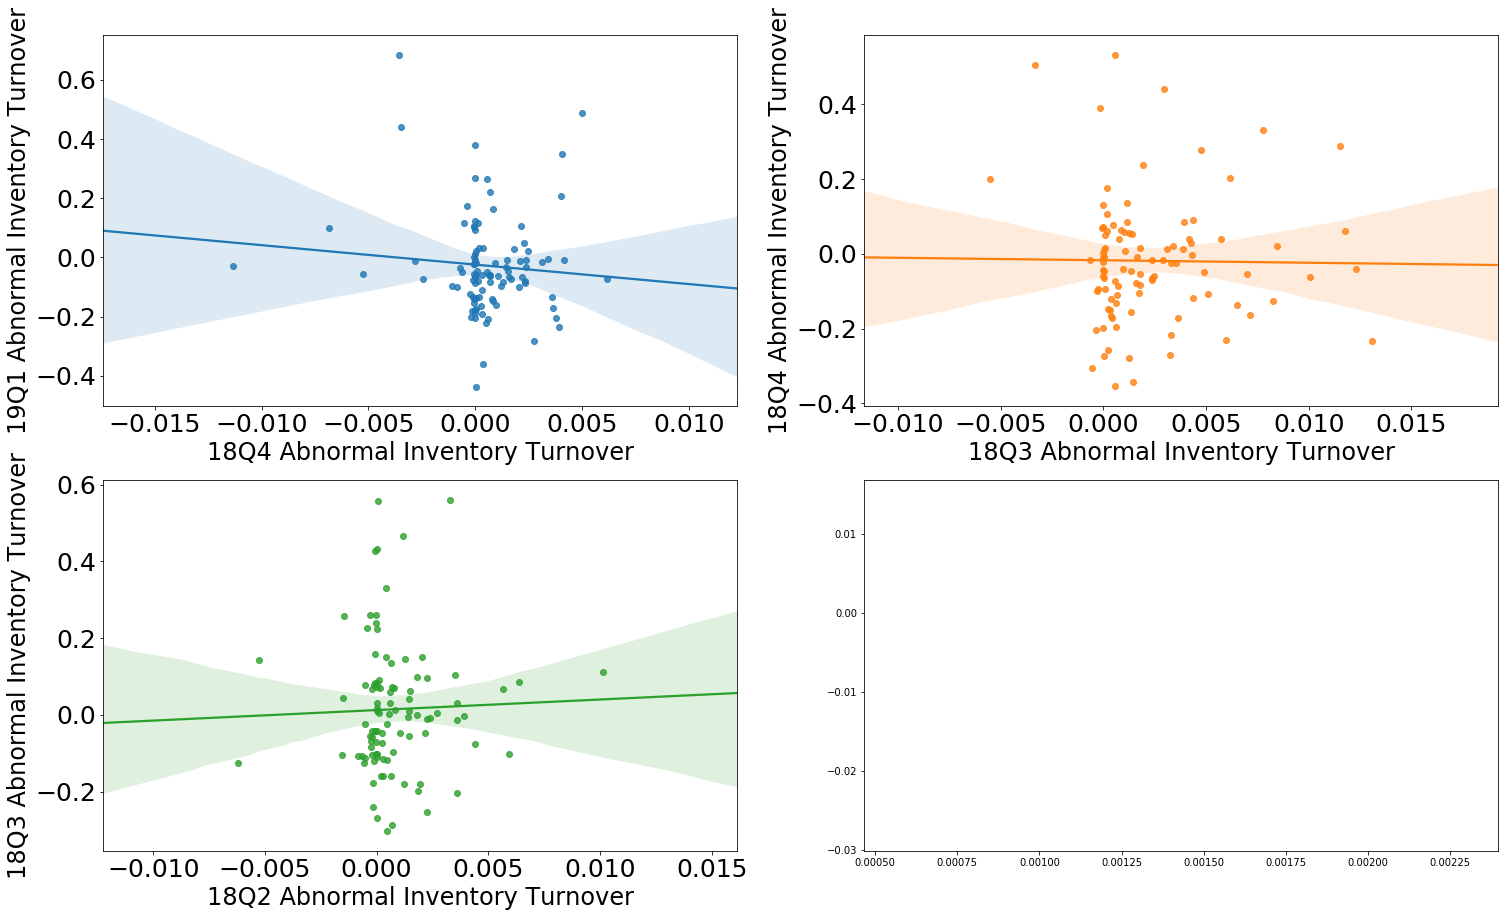

In [244]:
fig, ax = plt.subplots(2,2,figsize=(25,15))
sns.regplot(x='Rev_impact_18Q4', y='Total Liabilities_19Q1', data=fin_lin[(fin_lin['Type']=='Suppliers')&(fin_lin['Country_GP']=='Other')], ax=ax[0,0])
ax[0,0].tick_params(axis = 'both', which = 'major', labelsize = 25)
ax[0,0].set_ylabel('19Q1 Abnormal Inventory Turnover', fontsize=24)
ax[0,0].set_xlabel('18Q4 Abnormal Inventory Turnover', fontsize=24)
#ax[0,0].set_xlim(-1,1)
#ax[0,0].set_ylim(-1,1)
sns.regplot(x='Rev_impact_18Q3', y='Total Liabilities_18Q4', data=fin_lin[(fin_lin['Type']=='Suppliers')&(fin_lin['Country_GP']=='Other')], ax=ax[0,1])
ax[0,1].tick_params(axis = 'both', which = 'major', labelsize = 25)
ax[0,1].set_ylabel('18Q4 Abnormal Inventory Turnover', fontsize=24)
ax[0,1].set_xlabel('18Q3 Abnormal Inventory Turnover', fontsize=24)
#sns.lineplot(x=[1,-1],y=[1,-1],ax=ax[0,1],c='g')
#ax[0,1].set_xlim(-1,1)
#ax[0,1].set_ylim(-1,1)
sns.regplot(x='Rev_impact_18Q2', y='Total Liabilities_18Q3', data=fin_lin[(fin_lin['Type']=='Suppliers')&(fin_lin['Country_GP']=='Other')], ax=ax[1,0])
ax[1,0].tick_params(axis = 'both', which = 'major', labelsize = 25)
ax[1,0].set_ylabel('18Q3 Abnormal Inventory Turnover', fontsize=24)
ax[1,0].set_xlabel('18Q2 Abnormal Inventory Turnover', fontsize=24)
#sns.lineplot(x=[1,-1],y=[1,-1],ax=ax[1,0],c='g')
#ax[1,0].set_xlim(-1,1)
#ax[1,0].set_ylim(-1,1)


## 3 Factor Model

In [5]:
financial

Tickers                         Company Name Country  \
0      000009 CH Equity             China Baoan Group Co Ltd      CN   
1      000009 CH Equity             China Baoan Group Co Ltd      CN   
2      000009 CH Equity             China Baoan Group Co Ltd      CN   
3      000009 CH Equity             China Baoan Group Co Ltd      CN   
4      000009 CH Equity             China Baoan Group Co Ltd      CN   
5      000009 CH Equity             China Baoan Group Co Ltd      CN   
6      000009 CH Equity             China Baoan Group Co Ltd      CN   
7      000009 CH Equity             China Baoan Group Co Ltd      CN   
8      000009 CH Equity             China Baoan Group Co Ltd      CN   
9      000009 CH Equity             China Baoan Group Co Ltd      CN   
10     000009 CH Equity             China Baoan Group Co Ltd      CN   
11     000009 CH Equity             China Baoan Group Co Ltd      CN   
12     000009 CH Equity             China Baoan Group Co Ltd      CN   
13     000009 CH Equity             China Baoan Group Co Ltd      CN   
14     000009 CH Equity             China Baoan Group Co Ltd      CN   
15     000009 CH Equity             China Baoan Group Co Ltd      CN   
16     000009 CH Equity             China Baoan Group Co Ltd      CN   
17     000009 CH Equity             China Baoan Group Co Ltd      CN   
18     000009 CH Equity             China Baoan Group Co Ltd      CN   
19     000009 CH Equity             China Baoan Group Co Ltd      CN   
20     000009 CH Equity             China Baoan Group Co Ltd      CN   
21     000038 CH Equity  Shenzhen Capstone Industrial Co Ltd      CN   
22     000038 CH Equity  Shenzhen Capstone Industrial Co Ltd      CN   
23     000038 CH Equity  Shenzhen Capstone Industrial Co Ltd      CN   
24     000038 CH Equity  Shenzhen Capstone Industrial Co Ltd      CN   
25     000038 CH Equity  Shenzhen Capstone Industrial Co Ltd      CN   
26     000038 CH Equity  Shenzhen Capstone Industrial Co Ltd      CN   
27     000038 CH Equity  Shenzhen Capstone Industrial Co Ltd      CN   
28     000038 CH Equity  Shenzhen Capstone Industrial Co Ltd      CN   
29     000038 CH Equity  Shenzhen Capstone Industrial Co Ltd      CN   
...                 ...                                  ...     ...   
28846     ZUO US Equity                            Zuora Inc      US   
28847     ZUO US Equity                            Zuora Inc      US   
28848     ZUO US Equity                            Zuora Inc      US   
28849     ZUO US Equity                            Zuora Inc      US   
28850     ZUO US Equity                            Zuora Inc      US   
28851     ZUO US Equity                            Zuora Inc      US   
28852     ZUO US Equity                            Zuora Inc      US   
28853     ZUO US Equity                            Zuora Inc      US   
28854     ZUO US Equity                            Zuora Inc      US   
28855   ZXAIY US Equity   China Zenix Auto International Ltd      CN   
28856   ZXAIY US Equity   China Zenix Auto International Ltd      CN   
28857   ZXAIY US Equity   China Zenix Auto International Ltd      CN   
28858   ZXAIY US Equity   China Zenix Auto International Ltd      CN   
28859   ZXAIY US Equity   China Zenix Auto International Ltd      CN   
28860   ZXAIY US Equity   China Zenix Auto International Ltd      CN   
28861   ZXAIY US Equity   China Zenix Auto International Ltd      CN   
28862   ZXAIY US Equity   China Zenix Auto International Ltd      CN   
28863   ZXAIY US Equity   China Zenix Auto International Ltd      CN   
28864   ZXAIY US Equity   China Zenix Auto International Ltd      CN   
28865   ZXAIY US Equity   China Zenix Auto International Ltd      CN   
28866   ZXAIY US Equity   China Zenix Auto International Ltd      CN   
28867   ZXAIY US Equity   China Zenix Auto International Ltd      CN   
28868   ZXAIY US Equity   China Zenix Auto International Ltd      CN   
28869   ZXAIY US Equity   China Zenix Auto International

In [25]:
industry_list = pd.pivot_table(financial,index=['GICS SubInd Name'],values=['Tickers'],aggfunc={'Tickers':lambda x: len(x.unique())})
industry_list.reset_index(inplace=True)
valid_industry = list(set(industry_list[industry_list['Tickers']>5]['GICS SubInd Name']))

In [26]:
financial_metrics = list(financial.columns[9:])
financial_valid = financial[financial['GICS SubInd Name'].isin(valid_industry)]
industry_avg = pd.pivot_table(financial_valid,index=['GICS SubInd Name','End Date'],values=financial_metrics,aggfunc=np.mean)
industry_avg.reset_index(inplace=True)
industry_avg

GICS SubInd Name   End Date     AR_TO  Accounts Payable  \
0                         Advertising 2014-03-31  1.349847       1642.111510   
1                         Advertising 2014-06-30  1.321033       1427.137464   
2                         Advertising 2014-09-30  1.295751       1496.226490   
3                         Advertising 2014-12-31  1.352451       1366.030436   
4                         Advertising 2015-03-31  1.196246        696.690244   
5                         Advertising 2015-06-30  1.363202        659.091350   
6                         Advertising 2015-09-30  1.345721        737.387122   
7                         Advertising 2015-12-31  1.744646        769.392560   
8                         Advertising 2016-03-31  1.430699       1652.569130   
9                         Advertising 2016-06-30  1.492390       1544.669518   
10                        Advertising 2016-09-30  1.477400       1684.775350   
11                        Advertising 2016-12-31  1.580904       1602.886382   
12                        Advertising 2017-03-31  1.775137       1675.167280   
13                        Advertising 2017-06-30  1.307595       1576.921945   
14                        Advertising 2017-09-30  1.408492       1664.797810   
15                        Advertising 2017-12-31  1.359173       1776.644391   
16                        Advertising 2018-03-31  1.212700       1788.018830   
17                        Advertising 2018-06-30  1.359687       1633.275536   
18                        Advertising 2018-09-30  1.408686       1721.967440   
19                        Advertising 2018-12-31  1.550968       1963.367800   
20                        Advertising 2019-03-31  1.269913       1763.795480   
21                Aerospace & Defense 2014-03-31       inf        889.111223   
22                Aerospace & Defense 2014-06-30       inf        954.063977   
23                Aerospace & Defense 2014-09-30       inf        974.724692   
24                Aerospace & Defense 2014-12-31       inf        896.813164   
25                Aerospace & Defense 2015-03-31       inf        986.977658   
26                Aerospace & Defense 2015-06-30       inf       1005.211667   
27                Aerospace & Defense 2015-09-30       inf        959.384092   
28                Aerospace & Defense 2015-12-31       inf       1106.723958   
29                Aerospace & Defense 2016-03-31  1.452816        935.292800   
..                                ...        ...       ...               ...   
852  Trading Companies & Distributors 2017-03-31  2.072946       2170.342150   
853  Trading Companies & Distributors 2017-06-30  2.610804       2118.009517   
854  Trading Companies & Distributors 2017-09-30  2.638087       2247.404467   
855  Trading Companies & Distributors 2017-12-31  2.842400       2452.090550   
856  Trading Companies & Distributors 2018-03-31  2.309950       2173.387300   
857  Trading Companies & Distributors 2018-06-30  2.498518       2380.787783   
858  Trading Companies & Distributors 2018-09-30  2.367633       6110.428800   
859  Trading Companies & Distributors 2018-12-31  2.594698       2525.255867   
860  Trading Companies & Distributors 2019-03-31  1.854991       4274.206967   
861                          Trucking 2014-03-31  2.983061        128.755169   
862                          Trucking 2014-06-30  2.896895        123.181677   
863                          Trucking 2014-09-30  3.138206        123.760585   
864                          Trucking 2014-12-31  3.577534        122.934246   
865                          Trucking 2015-03-31  2.963132        131.630608   
866                          Trucking 2015-06-30  2.765225        136.971046   
867                          Trucking 2015-09-30  3.013843        129.353285   
868                          Trucking 2015-12-31  3.457234        115.213369   
869                          Trucking 2016-03-31  3.214580        126.529683   
870                  

In [27]:
financial_valid2 = pd.merge(financial_valid,industry_avg,how='left',
                            left_on=['GICS SubInd Name','End Date'],right_on=['GICS SubInd Name','End Date'],
                           suffixes=('_actual', '_avg'))
financial_valid2["Quarter"]=financial_valid2['End Date'].dt.quarter
financial_valid2

Tickers                        Company Name Country  \
0      000009 CH Equity            China Baoan Group Co Ltd      CN   
1      000009 CH Equity            China Baoan Group Co Ltd      CN   
2      000009 CH Equity            China Baoan Group Co Ltd      CN   
3      000009 CH Equity            China Baoan Group Co Ltd      CN   
4      000009 CH Equity            China Baoan Group Co Ltd      CN   
5      000009 CH Equity            China Baoan Group Co Ltd      CN   
6      000009 CH Equity            China Baoan Group Co Ltd      CN   
7      000009 CH Equity            China Baoan Group Co Ltd      CN   
8      000009 CH Equity            China Baoan Group Co Ltd      CN   
9      000009 CH Equity            China Baoan Group Co Ltd      CN   
10     000009 CH Equity            China Baoan Group Co Ltd      CN   
11     000009 CH Equity            China Baoan Group Co Ltd      CN   
12     000009 CH Equity            China Baoan Group Co Ltd      CN   
13     000009 CH Equity            China Baoan Group Co Ltd      CN   
14     000009 CH Equity            China Baoan Group Co Ltd      CN   
15     000009 CH Equity            China Baoan Group Co Ltd      CN   
16     000009 CH Equity            China Baoan Group Co Ltd      CN   
17     000009 CH Equity            China Baoan Group Co Ltd      CN   
18     000009 CH Equity            China Baoan Group Co Ltd      CN   
19     000009 CH Equity            China Baoan Group Co Ltd      CN   
20     000009 CH Equity            China Baoan Group Co Ltd      CN   
21     000120 KS Equity                   CJ Logistics Corp      KR   
22     000120 KS Equity                   CJ Logistics Corp      KR   
23     000120 KS Equity                   CJ Logistics Corp      KR   
24     000120 KS Equity                   CJ Logistics Corp      KR   
25     000120 KS Equity                   CJ Logistics Corp      KR   
26     000120 KS Equity                   CJ Logistics Corp      KR   
27     000120 KS Equity                   CJ Logistics Corp      KR   
28     000120 KS Equity                   CJ Logistics Corp      KR   
29     000120 KS Equity                   CJ Logistics Corp      KR   
...                 ...                                 ...     ...   
24707     ZUO US Equity                           Zuora Inc      US   
24708     ZUO US Equity                           Zuora Inc      US   
24709     ZUO US Equity                           Zuora Inc      US   
24710     ZUO US Equity                           Zuora Inc      US   
24711     ZUO US Equity                           Zuora Inc      US   
24712     ZUO US Equity                           Zuora Inc      US   
24713     ZUO US Equity                           Zuora Inc      US   
24714     ZUO US Equity                           Zuora Inc      US   
24715     ZUO US Equity                           Zuora Inc      US   
24716   ZXAIY US Equity  China Zenix Auto International Ltd      CN   
24717   ZXAIY US Equity  China Zenix Auto International Ltd      CN   
24718   ZXAIY US Equity  China Zenix Auto International Ltd      CN   
24719   ZXAIY US Equity  China Zenix Auto International Ltd      CN   
24720   ZXAIY US Equity  China Zenix Auto International Ltd      CN   
24721   ZXAIY US Equity  China Zenix Auto International Ltd      CN   
24722   ZXAIY US Equity  China Zenix Auto International Ltd      CN   
24723   ZXAIY US Equity  China Zenix Auto International Ltd      CN   
24724   ZXAIY US Equity  China Zenix Auto International Ltd      CN   
24725   ZXAIY US Equity  China Zenix Auto International Ltd      CN   
24726   ZXAIY US Equity  China Zenix Auto International Ltd      CN   
24727   ZXAIY US Equity  China Zenix Auto International Ltd      CN   
24728   ZXAIY US Equity  China Zenix Auto International Ltd      CN   
24729   ZXAIY US Equity  China Zenix Auto International Ltd      CN   
24730   ZXAIY US Equity  China Zenix Auto International Ltd      CN   
24731   ZXAIY US Equity  China Zenix Aut

In [44]:
all_tickers = list(set(financial_valid2['Tickers']))
for i in all_tickers:
    financial_valid2[financial_valid2['Tickers']==i]['Market_Cap'] = financial_valid2[financial_valid2['Tickers']==i]['Market_Cap'].interpolate()

/Users/Saik/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [29]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn import metrics

In [31]:
all_tickers = list(set(financial_valid2['Tickers']))
train = financial_valid2[financial_valid2['End Date']<pd.to_datetime('21-3-2018')]
test = financial_valid2[financial_valid2['End Date']>pd.to_datetime('21-4-2018')]

In [63]:
coef = []
p = []
tick = []
est=[]
for i in all_tickers:
    try:
        df = train[train['Tickers']==i][['Cash_actual','Cash_avg','Quarter','Market_Cap']]
        df_test = financial_valid2[financial_valid2['Tickers']==i][['Cash_actual','Cash_avg','Quarter','Market_Cap']]
        df['Cash_actual'] = df['Cash_actual'].interpolate()
        df['Market_Cap'] = df['Market_Cap'].interpolate()
        df_test['Market_Cap'] = df_test['Market_Cap'].interpolate()
        res = smf.ols(formula='Cash_actual ~ Cash_avg +Market_Cap+C(Quarter)', data=df).fit()
        tick.append(i)
        coef.append(list(res.params))
        a = list(res.pvalues)
        a.append(res.rsquared)
        p.append(a)
        b =list(res.predict(df_test).values)
        b.append(i)
        est.append(b)
    except:
        continue
coef_cash_df = pd.DataFrame(coef,columns=['Intercept',"Q2",'Q3',"Q4",'Industry_Avg','Market Cap'])
coef_cash_df['Tickers']=tick
p_cash_df = pd.DataFrame(p,columns=['Intercept',"Q2",'Q3',"Q4",'Industry_Avg','Market Cap','R Squared'])
p_cash_df['Tickers']=tick
colu = ["20140331","20140630",'20140930',"20141231","20150331","20150630",'20150930',"20151231","20160331","20160630",'20160930',"20161231","20170331","20170630",'20170930',"20171231","20180331","20180630",'20180930',"20181231","20190331","Tickers"]
est_cash_df = pd.DataFrame(est,columns=colu)
est_cash_df2 = est_cash_df[~est_cash_df['Tickers'].isnull()]

In [64]:
coef = []
p = []
tick = []
est=[]
for i in all_tickers:
    try:
        df = train[train['Tickers']==i][['Inventories_actual','Inventories_avg','Quarter','Market_Cap']]
        df_test = financial_valid2[financial_valid2['Tickers']==i][['Inventories_actual','Inventories_avg','Quarter','Market_Cap']]
        df['Inventories_actual'] = df['Inventories_actual'].interpolate()
        df['Market_Cap'] = df['Market_Cap'].interpolate()
        df_test['Market_Cap'] = df_test['Market_Cap'].interpolate()
        res = smf.ols(formula='Inventories_actual ~ Inventories_avg +Market_Cap+C(Quarter)', data=df).fit()
        tick.append(i)
        coef.append(list(res.params))
        a = list(res.pvalues)
        a.append(res.rsquared)
        p.append(a)
        b =list(res.predict(df_test).values)
        b.append(i)
        est.append(b)
    except:
        continue
coef_ito_df = pd.DataFrame(coef,columns=['Intercept',"Q2",'Q3',"Q4",'Industry_Avg','Market Cap'])
coef_ito_df['Tickers']=tick
p_ito_df = pd.DataFrame(p,columns=['Intercept',"Q2",'Q3',"Q4",'Industry_Avg','Market Cap','R Squared'])
p_ito_df['Tickers']=tick
colu = ["20140331","20140630",'20140930',"20141231","20150331","20150630",'20150930',"20151231","20160331","20160630",'20160930',"20161231","20170331","20170630",'20170930',"20171231","20180331","20180630",'20180930',"20181231","20190331","Tickers"]
est_ito_df = pd.DataFrame(est,columns=colu)
est_ito_df2 = est_ito_df[~est_ito_df['Tickers'].isnull()]

/Users/Saik/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:1100: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse


In [66]:
coef = []
p = []
tick = []
est=[]
for i in all_tickers:
    try:
        df = train[train['Tickers']==i][['d_e_ratio_actual','d_e_ratio_avg','Quarter','Market_Cap']]
        df_test = financial_valid2[financial_valid2['Tickers']==i][['d_e_ratio_actual','d_e_ratio_avg','Quarter','Market_Cap']]
        df['d_e_ratio_actual'] = df['d_e_ratio_actual'].interpolate()
        df['Market_Cap'] = df['Market_Cap'].interpolate()
        df_test['Market_Cap'] = df_test['Market_Cap'].interpolate()
        res = smf.ols(formula='d_e_ratio_actual ~ d_e_ratio_avg +Market_Cap+C(Quarter)', data=df).fit()
        tick.append(i)
        coef.append(list(res.params))
        a = list(res.pvalues)
        a.append(res.rsquared)
        p.append(a)
        b =list(res.predict(df_test).values)
        b.append(i)
        est.append(b)
    except:
        continue
coef_de_df = pd.DataFrame(coef,columns=['Intercept',"Q2",'Q3',"Q4",'Industry_Avg','Market Cap'])
coef_de_df['Tickers']=tick
p_de_df = pd.DataFrame(p,columns=['Intercept',"Q2",'Q3',"Q4",'Industry_Avg','Market Cap','R Squared'])
p_de_df['Tickers']=tick
colu = ["20140331","20140630",'20140930',"20141231","20150331","20150630",'20150930',"20151231","20160331","20160630",'20160930',"20161231","20170331","20170630",'20170930',"20171231","20180331","20180630",'20180930',"20181231","20190331","Tickers"]
est_de_df = pd.DataFrame(est,columns=colu)
est_de_df2 = est_de_df[~est_de_df['Tickers'].isnull()]

In [520]:
coef = []
p = []
tick = []
est=[]
for i in all_tickers:
    try:
        df = train[train['Tickers']==i][['Net Income/Net Profit (Losses)_actual','Net Income/Net Profit (Losses)_avg','Quarter','Market_Cap']]
        df_test = test[test['Tickers']==i][['Net Income/Net Profit (Losses)_actual','Net Income/Net Profit (Losses)_avg','Quarter','Market_Cap']]
        df.columns = ['NI_actual','NI_avg','Quarter','Market_Cap']
        df_test.columns = ['NI_actual','NI_avg','Quarter','Market_Cap']
        df['NI_actual'] = df['NI_actual'].interpolate()
        res = smf.ols(formula='NI_actual ~ NI_avg +Market_Cap+C(Quarter)', data=df).fit()
        tick.append(i)
        coef.append(list(res.params))
        a = list(res.pvalues)
        a.append(res.rsquared)
        p.append(a)
        b =list(res.predict(df_test).values)
        b.append(i)
        est.append(b)
    except:
        continue
coef_ni_df = pd.DataFrame(coef,columns=['Intercept',"Q2",'Q3',"Q4",'Industry_Avg','Market Cap'])
coef_ni_df['Tickers']=tick
p_ni_df = pd.DataFrame(p,columns=['Intercept',"Q2",'Q3',"Q4",'Industry_Avg','Market Cap','R Squared'])
p_ni_df['Tickers']=tick
est_ni_df = pd.DataFrame(est,columns=["20180630",'20180930',"20181231","20190331","Tickers"])
est_ni_df2 = est_ni_df[~est_ni_df['Tickers'].isnull()]

In [521]:
coef = []
p = []
tick = []
est=[]
for i in all_tickers:
    try:
        df = train[train['Tickers']==i][['Cost of Goods & Services Sold_actual','Cost of Goods & Services Sold_avg','Quarter','Market_Cap']]
        df_test = test[test['Tickers']==i][['Cost of Goods & Services Sold_actual','Cost of Goods & Services Sold_avg','Quarter','Market_Cap']]
        df.columns = ['COGS_actual','COGS_avg','Quarter','Market_Cap']
        df_test.columns = ['COGS_actual','COGS_avg','Quarter','Market_Cap']
        df['COGS_actual'] = df['COGS_actual'].interpolate()
        res = smf.ols(formula='COGS_actual ~ COGS_avg +Market_Cap+C(Quarter)', data=df).fit()
        tick.append(i)
        coef.append(list(res.params))
        a = list(res.pvalues)
        a.append(res.rsquared)
        p.append(a)
        b =list(res.predict(df_test).values)
        b.append(i)
        est.append(b)
    except:
        continue
coef_cogs_df = pd.DataFrame(coef,columns=['Intercept',"Q2",'Q3',"Q4",'Industry_Avg','Market Cap'])
coef_cogs_df['Tickers']=tick
p_cogs_df = pd.DataFrame(p,columns=['Intercept',"Q2",'Q3',"Q4",'Industry_Avg','Market Cap','R Squared'])
p_cogs_df['Tickers']=tick
est_cogs_df = pd.DataFrame(est,columns=["20180630",'20180930',"20181231","20190331","Tickers"])
est_cogs_df2 = est_cogs_df[~est_cogs_df['Tickers'].isnull()]

In [522]:
coef = []
p = []
tick = []
est=[]
for i in all_tickers:
    try:
        df = train[train['Tickers']==i][['Revenue_actual','Revenue_avg','Quarter','Market_Cap']]
        df_test = test[test['Tickers']==i][['Revenue_actual','Revenue_avg','Quarter','Market_Cap']]
        #train.columns = ['COGS_actual','COGS_avg','Quarter','Market_Cap']
        #test.columns = ['COGS_actual','COGS_avg','Quarter','Market_Cap']
        df['Revenue_actual'] = df['Revenue_actual'].interpolate()
        res = smf.ols(formula='Revenue_actual ~ Revenue_avg +Market_Cap+C(Quarter)', data=df).fit()
        tick.append(i)
        coef.append(list(res.params))
        a = list(res.pvalues)
        a.append(res.rsquared)
        p.append(a)
        b =list(res.predict(df_test).values)
        b.append(i)
        est.append(b)
    except:
        continue
coef_Revenue_df = pd.DataFrame(coef,columns=['Intercept',"Q2",'Q3',"Q4",'Industry_Avg','Market Cap'])
coef_Revenue_df['Tickers']=tick
p_Revenue_df = pd.DataFrame(p,columns=['Intercept',"Q2",'Q3',"Q4",'Industry_Avg','Market Cap','R Squared'])
p_Revenue_df['Tickers']=tick
est_Revenue_df = pd.DataFrame(est,columns=["20180630",'20180930',"20181231","20190331","Tickers"])
est_Revenue_df2 = est_Revenue_df[~est_Revenue_df['Tickers'].isnull()]

In [527]:
coef = []
p = []
tick = []
est=[]
for i in all_tickers:
    try:
        df = train[train['Tickers']==i][['Basic Earnings per Share_actual','Basic Earnings per Share_avg','Quarter','Market_Cap']]
        df_test = test[test['Tickers']==i][['Basic Earnings per Share_actual','Basic Earnings per Share_avg','Quarter','Market_Cap']]
        df.columns = ['EPS_actual','EPS_avg','Quarter','Market_Cap']
        df_test.columns = ['EPS_actual','EPS_avg','Quarter','Market_Cap']
        df['EPS_actual'] = df['EPS_actual'].interpolate()
        res = smf.ols(formula='EPS_actual ~ EPS_avg +Market_Cap+C(Quarter)', data=df).fit()
        tick.append(i)
        coef.append(list(res.params))
        a = list(res.pvalues)
        a.append(res.rsquared)
        p.append(a)
        b =list(res.predict(df_test).values)
        b.append(i)
        est.append(b)
    except:
        continue
coef_EPS_df = pd.DataFrame(coef,columns=['Intercept',"Q2",'Q3',"Q4",'Industry_Avg','Market Cap'])
coef_EPS_df['Tickers']=tick
p_EPS_df = pd.DataFrame(p,columns=['Intercept',"Q2",'Q3',"Q4",'Industry_Avg','Market Cap','R Squared'])
p_EPS_df['Tickers']=tick
est_EPS_df = pd.DataFrame(est,columns=["20180630",'20180930',"20181231","20190331","Tickers"])
est_EPS_df2 = est_EPS_df[~est_EPS_df['Tickers'].isnull()]

In [528]:
coef = []
p = []
tick = []
est=[]
for i in all_tickers:
    try:
        df = train[train['Tickers']==i][['EBIT_actual','EBIT_avg','Quarter','Market_Cap']]
        df_test = test[test['Tickers']==i][['EBIT_actual','EBIT_avg','Quarter','Market_Cap']]
        #df.columns = ['EPS_actual','EPS_avg','Quarter','Market_Cap']
        #df_test.columns = ['EPS_actual','EPS_avg','Quarter','Market_Cap']
        df['EBIT_actual'] = df['EBIT_actual'].interpolate()
        res = smf.ols(formula='EBIT_actual ~ EBIT_avg +Market_Cap+C(Quarter)', data=df).fit()
        tick.append(i)
        coef.append(list(res.params))
        a = list(res.pvalues)
        a.append(res.rsquared)
        p.append(a)
        b =list(res.predict(df_test).values)
        b.append(i)
        est.append(b)
    except:
        continue
coef_EBIT_df = pd.DataFrame(coef,columns=['Intercept',"Q2",'Q3',"Q4",'Industry_Avg','Market Cap'])
coef_EBIT_df['Tickers']=tick
p_EBIT_df = pd.DataFrame(p,columns=['Intercept',"Q2",'Q3',"Q4",'Industry_Avg','Market Cap','R Squared'])
p_EBIT_df['Tickers']=tick
est_EBIT_df = pd.DataFrame(est,columns=["20180630",'20180930',"20181231","20190331","Tickers"])
est_EBIT_df2 = est_EBIT_df[~est_EBIT_df['Tickers'].isnull()]

In [529]:
coef = []
p = []
tick = []
est=[]
for i in all_tickers:
    try:
        df = train[train['Tickers']==i][['Operating Expenses_actual','Operating Expenses_avg','Quarter','Market_Cap']]
        df_test = test[test['Tickers']==i][['Operating Expenses_actual','Operating Expenses_avg','Quarter','Market_Cap']]
        df.columns = ['OExp_actual','OExp_avg','Quarter','Market_Cap']
        df_test.columns = ['OExp_actual','OExp_avg','Quarter','Market_Cap']
        df['OExp_actual'] = df['OExp_actual'].interpolate()
        res = smf.ols(formula='OExp_actual ~ OExp_avg +Market_Cap+C(Quarter)', data=df).fit()
        tick.append(i)
        coef.append(list(res.params))
        a = list(res.pvalues)
        a.append(res.rsquared)
        p.append(a)
        b =list(res.predict(df_test).values)
        b.append(i)
        est.append(b)
    except:
        continue
coef_OExp_df = pd.DataFrame(coef,columns=['Intercept',"Q2",'Q3',"Q4",'Industry_Avg','Market Cap'])
coef_OExp_df['Tickers']=tick
p_OExp_df = pd.DataFrame(p,columns=['Intercept',"Q2",'Q3',"Q4",'Industry_Avg','Market Cap','R Squared'])
p_OExp_df['Tickers']=tick
est_OExp_df = pd.DataFrame(est,columns=["20180630",'20180930',"20181231","20190331","Tickers"])
est_OExp_df2 = est_OExp_df[~est_OExp_df['Tickers'].isnull()]

In [530]:
coef = []
p = []
tick = []
est=[]
for i in all_tickers:
    try:
        df = train[train['Tickers']==i][['Short Term Debt_actual','Short Term Debt_avg','Quarter','Market_Cap']]
        df_test = test[test['Tickers']==i][['Short Term Debt_actual','Short Term Debt_avg','Quarter','Market_Cap']]
        df.columns = ['STD_actual','STD_avg','Quarter','Market_Cap']
        df_test.columns = ['STD_actual','STD_avg','Quarter','Market_Cap']
        df['STD_actual'] = df['STD_actual'].interpolate()
        res = smf.ols(formula='STD_actual ~ STD_avg +Market_Cap+C(Quarter)', data=df).fit()
        tick.append(i)
        coef.append(list(res.params))
        a = list(res.pvalues)
        a.append(res.rsquared)
        p.append(a)
        b =list(res.predict(df_test).values)
        b.append(i)
        est.append(b)
    except:
        continue
coef_std_df = pd.DataFrame(coef,columns=['Intercept',"Q2",'Q3',"Q4",'Industry_Avg','Market Cap'])
coef_std_df['Tickers']=tick
p_std_df = pd.DataFrame(p,columns=['Intercept',"Q2",'Q3',"Q4",'Industry_Avg','Market Cap','R Squared'])
p_std_df['Tickers']=tick
est_std_df = pd.DataFrame(est,columns=["20180630",'20180930',"20181231","20190331","Tickers"])
est_std_df2 = est_std_df[~est_std_df['Tickers'].isnull()]

In [531]:
coef = []
p = []
tick = []
est=[]
for i in all_tickers:
    try:
        df = train[train['Tickers']==i][['Long Term Debt_actual','Long Term Debt_avg','Quarter','Market_Cap']]
        df_test = test[test['Tickers']==i][['Long Term Debt_actual','Long Term Debt_avg','Quarter','Market_Cap']]
        df.columns = ['LTD_actual','LTD_avg','Quarter','Market_Cap']
        df_test.columns = ['LTD_actual','LTD_avg','Quarter','Market_Cap']
        df['LTD_actual'] = df['LTD_actual'].interpolate()
        res = smf.ols(formula='LTD_actual ~ LTD_avg +Market_Cap+C(Quarter)', data=df).fit()
        tick.append(i)
        coef.append(list(res.params))
        a = list(res.pvalues)
        a.append(res.rsquared)
        p.append(a)
        b =list(res.predict(df_test).values)
        b.append(i)
        est.append(b)
    except:
        continue
coef_ltd_df = pd.DataFrame(coef,columns=['Intercept',"Q2",'Q3',"Q4",'Industry_Avg','Market Cap'])
coef_ltd_df['Tickers']=tick
p_ltd_df = pd.DataFrame(p,columns=['Intercept',"Q2",'Q3',"Q4",'Industry_Avg','Market Cap','R Squared'])
p_ltd_df['Tickers']=tick
est_ltd_df = pd.DataFrame(est,columns=["20180630",'20180930',"20181231","20190331","Tickers"])
est_ltd_df2 = est_ltd_df[~est_ltd_df['Tickers'].isnull()]

In [532]:
coef = []
p = []
tick = []
est=[]
for i in all_tickers:
    try:
        df = train[train['Tickers']==i][['Total Liabilities_actual','Total Liabilities_avg','Quarter','Market_Cap']]
        df_test = test[test['Tickers']==i][['Total Liabilities_actual','Total Liabilities_avg','Quarter','Market_Cap']]
        df.columns = ['TL_actual','TL_avg','Quarter','Market_Cap']
        df_test.columns = ['TL_actual','TL_avg','Quarter','Market_Cap']
        df['TL_actual'] = df['TL_actual'].interpolate()
        res = smf.ols(formula='TL_actual ~ TL_avg +Market_Cap+C(Quarter)', data=df).fit()
        tick.append(i)
        coef.append(list(res.params))
        a = list(res.pvalues)
        a.append(res.rsquared)
        p.append(a)
        b =list(res.predict(df_test).values)
        b.append(i)
        est.append(b)
    except:
        continue
coef_tl_df = pd.DataFrame(coef,columns=['Intercept',"Q2",'Q3',"Q4",'Industry_Avg','Market Cap'])
coef_tl_df['Tickers']=tick
p_tl_df = pd.DataFrame(p,columns=['Intercept',"Q2",'Q3',"Q4",'Industry_Avg','Market Cap','R Squared'])
p_tl_df['Tickers']=tick
est_tl_df = pd.DataFrame(est,columns=["20180630",'20180930',"20181231","20190331","Tickers"])
est_tl_df2 = est_tl_df[~est_tl_df['Tickers'].isnull()]

In [533]:
coef = []
p = []
tick = []
est=[]
for i in all_tickers:
    try:
        df = train[train['Tickers']==i][['Total Equity_actual','Total Equity_avg','Quarter','Market_Cap']]
        df_test = test[test['Tickers']==i][['Total Equity_actual','Total Equity_avg','Quarter','Market_Cap']]
        df.columns = ['TE_actual','TE_avg','Quarter','Market_Cap']
        df_test.columns = ['TE_actual','TE_avg','Quarter','Market_Cap']
        df['TE_actual'] = df['TE_actual'].interpolate()
        res = smf.ols(formula='TE_actual ~ TE_avg +Market_Cap+C(Quarter)', data=df).fit()
        tick.append(i)
        coef.append(list(res.params))
        a = list(res.pvalues)
        a.append(res.rsquared)
        p.append(a)
        b =list(res.predict(df_test).values)
        b.append(i)
        est.append(b)
    except:
        continue
coef_te_df = pd.DataFrame(coef,columns=['Intercept',"Q2",'Q3',"Q4",'Industry_Avg','Market Cap'])
coef_te_df['Tickers']=tick
p_te_df = pd.DataFrame(p,columns=['Intercept',"Q2",'Q3',"Q4",'Industry_Avg','Market Cap','R Squared'])
p_te_df['Tickers']=tick
est_te_df = pd.DataFrame(est,columns=["20180630",'20180930',"20181231","20190331","Tickers"])
est_te_df2 = est_te_df[~est_te_df['Tickers'].isnull()]

In [583]:
coef = []
p = []
tick = []
est=[]
for i in all_tickers:
    try:
        df = train[train['Tickers']==i][['Gross Profit_actual','Gross Profit_avg','Quarter','Market_Cap']]
        df_test = test[test['Tickers']==i][['Gross Profit_actual','Gross Profit_avg','Quarter','Market_Cap']]
        df.columns = ['GP_actual','GP_avg','Quarter','Market_Cap']
        df_test.columns = ['GP_actual','GP_avg','Quarter','Market_Cap']
        df['GP_actual'] = df['GP_actual'].interpolate()
        res = smf.ols(formula='GP_actual ~ GP_avg +Market_Cap+C(Quarter)', data=df).fit()
        tick.append(i)
        coef.append(list(res.params))
        a = list(res.pvalues)
        a.append(res.rsquared)
        p.append(a)
        b =list(res.predict(df_test).values)
        b.append(i)
        est.append(b)
    except:
        continue
coef_gp_df = pd.DataFrame(coef,columns=['Intercept',"Q2",'Q3',"Q4",'Industry_Avg','Market Cap'])
coef_gp_df['Tickers']=tick
p_gp_df = pd.DataFrame(p,columns=['Intercept',"Q2",'Q3',"Q4",'Industry_Avg','Market Cap','R Squared'])
p_gp_df['Tickers']=tick
est_gp_df = pd.DataFrame(est,columns=["20180630",'20180930',"20181231","20190331","Tickers"])
est_gp_df2 = est_gp_df[~est_gp_df['Tickers'].isnull()]

/Users/Saik/anaconda3/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1510: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid
/Users/Saik/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:1181: RuntimeWarning: invalid value encountered in multiply
  cov_p = self.normalized_cov_params * scale
/Users/Saik/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/Saik/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/Saik/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
/Users/Saik/anaconda3/lib/python3.7/site-packages/statsmodels/regression/

In [513]:
train.columns

Index(['Tickers', 'Company Name', 'Country', 'GICS SubInd Name',
       'GICS Ind Name', 'GICS Sector', 'End Date', 'Market_Cap', 'Last Price',
       'Long Term Debt_actual', 'Short Term Debt_actual',
       'Total Equity_actual', 'EBIT_actual', 'Interest Expense_actual',
       'Total Liabilities_actual', 'Net Income/Net Profit (Losses)_actual',
       'Free Cash Flow to Equity_actual', 'Free Cash Flow to Firm_actual',
       'Operating Expenses_actual', 'Revenue_actual',
       'Basic Earnings per Share_actual',
       'Selling, General and Administrative Expense_actual',
       'R&D Expense_actual', 'Inventories_actual', 'Gross Profit_actual',
       'Cost of Goods & Services Sold_actual', 'Cash From Operations_actual',
       'Return on Assets_actual', 'Accounts Receivable - Net_actual',
       'Accounts Payable_actual', 'Cash_actual', 'Inventory Turnover_actual',
       'd_e_ratio_actual', 'AR_TO_actual', 'GPM_actual', 'PM_actual',
       'COGS_ratio_actual', 'AR_TO_avg', 'Accoun

In [67]:
cash_exp = pd.melt(est_cash_df2, id_vars=["Tickers"],var_name="End Date", value_name="Cash_Expected")
cash_exp['End Date']=pd.to_datetime(cash_exp['End Date'],format="%Y%m%d")
inv_exp = pd.melt(est_ito_df2, id_vars=["Tickers"],var_name="End Date", value_name="Inventories_Expected")
inv_exp['End Date']=pd.to_datetime(inv_exp['End Date'],format="%Y%m%d")
de_exp = pd.melt(est_de_df2, id_vars=["Tickers"],var_name="End Date", value_name="d_e_ratio_Expected")
de_exp['End Date']=pd.to_datetime(de_exp['End Date'],format="%Y%m%d")
fin_abn = pd.merge(financial_valid2,cash_exp,how='inner',left_on=['Tickers','End Date'],right_on=['Tickers','End Date'])
fin_abn = pd.merge(fin_abn,inv_exp,how='inner',left_on=['Tickers','End Date'],right_on=['Tickers','End Date'])
fin_abn = pd.merge(fin_abn,de_exp,how='inner',left_on=['Tickers','End Date'],right_on=['Tickers','End Date'])

In [585]:
cash_exp = pd.melt(est_cash_df2, id_vars=["Tickers"],var_name="End Date", value_name="Cash_Expected")
cash_exp['End Date']=pd.to_datetime(cash_exp['End Date'],format="%Y%m%d")
inv_exp = pd.melt(est_ito_df2, id_vars=["Tickers"],var_name="End Date", value_name="Inventories_Expected")
inv_exp['End Date']=pd.to_datetime(inv_exp['End Date'],format="%Y%m%d")
de_exp = pd.melt(est_de_df2, id_vars=["Tickers"],var_name="End Date", value_name="d_e_ratio_Expected")
de_exp['End Date']=pd.to_datetime(de_exp['End Date'],format="%Y%m%d")
ni_exp = pd.melt(est_ni_df2, id_vars=["Tickers"],var_name="End Date", value_name="Net_Income_Expected")
ni_exp['End Date']=pd.to_datetime(ni_exp['End Date'],format="%Y%m%d")
cogs_exp = pd.melt(est_cogs_df2, id_vars=["Tickers"],var_name="End Date", value_name="COGS_Expected")
cogs_exp['End Date']=pd.to_datetime(cogs_exp['End Date'],format="%Y%m%d")
rev_exp = pd.melt(est_Revenue_df2, id_vars=["Tickers"],var_name="End Date", value_name="Revenue_Expected")
rev_exp['End Date']=pd.to_datetime(rev_exp['End Date'],format="%Y%m%d")
eps_exp = pd.melt(est_EPS_df2, id_vars=["Tickers"],var_name="End Date", value_name="EPS_Expected")
eps_exp['End Date']=pd.to_datetime(eps_exp['End Date'],format="%Y%m%d")
ebit_exp = pd.melt(est_EBIT_df2, id_vars=["Tickers"],var_name="End Date", value_name="EBIT_Expected")
ebit_exp['End Date']=pd.to_datetime(ebit_exp['End Date'],format="%Y%m%d")
Oexp_exp = pd.melt(est_OExp_df2, id_vars=["Tickers"],var_name="End Date", value_name="Operating_Expense_Expected")
Oexp_exp['End Date']=pd.to_datetime(Oexp_exp['End Date'],format="%Y%m%d")
STD_exp = pd.melt(est_std_df2, id_vars=["Tickers"],var_name="End Date", value_name="Short_Term_Debt_Expected")
STD_exp['End Date']=pd.to_datetime(STD_exp['End Date'],format="%Y%m%d")
LTD_exp = pd.melt(est_std_df2, id_vars=["Tickers"],var_name="End Date", value_name="Long_Term_Debt_Expected")
LTD_exp['End Date']=pd.to_datetime(LTD_exp['End Date'],format="%Y%m%d")
TL_exp = pd.melt(est_tl_df2, id_vars=["Tickers"],var_name="End Date", value_name="Total_Liabilities_Expected")
TL_exp['End Date']=pd.to_datetime(TL_exp['End Date'],format="%Y%m%d")
TE_exp = pd.melt(est_te_df2, id_vars=["Tickers"],var_name="End Date", value_name="Total_Equity_Expected")
TE_exp['End Date']=pd.to_datetime(TE_exp['End Date'],format="%Y%m%d")
gp_exp = pd.melt(est_gp_df2, id_vars=["Tickers"],var_name="End Date", value_name="Gross_Profit_Expected")
gp_exp['End Date']=pd.to_datetime(gp_exp['End Date'],format="%Y%m%d")

fin_abn = pd.merge(financial_valid2,cash_exp,how='inner',left_on=['Tickers','End Date'],right_on=['Tickers','End Date'])
fin_abn = pd.merge(fin_abn,inv_exp,how='inner',left_on=['Tickers','End Date'],right_on=['Tickers','End Date'])
fin_abn = pd.merge(fin_abn,de_exp,how='inner',left_on=['Tickers','End Date'],right_on=['Tickers','End Date'])
fin_abn = pd.merge(fin_abn,ni_exp,how='inner',left_on=['Tickers','End Date'],right_on=['Tickers','End Date'])
fin_abn = pd.merge(fin_abn,cogs_exp,how='inner',left_on=['Tickers','End Date'],right_on=['Tickers','End Date'])
fin_abn = pd.merge(fin_abn,rev_exp,how='inner',left_on=['Tickers','End Date'],right_on=['Tickers','End Date'])
fin_abn = pd.merge(fin_abn,eps_exp,how='inner',left_on=['Tickers','End Date'],right_on=['Tickers','End Date'])
fin_abn = pd.merge(fin_abn,ebit_exp,how='inner',left_on=['Tickers','End Date'],right_on=['Tickers','End Date'])
fin_abn = pd.merge(fin_abn,Oexp_exp,how='inner',left_on=['Tickers','End Date'],right_on=['Tickers','End Date'])
fin_abn = pd.merge(fin_abn,STD_exp,how='inner',left_on=['Tickers','End Date'],right_on=['Tickers','End Date'])
fin_abn = pd.merge(fin_abn,LTD_exp,how='inner',left_on=['Tickers','End Date'],right_on=['Tickers','End Date'])
fin_abn = pd.merge(fin_abn,TL_exp,how='inner',left_on=['Tickers','End Date'],right_on=['Tickers','End Date'])
fin_abn = pd.merge(fin_abn,TE_exp,how='inner',left_on=['Tickers','End Date'],right_on=['Tickers','End Date'])
fin_abn = pd.merge(fin_abn,gp_exp,how='inner',left_on=['Tickers','End Date'],right_on=['Tickers','End Date'])
fin_abn

Tickers                        Company Name Country  \
0     000009 CH Equity            China Baoan Group Co Ltd      CN   
1     000009 CH Equity            China Baoan Group Co Ltd      CN   
2     000009 CH Equity            China Baoan Group Co Ltd      CN   
3     000009 CH Equity            China Baoan Group Co Ltd      CN   
4     000120 KS Equity                   CJ Logistics Corp      KR   
5     000120 KS Equity                   CJ Logistics Corp      KR   
6     000120 KS Equity                   CJ Logistics Corp      KR   
7     000120 KS Equity                   CJ Logistics Corp      KR   
8     000300 KS Equity                   Dayou Plus Co Ltd      KR   
9     000300 KS Equity                   Dayou Plus Co Ltd      KR   
10    000300 KS Equity                   Dayou Plus Co Ltd      KR   
11    000300 KS Equity                   Dayou Plus Co Ltd      KR   
12    000333 CH Equity                  Midea Group Co Ltd      CN   
13    000333 CH Equity                  Midea Group Co Ltd      CN   
14    000333 CH Equity                  Midea Group Co Ltd      CN   
15    000333 CH Equity                  Midea Group Co Ltd      CN   
16    000430 KS Equity              Dae Won Kang Up Co Ltd      KR   
17    000430 KS Equity              Dae Won Kang Up Co Ltd      KR   
18    000430 KS Equity              Dae Won Kang Up Co Ltd      KR   
19    000430 KS Equity              Dae Won Kang Up Co Ltd      KR   
20    000551 CH Equity  Create Technology & Science Co Ltd      CN   
21    000551 CH Equity  Create Technology & Science Co Ltd      CN   
22    000551 CH Equity  Create Technology & Science Co Ltd      CN   
23    000551 CH Equity  Create Technology & Science Co Ltd      CN   
24    000559 CH Equity            Wanxiang Qianchao Co Ltd      CN   
25    000559 CH Equity            Wanxiang Qianchao Co Ltd      CN   
26    000559 CH Equity            Wanxiang Qianchao Co Ltd      CN   
27    000559 CH Equity            Wanxiang Qianchao Co Ltd      CN   
28    000572 CH Equity                    Haima Automobi-A      CN   
29    000572 CH Equity                    Haima Automobi-A      CN   
...                ...                                 ...     ...   
4050     XPO US Equity                   XPO Logistics Inc      US   
4051     XPO US Equity                   XPO Logistics Inc      US   
4052     XRX US Equity                          Xerox Corp      US   
4053     XRX US Equity                          Xerox Corp      US   
4054     XRX US Equity                          Xerox Corp      US   
4055     XRX US Equity                          Xerox Corp      US   
4056     XTC CN Equity               Exco Technologies Ltd      CA   
4057     XTC CN Equity               Exco Technologies Ltd      CA   
4058     XTC CN Equity               Exco Technologies Ltd      CA   
4059     XTC CN Equity               Exco Technologies Ltd      CA   
4060    YPFD AR Equity                              YPF SA      AR   
4061    YPFD AR Equity                              YPF SA      AR   
4062    YPFD AR Equity                              YPF SA      AR   
4063    YPFD AR Equity                              YPF SA      AR   
4064    ZAAP US Equity                          Zap Motors      US   
4065    ZAAP US Equity                          Zap Motors      US   
4066    ZAAP US Equity                          Zap Motors      US   
4067    ZAAP US Equity                          Zap Motors      US   
4068    ZBRA US Equity             Zebra Technologies Corp      US   
4069    ZBRA US Equity             Zebra Technologies Corp      US   
4070    ZBRA US Equity             Zebra Technologies Corp      US   
4071    ZBRA US Equity             Zebra Technologies Corp      US   
4072    ZIL2 GR Equity                    ElringKlinger AG      DE   
4073    ZIL2 GR Equity                    ElringKlinger AG      DE   
4074    ZIL2 GR Equity                    ElringKlinger AG      DE   
4075    ZIL2 GR Equity   

In [582]:
fin_abn.columns

Index(['Tickers', 'Company Name', 'Country', 'GICS SubInd Name',
       'GICS Ind Name', 'GICS Sector', 'End Date', 'Market_Cap', 'Last Price',
       'Long Term Debt_actual', 'Short Term Debt_actual',
       'Total Equity_actual', 'EBIT_actual', 'Interest Expense_actual',
       'Total Liabilities_actual', 'Net Income/Net Profit (Losses)_actual',
       'Free Cash Flow to Equity_actual', 'Free Cash Flow to Firm_actual',
       'Operating Expenses_actual', 'Revenue_actual',
       'Basic Earnings per Share_actual',
       'Selling, General and Administrative Expense_actual',
       'R&D Expense_actual', 'Inventories_actual', 'Gross Profit_actual',
       'Cost of Goods & Services Sold_actual', 'Cash From Operations_actual',
       'Return on Assets_actual', 'Accounts Receivable - Net_actual',
       'Accounts Payable_actual', 'Cash_actual', 'Inventory Turnover_actual',
       'd_e_ratio_actual', 'AR_TO_actual', 'GPM_actual', 'PM_actual',
       'COGS_ratio_actual', 'AR_TO_avg', 'Accoun

In [69]:
fin_abn

Tickers                        Company Name Country  \
0      000009 CH Equity            China Baoan Group Co Ltd      CN   
1      000009 CH Equity            China Baoan Group Co Ltd      CN   
2      000009 CH Equity            China Baoan Group Co Ltd      CN   
3      000009 CH Equity            China Baoan Group Co Ltd      CN   
4      000009 CH Equity            China Baoan Group Co Ltd      CN   
5      000009 CH Equity            China Baoan Group Co Ltd      CN   
6      000009 CH Equity            China Baoan Group Co Ltd      CN   
7      000009 CH Equity            China Baoan Group Co Ltd      CN   
8      000009 CH Equity            China Baoan Group Co Ltd      CN   
9      000009 CH Equity            China Baoan Group Co Ltd      CN   
10     000009 CH Equity            China Baoan Group Co Ltd      CN   
11     000009 CH Equity            China Baoan Group Co Ltd      CN   
12     000009 CH Equity            China Baoan Group Co Ltd      CN   
13     000009 CH Equity            China Baoan Group Co Ltd      CN   
14     000009 CH Equity            China Baoan Group Co Ltd      CN   
15     000009 CH Equity            China Baoan Group Co Ltd      CN   
16     000009 CH Equity            China Baoan Group Co Ltd      CN   
17     000009 CH Equity            China Baoan Group Co Ltd      CN   
18     000009 CH Equity            China Baoan Group Co Ltd      CN   
19     000009 CH Equity            China Baoan Group Co Ltd      CN   
20     000009 CH Equity            China Baoan Group Co Ltd      CN   
21     000120 KS Equity                   CJ Logistics Corp      KR   
22     000120 KS Equity                   CJ Logistics Corp      KR   
23     000120 KS Equity                   CJ Logistics Corp      KR   
24     000120 KS Equity                   CJ Logistics Corp      KR   
25     000120 KS Equity                   CJ Logistics Corp      KR   
26     000120 KS Equity                   CJ Logistics Corp      KR   
27     000120 KS Equity                   CJ Logistics Corp      KR   
28     000120 KS Equity                   CJ Logistics Corp      KR   
29     000120 KS Equity                   CJ Logistics Corp      KR   
...                 ...                                 ...     ...   
19353    ZIL2 GR Equity                    ElringKlinger AG      DE   
19354    ZIL2 GR Equity                    ElringKlinger AG      DE   
19355    ZIL2 GR Equity                    ElringKlinger AG      DE   
19356    ZIL2 GR Equity                    ElringKlinger AG      DE   
19357    ZIL2 GR Equity                    ElringKlinger AG      DE   
19358    ZIL2 GR Equity                    ElringKlinger AG      DE   
19359    ZIL2 GR Equity                    ElringKlinger AG      DE   
19360    ZIL2 GR Equity                    ElringKlinger AG      DE   
19361    ZIL2 GR Equity                    ElringKlinger AG      DE   
19362   ZXAIY US Equity  China Zenix Auto International Ltd      CN   
19363   ZXAIY US Equity  China Zenix Auto International Ltd      CN   
19364   ZXAIY US Equity  China Zenix Auto International Ltd      CN   
19365   ZXAIY US Equity  China Zenix Auto International Ltd      CN   
19366   ZXAIY US Equity  China Zenix Auto International Ltd      CN   
19367   ZXAIY US Equity  China Zenix Auto International Ltd      CN   
19368   ZXAIY US Equity  China Zenix Auto International Ltd      CN   
19369   ZXAIY US Equity  China Zenix Auto International Ltd      CN   
19370   ZXAIY US Equity  China Zenix Auto International Ltd      CN   
19371   ZXAIY US Equity  China Zenix Auto International Ltd      CN   
19372   ZXAIY US Equity  China Zenix Auto International Ltd      CN   
19373   ZXAIY US Equity  China Zenix Auto International Ltd      CN   
19374   ZXAIY US Equity  China Zenix Auto International Ltd      CN   
19375   ZXAIY US Equity  China Zenix Auto International Ltd      CN   
19376   ZXAIY US Equity  China Zenix Auto International Ltd      CN   
19377   ZXAIY US Equity  China Zenix Aut

In [68]:
fin_abn['Cash_abn']=fin_abn['Cash_actual']/fin_abn['Cash_Expected']-1
fin_abn['Inventories_abn']=fin_abn['Inventories_actual']/fin_abn['Inventories_Expected']-1
fin_abn['d_e_ratio_abn']=fin_abn['d_e_ratio_actual']/fin_abn['d_e_ratio_Expected']-1
fin_abn

ZeroDivisionError: float division by zero

In [587]:
fin_abn['Cash_abn']=fin_abn['Cash_actual']/fin_abn['Cash_Expected']-1
fin_abn['Inventories_abn']=fin_abn['Inventories_actual']/fin_abn['Inventories_Expected']-1
fin_abn['d_e_ratio_abn']=fin_abn['d_e_ratio_actual']/fin_abn['d_e_ratio_Expected']-1
fin_abn['Net_Income_abn']=fin_abn['Net Income/Net Profit (Losses)_actual']/fin_abn['Net_Income_Expected']-1
fin_abn['COGS_abn']=fin_abn['Cost of Goods & Services Sold_actual']/fin_abn['COGS_Expected']-1
fin_abn['Revenue_abn']=fin_abn['Revenue_actual']/fin_abn['Revenue_Expected']-1
fin_abn['EPS_abn']=fin_abn['Basic Earnings per Share_actual']/fin_abn['EPS_Expected']-1
fin_abn['EBIT_abn']=fin_abn['EBIT_actual']/fin_abn['EBIT_Expected']-1
fin_abn['Operating_Expense_abn']=fin_abn['Operating Expenses_actual']/fin_abn['Operating_Expense_Expected']-1
fin_abn['Short_Term_Debt_abn']=fin_abn['Short Term Debt_actual']/fin_abn['Short_Term_Debt_Expected']-1
fin_abn['Long_Term_Debt_abn']=fin_abn['Long Term Debt_actual']/fin_abn['Long_Term_Debt_Expected']-1
fin_abn['Total_Liabilities_abn']=fin_abn['Total Liabilities_actual']/fin_abn['Total_Liabilities_Expected']-1
fin_abn['Total_Equity_abn']=fin_abn['Total Equity_actual']/fin_abn['Total_Equity_Expected']-1
fin_abn['Gross_Profit_abn']=fin_abn['Gross Profit_actual']/fin_abn['Gross_Profit_Expected']-1
fin_abn

Tickers                        Company Name Country  \
0     000009 CH Equity            China Baoan Group Co Ltd      CN   
1     000009 CH Equity            China Baoan Group Co Ltd      CN   
2     000009 CH Equity            China Baoan Group Co Ltd      CN   
3     000009 CH Equity            China Baoan Group Co Ltd      CN   
4     000120 KS Equity                   CJ Logistics Corp      KR   
5     000120 KS Equity                   CJ Logistics Corp      KR   
6     000120 KS Equity                   CJ Logistics Corp      KR   
7     000120 KS Equity                   CJ Logistics Corp      KR   
8     000300 KS Equity                   Dayou Plus Co Ltd      KR   
9     000300 KS Equity                   Dayou Plus Co Ltd      KR   
10    000300 KS Equity                   Dayou Plus Co Ltd      KR   
11    000300 KS Equity                   Dayou Plus Co Ltd      KR   
12    000333 CH Equity                  Midea Group Co Ltd      CN   
13    000333 CH Equity                  Midea Group Co Ltd      CN   
14    000333 CH Equity                  Midea Group Co Ltd      CN   
15    000333 CH Equity                  Midea Group Co Ltd      CN   
16    000430 KS Equity              Dae Won Kang Up Co Ltd      KR   
17    000430 KS Equity              Dae Won Kang Up Co Ltd      KR   
18    000430 KS Equity              Dae Won Kang Up Co Ltd      KR   
19    000430 KS Equity              Dae Won Kang Up Co Ltd      KR   
20    000551 CH Equity  Create Technology & Science Co Ltd      CN   
21    000551 CH Equity  Create Technology & Science Co Ltd      CN   
22    000551 CH Equity  Create Technology & Science Co Ltd      CN   
23    000551 CH Equity  Create Technology & Science Co Ltd      CN   
24    000559 CH Equity            Wanxiang Qianchao Co Ltd      CN   
25    000559 CH Equity            Wanxiang Qianchao Co Ltd      CN   
26    000559 CH Equity            Wanxiang Qianchao Co Ltd      CN   
27    000559 CH Equity            Wanxiang Qianchao Co Ltd      CN   
28    000572 CH Equity                    Haima Automobi-A      CN   
29    000572 CH Equity                    Haima Automobi-A      CN   
...                ...                                 ...     ...   
4050     XPO US Equity                   XPO Logistics Inc      US   
4051     XPO US Equity                   XPO Logistics Inc      US   
4052     XRX US Equity                          Xerox Corp      US   
4053     XRX US Equity                          Xerox Corp      US   
4054     XRX US Equity                          Xerox Corp      US   
4055     XRX US Equity                          Xerox Corp      US   
4056     XTC CN Equity               Exco Technologies Ltd      CA   
4057     XTC CN Equity               Exco Technologies Ltd      CA   
4058     XTC CN Equity               Exco Technologies Ltd      CA   
4059     XTC CN Equity               Exco Technologies Ltd      CA   
4060    YPFD AR Equity                              YPF SA      AR   
4061    YPFD AR Equity                              YPF SA      AR   
4062    YPFD AR Equity                              YPF SA      AR   
4063    YPFD AR Equity                              YPF SA      AR   
4064    ZAAP US Equity                          Zap Motors      US   
4065    ZAAP US Equity                          Zap Motors      US   
4066    ZAAP US Equity                          Zap Motors      US   
4067    ZAAP US Equity                          Zap Motors      US   
4068    ZBRA US Equity             Zebra Technologies Corp      US   
4069    ZBRA US Equity             Zebra Technologies Corp      US   
4070    ZBRA US Equity             Zebra Technologies Corp      US   
4071    ZBRA US Equity             Zebra Technologies Corp      US   
4072    ZIL2 GR Equity                    ElringKlinger AG      DE   
4073    ZIL2 GR Equity                    ElringKlinger AG      DE   
4074    ZIL2 GR Equity                    ElringKlinger AG      DE   
4075    ZIL2 GR Equity   

In [592]:
abnormal_financial_with_degree2 = pd.merge(fin_abn,all_degree,how='left',left_on=["Tickers",'End Date'],right_on=["Tickers",'date'])
abnormal_financial_with_degree2 = pd.merge(abnormal_financial_with_degree2,total_supp_country,how='left',left_on=["Tickers",'date'],right_on=["Tickers",'date'])

In [593]:
abnormal_financial_with_degree2.to_excel('abnormal Change_20190610.xlsx',sheet_name='Abnormal Change',index=False)

In [596]:
abnormal_financial_with_degree2["Country_Group"]=abnormal_financial_with_degree2["Country"].apply(lambda x: 'Other' if ((x != 'US') and (x != 'CN')) else x)
abn = abnormal_financial_with_degree2[['Tickers', 'Company Name', 'Country_Group', 'GICS SubInd Name','Cash_abn', 'Inventories_abn', 'd_e_ratio_abn','End Date','number of countries']]

In [613]:
abn['Borrow Need']=abn['Inventories_abn'].replace(np.inf,np.nan).fillna(0)-abn['Cash_abn'].replace(np.inf,np.nan).fillna(0)
abn['Risk Score']=abn['d_e_ratio_abn'].replace(np.inf,np.nan)
abn['FX Need']=abn['number of countries']

/Users/Saik/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/Saik/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/Saik/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the document

In [614]:
stats.mstats.winsorize(abn[['Borrow Need']], limits=[0.1, 0.1])

masked_array(
  data=[[-0.11922183],
        [ 0.15718047],
        [-0.16280324],
        ...,
        [ 0.92222308],
        [-0.91439963],
        [-0.91439963]],
  mask=False,
  fill_value=1e+20)

In [615]:
abn['Borrow Need'] = MinMaxScaler().fit_transform(stats.mstats.winsorize(abn[['Borrow Need']], limits=[0.05, 0.05]).data)
abn['Risk Score'] = MinMaxScaler().fit_transform(stats.mstats.winsorize(abn[['Risk Score']], limits=[0.05, 0.1]).data)
abn['FX Need'] = MinMaxScaler().fit_transform(abn[['FX Need']])

/Users/Saik/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/Saik/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/Saik/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the document

In [616]:
abn.to_excel('abnormal financial change fangyi.xlsx',sheet_name='abnormal changes',index=False)

In [541]:
total_supp_country

Central Ticker  As Of Date Bloomberg  Supplier Country
0        000572 CH Equity              20170331                 4
1        000572 CH Equity              20171231                 4
2        000572 CH Equity              20180321                 4
3        000572 CH Equity              20180331                 4
4        000572 CH Equity              20180630                 4
5        000572 CH Equity              20180930                 8
6        000572 CH Equity              20181231                 4
7        000572 CH Equity              20190331                 5
8        000800 CH Equity              20170331                11
9        000800 CH Equity              20171231                12
10       000800 CH Equity              20180321                13
11       000800 CH Equity              20180331                13
12       000800 CH Equity              20180630                13
13       000800 CH Equity              20180930                10
14       000800 CH Equity              20181231                13
15       000800 CH Equity              20190331                 7
16       000913 CH Equity              20170331                 2
17       000913 CH Equity              20171231                 2
18       000913 CH Equity              20180321                 2
19       000913 CH Equity              20180331                 2
20       000913 CH Equity              20180630                 2
21       000913 CH Equity              20180930                 2
22       000913 CH Equity              20181231                 2
23       000913 CH Equity              20190331                 2
24       000927 CH Equity              20170331                 7
25       000927 CH Equity              20171231                 7
26       000927 CH Equity              20180321                 7
27       000927 CH Equity              20180331                 7
28       000927 CH Equity              20180630                 7
29       000927 CH Equity              20180930                 7
...                   ...                   ...               ...
3568       XPER US Equity              20190331                 1
3569        XPO US Equity              20171231                 2
3570        XPO US Equity              20180331                 2
3571        XPO US Equity              20180630                 1
3572        XPO US Equity              20180930                 1
3573        XPO US Equity              20181231                 1
3574        XPO US Equity              20190331                 1
3575     XVWJIZ CH Equity              20171231                 1
3576     XVWJIZ CH Equity              20180331                 1
3577  Xiamen Xi... Equity              20190331                 2
3578       YVAZ CH Equity              20171231                 1
3579       YVAZ CH Equity              20180331                 1
3580     YZAKBZ CH Equity              20171231                 1
3581     YZAKBZ CH Equity              20180331                 1
3582     YZAKBZ CH Equity              20180630                 1
3583     YZAKBZ CH Equity              20180930                 1
3584     YZAKBZ CH Equity              20181231                 1
3585     YZAKBZ CH Equity              20190331                 1
3586       ZBRA US Equity              20171231                 3
3587       ZBRA US Equity              20180331                 3
3588       ZBRA US Equity              20180630                 3
3589       ZBRA US Equity              20180930                 3
3590       ZBRA US Equity              20181231                 3
3591       ZBRA US Equity              20190331                 3
3592       ZIL2 GR Equity              20171231                 2
3593       ZIL2 GR Equity              20180331                 2
3594       ZIL2 GR Equity              20180630                 2
3595       ZIL2 GR Equity              20180930                 2
3596       ZIL2 GR Equity              20181231    

In [577]:
a  = list(set(total_supp_country2['date']))
a

[20180930, 20180331, 20181231, 20180630, 20190331, 20171231]

In [578]:
total_supp_country2=total_supp_country.copy()
total_supp_country2.columns=['Tickers','date','FX Need']
total_supp_country2=total_supp_country2.sort_values(by=['date','Tickers'])
total_supp_country2=total_supp_country2[total_supp_country2['date']!=20180321]
total_supp_country2=total_supp_country2[total_supp_country2['date']!=20170331]
need=[]
for i in [20171231,20180331,20180630,20180930,20181231,20190331]:
    need.append(sum(MinMaxScaler().fit_transform(total_supp_country2[total_supp_country2['date']==i][['FX Need']]).tolist(),[]))
need = sum(need,[])
total_supp_country2['FX Need 2']=need
total_supp_country2.to_excel('fx need fangyi.xlsx',sheet_name='FX Need',index=False)

/Users/Saik/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/Users/Saik/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/Users/Saik/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/Users/Saik/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/Users/Saik/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64 were

In [421]:
#Distribution Plot
abn = abnormal_financial_with_degree2[abnormal_financial_with_degree2['date'].isin([pd.to_datetime('31-3-2019')])]

fig, ax = plt.subplots(1,3,figsize=(25,10))

mean_it=abn['Cash_abn'].dropna().mean()
median_it=abn['Cash_abn'].dropna().median()

sns.distplot(list(abn['Cash_abn'].dropna()), hist=True, rug=True,ax=ax[0],color='#ff8c8c')
ax[0].axvline(mean_it, color='#06dbb5', linestyle='--')
ax[0].axvline(median_it, color='#bf41e1', linestyle='-')
ax[0].legend({'Mean':mean_it,'Median':median_it},fontsize = 25)
ax[0].tick_params(axis = 'both', which = 'major', labelsize = 25)
ax[0].set_xlabel('Abnormal Change of Cash',fontsize=25)

mean_cash=abn['Inventories_abn'].dropna().mean()
median_cash=abn['Inventories_abn'].dropna().median()

sns.distplot(list(abn['Inventories_abn'].dropna()), hist=True, rug=True,ax=ax[1],color='g')
ax[1].axvline(mean_cash, color='#06dbb5', linestyle='--')
ax[1].axvline(median_cash, color='#bf41e1', linestyle='-')
ax[1].legend({'Mean':mean_cash,'Median':median_cash},fontsize = 25)
ax[1].tick_params(axis = 'both', which = 'major', labelsize = 25)
ax[1].set_xlabel('Abnormal Change of Inventories',fontsize=25)

mean_de=abn['d_e_ratio_abn'].dropna().mean()
median_de=abn['d_e_ratio_abn'].dropna().median()

sns.distplot(list(abn['d_e_ratio_abn'].dropna()), hist=True, rug=True,ax=ax[2])
ax[2].axvline(mean_de, color='#06dbb5', linestyle='--')
ax[2].axvline(median_de, color='#bf41e1', linestyle='-')
ax[2].legend({'Mean':mean_de,'Median':median_de},fontsize = 25)
ax[2].tick_params(axis = 'both', which = 'major', labelsize = 25)
ax[2].set_xlabel('Abnormal Change of D/E Ratio',fontsize=25)

/Users/Saik/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 0, 'Abnormal Change of D/E Ratio')

In [422]:
for i in abn2.columns[4:7]:
    print('T-test for',i," ",stats.ttest_1samp(abn[i].dropna(),0))

T-test for Cash_abn   Ttest_1sampResult(statistic=-0.8435442366473092, pvalue=0.3995224840943501)
T-test for Inventories_abn   Ttest_1sampResult(statistic=2.4942479733177705, pvalue=0.013128204725340813)
T-test for d_e_ratio_abn   Ttest_1sampResult(statistic=2.9042776029639463, pvalue=0.003929962341404875)


In [209]:
financial_valid2.loc[financial_valid2['End Date']>pd.to_datetime('31-10-2017'),'Trade_War'] = 1
financial_valid2.loc[financial_valid2['End Date']<pd.to_datetime('31-10-2017'),'Trade_War'] = 0

In [213]:
train = financial_valid2.copy()
train = financial_valid2[financial_valid2['End Date']!=pd.to_datetime('31-3-2019')]
test = financial_valid2[financial_valid2['End Date']==pd.to_datetime('31-3-2019')]

In [216]:
#Reveneue
df = train[['Revenue_actual','Revenue_avg','Quarter','Market_Cap','Country_Group','Trade_War']].dropna()
res = smf.ols(formula='Revenue_actual ~ Revenue_avg + Market_Cap +C(Country_Group)', data=df).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Revenue_actual   R-squared:                       0.605
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     8428.
Date:                Sat, 08 Jun 2019   Prob (F-statistic):               0.00
Time:                        14:41:25   Log-Likelihood:            -2.1619e+05
No. Observations:               22033   AIC:                         4.324e+05
Df Residuals:                   22028   BIC:                         4.324e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                  -716.6855     57.104    -12.551      0.000    -828.613    -604.758
C(Country_Group)[T.Other]   899.2581     69.722     12.898      0.000     762.599    1035.917
C(Country_Group)[T.US]      -74.1518     86.956     -0.853      0.394    -244.592      96.288
Revenue_avg                   0.7815      0.007    113.936      0.000       0.768       0.795
Market_Cap                    0.0810      0.001     90.648      0.000       0.079       0.083
==============================================================================
Omnibus:                    16293.203   Durbin-Watson:                   0.158
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2061043.355
Skew:                           2.748   Prob(JB):                         0.00
Kurtosis:                      50.062   Cond. No.                     1.37e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.37e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [217]:
df = train[['Cash_actual','Cash_avg','Quarter','Market_Cap','Country_Group','Trade_War']].dropna()
res = smf.ols(formula='Cash_actual ~ Cash_avg + Market_Cap+C(Country_Group)', data=df).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Cash_actual   R-squared:                       0.605
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     8295.
Date:                Sat, 08 Jun 2019   Prob (F-statistic):               0.00
Time:                        14:41:35   Log-Likelihood:            -2.1241e+05
No. Observations:               21656   AIC:                         4.248e+05
Df Residuals:                   21651   BIC:                         4.249e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                  -295.6693     57.327     -5.158      0.000    -408.034    -183.305
C(Country_Group)[T.Other]   299.9319     70.055      4.281      0.000     162.619     437.245
C(Country_Group)[T.US]     -214.1847     86.876     -2.465      0.014    -384.469     -43.901
Cash_avg                      0.2816      0.012     23.842      0.000       0.258       0.305
Market_Cap                    0.1393      0.001    155.431      0.000       0.138       0.141
==============================================================================
Omnibus:                    24042.412   Durbin-Watson:                   0.167
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         13281121.459
Skew:                           5.027   Prob(JB):                         0.00
Kurtosis:                     123.903   Cond. No.                     1.37e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.37e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [219]:
train.columns

Index(['Tickers', 'Company Name', 'Country', 'GICS SubInd Name',
       'GICS Ind Name', 'GICS Sector', 'End Date', 'Market_Cap', 'Last Price',
       'Long Term Debt_actual', 'Short Term Debt_actual',
       'Total Equity_actual', 'EBIT_actual', 'Interest Expense_actual',
       'Total Liabilities_actual', 'Net Income/Net Profit (Losses)_actual',
       'Free Cash Flow to Equity_actual', 'Free Cash Flow to Firm_actual',
       'Operating Expenses_actual', 'Revenue_actual',
       'Basic Earnings per Share_actual',
       'Selling, General and Administrative Expense_actual',
       'R&D Expense_actual', 'Inventories_actual', 'Gross Profit_actual',
       'Cost of Goods & Services Sold_actual', 'Cash From Operations_actual',
       'Return on Assets_actual', 'Accounts Receivable - Net_actual',
       'Accounts Payable_actual', 'Cash_actual', 'Inventory Turnover_actual',
       'd_e_ratio_actual', 'AR_TO_actual', 'GPM_actual', 'PM_actual',
       'COGS_ratio_actual', 'AR_TO_avg', 'Accoun

In [234]:
len(set(financial_valid2['Country']))
len(set(financial_valid2['GICS SubInd Name']))

42

In [231]:
df = train[['Inventories_actual','Inventories_avg','Quarter','Market_Cap','Country_Group','Trade_War']].replace(np.inf,np.nan).dropna()
df.columns=['Inventory_Turnover_actual','Inventory_Turnover_avg','Quarter','Market_Cap','Country_Group','Trade_War']
res = smf.ols(formula='Inventories_actual ~ Inventories_avg + Market_Cap+C(Country_Group)', data=df).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     Inventories_actual   R-squared:                       0.288
Model:                            OLS   Adj. R-squared:                  0.288
Method:                 Least Squares   F-statistic:                     2183.
Date:                Sat, 08 Jun 2019   Prob (F-statistic):               0.00
Time:                        14:49:01   Log-Likelihood:            -2.0436e+05
No. Observations:               21551   AIC:                         4.087e+05
Df Residuals:                   21546   BIC:                         4.088e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                  -319.0785     42.469     -7.513      0.000    -402.321    -235.836
C(Country_Group)[T.Other]   513.0172     50.830     10.093      0.000     413.387     612.647
C(Country_Group)[T.US]     -200.7136     62.890     -3.192      0.001    -323.982     -77.445
Inventories_avg               0.8914      0.013     71.123      0.000       0.867       0.916
Market_Cap                    0.0243      0.001     39.162      0.000       0.023       0.026
==============================================================================
Omnibus:                    36232.113   Durbin-Watson:                   0.129
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         48740438.614
Skew:                          11.332   Prob(JB):                         0.00
Kurtosis:                     234.874   Cond. No.                     1.38e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.38e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [155]:
financial_YoY['20150331']=financial_YoY['15Q1']/financial_YoY['14Q1']-1
financial_YoY['20160331']=financial_YoY['16Q1']/financial_YoY['15Q1']-1
financial_YoY['20170331']=financial_YoY['17Q1']/financial_YoY['16Q1']-1
financial_YoY['20180331']=financial_YoY['18Q1']/financial_YoY['17Q1']-1
financial_YoY['20190331']=financial_YoY['19Q1']/financial_YoY['18Q1']-1
financial_YoY['20150630']=financial_YoY['15Q2']/financial_YoY['14Q2']-1
financial_YoY['20160630']=financial_YoY['16Q2']/financial_YoY['15Q2']-1
financial_YoY['20170630']=financial_YoY['17Q2']/financial_YoY['16Q2']-1
financial_YoY['20180630']=financial_YoY['18Q2']/financial_YoY['17Q2']-1
financial_YoY['20150930']=financial_YoY['15Q3']/financial_YoY['14Q3']-1
financial_YoY['20160930']=financial_YoY['16Q3']/financial_YoY['15Q3']-1
financial_YoY['20170930']=financial_YoY['17Q3']/financial_YoY['16Q3']-1
financial_YoY['20180930']=financial_YoY['18Q3']/financial_YoY['17Q3']-1
financial_YoY['20151231']=financial_YoY['15Q4']/financial_YoY['14Q4']-1
financial_YoY['20161231']=financial_YoY['16Q4']/financial_YoY['15Q4']-1
financial_YoY['20171231']=financial_YoY['17Q4']/financial_YoY['16Q4']-1
financial_YoY['20181231']=financial_YoY['18Q4']/financial_YoY['17Q4']-1
financial_YoY

Tickers                         Company Name Country  \
0      000009 CH Equity             China Baoan Group Co Ltd      CN   
1      000009 CH Equity             China Baoan Group Co Ltd      CN   
2      000009 CH Equity             China Baoan Group Co Ltd      CN   
3      000009 CH Equity             China Baoan Group Co Ltd      CN   
4      000009 CH Equity             China Baoan Group Co Ltd      CN   
5      000009 CH Equity             China Baoan Group Co Ltd      CN   
6      000009 CH Equity             China Baoan Group Co Ltd      CN   
7      000009 CH Equity             China Baoan Group Co Ltd      CN   
8      000009 CH Equity             China Baoan Group Co Ltd      CN   
9      000009 CH Equity             China Baoan Group Co Ltd      CN   
10     000009 CH Equity             China Baoan Group Co Ltd      CN   
11     000009 CH Equity             China Baoan Group Co Ltd      CN   
12     000009 CH Equity             China Baoan Group Co Ltd      CN   
13     000009 CH Equity             China Baoan Group Co Ltd      CN   
14     000009 CH Equity             China Baoan Group Co Ltd      CN   
15     000009 CH Equity             China Baoan Group Co Ltd      CN   
16     000009 CH Equity             China Baoan Group Co Ltd      CN   
17     000009 CH Equity             China Baoan Group Co Ltd      CN   
18     000009 CH Equity             China Baoan Group Co Ltd      CN   
19     000009 CH Equity             China Baoan Group Co Ltd      CN   
20     000009 CH Equity             China Baoan Group Co Ltd      CN   
21     000009 CH Equity             China Baoan Group Co Ltd      CN   
22     000009 CH Equity             China Baoan Group Co Ltd      CN   
23     000009 CH Equity             China Baoan Group Co Ltd      CN   
24     000009 CH Equity             China Baoan Group Co Ltd      CN   
25     000009 CH Equity             China Baoan Group Co Ltd      CN   
26     000009 CH Equity             China Baoan Group Co Ltd      CN   
27     000009 CH Equity             China Baoan Group Co Ltd      CN   
28     000009 CH Equity             China Baoan Group Co Ltd      CN   
29     000038 CH Equity  Shenzhen Capstone Industrial Co Ltd      CN   
...                 ...                                  ...     ...   
44021     ZUO US Equity                            Zuora Inc      US   
44022   ZXAIY US Equity   China Zenix Auto International Ltd      CN   
44023   ZXAIY US Equity   China Zenix Auto International Ltd      CN   
44024   ZXAIY US Equity   China Zenix Auto International Ltd      CN   
44025   ZXAIY US Equity   China Zenix Auto International Ltd      CN   
44026   ZXAIY US Equity   China Zenix Auto International Ltd      CN   
44027   ZXAIY US Equity   China Zenix Auto International Ltd      CN   
44028   ZXAIY US Equity   China Zenix Auto International Ltd      CN   
44029   ZXAIY US Equity   China Zenix Auto International Ltd      CN   
44030   ZXAIY US Equity   China Zenix Auto International Ltd      CN   
44031   ZXAIY US Equity   China Zenix Auto International Ltd      CN   
44032   ZXAIY US Equity   China Zenix Auto International Ltd      CN   
44033   ZXAIY US Equity   China Zenix Auto International Ltd      CN   
44034   ZXAIY US Equity   China Zenix Auto International Ltd      CN   
44035   ZXAIY US Equity   China Zenix Auto International Ltd      CN   
44036   ZXAIY US Equity   China Zenix Auto International Ltd      CN   
44037   ZXAIY US Equity   China Zenix Auto International Ltd      CN   
44038   ZXAIY US Equity   China Zenix Auto International Ltd      CN   
44039   ZXAIY US Equity   China Zenix Auto International Ltd      CN   
44040   ZXAIY US Equity   China Zenix Auto International Ltd      CN   
44041   ZXAIY US Equity   China Zenix Auto International Ltd      CN   
44042   ZXAIY US Equity   China Zenix Auto International Ltd      CN   
44043   ZXAIY US Equity   China Zenix Auto International Ltd      CN   
44044   ZXAIY US Equity   China Zenix Auto International

In [156]:
financial_YoY.columns

Index(['Tickers', 'Company Name', 'Country', 'Metric Name', '14Q1', '14Q2',
       '14Q3', '14Q4', '15Q1', '15Q2', '15Q3', '15Q4', '16Q1', '16Q2', '16Q3',
       '16Q4', '17Q1', '17Q2', '17Q3', '17Q4', '18Q1', '18Q2', '18Q3', '18Q4',
       '19Q1', '15_14Q1', '16_15Q1', '17_16Q1', '18_17Q1', '19_18Q1',
       '15_14Q2', '16_15Q2', '17_16Q2', '18_17Q2', '15_14Q3', '16_15Q3',
       '17_16Q3', '18_17Q3', '15_14Q4', '16_15Q4', '17_16Q4', '18_17Q4',
       'exp19Q1', 'exp18Q2', 'exp18Q3', 'exp18Q4', 'exp18Q1', 'exp17Q4',
       'abnor_diff_19Q1', 'abnor_diff_18Q2', 'abnor_diff_18Q3',
       'abnor_diff_18Q4', 'abnor_diff_18Q1', 'abnor_diff_17Q4',
       'abnor_diff_expon', '20150331', '20160331', '20170331', '20180331',
       '20190331', '20150630', '20160630', '20170630', '20180630', '20150930',
       '20160930', '20170930', '20180930', '20151231', '20161231', '20171231',
       '20181231'],
      dtype='object')

In [161]:
financial_YoY2 = pd.melt(financial_YoY[['Tickers', 'Company Name', 'Country', 'Metric Name','20150331', '20160331', '20170331', '20180331',
       '20190331', '20150630', '20160630', '20170630', '20180630', '20150930',
       '20160930', '20170930', '20180930', '20151231', '20161231', '20171231',
       '20181231']],id_vars=["Tickers","Company Name",'Country','Metric Name'],
                        var_name="End Date", value_name="value")

In [163]:
financial_YoY3 = pd.pivot_table(financial_YoY2,index=['Tickers','Company Name','Country','End Date'],columns=['Metric Name']
                      ,values=['value'],aggfunc={'value':np.mean})
financial_YoY3.columns = financial_YoY3.columns.droplevel(0)
financial_YoY3.reset_index(inplace = True)
financial_YoY3

Metric Name           Tickers                         Company Name Country  \
0            000009 CH Equity             China Baoan Group Co Ltd      CN   
1            000009 CH Equity             China Baoan Group Co Ltd      CN   
2            000009 CH Equity             China Baoan Group Co Ltd      CN   
3            000009 CH Equity             China Baoan Group Co Ltd      CN   
4            000009 CH Equity             China Baoan Group Co Ltd      CN   
5            000009 CH Equity             China Baoan Group Co Ltd      CN   
6            000009 CH Equity             China Baoan Group Co Ltd      CN   
7            000009 CH Equity             China Baoan Group Co Ltd      CN   
8            000009 CH Equity             China Baoan Group Co Ltd      CN   
9            000009 CH Equity             China Baoan Group Co Ltd      CN   
10           000009 CH Equity             China Baoan Group Co Ltd      CN   
11           000009 CH Equity             China Baoan Group Co Ltd      CN   
12           000009 CH Equity             China Baoan Group Co Ltd      CN   
13           000009 CH Equity             China Baoan Group Co Ltd      CN   
14           000009 CH Equity             China Baoan Group Co Ltd      CN   
15           000009 CH Equity             China Baoan Group Co Ltd      CN   
16           000009 CH Equity             China Baoan Group Co Ltd      CN   
17           000038 CH Equity  Shenzhen Capstone Industrial Co Ltd      CN   
18           000038 CH Equity  Shenzhen Capstone Industrial Co Ltd      CN   
19           000038 CH Equity  Shenzhen Capstone Industrial Co Ltd      CN   
20           000038 CH Equity  Shenzhen Capstone Industrial Co Ltd      CN   
21           000038 CH Equity  Shenzhen Capstone Industrial Co Ltd      CN   
22           000038 CH Equity  Shenzhen Capstone Industrial Co Ltd      CN   
23           000038 CH Equity  Shenzhen Capstone Industrial Co Ltd      CN   
24           000038 CH Equity  Shenzhen Capstone Industrial Co Ltd      CN   
25           000038 CH Equity  Shenzhen Capstone Industrial Co Ltd      CN   
26           000038 CH Equity  Shenzhen Capstone Industrial Co Ltd      CN   
27           000038 CH Equity  Shenzhen Capstone Industrial Co Ltd      CN   
28           000038 CH Equity  Shenzhen Capstone Industrial Co Ltd      CN   
29           000038 CH Equity  Shenzhen Capstone Industrial Co Ltd      CN   
...                       ...                                  ...     ...   
22595          ZMZN RM Equity        Zawolzhsky Motorny Zawod PJSC      RU   
22596          ZMZN RM Equity        Zawolzhsky Motorny Zawod PJSC      RU   
22597          ZMZN RM Equity        Zawolzhsky Motorny Zawod PJSC      RU   
22598          ZMZN RM Equity        Zawolzhsky Motorny Zawod PJSC      RU   
22599          ZMZN RM Equity        Zawolzhsky Motorny Zawod PJSC      RU   
22600           ZUO US Equity                            Zuora Inc      US   
22601           ZUO US Equity                            Zuora Inc      US   
22602           ZUO US Equity                            Zuora Inc      US   
22603           ZUO US Equity                            Zuora Inc      US   
22604           ZUO US Equity                            Zuora Inc      US   
22605           ZUO US Equity                            Zuora Inc      US   
22606           ZUO US Equity                            Zuora Inc      US   
22607           ZUO US Equity                            Zuora Inc      US   
22608         ZXAIY US Equity   China Zenix Auto International Ltd      CN   
22609         ZXAIY US Equity   China Zenix Auto International Ltd      CN   
22610         ZXAIY US Equity   China Zenix Auto International Ltd      CN   
22611         ZXAIY US Equity   China Zenix Auto International Ltd      CN   
22612         ZXAIY US Equity   China Zenix Auto International Ltd      CN   
22613         ZXAIY US Equity   China Zenix Auto International Ltd      CN   
22614         ZXAIY US

In [169]:
financial_YoY3['End Date']=pd.to_datetime(financial_YoY3['End Date'],format="%Y%m%d")

In [170]:
financial_yoy_new = pd.merge(financial_YoY3,financial[['Tickers','End Date','Market_Cap','GICS SubInd Name']],how='left',
                            left_on=['Tickers','End Date'],right_on=['Tickers','End Date'])

In [172]:
financial_metrics = list(financial.columns[9:])
financial_yoy_new_valid = financial_yoy_new[financial_yoy_new['GICS SubInd Name'].isin(valid_industry)]
industry_avg = pd.pivot_table(financial_yoy_new_valid,index=['GICS SubInd Name','End Date'],values=financial_metrics,aggfunc=np.mean)
industry_avg.reset_index(inplace=True)
industry_avg

GICS SubInd Name   End Date      AR_TO  Accounts Payable  \
0                         Advertising 2015-03-31  -0.099763          0.879970   
1                         Advertising 2015-06-30   0.049482          0.668575   
2                         Advertising 2015-09-30   0.053477          0.104619   
3                         Advertising 2015-12-31   0.145746          0.127406   
4                         Advertising 2016-03-31   0.280382          0.536251   
5                         Advertising 2016-06-30   0.021277          0.237536   
6                         Advertising 2016-09-30   0.039275          0.251020   
7                         Advertising 2016-12-31  -0.029118          0.292367   
8                         Advertising 2017-03-31   0.206839          0.031144   
9                         Advertising 2017-06-30  -0.029936          0.085303   
10                        Advertising 2017-09-30  -0.045587          0.055733   
11                        Advertising 2017-12-31  -0.100121          0.065882   
12                        Advertising 2018-03-31  -0.181895          0.120406   
13                        Advertising 2018-06-30   0.085973          0.052465   
14                        Advertising 2018-09-30   0.048333          0.030847   
15                        Advertising 2018-12-31   0.096362          0.099578   
16                        Advertising 2019-03-31   0.055784          0.116535   
17                Aerospace & Defense 2015-03-31   0.050302          0.046764   
18                Aerospace & Defense 2015-06-30  -0.141324          0.073891   
19                Aerospace & Defense 2015-09-30   0.063386          0.088261   
20                Aerospace & Defense 2015-12-31   0.243410          0.067846   
21                Aerospace & Defense 2016-03-31   0.121349         -0.017755   
22                Aerospace & Defense 2016-06-30  -0.023738          0.237149   
23                Aerospace & Defense 2016-09-30   0.006930         -0.000110   
24                Aerospace & Defense 2016-12-31   0.066645          0.172313   
25                Aerospace & Defense 2017-03-31   0.123240          0.223409   
26                Aerospace & Defense 2017-06-30   0.010407          0.003534   
27                Aerospace & Defense 2017-09-30  -0.006612          0.210700   
28                Aerospace & Defense 2017-12-31  -0.067249          0.037374   
29                Aerospace & Defense 2018-03-31   0.102531          0.076050   
..                                ...        ...        ...               ...   
684  Trading Companies & Distributors 2016-03-31   8.678712          0.135024   
685  Trading Companies & Distributors 2016-06-30  13.828461          0.010802   
686  Trading Companies & Distributors 2016-09-30   9.894689          0.139576   
687  Trading Companies & Distributors 2016-12-31  -0.157639          0.156404   
688  Trading Companies & Distributors 2017-03-31  -0.242713          1.735883   
689  Trading Companies & Distributors 2017-06-30  -0.079679          2.203965   
690  Trading Companies & Distributors 2017-09-30  -0.047131          2.091257   
691  Trading Companies & Distributors 2017-12-31  -0.021548          0.171510   
692  Trading Companies & Distributors 2018-03-31   0.121626          0.260194   
693  Trading Companies & Distributors 2018-06-30  -0.023275          0.235808   
694  Trading Companies & Distributors 2018-09-30  -0.059583         -0.002326   
695  Trading Companies & Distributors 2018-12-31  -0.050948         -0.021674   
696  Trading Companies & Distributors 2019-03-31  -0.079534         -0.016193   
697                          Trucking 2015-03-31   0.021381          0.018298   
698                          Trucking 2015-06-30  -0.020742          0.073818   
699                          Trucking 2015-09-30  -0.011454          0.057140   
700                          Trucking 2015-12-31  -0.002057         -0.093125   
701                          Trucking 2016-03-31   0

In [173]:
financial_yoy_new_valid2 = pd.merge(financial_yoy_new_valid,industry_avg,how='left',
                            left_on=['GICS SubInd Name','End Date'],right_on=['GICS SubInd Name','End Date'],
                           suffixes=('_actual', '_avg'))
financial_yoy_new_valid2["Quarter"]=financial_yoy_new_valid2['End Date'].dt.quarter
financial_yoy_new_valid2

Tickers                        Company Name Country  \
0      000009 CH Equity            China Baoan Group Co Ltd      CN   
1      000009 CH Equity            China Baoan Group Co Ltd      CN   
2      000009 CH Equity            China Baoan Group Co Ltd      CN   
3      000009 CH Equity            China Baoan Group Co Ltd      CN   
4      000009 CH Equity            China Baoan Group Co Ltd      CN   
5      000009 CH Equity            China Baoan Group Co Ltd      CN   
6      000009 CH Equity            China Baoan Group Co Ltd      CN   
7      000009 CH Equity            China Baoan Group Co Ltd      CN   
8      000009 CH Equity            China Baoan Group Co Ltd      CN   
9      000009 CH Equity            China Baoan Group Co Ltd      CN   
10     000009 CH Equity            China Baoan Group Co Ltd      CN   
11     000009 CH Equity            China Baoan Group Co Ltd      CN   
12     000009 CH Equity            China Baoan Group Co Ltd      CN   
13     000009 CH Equity            China Baoan Group Co Ltd      CN   
14     000009 CH Equity            China Baoan Group Co Ltd      CN   
15     000009 CH Equity            China Baoan Group Co Ltd      CN   
16     000009 CH Equity            China Baoan Group Co Ltd      CN   
17     000120 KS Equity                   CJ Logistics Corp      KR   
18     000120 KS Equity                   CJ Logistics Corp      KR   
19     000120 KS Equity                   CJ Logistics Corp      KR   
20     000120 KS Equity                   CJ Logistics Corp      KR   
21     000120 KS Equity                   CJ Logistics Corp      KR   
22     000120 KS Equity                   CJ Logistics Corp      KR   
23     000120 KS Equity                   CJ Logistics Corp      KR   
24     000120 KS Equity                   CJ Logistics Corp      KR   
25     000120 KS Equity                   CJ Logistics Corp      KR   
26     000120 KS Equity                   CJ Logistics Corp      KR   
27     000120 KS Equity                   CJ Logistics Corp      KR   
28     000120 KS Equity                   CJ Logistics Corp      KR   
29     000120 KS Equity                   CJ Logistics Corp      KR   
...                 ...                                 ...     ...   
19437    ZIL2 GR Equity                    ElringKlinger AG      DE   
19438    ZIL2 GR Equity                    ElringKlinger AG      DE   
19439    ZIL2 GR Equity                    ElringKlinger AG      DE   
19440    ZIL2 GR Equity                    ElringKlinger AG      DE   
19441    ZIL2 GR Equity                    ElringKlinger AG      DE   
19442     ZUO US Equity                           Zuora Inc      US   
19443     ZUO US Equity                           Zuora Inc      US   
19444     ZUO US Equity                           Zuora Inc      US   
19445     ZUO US Equity                           Zuora Inc      US   
19446     ZUO US Equity                           Zuora Inc      US   
19447     ZUO US Equity                           Zuora Inc      US   
19448     ZUO US Equity                           Zuora Inc      US   
19449     ZUO US Equity                           Zuora Inc      US   
19450   ZXAIY US Equity  China Zenix Auto International Ltd      CN   
19451   ZXAIY US Equity  China Zenix Auto International Ltd      CN   
19452   ZXAIY US Equity  China Zenix Auto International Ltd      CN   
19453   ZXAIY US Equity  China Zenix Auto International Ltd      CN   
19454   ZXAIY US Equity  China Zenix Auto International Ltd      CN   
19455   ZXAIY US Equity  China Zenix Auto International Ltd      CN   
19456   ZXAIY US Equity  China Zenix Auto International Ltd      CN   
19457   ZXAIY US Equity  China Zenix Auto International Ltd      CN   
19458   ZXAIY US Equity  China Zenix Auto International Ltd      CN   
19459   ZXAIY US Equity  China Zenix Auto International Ltd      CN   
19460   ZXAIY US Equity  China Zenix Auto International Ltd      CN   
19461   ZXAIY US Equity  China Zenix Aut

In [174]:
all_tickers = list(set(financial_yoy_new_valid2['Tickers']))
for i in all_tickers:
    financial_yoy_new_valid2[financial_yoy_new_valid2['Tickers']==i]['Market_Cap'] = financial_yoy_new_valid2[financial_yoy_new_valid2['Tickers']==i]['Market_Cap'].interpolate()

/Users/Saik/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [175]:
financial_yoy_new_valid2.loc[financial_yoy_new_valid2['End Date']>pd.to_datetime('30-4-2018'),'Trade_War'] = 1
financial_yoy_new_valid2.loc[financial_yoy_new_valid2['End Date']<pd.to_datetime('30-4-2018'),'Trade_War'] = 0

In [176]:
financial_yoy_new_valid2

Tickers                        Company Name Country  \
0      000009 CH Equity            China Baoan Group Co Ltd      CN   
1      000009 CH Equity            China Baoan Group Co Ltd      CN   
2      000009 CH Equity            China Baoan Group Co Ltd      CN   
3      000009 CH Equity            China Baoan Group Co Ltd      CN   
4      000009 CH Equity            China Baoan Group Co Ltd      CN   
5      000009 CH Equity            China Baoan Group Co Ltd      CN   
6      000009 CH Equity            China Baoan Group Co Ltd      CN   
7      000009 CH Equity            China Baoan Group Co Ltd      CN   
8      000009 CH Equity            China Baoan Group Co Ltd      CN   
9      000009 CH Equity            China Baoan Group Co Ltd      CN   
10     000009 CH Equity            China Baoan Group Co Ltd      CN   
11     000009 CH Equity            China Baoan Group Co Ltd      CN   
12     000009 CH Equity            China Baoan Group Co Ltd      CN   
13     000009 CH Equity            China Baoan Group Co Ltd      CN   
14     000009 CH Equity            China Baoan Group Co Ltd      CN   
15     000009 CH Equity            China Baoan Group Co Ltd      CN   
16     000009 CH Equity            China Baoan Group Co Ltd      CN   
17     000120 KS Equity                   CJ Logistics Corp      KR   
18     000120 KS Equity                   CJ Logistics Corp      KR   
19     000120 KS Equity                   CJ Logistics Corp      KR   
20     000120 KS Equity                   CJ Logistics Corp      KR   
21     000120 KS Equity                   CJ Logistics Corp      KR   
22     000120 KS Equity                   CJ Logistics Corp      KR   
23     000120 KS Equity                   CJ Logistics Corp      KR   
24     000120 KS Equity                   CJ Logistics Corp      KR   
25     000120 KS Equity                   CJ Logistics Corp      KR   
26     000120 KS Equity                   CJ Logistics Corp      KR   
27     000120 KS Equity                   CJ Logistics Corp      KR   
28     000120 KS Equity                   CJ Logistics Corp      KR   
29     000120 KS Equity                   CJ Logistics Corp      KR   
...                 ...                                 ...     ...   
19437    ZIL2 GR Equity                    ElringKlinger AG      DE   
19438    ZIL2 GR Equity                    ElringKlinger AG      DE   
19439    ZIL2 GR Equity                    ElringKlinger AG      DE   
19440    ZIL2 GR Equity                    ElringKlinger AG      DE   
19441    ZIL2 GR Equity                    ElringKlinger AG      DE   
19442     ZUO US Equity                           Zuora Inc      US   
19443     ZUO US Equity                           Zuora Inc      US   
19444     ZUO US Equity                           Zuora Inc      US   
19445     ZUO US Equity                           Zuora Inc      US   
19446     ZUO US Equity                           Zuora Inc      US   
19447     ZUO US Equity                           Zuora Inc      US   
19448     ZUO US Equity                           Zuora Inc      US   
19449     ZUO US Equity                           Zuora Inc      US   
19450   ZXAIY US Equity  China Zenix Auto International Ltd      CN   
19451   ZXAIY US Equity  China Zenix Auto International Ltd      CN   
19452   ZXAIY US Equity  China Zenix Auto International Ltd      CN   
19453   ZXAIY US Equity  China Zenix Auto International Ltd      CN   
19454   ZXAIY US Equity  China Zenix Auto International Ltd      CN   
19455   ZXAIY US Equity  China Zenix Auto International Ltd      CN   
19456   ZXAIY US Equity  China Zenix Auto International Ltd      CN   
19457   ZXAIY US Equity  China Zenix Auto International Ltd      CN   
19458   ZXAIY US Equity  China Zenix Auto International Ltd      CN   
19459   ZXAIY US Equity  China Zenix Auto International Ltd      CN   
19460   ZXAIY US Equity  China Zenix Auto International Ltd      CN   
19461   ZXAIY US Equity  China Zenix Aut

In [180]:
train = financial_yoy_new_valid2.copy()
df = train[['Cash_actual','Cash_avg','Quarter','Market_Cap','Country','Trade_War']].dropna()
res = smf.ols(formula='Cash_actual ~ Cash_avg + Market_Cap', data=df).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Cash_actual   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     64.78
Date:                Sat, 08 Jun 2019   Prob (F-statistic):           9.25e-29
Time:                        14:07:46   Log-Likelihood:                -90552.
No. Observations:               17960   AIC:                         1.811e+05
Df Residuals:                   17957   BIC:                         1.811e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0131      0.302     -0.043      0.966      -0.606       0.580
Cash_avg       1.0268      0.090     11.369      0.000       0.850       1.204
Market_Cap   -6.4e-07   7.16e-06     -0.089      0.929   -1.47e-05    1.34e-05
==============================================================================
Omnibus:                    62760.288   Durbin-Watson:                   1.017
Prob(Omnibus):                  0.000   Jarque-Bera (JB):      18860829654.933
Skew:                          67.719   Prob(JB):                         0.00
Kurtosis:                    5021.510   Cond. No.                     4.37e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.37e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [181]:
all_tickers = list(set(financial_yoy_new_valid2['Tickers']))
train = financial_yoy_new_valid2[financial_yoy_new_valid2['End Date']!=pd.to_datetime('31-3-2019')]
test = financial_yoy_new_valid2[financial_yoy_new_valid2['End Date']==pd.to_datetime('31-3-2019')]
coef = []
p = []
tick = []
for i in all_tickers:
    df = train[train['Tickers']==i][['Cash_actual','Cash_avg','Quarter','Market_Cap']]
    df['Market_Cap'] = df['Market_Cap'].interpolate()
    df['Cash_actual'] = df['Cash_actual'].interpolate()
    try:
        res = smf.ols(formula='Cash_actual ~ Cash_avg + Market_Cap', data=df).fit()
        tick.append(i)
        coef.append(list(res.params))
        a = list(res.pvalues)
        a.append(res.rsquared)
        p.append(a)
    except:
        continue
coef_cash_df = pd.DataFrame(coef,columns=['Intercept','Industry_Avg','Market Cap'])
coef_cash_df['Tickers']=tick
p_cash_df = pd.DataFrame(p,columns=['Intercept','Industry_Avg','Market Cap','R Squared'])
p_cash_df['Tickers']=tick

In [185]:
p_cash_df

Intercept  Industry_Avg  Market Cap  R Squared           Tickers
0      0.209182      0.017214    0.538007   0.522967    AMRJ IN Equity
1      0.001864      0.460513    0.003906   0.515917    6762 JP Equity
2      0.240349      0.497607    0.265137   0.143665  600469 CH Equity
3      0.779053      0.057546    0.687040   0.292137    2459 TT Equity
4      0.777108      0.189298    0.365492   0.138734  600970 CH Equity
5      0.056600      0.227159    0.037017   0.297577    7011 JP Equity
6      0.019724      0.916386    0.035978   0.376071    7294 JP Equity
7      0.027914      0.007022    0.025560   0.613175  002239 CH Equity
8      0.562584      0.110735    0.003874   0.557740    MEFO IN Equity
9      0.177106      0.447572    0.237845   0.154799  023810 KS Equity
10     0.810248      0.215061    0.541253   0.117029    5991 JP Equity
11     0.086372      0.533590    0.021368   0.476233  002407 CH Equity
12     0.245812      0.762809    0.469791   0.108922  002715 CH Equity
13     0.009710      0.102519    0.003436   0.498026  600352 CH Equity
14     0.308565      0.812504    0.266536   0.101692      GM US Equity
15     0.214934      0.965329    0.319667   0.076884  300237 CH Equity
16     0.028296      0.005117    0.221749   0.552729  007530 KS Equity
17     0.898822      0.411215    0.511855   0.067641  002579 CH Equity
18     0.000003      0.104133    0.000018   0.816392     DHX US Equity
19     0.438955      0.002945    0.419923   0.512917    BASF IN Equity
20     0.347639      0.312850    0.771808   0.081753    7220 JP Equity
21     0.055044      0.329158    0.001896   0.640651    6904 JP Equity
22     0.040255      0.143342    0.004890   0.478002    7313 JP Equity
23     0.727090      0.503929    0.791902   0.036086  080440 KS Equity
24     0.338337      0.432666    0.281470   0.089314    7873 JP Equity
25     0.007882      0.009601    0.227535   0.592454    SPXC US Equity
26     0.025440      0.812733    0.030296   0.317083    7247 JP Equity
27     0.750015      0.405802    0.773118   0.053737    FICO US Equity
28     0.768450      0.251122    0.811173   0.534551   BLSTR IN Equity
29     0.308098      0.131774    0.613822   0.211965  000823 CH Equity
...         ...           ...         ...        ...               ...
1188   0.114482      0.642277    0.147270   0.199080    TIVO US Equity
1189   0.472353      0.397364    0.231423   0.167666    7239 JP Equity
1190   0.596950      0.349284    0.622216   0.103119  603158 CH Equity
1191   0.067481      0.001088    0.000727   0.714713  603005 CH Equity
1192   0.486208      0.043766    0.538307   0.308852    ALFA SS Equity
1193   0.093254      0.553457    0.969756   0.028140    CRGS US Equity
1194   0.995595      0.534096    0.978067   0.035787    ALSN US Equity
1195   0.404579      0.482584    0.850598   0.089958    LYTS US Equity
1196        NaN           NaN         NaN        NaN    MUNI IN Equity
1197   0.104243      0.442481    0.100968   0.257982    INFO IN Equity
1198   0.483082      0.104613    0.127714   0.216632  002190 CH Equity
1199   0.322241      0.654531    0.527440   0.075712    HCKT US Equity
1200   0.654233      0.664413    0.568561   0.034128    5202 JP Equity
1201   0.014126      0.215358    0.046987   0.460010    4502 TT Equity
1202   0.359772      0.114015    0.396065   0.224893     ABM US Equity
1203   0.010920      0.113350    0.012875   0.567064  089470 KS Equity
1204   0.682180      0.278344    0.975500   0.091293   SSABA SS Equity
1205   0.595862      0.000099    0.356987   0.733028  038390 KS Equity
1206   0.253214      0.256534    0.146569   0.261928  093380 KS Equity
1207   0.174203      0.755588    0.003957   0.488970    AVAV US Equity
1208   0.831837      0.152467    0.483486   0.151337  096640 KS Equity
1209   0.996091      0.181721    0.993664   0.243369    TTMI US Equity
1210   0.882840      0.091497    0.572259   0.212301  011070 KS Equity
1211   0.905729      0.638920    0.993244   0.017447   BELFA US Equity
1212   0.122740      0.126666 

### Graph

In [73]:
fin_abn.to_excel('finabn.xlsx',index=False)

In [462]:
Ford_Cash_Exp = fin_abn[fin_abn['Tickers']=='F US Equity'][['Tickers','End Date','Cash_Expected']]

In [467]:
Ford_Cash_Act = financial[financial['Tickers']=='F US Equity'][['Tickers','End Date','Cash']]

In [480]:
F_all = pd.merge(Ford_Cash_Act,Ford_Cash_Exp,how='left')
F_all.iloc[16,3] = F_all.iloc[16,2]

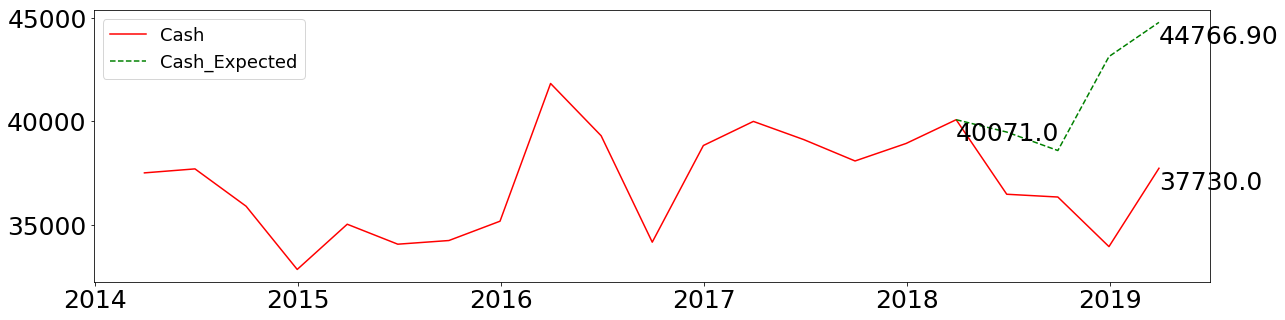

In [507]:
float_formatter = lambda x: "%.2f" % x
fig = plt.figure(figsize=(20,5))
ax = plt.axes()
ax.plot(F_all['End Date'],F_all['Cash'],'r')
ax.plot(F_all['End Date'],F_all['Cash_Expected'],'g--')
ax.annotate(F_all.iloc[20,2],xy=(F_all.iloc[20,1],F_all.iloc[20,2]-1000),fontsize=25)
ax.annotate(F_all.iloc[16,2],xy=(F_all.iloc[16,1],F_all.iloc[16,2]-1000),fontsize=25)
ax.annotate(float_formatter(F_all.iloc[20,3]),xy=(F_all.iloc[20,1],F_all.iloc[20,3]-1000),fontsize=25)
plt.legend(fontsize=18)
ax.tick_params(axis = 'both', which = 'major', labelsize = 25)
#ax.set_xticklabels(["2017Q1","2017Q2","2017Q3","2017Q4","2018Q1","2018Q2","2018Q3","2018Q4","2019Q1"],rotation=45)
plt.show()